In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The Dataset

In [88]:
df = pd.read_csv("/content/books.csv")

### Viewing loaded Dataset

In [89]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


### Patterns of missing values

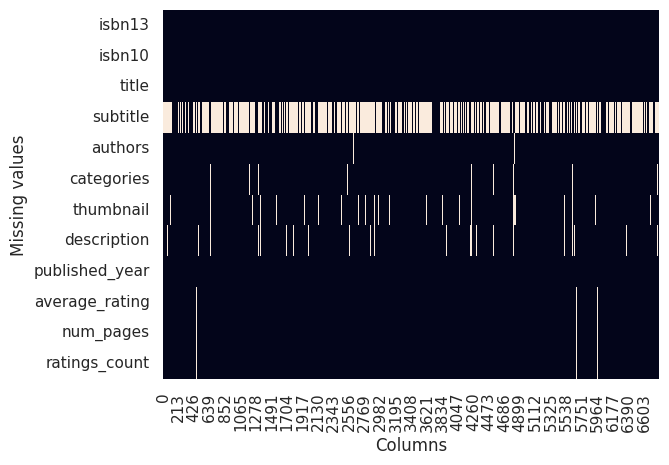

In [90]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar = False, ax = ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

### Insights
* Subtitles are mostly missing
* categories, thumbnail, description -> partly random
* avg_rating, num_pages, ratings_count: one missing, all missing, were probably taken from another dataset
Could become a source of bias

### Numeric description of missing books

In [91]:
df['missing_description'] = np.where(df['description'].isna(), 1, 0)

#age of books
df['age_of_books'] = 2025 - df['published_year']

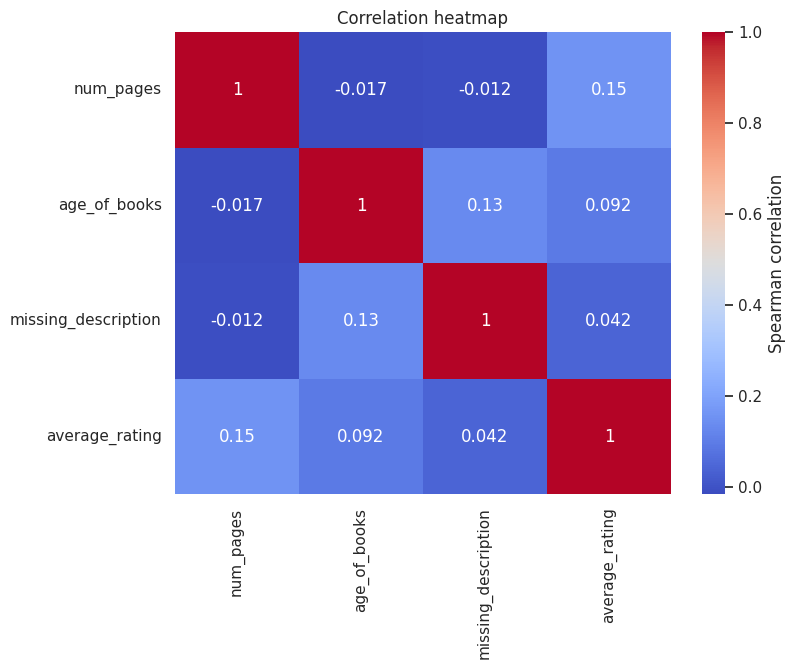

In [92]:
columns_of_interest = ['num_pages', 'age_of_books', 'missing_description', 'average_rating']

correlation_matrix = df[columns_of_interest].corr(method = 'spearman')

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 6))
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', cbar_kws = {"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

No correlation is strong with missing description

In [93]:
df[(df['description'].isna()) |
   (df['num_pages'].isna()) |
   (df['average_rating'].isna()) |
   (df['published_year'].isna())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


303 rows, which is smaller than 5% of the dataset, thus can be easily dropped.

In [94]:
books = df[~(df['description'].isna()) &
           ~(df['num_pages'].isna()) &
           ~(df['average_rating'].isna()) &
           ~(df['published_year'].isna())].copy()

In [95]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


### Checking for short descriptions

In [96]:
books['word_count'] = books['description'].fillna('').apply(lambda x: len(x.split()))
words_count = books.sort_values(by = 'word_count', ascending = False)
print(words_count[['title', 'word_count']])

                                                  title  word_count
4144                              Exclusion and Embrace         920
4091                                         John Adams         621
6700                               King Henry IV Part 2         619
1848                    Welcome to the Great Mysterious         575
5600                                     Richard Wright         512
...                                                 ...         ...
5505                                Arrows of the Queen           1
5015  Taking God Out of Mathematics and Putting the ...           1
11                                Assassin's Apprentice           1
6794                                           ゲンジモノガタリ           1
2946                                     The Changeling           1

[6507 rows x 2 columns]


In [97]:
books.loc[books['word_count'] == 1][["title", "description"]]

,title,description
6,An Autobiography,Donation.
11,Assassin's Apprentice,Fantasy-roman.
1346,The Treason of Isengard,Fantasy-roman.
1981,Time & Again,Romance.
2946,The Changeling,FICTION-ROMANCE/GOTHIC
3364,Strata,Fantasy-roman.
5015,Taking God Out of Mathematics and Putting the ...,See:
5090,The Collected Poems of Robert Penn Warren,?
5135,The Crack-up,(Autobiographical).
5243,The Story of Avis,.


In [98]:
books.loc[books["word_count"].between(2, 9), ['title', 'description', 'word_count']]

,title,description,word_count
77,I Can Read with Me Eyes Shut!,Nonsense rhyming story. 4 yrs+,5
104,The Presocratics,Library of Liberal Arts title.,5
241,"Catherine, Called Birdy (Summer Reading Edition)",Originally published: [New York]: Clarion Book...,7
682,Beyond the Hundredth Meridian,Biography of John Wesley Powell.,5
748,For Lust of Knowing,Includes bibliographical references.,3
...,...,...,...
6695,Shakespeare's Sonnets,No Marketing Blurb,3
6704,Dostoevsky,Accessible and affordable illustrated biography,5
6726,"Novels, 1901-1902",Presents two complete novels from Henry James.,7
6757,Think and Grow Rich: The 21st-Century Edition,Audio Book- unabriged on CD,5


In [99]:
books.loc[books["word_count"].between(10, 19), ["title", "description", "word_count"]]

,title,description,word_count
2,The One Tree,Volume Two of Stephen Donaldson's acclaimed se...,14
10,If Tomorrow Comes,One of Sidney Sheldon's most popular and bests...,18
32,The Bonesetter's Daughter,Tells the story of three generations of Chines...,16
38,Koko,Koko is Peter Straub's foray into the psycholo...,13
70,"Beware, Princess Elizabeth",A matter of life and death - and the Throne of...,12
...,...,...,...
6730,Interfictions,Nineteen writers dig into the spaces between g...,15
6759,Scott Pilgrim's Precious Little Life,Scott Pilgrim's fantastic life takes an unfors...,17
6767,Underground!,Everything from the fingerprints of the gods t...,15
6776,Falling Angel,Raymond Chandler meets The Exorcist. Classic n...,12


In [100]:
books.loc[books["word_count"].between(20, 29), ["title", "description", "word_count"]]

,title,description,word_count
14,Murder in LaMut,"Available in the U.S. for the first time, this...",29
36,A Small Pinch of Weather,A magical and fantastic collection of early st...,24
57,The Secret of Chimneys,A young drifter finds more than he bargained f...,21
68,Breaking Open the Head,A new 'The Doors of Perception' for the 21st c...,23
71,The Family Way,It should be the most natural thing in the wor...,29
...,...,...,...
6765,Under The Influence,Presents a collection of articles that examine...,21
6766,Real Rule of Four,Discusses the historical and intellectual back...,26
6782,The Art of Richard P. Feynman,Displays one of America's leading physicist's ...,21
6789,Joseph Cornell,Provides an introduction to the American artis...,23


Descriptions start making sense around 25 words

In [101]:
books_25 = books[books["word_count"] >= 25].copy()

In [102]:
books_25

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


### Dealing with the 'Subtitle" column

In [103]:
books_25['title_subtitle'] = (
    np.where(books_25['subtitle'].isna(), books_25['title'],
             books_25[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
)

In [104]:
books_25

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,title_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


### Associating descriptions and unique ID

In [105]:
books_25["tagged_description"] = books_25[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
books_25["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
3,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897 Lewis' work on the nature of lov...
5,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
6802,9788172235222 On A Train Journey Home To North...
6803,9788173031014 This book tells the tale of a ma...
6804,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535 This collection of the timeless ...


In [106]:
(
    books_25
    .drop(["subtitle", "missing_description", "age_of_books", "word_count"], axis = 1)
    .to_csv("books_cleaned.csv", index = False)
)

In [107]:
!pip install -q langchain langchain-community langchain-openai chromadb

### Building vector search

In [108]:
books_25["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
3,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897 Lewis' work on the nature of lov...
5,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
6802,9788172235222 On A Train Journey Home To North...
6803,9788173031014 This book tells the tale of a ma...
6804,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535 This collection of the timeless ...


In [109]:
books_25["tagged_description"].to_csv("tagged_description.txt",
                                      sep = "\n",
                                      index = False,
                                      header = False)
books_25["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
3,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897 Lewis' work on the nature of lov...
5,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
6802,9788172235222 On A Train Journey Home To North...
6803,9788173031014 This book tells the tale of a ma...
6804,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535 This collection of the timeless ...


In [110]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter

# Load the text file
raw_documents = TextLoader("tagged_description.txt").load()

# Split the text into chunks of 500 characters with no overlap
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")

# Apply the splitter
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [111]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

### Create Vector Embeddings and store them in a Database

In [112]:
!pip install -q sentence-transformers

from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [113]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

#### Getting a book recommendation using vector search

In [114]:
from langchain_community.vectorstores import Chroma

dk_books = Chroma.from_documents(
    documents,
    embedding=embeddings,
    persist_directory="chroma_db"
)


#### Running a query

In [115]:
query = "A book to teach children about nature"
docs = dk_books.similarity_search(query, k=10)
docs

[Document(metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from sim

Only returns descriptions, we dont want to recommend book titlea and authors, thus linked isbn numbers will help.


In [116]:
books[books["isbn13"]==int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count
4861,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,NaN,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,0,24.0,40


### Creating a function for it to run on every query

In [117]:
def retrieve_semantic_recommendations(
    query: str,
    top_k: int = 10,
) -> pd.DataFrame:
    recs = dk_books.similarity_search(query, k = 50)

  #strores ISBN13 numbers
    books_list = []

  #looping through recs list, list of retrieved docs
    for i in range(0, len(recs)):
      books_list += [int(recs[i].page_content.strip('"').split()[0])]
    #splitting by whitespaces and picking the first word, remove training zeroes, convert to an integer

    return books[books["isbn13"].isin(books_list)].head(top_k)
    #filter the rows in books where isbn13 is in books_list
    #return top k values

In [118]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count
71,9780007151240,0007151241,The Family Way,NaN,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,0,20.0,29
377,9780060959036,0060959037,Prodigal Summer,A Novel,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,0,24.0,76
478,9780064402453,0064402452,Racso and the Rats of NIMH,NaN,Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=MgoNv...,"‘Racso, a brash and boastful little rodent, is...",1988.0,3.76,288.0,3231.0,0,37.0,98
480,9780064403870,0064403874,"R-T, Margaret, and the Rats of NIMH",NaN,Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=WTHHH...,"When Margaret and her younger brother, Artie, ...",1991.0,3.52,272.0,631.0,0,34.0,95
481,9780064404419,0064404412,The Rainbow People,NaN,Laurence Yep,Juvenile Fiction,http://books.google.com/books/content?id=5AHwq...,"""Culled from 69 stories collected in a [1930s]...",1992.0,3.75,208.0,202.0,0,33.0,125
492,9780064406925,006440692X,Winter on the Farm,NaN,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=IvlKH...,The Little House books tell the story of a lit...,1997.0,4.13,32.0,400.0,0,28.0,143
507,9780064434980,0064434982,The Deer in the Wood,NaN,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,0,26.0,39
1225,9780192862099,019286209X,The Origins of Life,From the Birth of Life to the Origin of Language,John Maynard Smith;Eörs Szathmáry,Science,http://books.google.com/books/content?id=nHDbB...,'I can recommend this book as a thoroughly int...,2000.0,4.11,192.0,41.0,0,25.0,61
2023,9780374422080,0374422087,Everything on a Waffle,NaN,Polly Horvath,Juvenile Fiction,http://books.google.com/books/content?id=NimVJ...,This Newbery Honor Book tells the story of 11 ...,2004.0,3.71,150.0,9631.0,0,21.0,44
2030,9780374522599,0374522596,The Control of Nature,NaN,John McPhee,Nature,http://books.google.com/books/content?id=p1qKQ...,The Control of Nature is John McPhee's bestsel...,1990.0,4.24,288.0,3365.0,0,35.0,73


### Text Classification
* Assigning text to different groups
* Using zero-shot classification: Getting model to assign text to a category directly using a pre-trained model.

Transformer models are good at understanding which words are likely to be semantically related, due to seeing them in a related context during training.

#### Using Zero-Shot Classification to go over a description and classify it as Fiction or Non-Fiction

In [119]:
#checking for categories
books_25['categories'].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Literary Criticism & Collections,1
475,"Authors, Canadian",1
476,Air pilots,1
477,Community life,1


Removing too specific/ granular categories:

In [120]:
books_25['categories'].value_counts().reset_index().query("count>50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


Extracting Juvenile Fiction and Non-Fiction, mapping columns as fiction and nonfiction

In [121]:
books_25[books_25["categories"] == 'Juvenile Fiction']

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,title_subtitle,tagged_description
35,9780006646006,000664600X,Ocean Star Express,NaN,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,0,23.0,129,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
98,9780020442608,0020442602,The voyage of the Dawn Treader,NaN,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,0,55.0,65,The voyage of the Dawn Treader,"9780020442608 The ""Dawn Treader"" is the first ..."
112,9780030547744,0030547741,Where the Red Fern Grows,The Story of Two Dogs and a Boy : with Connect...,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,0,25.0,27,Where the Red Fern Grows: The Story of Two Dog...,9780030547744 A young boy living in the Ozarks...
113,9780060000141,0060000147,Poppy's Return,NaN,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,0,19.0,82,Poppy's Return,"9780060000141 There's trouble at Gray House, t..."
114,9780060001537,0060001534,Diary of a Spider,NaN,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,0,20.0,93,Diary of a Spider,9780060001537 This is the diary ... of a spide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,9781590385814,1590385810,Fablehaven,NaN,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,0,19.0,31,Fablehaven,9781590385814 When Kendra and Seth go to stay ...
6453,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,NaN,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,0,20.0,26,Sherlock Holmes and the Case of the Hound of t...,9781596792500 Sherlock Holmes and Dr. Watson t...
6470,9781599900056,159990005X,The Drift House,The First Voyage,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,0,19.0,33,The Drift House: The First Voyage,9781599900056 Sent to stay with their uncle in...
6547,9781844580514,1844580512,Attack of the Jaguar,NaN,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,0,21.0,39,Attack of the Jaguar,9781844580514 This training manual for operati...


In [122]:
books_25[books_25['categories'] == 'Juvenile Nonfiction']

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,title_subtitle,tagged_description
138,9780060277406,0060277408,The Secret Garden Cookbook,Recipes Inspired by Frances Hodgson Burnett's ...,Amy Cotler,Juvenile Nonfiction,http://books.google.com/books/content?id=c7E_H...,Frances Hodgson Burnett's The Secret Garden de...,1999.0,4.28,128.0,142.0,0,26.0,180,The Secret Garden Cookbook: Recipes Inspired b...,9780060277406 Frances Hodgson Burnett's The Se...
139,9780060278427,0060278420,Laura's Album,A Remembrance Scrapbook of Laura Ingalls Wilder,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=_zTkq...,Though best known as the author of the Little ...,1998.0,4.30,80.0,713.0,0,27.0,134,Laura's Album: A Remembrance Scrapbook of Laur...,9780060278427 Though best known as the author ...
266,9780060782139,0060782137,Time For Kids: Butterflies!,NaN,Editors of TIME For Kids,Juvenile Nonfiction,http://books.google.com/books/content?id=OdZxn...,"Butterflies There are 20,000 different kinds o...",2006.0,4.00,32.0,20.0,0,19.0,48,Time For Kids: Butterflies!,"9780060782139 Butterflies There are 20,000 dif..."
306,9780060882600,0060882603,The Annotated Charlotte's Web,NaN,E. B. White,Juvenile Nonfiction,http://books.google.com/books/content?id=vaYYH...,"Charlotte's Web, one of America's best-loved c...",2006.0,4.16,320.0,41.0,0,19.0,79,The Annotated Charlotte's Web,"9780060882600 Charlotte's Web, one of America'..."
512,9780064462044,0064462048,My Little House Crafts Book,18 Projects from Laura Ingalls Wilder's,Carolyn Strom Collins,Juvenile Nonfiction,http://books.google.com/books/content?id=lTzrs...,Make the same pioneer crafts that Laura did! I...,1998.0,4.05,64.0,56.0,0,27.0,145,My Little House Crafts Book: 18 Projects from ...,9780064462044 Make the same pioneer crafts tha...
513,9780064462341,006446234X,Pioneer Girl,The Story of Laura Ingalls Wilder,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=Sj4UD...,The pioneer spirit lives on... Readers around ...,2000.0,4.15,32.0,414.0,0,25.0,264,Pioneer Girl: The Story of Laura Ingalls Wilder,9780064462341 The pioneer spirit lives on... R...
517,9780066236179,0066236177,A Light in the Attic Book and CD,NaN,Shel Silverstein,Juvenile Nonfiction,http://books.google.com/books/content?id=FJfQs...,Last night while I lay thinking here Some What...,2001.0,4.34,176.0,590.0,0,24.0,169,A Light in the Attic Book and CD,9780066236179 Last night while I lay thinking ...
988,9780142302279,0142302279,Dirty Beasts,NaN,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,0,23.0,33,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
999,9780142407226,0142407224,The Tough Guide to Fantasyland,NaN,Diana Wynne Jones,Juvenile Nonfiction,http://books.google.com/books/content?id=v5jxA...,A unique guide to fantasy literature helps rea...,2006.0,3.94,234.0,3897.0,0,19.0,38,The Tough Guide to Fantasyland,9780142407226 A unique guide to fantasy litera...
1001,9780142407929,0142407925,The BFG,A Set of Plays,Roald Dahl;David Wood;Jane Walmsley,Juvenile Nonfiction,http://books.google.com/books/content?id=aDf-O...,"With notes on staging, props, and costumes, a ...",2007.0,4.26,128.0,452.0,0,18.0,27,The BFG: A Set of Plays,"9780142407929 With notes on staging, props, an..."


In [123]:
category_mapping = {
    'Fiction' : 'Fiction',
    'Juvenile Fiction': "Children's Fiction",
    'Biography & Autobiography': "Nonfiction",
    'History': "Nonfiction",
    'Literary Criticism': "Nonfiction",
    'Philosophy': "Nonfiction",
    'Religion': "Nonfiction",
    'Comics & Graphic Novels': "Fiction",
    'Drama': "Fiction",
    'Juvenile Nonfiction': "Children's Nonfiction",
    'Science': "Nonfiction",
    'Poetry': "Fiction"
}
books_25["refined"] = books_25["categories"].map(category_mapping)
books_25

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,title_subtitle,tagged_description,refined
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [124]:
books_25[books_25["refined"].isna()]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,title_subtitle,tagged_description,refined
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...,NaN
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,9788125026600,8125026606,Nietzsche For Beginners,NaN,Marc Sautet,NaN,http://books.google.com/books/content?id=fPIv8...,Not only does Nietzsche for Beginners delve in...,2004.0,3.26,192.0,21.0,0,21.0,51,Nietzsche For Beginners,9788125026600 Not only does Nietzsche for Begi...,NaN
6801,9788171565641,8171565646,Aspects of the Novel,NaN,E. M. Forster,English fiction,http://books.google.com/books/content?id=qWU9P...,"Forster's lively, informed originality and wit...",2004.0,3.83,141.0,10.0,0,21.0,40,Aspects of the Novel,"9788171565641 Forster's lively, informed origi...",NaN
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN


In [125]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1

fiction_cat = ["Fiction", "Nonfiction"]
pipe = pipeline("zero-shot-classification",
                model = "facebook/bart-large-mnli",
                device=device)

Device set to use cuda:0


In [126]:
sequence = books_25.loc[books_25["refined"] == "Fiction", "description"].reset_index(drop = True)

In [127]:
pipe(sequence, fiction_cat)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

Finding indexes of higher scores


In [128]:
max_index = np.argmax(pipe(sequence, fiction_cat)["scores"])

Finding corresponding labels using max_index



In [129]:
max_label = pipe(sequence, fiction_cat)["labels"][max_index]

* Run pipeline on the recieved sequence
* Extract label with highest score
* Return predicted label


In [130]:
def generate_pred(sequence, categories):
    pred = pipe(sequence, categories)
    print(pred)  # Debug output
    max_index = np.argmax(pred["scores"])
    max_label = pred["labels"][max_index]
    return max_label

### Checking classifier accuracy
Looping through actual and predicted categories


In [131]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

Predicting for Fiction

In [132]:
for i in tqdm(range(300)):
  sequence = books_25.loc[books_25['refined'] == "Fiction", "description"].reset_index(drop = True)
  predicted_cats += [generate_pred(sequence, fiction_cat)]
  actual_cats += ["Fiction"]

  0%|          | 1/300 [00:00<00:53,  5.59it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  1%|          | 3/300 [00:00<00:58,  5.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  2%|▏         | 5/300 [00:00<00:52,  5.63it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  2%|▏         | 7/300 [00:01<00:48,  6.00it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  3%|▎         | 9/300 [00:01<00:47,  6.14it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  4%|▎         | 11/300 [00:01<00:47,  6.15it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  4%|▍         | 13/300 [00:02<00:47,  6.03it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  5%|▌         | 15/300 [00:02<00:46,  6.13it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  6%|▌         | 17/300 [00:02<00:45,  6.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  6%|▋         | 19/300 [00:03<00:45,  6.20it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  7%|▋         | 21/300 [00:03<00:44,  6.33it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  8%|▊         | 23/300 [00:03<00:44,  6.27it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  8%|▊         | 25/300 [00:04<00:44,  6.15it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

  9%|▉         | 27/300 [00:04<00:43,  6.23it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 10%|▉         | 29/300 [00:04<00:43,  6.22it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 10%|█         | 31/300 [00:05<00:45,  5.96it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 11%|█         | 33/300 [00:05<00:47,  5.59it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 12%|█▏        | 35/300 [00:05<00:47,  5.55it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 12%|█▏        | 37/300 [00:06<00:48,  5.46it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 13%|█▎        | 39/300 [00:06<00:50,  5.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 14%|█▎        | 41/300 [00:07<00:47,  5.40it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 14%|█▍        | 42/300 [00:07<00:49,  5.16it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 15%|█▍        | 44/300 [00:07<00:51,  4.94it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 15%|█▌        | 46/300 [00:07<00:46,  5.42it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 16%|█▌        | 48/300 [00:08<00:43,  5.82it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 17%|█▋        | 50/300 [00:08<00:43,  5.76it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 17%|█▋        | 52/300 [00:08<00:43,  5.75it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 18%|█▊        | 54/300 [00:09<00:40,  6.03it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 19%|█▊        | 56/300 [00:09<00:39,  6.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 19%|█▉        | 58/300 [00:09<00:39,  6.08it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 20%|██        | 60/300 [00:10<00:39,  6.13it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 21%|██        | 62/300 [00:10<00:38,  6.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 21%|██▏       | 64/300 [00:10<00:38,  6.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 22%|██▏       | 66/300 [00:11<00:37,  6.19it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 23%|██▎       | 68/300 [00:11<00:37,  6.23it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 23%|██▎       | 70/300 [00:11<00:37,  6.17it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 24%|██▍       | 72/300 [00:12<00:37,  6.16it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 25%|██▍       | 74/300 [00:12<00:36,  6.19it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 25%|██▌       | 75/300 [00:12<00:42,  5.28it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 25%|██▌       | 76/300 [00:13<00:44,  5.00it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 26%|██▌       | 77/300 [00:13<00:48,  4.60it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 26%|██▌       | 78/300 [00:13<00:51,  4.31it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 26%|██▋       | 79/300 [00:13<00:51,  4.27it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 27%|██▋       | 80/300 [00:14<00:49,  4.44it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 27%|██▋       | 81/300 [00:14<00:52,  4.15it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 27%|██▋       | 82/300 [00:14<00:52,  4.18it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 28%|██▊       | 84/300 [00:14<00:46,  4.64it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 29%|██▊       | 86/300 [00:15<00:41,  5.15it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 29%|██▉       | 88/300 [00:15<00:38,  5.51it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 30%|███       | 90/300 [00:15<00:36,  5.82it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 31%|███       | 92/300 [00:16<00:35,  5.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 31%|███▏      | 94/300 [00:16<00:34,  5.96it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 32%|███▏      | 96/300 [00:16<00:34,  5.93it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 33%|███▎      | 98/300 [00:17<00:33,  6.08it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 33%|███▎      | 100/300 [00:17<00:32,  6.07it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 34%|███▍      | 102/300 [00:17<00:35,  5.65it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 35%|███▍      | 104/300 [00:18<00:36,  5.38it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 35%|███▌      | 105/300 [00:18<00:38,  5.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 36%|███▌      | 107/300 [00:19<00:39,  4.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 36%|███▋      | 109/300 [00:19<00:37,  5.07it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 37%|███▋      | 111/300 [00:19<00:36,  5.17it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 37%|███▋      | 112/300 [00:19<00:38,  4.87it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 38%|███▊      | 114/300 [00:20<00:37,  4.98it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 39%|███▊      | 116/300 [00:20<00:33,  5.43it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 39%|███▉      | 118/300 [00:21<00:31,  5.77it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 40%|████      | 120/300 [00:21<00:30,  5.91it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 41%|████      | 122/300 [00:21<00:30,  5.91it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 41%|████▏     | 124/300 [00:22<00:29,  5.99it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 42%|████▏     | 126/300 [00:22<00:28,  6.09it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 43%|████▎     | 128/300 [00:22<00:28,  6.08it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 43%|████▎     | 130/300 [00:23<00:28,  5.99it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 44%|████▍     | 132/300 [00:23<00:27,  6.00it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 45%|████▍     | 134/300 [00:23<00:27,  5.97it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 45%|████▌     | 136/300 [00:24<00:27,  5.98it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 46%|████▌     | 137/300 [00:24<00:27,  5.95it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 46%|████▋     | 139/300 [00:24<00:28,  5.56it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 47%|████▋     | 140/300 [00:24<00:32,  4.89it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 47%|████▋     | 141/300 [00:25<00:36,  4.36it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 47%|████▋     | 142/300 [00:25<00:36,  4.28it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 48%|████▊     | 144/300 [00:25<00:36,  4.28it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 48%|████▊     | 145/300 [00:26<00:37,  4.12it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 49%|████▉     | 147/300 [00:26<00:36,  4.21it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 49%|████▉     | 148/300 [00:26<00:35,  4.27it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 50%|████▉     | 149/300 [00:27<00:39,  3.85it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 50%|█████     | 150/300 [00:27<00:37,  3.95it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 50%|█████     | 151/300 [00:27<00:38,  3.88it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 51%|█████     | 153/300 [00:28<00:33,  4.44it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 52%|█████▏    | 155/300 [00:28<00:28,  5.06it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 52%|█████▏    | 157/300 [00:28<00:26,  5.38it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 53%|█████▎    | 159/300 [00:29<00:25,  5.51it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 54%|█████▎    | 161/300 [00:29<00:24,  5.68it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 54%|█████▍    | 163/300 [00:29<00:24,  5.67it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 55%|█████▌    | 165/300 [00:30<00:24,  5.61it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 55%|█████▌    | 166/300 [00:30<00:24,  5.37it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 56%|█████▌    | 167/300 [00:30<00:27,  4.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 56%|█████▌    | 168/300 [00:30<00:27,  4.82it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 56%|█████▋    | 169/300 [00:31<00:27,  4.81it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 57%|█████▋    | 171/300 [00:31<00:26,  4.80it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 57%|█████▋    | 172/300 [00:31<00:30,  4.17it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 58%|█████▊    | 174/300 [00:32<00:27,  4.56it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 58%|█████▊    | 175/300 [00:32<00:27,  4.62it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 59%|█████▊    | 176/300 [00:32<00:28,  4.31it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 59%|█████▉    | 177/300 [00:32<00:28,  4.36it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 60%|█████▉    | 179/300 [00:33<00:26,  4.60it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 60%|██████    | 180/300 [00:33<00:28,  4.29it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 60%|██████    | 181/300 [00:33<00:27,  4.36it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 61%|██████    | 182/300 [00:33<00:26,  4.48it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 61%|██████    | 183/300 [00:34<00:28,  4.14it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 62%|██████▏   | 185/300 [00:34<00:27,  4.22it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 62%|██████▏   | 186/300 [00:34<00:25,  4.49it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 62%|██████▏   | 187/300 [00:35<00:25,  4.50it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 63%|██████▎   | 189/300 [00:35<00:22,  4.87it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 64%|██████▎   | 191/300 [00:36<00:23,  4.62it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 64%|██████▍   | 193/300 [00:36<00:20,  5.13it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 65%|██████▌   | 195/300 [00:36<00:19,  5.44it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 66%|██████▌   | 197/300 [00:37<00:17,  5.79it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 66%|██████▋   | 199/300 [00:37<00:16,  5.96it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 67%|██████▋   | 201/300 [00:37<00:16,  5.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 68%|██████▊   | 203/300 [00:38<00:16,  6.01it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 68%|██████▊   | 205/300 [00:38<00:15,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 69%|██████▉   | 207/300 [00:38<00:15,  5.99it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 70%|██████▉   | 209/300 [00:39<00:15,  6.06it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 70%|███████   | 211/300 [00:39<00:14,  6.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 71%|███████   | 213/300 [00:39<00:14,  6.05it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 72%|███████▏  | 215/300 [00:40<00:14,  6.03it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 72%|███████▏  | 217/300 [00:40<00:13,  6.08it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 73%|███████▎  | 219/300 [00:40<00:13,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 74%|███████▎  | 221/300 [00:41<00:13,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 74%|███████▍  | 223/300 [00:41<00:12,  5.96it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 75%|███████▌  | 225/300 [00:41<00:12,  6.04it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 76%|███████▌  | 227/300 [00:42<00:12,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 76%|███████▋  | 229/300 [00:42<00:11,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 77%|███████▋  | 231/300 [00:42<00:11,  6.05it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 78%|███████▊  | 233/300 [00:43<00:11,  6.00it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 78%|███████▊  | 235/300 [00:43<00:18,  3.46it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 79%|███████▉  | 237/300 [00:44<00:14,  4.42it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 80%|███████▉  | 239/300 [00:44<00:12,  4.95it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 80%|████████  | 241/300 [00:44<00:10,  5.43it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 81%|████████  | 243/300 [00:45<00:09,  5.74it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 82%|████████▏ | 245/300 [00:45<00:09,  5.80it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 82%|████████▏ | 247/300 [00:45<00:09,  5.86it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 83%|████████▎ | 249/300 [00:46<00:08,  5.93it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 84%|████████▎ | 251/300 [00:46<00:08,  5.88it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 84%|████████▍ | 253/300 [00:46<00:07,  5.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 85%|████████▌ | 255/300 [00:47<00:07,  5.91it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 86%|████████▌ | 257/300 [00:47<00:07,  5.92it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 86%|████████▋ | 259/300 [00:47<00:06,  5.99it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 87%|████████▋ | 261/300 [00:48<00:06,  5.95it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 88%|████████▊ | 263/300 [00:48<00:06,  6.06it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 88%|████████▊ | 265/300 [00:48<00:05,  6.06it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 89%|████████▉ | 267/300 [00:49<00:05,  5.99it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 90%|████████▉ | 269/300 [00:49<00:05,  6.03it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 90%|█████████ | 271/300 [00:49<00:04,  6.07it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 91%|█████████ | 273/300 [00:50<00:04,  6.01it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 92%|█████████▏| 275/300 [00:50<00:04,  6.05it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 92%|█████████▏| 277/300 [00:50<00:03,  6.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 93%|█████████▎| 279/300 [00:51<00:03,  6.13it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 94%|█████████▎| 281/300 [00:51<00:03,  6.09it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 94%|█████████▍| 283/300 [00:51<00:02,  6.03it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 95%|█████████▌| 285/300 [00:52<00:02,  6.07it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 96%|█████████▌| 287/300 [00:52<00:02,  6.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 96%|█████████▋| 289/300 [00:52<00:01,  6.04it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 97%|█████████▋| 291/300 [00:53<00:01,  6.07it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 98%|█████████▊| 293/300 [00:53<00:01,  6.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 98%|█████████▊| 295/300 [00:53<00:00,  6.12it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

 99%|█████████▉| 297/300 [00:54<00:00,  6.02it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

100%|█████████▉| 299/300 [00:54<00:00,  6.11it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

100%|██████████| 300/300 [00:54<00:00,  5.48it/s]

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

Predicting for Non Fiction

In [133]:
for i in tqdm(range(300)):
    sequence = books_25.loc[books_25["refined"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_pred(sequence, fiction_cat)]
    actual_cats += ["Nonfiction"]

  0%|          | 0/300 [00:00<?, ?it/s]

{'sequence': 'Oscar Wilde had one of literary history\'s most explosive love affairs with Lord Alfred "Bosie" Douglas. In 1895, Bosie\'s father, the Marquess of Queensberry, delivered a note to the Albemarle Club addressed to "Oscar Wilde posing as sodomite." With Bosie\'s encouragement, Wilde sued the Marquess for libel. He not only lost but he was tried twice for "gross indecency" and sent to prison with two years\' hard labor. With this publication of the uncensored trial transcripts, readers can for the first time in more than a century hear Wilde at his most articulate and brilliant. The Real Trial of Oscar Wilde documents an alarmingly swift fall from grace; it is also a supremely moving testament to the right to live, work, and love as one\'s heart dictates.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.875166118144989, 0.12483388185501099]}


  1%|          | 2/300 [00:00<00:29, 10.21it/s]

{'sequence': "At last...the public hearing she was denied...These essays reveal keen powers of analysis applied to some of the most obdurate problems that bedevil electoral politics. Anyone who cares about the mechanisms of democracy should be engaged by her tough-minded explorations. It doesn't matter where you think you stand: it's all here, to argue or agree with. -- Henry Louis Gates, Jr. Lani Guinier's fascinating book is a prophetic intervention into a public conversation we desperately need to rejuvenate. There is no doubt that her powerful voice will produce good consequences for our nation and world. -- Cornel West, Author of Race Matters Intriguing and desperately needed... -- The San Francisco Chronicle", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8822296857833862, 0.11777032166719437]}
{'sequence': "A blending of scholarly research and interviews with many of the figures who launched the civil rights movement in the 1960s and 1970s records the events of the movement'

  1%|▏         | 4/300 [00:00<00:25, 11.49it/s]

{'sequence': "What does it mean when a fictional hero takes a journey?. Shares a meal? Gets drenched in a sudden rain shower? Often, there is much more going on in a novel or poem than is readily visible on the surface—a symbol, maybe, that remains elusive, or an unexpected twist on a character—and there's that sneaking suspicion that the deeper meaning of a literary text keeps escaping you. In this practical and amusing guide to literature, Thomas C. Foster shows how easy and gratifying it is to unlock those hidden truths, and to discover a world where a road leads to a quest; a shared meal may signify a communion; and rain, whether cleansing or destructive, is never just rain. Ranging from major themes to literary models, narrative devices, and form, How to Read Literature Like a Professor is the perfect companion for making your reading experience more enriching, satisfying, and fun.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8859661817550659, 0.11403383314609528]}


  2%|▏         | 6/300 [00:00<00:25, 11.60it/s]

{'sequence': 'From Freud to Babbitt, from Animal Farm to Sartre to the Great Society, from the Theory of Relativity to counterculture to Kosovo, The Modern Mind is encyclopedic, covering the major writers, artists, scientists, and philosophers who produced the ideas by which we live. Peter Watson has produced a fluent and engaging narrative of the intellectual tradition of the twentieth century, and the men and women who created it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8362877368927002, 0.16371232271194458]}
{'sequence': '1599 was an epochal year for Shakespeare and England Shakespeare wrote four of his most famous plays: Henry the Fifth, Julius Caesar, As You Like It, and, most remarkably, Hamlet; Elizabethans sent off an army to crush an Irish rebellion, weathered an Armada threat from Spain, gambled on a fledgling East India Company, and waited to see who would succeed their aging and childless queen. James Shapiro illuminates both Shakespeare’s staggering achievement

  3%|▎         | 8/300 [00:00<00:25, 11.28it/s]

{'sequence': "Often I feel I go to some distant region of the world to be reminded of who I really am. When Michael Crichton -- a Harvard-trained physician, bestselling novelist, and successful movie director -- began to feel isolated in his own life, he decided to widen his horizons. He tracked wild animals in the jungles of Rwanda. He climbed Kilimanjaro and Mayan pyramids. He trekked across a landslide in Pakistan. He swam amid sharks in Tahiti. Fueled by a powerful curiosity and the need to see, feel, and hear firsthand and close-up, Michael Crichton has experienced adventures as compelling as those he created in his books and films. These adventures -- both physical and spiritual -- are recorded here in Travels, Crichton's most astonishing and personal work.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7394635677337646, 0.26053643226623535]}
{'sequence': 'For centuries, the world of Islam was in the forefront of human achievement -- the foremost military and economic power 

  3%|▎         | 10/300 [00:00<00:28, 10.01it/s]

{'sequence': '"I have told you nothing about man that is not true." You must pardon me if I repeat that remark now and then in these letters; I want you to take seriously the things I am telling you, and I feel that if I were in your place and you in mine, I should need that reminder from time to time, to keep my credulity from flagging. In Letters from the Earth, Twain presents himself as the Father of History -- reviewing and interpreting events from the Garden of Eden through the Fall and the Flood, translating the papers of Adam and his descendants through the generations. First published fifty years after his death, this eclectic collection is vintage Twain: sharp, witty, imaginative, complex, and wildly funny.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7982653975486755, 0.20173458755016327]}
{'sequence': "Whitman's genius, passions, poetry, and androgynous sensibility entwined to create an exuberant life amid the turbulent American mid-nineteenth century. In vivid detail

  5%|▍         | 14/300 [00:01<00:29,  9.66it/s]

{'sequence': 'When the stewardess brought me off the plane in a wheelchair, I lowered my head. I was too scared to even look at my father. I didn\'t want to see the disappointment and horror on his face. All that hate I had accumulated for him over the years, all the resentment against him for not understanding what I was going through, just released with the tears. "So, where are your parents?" the stewardess asked me after a few minutes. "I can\'t wait here with you much longer." I looked up and wiped my eyes. My father was standing ten feet away. He didn\'t even recognize me. In the underbelly of Las Vegas, a cesspool of warring biker gangs and seedy strip clubs transformed the gawky, brace-faced Jenna Massoli into the bombshell Jenna Jameson. Today, Jenna Jameson is the biggest star in the history of adult movies, consistently ranked as one of the most beautiful women alive. But behind the glamour and the meteoric rise to fame was a path paved with tragedy and heartbreak. As a teen

  5%|▌         | 16/300 [00:01<00:29,  9.64it/s]

{'sequence': "Hidden somewhere, in nearly every major city in the world, is an underground seduction lair. And in these lairs, men trade the most devastatingly effective techniques ever invented to charm women. This is not fiction. These men really exist. They live together in houses known as Projects. And Neil Strauss, the bestselling author, spent two years living among them, using the pseudonym Style to protect his real-life identity. The result is one of the most explosive and controversial books of the year -- guaranteed to change the lives of men and transform the way women understand the opposite sex forever. On his journey from AFC (average frustrated chump) to PUA (pick-up artist) to PUG (pick-up guru), Strauss not only shares scores of original seduction techniques but also has unforgettable encounters with the likes of Tom Cruise, Britney Spears, Paris Hilton, Heidi Fleiss, and Courtney Love. And then things really start to get strange -- and passions lead to betrayals lead 

  6%|▋         | 19/300 [00:02<00:32,  8.66it/s]

{'sequence': "One of the first two volumes in Harper's Eminent Lives series, Korda brings his acclaimed storytelling talents to the life of Ulysses S. Grant – a man who managed to end the Civil War on a note of grace, serve two terms as president, write one of the most successful military memoirs in American literature, and is today remembered as a brilliant general but a failed president. Ulysses S. Grant was the first officer since George Washington to become a four–star general in the United States Army, and the only president between Andrew Jackson and Woodrow Wilson to serve eight consecutive years in the White House. In this succinct and vivid biography, Michael Korda considers Grant's character and reconciles the conflicting evaluations of his leadership abilities. Grant's life played out as a true Horatio Alger story. Despite his humble background as the son of a tanner in Ohio, his lack of early success in the army, and assorted failed business ventures, his unwavering determi

  7%|▋         | 22/300 [00:02<00:32,  8.63it/s]

{'sequence': "In this unique biography of Thomas Jefferson, leading journalist and social critic Christopher Hitchens offers a startlingly new and provocative interpretation of our Founding Father. Situating Jefferson within the context of America's evolution and tracing his legacy over the past two hundred years, Hitchens brings the character of Jefferson to life as a man of his time and also as a symbolic figure beyond it. Conflicted by power, Jefferson wrote the Declaration of Independence and acted as Minister to France yet yearned for a quieter career in the Virginia legislature. Predicting that slavery would shape the future of America's development, this professed proponent of emancipation elided the issue in the Declaration and continued to own human property. An eloquent writer, he was an awkward public speaker; a reluctant candidate, he left an indelible presidential legacy. Jefferson's statesmanship enabled him to negotiate the Louisiana Purchase with France, doubling the si

  8%|▊         | 23/300 [00:02<00:39,  7.08it/s]

{'sequence': 'Of the many recent books on the historical Jesus, none has explored what the latest biblical scholarship means for personal faith. Now, in Meeting Jesus Again for the First Time, Marcus Borg addresses the yearnings of those who want a fully contemporary faith that welcomes rather than oppresses our critical intelligence and openness to the best of historical scholarship. Borg shows how a rigorous examination of historical findings can lead to a new faith in Christ, one that is critical and, at the same time, sustaining. "Believing in Jesus does not mean believing doctrines about him," Borg writes. "Rather, it means to give one\'s heart, one\'s self at its deepest level, to . . . the living Lord." Drawing on his own journey from a naive, unquestioning belief in Christ through collegiate skepticism to a mature and contemporary Christian faith, Borg illustrates how an understanding of the historical Jesus can actually lead to a more authentic Christian life—one not rooted in

  9%|▊         | 26/300 [00:03<00:37,  7.36it/s]

{'sequence': 'One of the vital challenges facing thoughtful people today is how to read the Bible faithfully without abandoning our sense of truth and history. Reading the Bible Again for the First Time provides a much-needed solution to the problem of how to have a fully authentic yet contemporary understanding of the scriptures. Many mistakenly believe there are no choices other than fundamentalism or simply rejecting the Bible as something that can bring meaning to our lives. Answering this modern dilemma, acclaimed author Marcus Borg reveals how it is possible to reconcile the Bible with both a scientific and critical way of thinking and our deepest spiritual needs, leading to a contemporary yet grounded experience of the sacred texts. This seminal book shows you how to read the Bible as it should be examined—in an approach the author calls "historical-metaphorical." Borg explores what the Scriptures meant to the ancient communities that produced and lived by them. He then helps us

  9%|▉         | 28/300 [00:03<00:30,  8.93it/s]

{'sequence': "Known throughout the world as the intellect behind The Chronicles of Narnia and as the twentieth century's most influential Christian writer, C. S. Lewis has stirred millions of readers through his probing insights, passionate arguments, and provocative questions about God, love, life, and death. Gathered from the mass of his published works -- including The Screwtape Letters, Mere Christianity, The Four Loves, and God in the Dock -- as well as from letters, essays, and less familiar writings, this compendium contains a cross section of Lewis's finest work.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6139057874679565, 0.3860941529273987]}
{'sequence': 'In this humorous and perceptive exchange between two devils, C. S. Lewis delves into moral questions about good vs. evil, temptation, repentance, and grace. Through this wonderful tale, the reader emerges with a better understanding of what it means to live a faithful life.', 'labels': ['Nonfiction', 'Fiction'], 'sc

 10%|█         | 31/300 [00:03<00:31,  8.65it/s]

{'sequence': 'Having embraced a life of solitude in his own hermitage, Thomas Merton finds his faith tested beyond his imagination when a visit to the hospital leads to a clandestine affair of the heart. Jolted out of his comfortable routine, Merton is forced to reassess his need for love and his commitment to celibacy and the monastic vocation.This astonishing volume traces Merton’s struggle to reconcile his unexpected love with his sacred vows while continuing to grapple with the burning social issues of the day – including racial conflicts, the war in Vietnam, and the Arab-Israeli conflict – visiting and corresponding with high-profile friends like Thich Nhat Hanh and Joan Baez, and further developing his writing career. Revealing Merton to be ‘very human’ in his chronicles of the ecstasy and torment of being in love, Learning to Love comes full circle as Merton recommits himself completely and more deeply to his vocation even as he recognizes ‘my need for love, my loneliness, my in

 11%|█         | 33/300 [00:03<00:27,  9.85it/s]

{'sequence': 'A first volume of personal correspondence written by classic author C. S. Lewis includes letters penned during his childhood, World War I army days, education at Oxford, atheist period, and early friendship with J. R. R. Tolkien.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6801485419273376, 0.31985148787498474]}
{'sequence': 'The Essentials Explained Master storyteller and essayist C. S. Lewis here tackles the central questions of the Christian faith: Who was Jesus? What did he accomplish? What does it mean for me? In these classic essays, which began as talks on the BBC during World War II, Lewis creatively and simply explains the basic tenets of Christianity. Taken from the core section of Mere Christianity, the selection in this gift edition provides an accessible way for more people to discover these timeless truths. For those looking to remind themselves of the things they hold true, or those looking for a snapshot of Christianity, this book is a wonderful in

 12%|█▏        | 35/300 [00:03<00:23, 11.22it/s]

{'sequence': "Traces the author's coming of age in the Jim Crow-era South, a period during which he struggled to survive while journeying from innocence to adulthood.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6593605279922485, 0.3406394422054291]}


 12%|█▏        | 37/300 [00:04<00:35,  7.51it/s]

{'sequence': 'You\'ve met the Italian mob in The Godfather, now welcome to the real-life world of Irish America\'s own murderous clan of organized crime The man who has remained silent for more than a decade finally speaks, revealing the gritty true story of his life inside the infamous South Boston Irish mob led by the elusive, Machiavellian kingpin Whitey Bulger, who to this day remains on the lam as one of the world\'s Ten Most Wanted criminals, second only to Osama bin Laden. John "Red" Shea was a top lieutenant in the South Boston Irish mob, rising to this position at the age of twenty-one. Thus began his tutelage under the notorious Irish godfather James "Whitey" Bulger. An ice-cold enforcer with a legendary red-hot temper, Shea was a legend among his Southie peers in the 1980s. From the first delivery truck he robbed at thirteen to the start of his twelve-year federal sentence for drug trafficking at twenty-seven, Shea was a portrait in American crime -- a terror, brutal and rut

 13%|█▎        | 39/300 [00:04<00:32,  7.91it/s]

{'sequence': "Simon Winchester, New York Times bestselling author of The Professor and the Madman, examines the legendary annihilation in 1883 of the volcano-island of Krakatoa, which was followed by an immense tsunami that killed nearly forty thousand people. The effects of the immense waves were felt as far away as France. Barometers in Bogotá and Washington, D.C., went haywire. Bodies were washed up in Zanzibar. The sound of the island's destruction was heard in Australia and India and on islands thousands of miles away. Most significant of all -- in view of today's new political climate -- the eruption helped to trigger in Java a wave of murderous anti-Western militancy among fundamentalist Muslims, one of the first outbreaks of Islamic-inspired killings anywhere. Krakatoa gives us an entirely new perspective on this fascinating and iconic event. This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recommended reading, and more.", 'la

 14%|█▎        | 41/300 [00:04<00:42,  6.05it/s]

{'sequence': "In this follow-up to her bestselling Sex with Kings, Eleanor Herman reveals the truth about what goes on behind the closed door of a queen's boudoir. Impeccably researched, filled with page-turning romance, passion, and scandal, Sex with the Queen explores the scintillating sexual lives of some of our most beloved and infamous female rulers. She was the queen, living in an opulent palace, wearing lavish gowns and dazzling jewels. She was envied, admired, and revered. She was also miserable, having been forced to marry a foreign prince sight unseen, a royal ogre who was sadistic, foaming at the mouth, physically repulsive, mentally incompetent, or sexually impotent—and in some cases all of the above. How did queens find happiness? In courts bristling with testosterone—swashbuckling generals, polished courtiers, and virile cardinals—many royal women had love affairs. Anne Boleyn flirted with courtiers; Catherine Howard slept with one. Henry VIII had both of them beheaded. C

 14%|█▍        | 43/300 [00:05<00:39,  6.52it/s]

{'sequence': 'Liz Goldwyn\'s lifelong fascination with the inimitable glamour of classic burlesque inspired her to spend the past eight years corresponding with, visiting, interviewing, receiving striptease lessons from, and forming close relationships with the last generation of the great American burlesque queeens. Goldwyn invites us to step back into an era when the hourglass figure was in vogue and striptease was a true art form. Meet Betty "Ball of Fire" Rowland, who was known for her flaming red hair and bump–and–grind routines. (It turns out she once sued the author\'s grandfather, Samuel Goldwyn Jr., for using her stage name and costume in his Hollywood picture, Ball of Fire.) Meet Sherry Britton, who, with her long black hair and curvy, trim physique, was among the most stunning of the burlesque stars before Mayor LaGuardia outlawed burlesque in New York. Meet Zorita, whose sexually explicit "Consummation of the Wedding of the Snake" dance (performed with a live snake) and oth

 15%|█▌        | 45/300 [00:05<00:28,  8.95it/s]

{'sequence': "A book that instantly captured the hearts of readers across the country, An American Childhood is Pulitzer Prize-winning author Annie Dillard's poignant, vivid memoir of growing up in Pittsburgh in the 1950s.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9344862103462219, 0.0655137449502945]}
{'sequence': 'In 1975 Annie Dillard took up residence on an island in Puget Sound in a wooded room furnished with "one enormous window, one cat, one spider and one person." For the next two years she asked herself questions about time, reality, sacrifice death, and the will of God. In Holy the Firm she writes about a moth consumed in a candle flame, about a seven-year-old girl burned in an airplane accident, about a baptism on a cold beach. But behind the moving curtain of what she calls "the hard things -- rock mountain and salt sea," she sees, sometimes far off and sometimes as close by as a veil or air, the power play of holy fire. This is a profound book about the natural w

 16%|█▌        | 48/300 [00:05<00:27,  9.05it/s]

{'sequence': '‘The material contained in this volume was originally presented in the form of talks to students, teachers and parents in India, but its keen penetration and lucid simplicity will be deeply meaningful to thoughtful people everywhere, of all ages, and in every walk of life. Krishnamurti examines with characteristic objectivity and insight the expressions of what we are pleased to call our culture, our education, religion, politics and tradition; and he throws much light on such basic emotions as ambition, greed and envy, the desire for security and the lust for power – all of which he shows to be deteriorating factors in human society.’ From the Editor’s Note ‘Krishnamurti’s observations and explorations of modern man’s estate are penetrating and profound, yet given with a disarming simplicity and directness. To listen to him or to read his thoughts is to face oneself and the world with an astonishing morning freshness.’ Anne Marrow Lindbergh', 'labels': ['Nonfiction', 'Fi

 17%|█▋        | 51/300 [00:05<00:26,  9.41it/s]

{'sequence': 'Whistleblowing historian Richard Shenkman skewers the nonsense we were all taught about the world’s revolutions, religions, heroes, and inventors in a whirlwind tour of history. Queen Victoria may have usually worn black, but she loved to drink and party. The English were conned during World War II. Winston Churchill’s famous “finest hour” radio broadcast was not delivered by Winston Churchill but by Norman Shelley, an actor hired to be Churchill’s stand-in. Marie Antoinette did not say, “Let them eat cake,” Churchill didn’t coin the phrase “the Iron Curtain,” and Caesar never said, “Et tu, Brute?” Scandal in the English monarchy is nothing new: Fifteen kings fathered children out of wedlock. One queen helped depose her husband so her lover could take his place. Three English kings were gay. Eclectic, eccentric, edifying, and fun, Richard Shenkman’s eye-opening revelations prove that much of history is indeed “but a fable agreed upon.”', 'labels': ['Fiction', 'Nonfiction'

 18%|█▊        | 55/300 [00:06<00:23, 10.36it/s]

{'sequence': 'Known as "the Leopard," the president of Zaire for thirty-two years, Mobutu Sese Seko, showed all the cunning of his namesake -- seducing Western powers, buying up the opposition, and dominating his people with a devastating combination of brutality and charm. While the population was pauperized, he plundered the country\'s copper and diamond resources, downing pink champagne in his jungle palace like some modern-day reincarnation of Joseph Conrad\'s crazed station manager. Michela Wrong, a correspondent who witnessed Mobutu\'s last days, traces the rise and fall of the idealistic young journalist who became the stereotype of an African despot. Engrossing, highly readable, and as funny as it is tragic, In the Footsteps of Mr. Kurtz assesses the acts of the villains and the heroes in this fascinating story of the Democratic Republic of Congo.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.828808069229126, 0.17119194567203522]}
{'sequence': "Every Tongue Got to Confess

 19%|█▉        | 57/300 [00:06<00:31,  7.60it/s]

{'sequence': 'If, as Matt Ridley suggests, science is simply the search for new forms of ignorance, then perhaps it follows that with science\'s advances come new questions. Will human genetic engineering become commonplace? Will human cloning ever be safe? Are there many universes? How much will the climate change during the coming century? The Best American Science Writing 2002 gathers top writers and scientists covering the latest developments in the fastest-changing, farthest-reaching scientific fields, such as medicine, genetics, computer technology, evolutionary psychology, cutting-edge physics, and the environment. Among this year\'s selections: In "The Made-to-Order Savior," Lisa Belkin spotlights two desperate families seeking an unprecedented cure by a medically and ethically unprecedented means -- creating a genetically matched child. Margaret Talbot\'s "A Desire to Duplicate" reveals that the first human clone may very likely come from an entirely unexpected source, and soo

 20%|█▉        | 59/300 [00:06<00:30,  7.98it/s]

{'sequence': 'Lyrical, beautifully written tales of life in Africa Africa evokes a deep sense of mystery. It is a place that retains what most of the world has lost: space, roots, traditions, awesome beauty, true wilderness, rare animals, and extraordinary people. In this wonderful and haunting collection of stories, Kuki Gallmann writes of her life in Africa, where every day brings challenge and adventure. African Nights is a treasury of memories, in which fascinating people and places are brought to life. The healing powers Africa can have on those who embrace the land as a place of mystery, superstition, danger, and beauty.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6088043451309204, 0.3911955952644348]}
{'sequence': '"Mark Twain\'s autobiography is a classic of American letters, to be ranked with the autobiographies of Benjamin Franklin and Henry Adams.... It has the marks of greatness in it--style, scope, imagination, laughter, tragedy."--From the Introduction by Charles 

 20%|██        | 61/300 [00:07<00:30,  7.77it/s]

{'sequence': "Part memoir, part study, The Making of a Philosopher is the self–portrait of a deeply intelligent mind as it develops over a life on both sides of the Atlantic. The Making of a Philosopher follows Colin McGinn from his early years in England reading Descartes and Anselm, to his years in the states, first in Los Angeles, then New York. McGinn presents a contemporary academic take on the great philosophical figures of the twentieth century, including Bertrand Russell, Jean–Paul Sartre, and Noam Chomsky, alongside stories of the teachers who informed his ideas and often became friends and mentors, especially the colorful A.J. Ayer at Oxford. McGinn's prose is always elegant and probing; students of contemporary philosophy and the general reader alike will absorb every page.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.873080313205719, 0.12691962718963623]}
{'sequence': "Here is a masterpiece of historical narrative that stretches from the Ice Age to the Atomic Age, as

 21%|██        | 63/300 [00:07<00:28,  8.20it/s]

{'sequence': 'The best-selling autobiography of America’s most controversial celebrity icon, Marilyn Manson (with a bonus chapter not in the hardcover). In his twenty-nine years, rock idol Manson has experienced more than most people have (or would want to) in a lifetime. Now, in his shocking and candid memoir, he takes readers from backstage to gaol cells, from recording studios to emergency rooms, from the pit of despair to the top of the charts, and recounts his metamorphosis from a frightened Christian schoolboy into the most feared and revered music superstar in the country. Illustrated with dozens of exclusive photographs and featuring a behind-the-scenes account of his headline-grabbing Dead to the World tour.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8160666823387146, 0.18393336236476898]}
{'sequence': 'The most influential, enduring, and iconic metal band of the 1980\'s reveals everything a tell-all of epic proportions. This unbelievable autobiography explores the re

 22%|██▏       | 66/300 [00:07<00:23, 10.06it/s]

{'sequence': 'The epitome of grace, independence, and wit, Lauren Bacall continues to project an audacious spirit and pursue on-screen excellence. The product of an extraordinary mother and a loving extended family, she produced, with Humphrey Bogart, some of the most electric and memorable scenes in movie history. After tragically losing Bogart, she returned to New York and a brilliant career in the theatre. A two-time Tony winner, she married and later divorced her second love, Jason Robards, and never lost sight of the strength that made her a star. Now, thirty years after the publication of her original National Book Award–winning memoir, Bacall has added new material to her inspiring history. In her own frank and beautiful words, one of our most enduring actresses reveals the remarkable true story of a lifetime so rich with incident and achievement that Hollywood itself would be unable to adequately reproduce it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8828648328781128

 23%|██▎       | 69/300 [00:07<00:19, 12.03it/s]

{'sequence': "A conclusion to the Earth Chronicles series brings the author's theories about the Anunnaki extraterrestrial beings full circle, addressing key questions pertaining to such topics as the biblical Daniel, Sir Isaac Newton, and the end of the world.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7370523810386658, 0.2629476487636566]}
{'sequence': "These works, as the sub-title makes clear, are unfinished sketches for Philosophical Investigations, possibly the most important and influential philosophical work of modern times. The 'Blue Book' is a set of notes dictated to Witgenstein's Cambridge students in 1933-1934: the 'Brown Book' was a draft for what eventually became the growth of the first part of Philosophical Investigations. This book reveals the germination and growth of the ideas which found their final expression in Witgenstein's later work. It is indispensable therefore to students of Witgenstein's thought and to all those who wish to study at first-hand the

 24%|██▍       | 72/300 [00:08<00:18, 12.09it/s]

{'sequence': '"A young woman\'s fatal battle with anorexia, in her own words In the tradition of Go Ask Alice, Prozac Nation, and Girl Interrupted, Slim to None grants readers precious access to the emotional and psychological underpinnings of its author. Step-by-step, readers follow Jenny\'s long journey through a "wasteland" of failed treatments and therapies, false hope, and abuse by the mental health system that kept her captive most of her life. Although this disease has been at the forefront of public awareness for years, anorexia continues to claim more victims than any other mental illness. Slim to None reveals the glaring inadequacy of the mental health system to treat and fully understand this disease. The first journal of an anorexic to be published posthumously, the book discloses the innermost thoughts, fears, and hopes of a young girl stricken and fighting to recover. Jenny Hendricks painstakingly recorded her experiences as she suffered from and eventually succumbed to t

 25%|██▌       | 76/300 [00:08<00:20, 10.88it/s]

{'sequence': 'This 3 rd edition ofThe African-American Odysseyincludes not only a CD-ROM-bound into every book (which incorporates over 150 documents in African American history), but also has a broadened international perspective, expanded coverage of interaction among African Americans and other ethnic groups, and new material on African Americans in the western portion of the United States. Free access to Research Navigator is included. This allows readers to access this powerful research tool with one site. Written by leading scholars,The African-American Odysseyis a clear and comprehensive narrative of African-American history, from the Civil War through modern times. The Combined Volume traces African-American history from it African roots through the present. This book places African-American history in the context and at the center of American History.Balancing accounts of the actions of African-American leaders with investigations of the lives of the ordinary men and women in 

 27%|██▋       | 80/300 [00:08<00:16, 13.44it/s]

{'sequence': "From the author of the bestselling autobiography Chickenhawk--selling over 540,000 copies--comes a triumphant sequel that reveals the Vietnam War's shattering legacy in the heart of a returning vet. A moving and no-holds-barred account of the downward spiral of events in one vet's life. Photos.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8168054819107056, 0.18319448828697205]}
{'sequence': 'Wittgenstein possessed one of the most acute philosophical minds of the 20th century. In this incisive portrait, Monk offers a unique insight into the life and work of a modern genius who radically redirected philosophical thought in our time.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8892560601234436, 0.1107439398765564]}
{'sequence': 'Discusses the "crazy wisdom" of adepts, spiritual teachers, and gurus from all of the world\'s ancient spiritual traditions and explores the relationship between radical teachers and their disciples,', 'labels': ['Nonfiction', 'Fiction

 28%|██▊       | 85/300 [00:09<00:13, 15.66it/s]

{'sequence': '"Presented with extraordinary lucidity, cogency and panache...Powerful and gripping...To have read [the book] is to have consulted a first draft of the structural plan of the human psyche...a glittering tour de force" - Spectator "Why do memories fade? Why do we lose our tempers? Why do fools fall in love? Pinker\'s objective in this erudite account is to explore the nature and history of the human mind...He explores computations and evolutions, and then considers how the mind lets us "see, think, feel, interact, and pursue higher callings like art, religion and philosophy" - Sunday Times', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8045447468757629, 0.19545525312423706]}
{'sequence': 'The first biography of the famous diarist written with exclusive access to her complete, original diary and with the full cooperation of her family traces her infamous erotic exploits among the intellectual elite. Reprint. 25,000 first printing. Tour.', 'labels': ['Nonfiction', 'Fict

 30%|██▉       | 89/300 [00:09<00:13, 15.34it/s]

{'sequence': "Enjoy an irresistible feast of humour and discover the joys of French rural living with Peter Mayle's bestselling, much-loved account of 'A Year In Provence'. Peter Mayle and his wife did what most of us only imagine doing when they made their long-cherished dream of a life abroad a reality: throwing caution to the wind, they bought a glorious two hundred year-old farmhouse in the Lub�ron Valley and began a new life. In a year that begins with a marathon lunch and continues with a host of gastronomic delights, they also survive the unexpected and often hilarious curiosities of rural life. From mastering the local accent and enduring invasion by bumbling builders, to discovering the finer points of boules and goat-racing, all the earthy pleasures of Proven�al life are conjured up in this enchanting portrait.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7332527041435242, 0.26674729585647583]}
{'sequence': 'The second and final volume of letters from the Kerouac colle

 30%|███       | 91/300 [00:09<00:15, 13.29it/s]

{'sequence': "The Agricola is both a portrait of Julius Agricola – the most famous governor of Roman Britain and Tacitus' well-loved and respected father-in-law – and the first detailed account of Britain that has come down to us. It offers fascinating descriptions of the geography, climate and peoples of the country, and a succinct account of the early stages of the Roman occupation, nearly fatally undermined by Boudicca's revolt in AD 61 but consolidated by campaigns that took Agricola as far as Anglesey and northern Scotland. The warlike German tribes are the focus of Tacitus' attention in the Germania, which, like the Agricola, often compares the behaviour of 'barbarian' peoples favourably with the decadence and corruption of Imperial Rome.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8785185217857361, 0.12148145586252213]}
{'sequence': "Set in the idyllic countryside outside Athens, the Phraedrusis a dialogue between the philosopher Socrates and his friend Phaedrus, inspire

 32%|███▏      | 95/300 [00:09<00:16, 12.35it/s]

{'sequence': 'The dazzling and exuberant moral stories of Rabelais (c. 1471-1553) expose human follies with their mischievous and often obscene humour, while intertwining the realistic with carnivalesque fantasy to make us look afresh at the world. Gargantua depicts a young giant, reduced to laughable insanity by an education at the hands of paternal ignorance, old crones and syphilitic professors, who is rescued and turned into a cultured Christian knight. And in Pantagruel and its three sequels, Rabelais parodied tall tales of chivalry and satirized the law, theology and academia to portray the bookish son of Gargantua who becomes a Renaissance Socrates, divinely guided in his wisdom, and his idiotic, self-loving companion Panurge.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5699242353439331, 0.4300757944583893]}
{'sequence': "In Either/Or, using the voices of two characters - the aesthetic young man of part one, called simply 'A', and the ethical Judge Vilhelm of the second 

 32%|███▏      | 97/300 [00:10<00:16, 12.22it/s]

{'sequence': "The Consolation of Philosophy is perhaps unique in the nature and extent of its influence on Western thinking. An eminent public figure under the Gothic emperor Theodoric, Boethius (c. A D 475-525) was also an exceptional Greek scholar and it was to the Greek philosophers that he turned when he fell from favour and was imprisoned in Pavia. Written in the period leading up to his brutal execution, it is a dialogue of alternating prose and verse between the ailing prisoner and his 'nurse' Philosophy, whose instruction on the nature of fortune and happiness, good and evil, fate and free will, restore his health and bring him to enlightenment. The clarity of Boethius's thought and his breadth of vision made The Consolation of Philosophy hugely popular throughout medieval Europe and his ideas suffused the thought of Chaucer and Dante. This translation makes it accessible to the modern reader while losing nothing of Boethius's poetic artistry and philosophical brilliance.", 'la

 34%|███▎      | 101/300 [00:10<00:14, 13.43it/s]

{'sequence': "One of the masterpieces of classical literature, the Histories describes how a small and quarrelsome band of Greek city states united to repel the might of the Persian empire. But while this epic struggle forms the core of his work, Herodotus' natural curiosity frequently gives rise to colourful digressions - a description of the natural wonders of Egypt; an account of European lake-dwellers; and far-fetched accounts of dog-headed men and gold-digging ants. With its kaleidoscopic blend of fact and legend, the Histories offers a compelling Greek view of the world of the fifth century BC.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.530896008014679, 0.4691040515899658]}
{'sequence': 'A model for the ideal state includes discussion of the nature and application of justice, the role of the philosopher in society, the goals of education, and the effects of art upon character.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7705883979797363, 0.2294115573167801]}
{'se

 34%|███▍      | 103/300 [00:10<00:17, 11.39it/s]

{'sequence': "Previously published as Ethics, Aristotle's The Nicomachean Ethics addresses the question of how to live well, and originates the concept of cultivating a virtuous character as the basis of his ethical system. This Penguin Classics edition is translated from the Greek by J.A.K. Thomson with revisions and notes by Hugh Tredennick, and an introduction and bibliography by Jonathan Barnes. 'One swallow does not make a summer; neither does one day. Similarly neither can one day, or a brief space of time, make a man blessed and happy' In The Nicomachean Ethics, Aristotle sets out to examine the nature of happiness. He argues that happiness consists in 'activity of the soul in accordance with virtue', for example with moral virtues, such as courage, generosity and justice, and intellectual virtues, such as knowledge, wisdom and insight. The Ethics also discusses the nature of practical reasoning, the value and the objects of pleasure, the different forms of friendship, and the r

 35%|███▌      | 106/300 [00:10<00:14, 13.50it/s]

{'sequence': "Is time travel really possible? Can we break the last cosmic taboo? Yes, says internationally acclaimed writer and physicist Paul Davies. In this highly entertaining and mind-blowing book he reveals how it can be done. Taking us on an astonishing ride into the far reaches of Einstein's universe, this is the ultimate time-traveller's companion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7307035326957703, 0.26929643750190735]}
{'sequence': "From the bestselling author of The Elegant Universe, Brian Greene's The Fabric of the Cosmos takes us on an irresistible and revelatory journey through the biggest of the big questions. What is reality? Could we exist without space and time? Can we travel to the past? What are the limits of the universe? Brian Greene has made the mysteries of space and time accessible to millions with his acclaimed writings and award-winning TV series. Now he reveals a world more beautiful and bizarre than we could have imagined, where 'dark mat

 37%|███▋      | 110/300 [00:11<00:17, 10.74it/s]

{'sequence': "Continuing the saga begun in Henry IV Part I, William Shakespeare's history play Henry IV Part II charts the continuing evolution of Prince Hal from roguish troublemaker to noble ruler of men. This Penguin Shakespeare edition is edited by Peter Davison with an introduction by Adrian Poole. Angered by the loss of his son in battle, the Earl of Northumberland supports another rebellion against King Henry IV, bringing the country to the brink of civil war. Sick and weary, the old King sends out his forces, including the unruly Sir John Falstaff, to meet the rebels. But as the conflict grows, he must also confront a more personal problem - how to make his reprobate son Prince Hal aware of the duties he must bear, as heir to the throne. This book contains a general introduction to Shakespeare's life and Elizabethan theatre, a separate introduction to Henry IV Part II, a chronology, suggestions for further reading, an essay discussing performance options on both stage and scree

 38%|███▊      | 114/300 [00:11<00:15, 11.73it/s]

{'sequence': "For generations now, Edward W. Said's Orientalism has defined our understanding of colonialism and empire, and this Penguin Modern Classics edition contains a preface written by Said shortly before his death in 2003. In this highly-acclaimed work, Edward Said surveys the history and nature of Western attitudes towards the East, considering orientalism as a powerful European ideological creation - a way for writers, philosophers and colonial administrators to deal with the 'otherness' of eastern culture, customs and beliefs. He traces this view through the writings of Homer, Nerval and Flaubert, Disraeli and Kipling, whose imaginative depictions have greatly contributed to the West's romantic and exotic picture of the Orient. Drawing on his own experiences as an Arab Palestinian living in the West, Said examines how these ideas can be a reflection of European imperialism and racism. Edward W. Said (1935-2003) was a Palestinian-American cultural critic and author, born in J

 39%|███▊      | 116/300 [00:11<00:15, 11.92it/s]

{'sequence': "A survey of the historical contributions of Eadweard Muybridge documents his role in filmmaking technology and as a war photographer before standing trial for the murder of his wife's lover, tracing how his life reflected America in the nineteenth century. Reprint. 25,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8125028014183044, 0.18749721348285675]}
{'sequence': "Graham Greene was one of the most guarded and complex literary figures of our time. In the first volume of Norman Sherry's celebrated biography, Greene's early life is explored through letters, diaries, and hundreds of interviews, including a breakdown in his early teens, his years at Oxford, and, most particularly, his long and tortuous courtship of his future wife. Sherry uncovers the origins of Greene's literary preoccupations, as well as reasons for his conversion to Roman Catholicism. Greene's development as a novelist, from the early success of The Man Within to his masterpiece,

 40%|████      | 120/300 [00:11<00:13, 13.72it/s]

{'sequence': 'A portrait of the Buddha explores his identities both as an archetypal religious icon and as a man, chronicling his journey from his decision to leave a life of ease and power to his attainment of spiritual enlightenment.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8898255228996277, 0.1101745218038559]}
{'sequence': "The personal life of Alexander Hamilton, an illegitimate, largely self-taught orphan from the Caribbean who rose to become George Washington's aide-de-camp and the first Treasury Secretary of the United States, is captured in a definitive biography by the National Book Award-winning author of The House of Morgan. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9064785242080688, 0.09352149069309235]}
{'sequence': 'The Pulitzer Prize-winning author of The Stone Diaries focuses on the life and fiction of Jane Austen in a critical biography of the reclusive author of Pride and Prejudice and other great novels. Reprint.', 'labels': ['Nonfictio

 41%|████▏     | 124/300 [00:12<00:11, 15.41it/s]

{'sequence': "Excerpts and passages from the personal diaries of the great Beat writer chronicle a pivotal era in Kerouac's life, describing the creation of his first novel, The Town and City; his special friendships with Allen Ginsberg, William S. Burroughs, and Neal Cassady; and his own take on the events described in On the Road. Reprint.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6446767449378967, 0.3553231954574585]}
{'sequence': 'Now comprising 25 nations and 450 million citizens, the European Union has more people, wealth and votes than the United States. The author explores the challenge it poses to American political and economic supremacy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8130024671554565, 0.1869974583387375]}
{'sequence': "Penguin brings you the works of the great thinkers, pioneers, radicals and visionaries whose ideas shook civilization, and helped make us who we are. Penguin's Great Ideas series features twelve groundbreaking works by some of h

 43%|████▎     | 128/300 [00:12<00:11, 15.44it/s]

{'sequence': "This volume brings together three of Rousseau's most important political writings--The Social Contract and The First Discourse (Discourse on the Sciences and Arts) and The Second Discourse (Discourse on the Origin and Foundations of Inequality)--and presents essays by major scholars that shed light on these texts.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.637601912021637, 0.36239808797836304]}
{'sequence': "The perfect books for the true book lover, Penguin's Great Ideas series features twelve more groundbreaking works by some of history's most prodigious thinkers. Each volume is beautifully packaged with a unique type-driven design that highlights the bookmaker's art. Offering great literature in great packages at great prices, this series is ideal for those readers who want to explore and savor the Great Ideas that have shaped our world. Inspired by the trial of a bureaucrat who helped cause the Holocaust, this radical work on the banality of evil stunned the 

 44%|████▎     | 131/300 [00:12<00:11, 14.74it/s]

{'sequence': "Extracts drawn by Virginia Woolf's husband from the personal record she kept over a period of twenty-seven years offer insight into the art and mind of the twentieth-century author.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5716227889060974, 0.4283771812915802]}
{'sequence': "Known for her novels, and for the dubious fame of being a doyenne of the 'Bloomsbury Set', in her time Virginia Woolf was highly respected as a major essayist and critic with a special interest and commitment to contemporary literature, and women's writing in particular. This spectacular collection of essays and other writings does justice to those efforts, offering unique appraisals of Aphra Behn, Mary Wollstonecraft, the Duchess of Newcastle, Dorothy Richardson, Charlotte Bronte, and Katherine Mansfield, amongst many others. Gathered too, and using previously unpublished (sometimes even unsigned) journal extracts, are what will now become timeless commentaries on 'Women and Fiction', 'Pro

 45%|████▌     | 135/300 [00:12<00:11, 14.74it/s]

{'sequence': 'From just after the Louisiana Purchase through the War of 1812, privateers Jean and Pierre Laffite made life hell for Spanish merchants on the Gulf. Pirates to the U.S. Navy officers who chased them, heroes to the New Orleanians who shopped for contraban', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6891947984695435, 0.31080520153045654]}
{'sequence': 'Nin continues her debate on the use of drugs versus the artist\'s imagination, portrays many famous people in the arts, and recounts her visits to Sweden, the Brussels World\'s Fair, Paris, and Venice. "[Nin] looks at life, love, and art with a blend of gentility and acuity that is rare in contemporary writing" (John Barkham Reviews). Edited and with a Preface by Gunther Stuhlmann; Index.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.711802065372467, 0.28819793462753296]}
{'sequence': '“Nothing yet published about her so totally contradicts the legend of Virginia Woolf.... [This] is a first chance to meet the wr

 46%|████▋     | 139/300 [00:13<00:10, 15.95it/s]

{'sequence': 'An account of Woolf\'s life during the period in which To the Lighthouse and The Waves were written. "Her steel-trap mind and elegant prose...make this a most valuable and pleasurable book" (Publishers Weekly). "Volume three is as witty and intelligent as its predecessors" (Atlantic Monthly). Edited by Anne Olivier Bell, assisted by Andrew McNeillie; Index.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8717072606086731, 0.1282927393913269]}
{'sequence': "Entries interrupted only by her periodic breakdowns record the daily events and activities, enthusiasms and disappointments, and writing tasks in Virginia Woolf's life and her responses to people, books, and her own work", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.513870358467102, 0.4861297011375427]}
{'sequence': 'Virginia Woolf was fifty-four on January 25, 1936, some three weeks after this final volume of her diary opens. Its last page was written four days before she drowned herself on March 28, 1941. Ed

 48%|████▊     | 144/300 [00:13<00:08, 17.79it/s]

{'sequence': 'P. N. Furbank\'s 1978 two-volume portrait, combined here into one edition, is generally considered the definitive biography of novelist E. M. Forster. "One of the best biographies of a writer I\'ve ever read."--Walter Clemons, Newsweek', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5522823929786682, 0.4477176070213318]}
{'sequence': "The unabridged texts of virtually all of the English novelist's extant correspondence, recording her personality, activities, relationships, spells of madness, and growth as a writer from the age of six to shortly before her death", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6094487905502319, 0.3905511796474457]}
{'sequence': "Six autobiographical pieces that span her entire career reveal the underlying unity of Woolf's art, thought, and sensibility and the unusual degree to which she integrated personal experiences within her fiction", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9609518647193909, 0.03904811292886734]}
{'seq

 49%|████▊     | 146/300 [00:13<00:09, 15.65it/s]

{'sequence': '\'"Me!" cried Fanny..."Indeed you must excuse me. I could not act any thing if you were to give me the world. No, indeed, I cannot act."\' At the age of ten, Fanny Price leaves the poverty of her Portsmouth home to be brought up among the family of her wealthy uncle, Sir Thomas Bertram, in the chilly grandeur of Mansfield Park. There she accepts her lowly status, and gradually falls in love with her cousin Edmund. When the dazzling and sophisticated Henry and Mary Crawford arrive, Fanny watches as her cousins become embroiled in rivalry and sexual jealousy. As the company starts to rehearse a play by way of entertainment, Fanny struggles to retain her independence in the face of the Crawfords\' dangerous attractions; and when Henry turns his attentions to her, the drama really begins... This new edition does full justice to Austen\'s complex and subtle story, placing it in its Regency context and elucidating the theatrical background that pervades the novel.', 'labels': [

 49%|████▉     | 148/300 [00:13<00:11, 13.42it/s]

{'sequence': 'Egyptian myths articulated the core values of one of the longest lasting civilizations in history, and myths of deities such as Isis and Osiris influenced contemporary cultures and became part of the Western cultural heritage. Egyptian Mythology: A Very Short Introduction explains the cultural and historical background to the fascinating and complex world of Egyptian myth, with each chapter dealing with a particular theme. To show the variety of source material for Egyptian myth, each chapter features a particular object--such as the obelisk known as Cleopatra\'s Needle, a golden statue of Tutankhamun, and a papyrus containing a story in which the Egyptian gods behave outrageously--which is illustrated by a photograph or line-drawing. The myth "The Contendings of Horus and Seth" is looked at in detail, and the many interpretations it has provoked are examined. In addition to a list of major deities and myths, there are explanations of related topics such as how hieroglyph

 50%|█████     | 150/300 [00:14<00:13, 11.34it/s]

{'sequence': "When it was first published in 1781, The Confessions scandalised Europe with its emotional honesty and frank treatment of the author's sexual and intellectual development. Since then, it has had a more profound impact on European thought. Rousseau left posterity a model of the reflective life - the solitary, uncompromising individual, the enemy of servitude and habit and the selfish egoist who dedicates his life to a particular ideal. The Confessions recreates the world in which he progressed from incompetent engraver to grand success; his enthusiasm for experience, his love of nature, and his uncompromising character make him an ideal guide to eighteenth-century Europe, and he was the author of some of the most profound work ever written on the relation between the individual and the state.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8071972727775574, 0.1928027868270874]}
{'sequence': 'Provides a new translation of the classic account of the wars between the Gree

 52%|█████▏    | 155/300 [00:14<00:11, 12.15it/s]

{'sequence': "IonOrestesThe Phoenician WomenThe Suppliant WomenIn these four plays Euripides explores ethical and political themes,contrasting the claims of patriotism with family loyalty, pragmatism and expediency with justice, and the idea that 'might is right' with the ideal of clemency.Ion is a vivid portrait of the role of chance in human life and an exploration of family relationships, which combines a sympathetic portrait of a rape victim with remarks on Athenian xenophobia. In Orestes, the most popular of the tragedian's plays in the ancient world, Euripides explores theemotional consequences of Orestes' murder of his mother on the individuals concerned, and makes the tale resonate with advice to Athens about the threat to democracy posed by political pressure groups. The Suppliant Women is a commentary on the politics of empire, as the Athenian king Theseusdecides to use force of arms rather than persuasion against Thebes. The Phoenician Women transforms the terrible conflict 

 52%|█████▏    | 157/300 [00:14<00:14, 10.10it/s]

{'sequence': "This unique edition brings together for the first time Austen-Leigh's memoir of his aunt Jane Austen, together with shorter recollections by James Edward's two sisters. It also includes Jane's brother Henry's two biographical accounts. - ;'I doubt whether it would be possible to mention any author of note, whose personal obscurity was so complete.' James Edward Austen-Leigh's Memoir of his aunt Jane Austen was published in 1870, over fifty years after her death. Together with the shorter recollections of James Edward's two sisters, Anna Lefroy and Caroline Austen, the Memoir remains the prime authority for her life and continues to inform all subsequent accounts. These are family memories, the record of Jane Austen's life shaped and limited by the loyalties, reserve, and affection of nieces and nephews recovering in old age the outlines of the young aunt they had each known. They still remembered the shape of her bonnet and the tone of her voice, and their first-hand acco

 53%|█████▎    | 159/300 [00:14<00:13, 10.80it/s]

{'sequence': "Very Short Introductions offer stimulating, accessible introductions to a wide variety of subjects, demonstrating the finest contemporary thinking about their central problems and issues.'magisterial and highly readable.' -Bookseller", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7070722579956055, 0.2929277718067169]}
{'sequence': "'I can recommend this book as a thoroughly interesting read' -Biologist 01/02/2002'exhilarating reading... challenging... stimulates the reader to think deeply on the many issues it raises.' -Margaret Ginzburg, Science and Christian belief, Vol.13, No.1, April 2001'...the authors provide a clear-eyed review of a large part of modern biology.' -Scientific American'...the book is well written, stimulating, and full of information nuggets.' -Choice", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8509088158607483, 0.1490912288427353]}
{'sequence': 'A history of aging in America surveys and compares actualities and attitudes in the eighteen

 54%|█████▎    | 161/300 [00:15<00:12, 11.43it/s]

{'sequence': "Discusses Holmes' early life, Civil War experiences, legal career, and thirty years on the U.S. Supreme Court, and presents new information regarding his relationship with Clare Castletown", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9033698439598083, 0.09663020819425583]}
{'sequence': "In this innovative study of the South Carolina Low Country, author Stephanie McCurry explores the place of the yeomanry in plantation society--the complex web of domestic and public relations within which they were enmeshed, and the contradictory politics of slave society by which that class of small farmers extracted the privileges of masterhood from the region's powerful planters. Insisting on the centrality of women as historical actors and gender as a category of analysis, this work shows how the fateful political choices made by the low-country yeomanry were rooted in the politics of the household, particularly in the customary relations of power male heads of independent house

 55%|█████▌    | 165/300 [00:15<00:15,  8.99it/s]

{'sequence': '"Accurst be he that first invented war," wrote Christopher Marlowe--a declaration that most of us would take as a literary, not literal, construction. But in this sweeping overview of the rise of civilization, Robert O\'Connell finds that war is indeed an invention--an institution that arosedue to very specific historical circumstances, an institution that now verges on extinction. In Ride of the Second Horseman, O\'Connell probes the distant human past to show how and why war arose. He begins with a definition that distinguishes between war and mere feuding: war involves group rather than individual issues, political or economic goals, and direction by some governmentalstructure, carried out with the intention of lasting results. With this definition, he finds that ants are the only other creatures that conduct it--battling other colonies for territory and slaves. But ants, unlike humans, are driven by their genes; in humans, changes in our culture and subsistencepattern

 56%|█████▋    | 169/300 [00:15<00:13,  9.95it/s]

{'sequence': 'Introduction to Philosophy, Fourth Edition, is the most comprehensive topically organized collection of classical and contemporary philosophy available. Building on the exceptionally successful tradition of previous editions, this edition for the first time incorporates the insights of a new coeditor, John Martin Fischer, and has been updated and revised to make it more accessible. Ideal for introductory philosophy courses, the text includes sections on the meaning of life, God and evil, knowledge and reality, the philosophy of science, the mind/body problem, freedom of will, consciousness, ethics, and philosophical puzzles and paradoxes. It presents seventy substantial--and in some cases complete--selections from the best and most influential works in philosophy, offering a unique balance between classical and contemporary material. An extensive glossary of philosophical terms is also included. The fourth edition features fifteen new readings, including work by Albert Ca

 57%|█████▋    | 171/300 [00:16<00:12, 10.47it/s]

{'sequence': "Aristophanes' Lysistrata was last edited in 1928, and the last commentary was in 1927; the only previous edition in English appeared in 1911. The present edition brings the play up to date in terms of the advances made in Aristophanic scholarship in the past sixty years. In particular, it is the first to report all the manuscripts, papyri, and testimonial sources of the text, offering a new account of its history and a detailed review of the transmission of the Aristophanic corpus as a whole.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6054367423057556, 0.3945632576942444]}
{'sequence': "Since its first publication in 1989, Helen Cooper's guide to The Canterbury Tales has established itself as the standard work on the poem. This second edition continues to offer the most comprehensive scrutiny of the Tales both as a whole and individually. In addition, Cooper incorporates the most significant recent scholarship and criticism, reflecting current research in the are

 58%|█████▊    | 173/300 [00:16<00:15,  8.40it/s]

{'sequence': "Sir Anthony Kenny continues his magisterial new history of Western philosophy with a fascinating guide through more than a millennium of thought from 400 AD onwards, charting the story of philosophy from the founders of Christian and Islamic thought through to the Renaissance. The middle ages saw a great flourishing of philosophy, and the intellectual endeavour of the era reaches its climax in the thirteenth and fourteenth centuries, with the systems of such great thinkers as Thomas Aquinas and John Duns Scotus. Specially written for a broad popular readership, but serious and deep enough to offer a genuine understanding of the great philosophers, Kenny's lucid and stimulating history will become the definitive work for anyone interested in the people and ideas that shaped the course of Western thought. - ;Sir Anthony Kenny continues his magisterial new history of Western philosophy with a fascinating guide through more than a millennium of thought from 400 AD onwards, ch

 58%|█████▊    | 175/300 [00:16<00:15,  7.96it/s]

{'sequence': "Mitochondria are tiny structures located inside our cells that carry out the essential task of producing energy for the cell. They are found in all complex living things, and in that sense, they are fundamental for driving complex life on the planet. But there is much more to them than that. Mitochondria have their own DNA, with their own small collection of genes, separate from those in the cell nucleus. It is thought that they were once bacteria living independent lives. Their enslavement within the larger cell was a turning point in the evolution of life, enabling the development of complex organisms and, closely related, the origin of two sexes. Unlike the DNA in the nucleus, mitochondrial DNA is passed down exclusively (or almost exclusively) via the female line. That's why it has been used by some researchers to trace human ancestry daughter-to-mother, to 'Mitochondrial Eve'. Mitochondria give us important information about our evolutionary history. And that's not a

 59%|█████▉    | 178/300 [00:17<00:13,  9.25it/s]

{'sequence': "The Church in Ancient Society provides a full and enjoyable narrative history of the first six centuries of the Christian Church. Ancient Greek and Roman society had many gods and an addiction to astrology and divination. This introduction to the period traces the process by which Christianitychanged this and so provided a foundation for the modern world: the teaching of Jesus created a lasting community, which grew to command the allegiance of the Roman emperor. Christianity is discussed in relation to how it appeared to both Jews and pagans, and how its Christian doctrine and practicewere shaped in relation to Graeco-Roman culture and the Jewish matrix. Among the major figures discussed are Tertullian, Clement of Alexandria, Origen, Constantine, Julian the Apostate, Basil, Ambrose, and Augustine.Following a chronological approach, Henry Chadwick's clear exposition of important texts and theological debates in their historical context is unrivalled in detail. In particul

 60%|██████    | 180/300 [00:17<00:14,  8.08it/s]

{'sequence': "Richard P. Feynman (1918–1988) was widely recognized as the most creative physicist of the post–World War II period. His career was extraordinarily expansive. From his contributions to the development of the atomic bomb a Los Alamos during World War II to his work in quantum electrodynamics, for which he was awarded the Nobel Prize in 1965, Feynman was celebrated for his brilliant and irreverent approach to physics.It was Feynman's outrageous and scintillating method of teaching that earned him legendary status among students and professors of physics. From 1961–1963, Feynman, at the California Institute of Technology, delivered a series of lectures that revolutionized the teaching of physics around the world. Six Easy Pieces, taken from the famous Lectures on Physics, represents the most accessible material from this series. In these six chapters, Feynman introduces the general reader to the following topics: atoms, basic physics, the relationship of physics to other top

 61%|██████    | 182/300 [00:17<00:13,  8.64it/s]

{'sequence': 'Plato, Allan Bloom wrote, is "the most erotic of philosophers," and his Symposium is one of the greatest works on the nature of love ever written. This new edition brings together the English translation of the renowned Plato scholar and translator, Seth Benardete, with two illuminating commentaries on it: Benardete\'s "On Plato\'s Symposium" and Allan Bloom\'s provocative essay, "The Ladder of Love." In the Symposium, Plato recounts a drinking party following an evening meal, where the guests include the poet Aristophanes, the drunken Alcibiades, and, of course, the wise Socrates. The revelers give their views on the timeless topics of love and desire, all the while addressing many of the major themes of Platonic philosophy: the relationship of philosophy and poetry, the good, and the beautiful.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7412408590316772, 0.25875914096832275]}
{'sequence': '"In her introduction, Borradori contends that philosophy has an invaluab

 62%|██████▏   | 185/300 [00:18<00:15,  7.50it/s]

{'sequence': 'Jacques Derrida is, in the words of the New York Times, "perhaps the world\'s most famous philosopher—if not the only famous philosopher." He often provokes controversy as soon as his name is mentioned. But he also inspires the respect that comes from an illustrious career, and, among many who were his colleagues and peers, he inspired friendship. The Work of Mourning is a collection that honors those friendships in the wake of passing. Gathered here are texts—letters of condolence, memorial essays, eulogies, funeral orations—written after the deaths of well-known figures: Roland Barthes, Paul de Man, Michel Foucault, Louis Althusser, Edmond Jabès, Louis Marin, Sarah Kofman, Gilles Deleuze, Emmanuel Levinas, Jean-François Lyotard, Max Loreau, Jean-Marie Benoist, Joseph Riddel, and Michel Servière. With his words, Derrida bears witness to the singularity of a friendship and to the absolute uniqueness of each relationship. In each case, he is acutely aware of the questions 

 62%|██████▏   | 187/300 [00:18<00:12,  9.39it/s]

{'sequence': 'Cuneiform records made some three thousand years ago are the basis for this essay on the ideas of death and the afterlife and the story of the flood which were current among the ancient peoples of the Tigro-Euphrates Valley. With the same careful scholarship shown in his previous volume, The Babylonian Genesis, Heidel interprets the famous Gilgamesh Epic and other related Babylonian and Assyrian documents. He compares them with corresponding portions of the Old Testament in order to determine the inherent historical relationship of Hebrew and Mesopotamian ideas.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9036641120910645, 0.09633585065603256]}


 63%|██████▎   | 189/300 [00:18<00:13,  8.48it/s]

{'sequence': 'On February 6, 1945, Robert Brasillach was executed for treason by a French firing squad. He was a writer of some distinction—a prolific novelist and a keen literary critic. He was also a dedicated anti-Semite, an acerbic opponent of French democracy, and editor in chief of the fascist weekly Je Suis Partout, in whose pages he regularly printed wartime denunciations of Jews and resistance activists. Was Brasillach in fact guilty of treason? Was he condemned for his denunciations of the resistance, or singled out as a suspected homosexual? Was it right that he was executed when others, who were directly responsible for the murder of thousands, were set free? Kaplan\'s meticulous reconstruction of Brasillach\'s life and trial skirts none of these ethical subtleties: a detective story, a cautionary tale, and a meditation on the disturbing workings of justice and memory, The Collaborator will stand as the definitive account of Brasillach\'s crime and punishment. A National Bo

 64%|██████▍   | 193/300 [00:18<00:11,  9.29it/s]

{'sequence': 'With this volume, the University of Chicago Press completes its translation of a work that is indispensable not only to serious readers of Flaubert but to anyone interested in the last major contribution by one of the twentieth century\'s greatest thinkers. That Sartre\'s study of Flaubert, The Family Idiot, is a towering achievement in intellectual history has never been disputed. Yet critics have argued about the precise nature of this novel or biography or "criticism-fiction" which is the summation of Sartre\'s philosophical, social, and literary thought. In the preface, Sartre writes: "The Family Idiot is the sequel to Search for a Method. The subject: what, at this point in time, can we know about a man? It seemed to me that this question could only be answered by studying a specific case." Sartre discusses Flaubert\'s personal development, his relationship to his family, his decision to become a writer, and the psychosomatic crisis or "conversion" from his father\'s

 65%|██████▌   | 195/300 [00:19<00:11,  9.05it/s]

{'sequence': 'Why do smokers claim that the first cigarette of the day is the best? What is the biological basis behind some heavy drinkers\' belief that the "hair-of-the-dog" method alleviates the effects of a hangover? Why does marijuana seem to affect ones problem-solving capacity? Intoxicating Minds is, in the author\'s words, "a grand excavation of drug myth." Neither extolling nor condemning drug use, it is a story of scientific and artistic achievement, war and greed, empires and religions, and lessons for the future. Ciaran Regan looks at each class of drugs, describing the historical evolution of their use, explaining how they work within the brain\'s neurophysiology, and outlining the basic pharmacology of those substances. From a consideration of the effect of stimulants, such as caffeine and nicotine, and the reasons and consequences of their sudden popularity in the seventeenth century, the book moves to a discussion of more modern stimulants, such as cocaine and ecstasy. 

 66%|██████▋   | 199/300 [00:19<00:09, 10.67it/s]

{'sequence': "This book explores the puzzling phenomenon of new veiling practices among lower middle class women in Cairo, Egypt. Although these women are part of a modernizing middle class, they also voluntarily adopt a traditional symbol of female subordination. How can this paradox be explained? An explanation emerges which reconceptualizes what appears to be reactionary behavior as a new style of political struggle--as accommodating protest. These women, most of them clerical workers in the large government bureaucracy, are ambivalent about working outside the home, considering it a change which brings new burdens as well as some important benefits. At the same time they realize that leaving home and family is creating an intolerable situation of the erosion of their social status and the loss of their traditional identity. The new veiling expresses women's protest against this. MacLeod argues that the symbolism of the new veiling emerges from this tense subcultural dilemma, involv

 67%|██████▋   | 201/300 [00:19<00:08, 11.18it/s]

{'sequence': "Praised for its rare combination of scholarly rigor and imaginative interpretation, Nietzsche and Philosophy has long been recognized as one of the most important analyses of Nietzsche. It is also one of the best introductions to Deleuze's thought, establishing many of his central philosophical positions. In Nietzsche and Philosophy, Deleuze identifies and explores three crucial concepts in Nietzschean thought-multiplicity, becoming, and affirmation-and clarifies Nietzsche's views regarding the will to power, eternal return, nihilism, and difference. For Deleuze, Nietzsche challenged conventional philosophical ideas and provided a means of escape from Hegel's dialectical thinking, which had come to dominate French philosophy. He also offered a path toward a politics of difference. In this new edition, Michael Hardt's foreword examines the profound influence of Deleuze's provocative interpretations on the study of Nietzsche, which opened a whole new avenue in postwar thoug

 68%|██████▊   | 205/300 [00:20<00:08, 10.63it/s]

{'sequence': '"... the greatest contribution to [semiotics] since the pioneering work of C. S. Peirce and Charles Morris." —Journal of Aesthetics and Art Criticism "... draws on philosophy, linguistics, sociology, anthropology and aesthetics and refers to a wide range of scholarship... raises many fascinating questions." —Language in Society "... a major contribution to the field of semiotic studies." —Robert Scholes, Journal of Aesthetics and Art Criticism "... the most significant text on the subject published in the English language that I know of." —Arthur Asa Berger, Journal of Communication Eco\'s treatment demonstrates his mastery of the field of semiotics. It focuses on the twin problems of the doctrine of signs—communication and signification—and offers a highly original theory of sign production, including a carefully wrought typology of signs and modes of production.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6822404265403748, 0.31775960326194763]}
{'sequence': '"..

 69%|██████▉   | 207/300 [00:20<00:08, 10.74it/s]

{'sequence': 'Seeks to rehabilitate dialectical materialism by discussing the "parallax gap," which separates two points because of the displacement of an object resulting from a change in observational position.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8704185485839844, 0.12958143651485443]}
{'sequence': 'One of our most daring intellectuals offers a Lacanian interpretation of religion, finding that early Christianity was the first revolutionary collective. Slavoj Zizek has been called "an academic rock star" and "the wild man of theory"; his writing mixes astonishing erudition and references to pop culture in order to dissect current intellectual pieties. In The Puppet and the Dwarf he offers a close reading of today\'s religious constellation from the viewpoint of Lacanian psychoanalysis. He critically confronts both predominant versions of today\'s spirituality--New Age gnosticism and deconstructionist-Levinasian Judaism--and then tries to redeem the "materialist" kernel

 70%|███████   | 211/300 [00:20<00:07, 12.27it/s]

{'sequence': 'In October 1973, the State of Israel was invaded by Egyptian and Syrian forces. Despite early losses, Israel managed to outfight its opponents. The brief and bloody Yom Kippur War stands as a unique chapter in modern military history. Fought primarily by tank units, the war became a story not only of battle strategy and tactics, but also one of human discipline, endurance and sacrifice. Avigdor Kahalani was commander of a tank battalion on the Golan Heights during the Yom Kippur War, in The Heights of Courage he describes this experience. Beginning with a description of the initial Syrian offensive, the author recounts the personal endeavours of the men in his battalion, their fears and ambitions, as well as their emotional and physical hardships. His account traces the efforts of the Israel Armoured Corps as they struggled to overcome extreme difficulties and setbacks in the field, and he describes their ultimate penetration into enemy territory.', 'labels': ['Nonfiction

 72%|███████▏  | 215/300 [00:20<00:06, 13.55it/s]

{'sequence': "Annotation. Among Plato's later dialogues, the Parmenides is one of the most significant. Not only a document of profound philosophical importance in its own right, it also contributes to the understanding of Platonic dialogues that followed it, and it exhibits the foundations of the physics and ontology that Aristotle offered in his Physics and Metaphysics VII. In this book, R.E. Allen provides a superb translation of the Parmenides along with a structural analysis that procedes on the assumption that formal elements, logical and dramatic, are important to its interpretation and that the argument of the Parmenides is aporetic, a statement of metaphysical perplexities. Allen's original translation of and commentary on the Parmenides were published in 1983 to great acclaim and have now been revised by the author.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7800770998001099, 0.21992288529872894]}
{'sequence': 'This book is a magisterial account of the life and times

 73%|███████▎  | 219/300 [00:21<00:07, 10.77it/s]

{'sequence': "In the year 216 B.C., Hannibal of Carthage, faced with an opposing Roman army twice the size of his own, outwitted the enemy at Cannae by means of a strategy which has become a classic of its kind. As a result of his famous ”double pincer” maneuver, 70,000 Roman soldiers died within the space of a few hours on a field the size of New York's Central Park. Yet, as devastating and startling as Cannae was, it was only one of a long list of incredible achievements. Hannibal's fantastic 1,000-mile march across the Alps from Spain to Italy was one of the wonders of ancient times. He began his hazardous journey with 90,000 infantry, 12,000 cavalry, and 37 elephants. By the time he reached the Valley of the Po, more than 30,000 troops and many of his elephants had perished, but he still managed to stay in Italy for sixteen years.Blending biography and military adventure, Hannibal is a portrait of a military genius who was also a highly civilized man. The son of Hamilcar Barca, a f

 74%|███████▎  | 221/300 [00:21<00:06, 12.18it/s]

{'sequence': 'Explores the life and accomplishments of the successful country singer known as the rebellious "Man in Black" who struggled with a guilt-ridden childhood, addictions, and self-doubt.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8409153819084167, 0.15908464789390564]}
{'sequence': 'A memoir of drug and alcohol abuse and the rehabilitation experience examines addiction and recovery through the eyes of a man who had taken his addictions to deadly extremes, describing the battle to confront the consequences of his life.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7501682639122009, 0.24983173608779907]}
{'sequence': 'The son of an African father and white American mother discusses his childhood in Hawaii, his struggle to find his identity as an African American, and his life accomplishments.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8400955200195312, 0.15990452468395233]}


 75%|███████▌  | 225/300 [00:21<00:06, 10.99it/s]

{'sequence': 'A Is for Abductive B is for Body C is for Carpe Manana D is for Double-Ring E is for EPICtivities F is for Fractals G is for Grace H is for Holarchy I is for Icon J is for the J-Factor K is for Kaleidoscopic Change L is for Loopy M is for Metanarrative N is for Neurological Pre-Rewirings O is for Open-Endedness P is for Prayer Q is for Quest-ions R is for Radical Orthodoxy S is for Systems Theology T is for Tribal U is for Unknown V is for Voice W is for Wonder X is for Xenophilia Y is for Yes! Z is for ZendingDo You Know the Postmodern Alphabet?The letters are all the same, but the things they stand for are as different as the future is from the past. A Is for Abductive helps you get a handle today on the vocabulary of tomorrow, and on concepts indispensable for living out the old-fashioned gospel in these newfangled times.“You caused this book,” writes one of the authors. “People like you were insisting on a beginner’s guide to the pathway of postmodern ministry.” Here 

 76%|███████▋  | 229/300 [00:22<00:05, 12.99it/s]

{'sequence': "Life is a journey, and like any journey, it requires an accurate, reliable roadmap to get us where we need to go. God has provided such a guide in his Word. But just as a navigator needs to learn how to interpret all the contours and symbols of a map, so also we need to be able to understand how the Bible communicates its directions to us. Journey Into God's Word helps Bible readers acquire these skills and become better at reading, interpreting, and applying the Bible to life. This abridgment of the bestselling college/seminary textbook Grasping God's Word takes the proven principles from that book and makes them accessible to people in the church. It starts with general principles of interpretation, then moves on to apply those principles to specific genres and contexts. Hands-on exercises guide readers through the interpretation process, with an emphasis on real-life application.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6260169744491577, 0.3739830553531647]}

 77%|███████▋  | 231/300 [00:22<00:05, 13.10it/s]

{'sequence': 'The author writes of her childhood in India; her enduring love for the romance, mystery, and culture of that country; and the creative inspiration she continues to draw from the India of the Raj', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6705133318901062, 0.3294866681098938]}
{'sequence': 'Winner of the National Book Award A brilliant literary portrait, Isak Dinesen remains the only comprehensive biography of one of the greatest storytellers of our time. Her magnificent memoir, Out of Africa, established Isak Dinesen as a major twentieth-century author, who was twice nominated for the Nobel Prize. With exceptional grace, Judith Thurman\'s classic work explores Dinesen\'s life. Until the appearance of this book, the life and art of Isak Dinesen have been--as Dinesen herself wrote of two lovers in a tale-- "a pair of locked caskets, each containing the key to the other." Judith Thurman has provided the master key to them both.', 'labels': ['Nonfiction', 'Fiction'],

 78%|███████▊  | 233/300 [00:22<00:04, 13.82it/s]

{'sequence': 'Profiles the successful woman author who hid behind the male pen name of James Tiptree, Jr., to publish short works of science fiction in the 1970s, describing her work as an intelligence officer during World War II and her shocking suicide.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9389858245849609, 0.061014238744974136]}
{'sequence': 'An unforgettable firsthand account of a people\'s response to genocide and what it tells us about humanity. This remarkable debut book chronicles what has happened in Rwanda and neighboring states since 1994, when the Rwandan government called on everyone in the Hutu majority to murder everyone in the Tutsi minority. Though the killing was low-tech--largely by machete--it was carried out at shocking speed: some 800,000 people were exterminated in a hundred days. A Tutsi pastor, in a letter to his church president, a Hutu, used the chilling phrase that gives Philip Gourevitch his title. With keen dramatic intensity, Gourevitch fra

 79%|███████▉  | 237/300 [00:22<00:05, 11.62it/s]

{'sequence': 'A Vietnamese American returns to the land of his birth in a memoir of the consequences of war and the divide that still separates Asian Americans from the dominant culture', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6498622298240662, 0.35013774037361145]}
{'sequence': 'A hilarious romp through the joys and terrors of middle age follows the adventures of Stacy Horn--a forty-year-old woman and TV addict who has dedicated herself to caring for her two diabetic cats and to dealing with the sudden realization of a mid-life crisis. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5541399121284485, 0.4458600878715515]}
{'sequence': 'When Gertrude Williams retired in 1998, after forty-nine years in the Baltimore public schools, The Baltimore Sun called her "the most powerful of principals" who "tangled with two superintendents and beat them both." In this oral memoir, Williams identifies the essential elements of sound education and describes the battles she w

 80%|████████  | 241/300 [00:23<00:05, 10.82it/s]

{'sequence': 'The historical record crowns success. Those enshrined in its annals are men and women whose ideas, accomplishments, or personalities have dominated, endured, and most important of all, found champions. John F. Kennedy\'s Profiles in Courage, Giorgio Vasari\'s Lives of the Artists, and Samuel Johnson\'s Lives of the Poets are classic celebrations of the greatest, the brightest, the eternally constellated. Paul Collins\' Banvard\'s Folly is a different kind of book. Here are thirteen unforgettable portraits of forgotten people: men and women who might have claimed their share of renown but who, whether from ill timing, skullduggery, monomania, the tinge of madness, or plain bad luck-or perhaps some combination of them all-leapt straight from life into thankless obscurity. Among their number are scientists, artists, writers, entrepreneurs, and adventurers, from across the centuries and around the world. They hold in common the silenced aftermath of failure, the name that rin

 81%|████████  | 243/300 [00:23<00:04, 12.29it/s]

{'sequence': 'Shares the personal behind-the-scenes stories of famous mountaineers to reveal the events that compelled them to risk their lives and personal relationships, in a collection of portraits that includes coverage of such adventurers as Jim Wickwire, Conrad Anker, and Lynn Hill. Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7446146607398987, 0.2553853690624237]}
{'sequence': "A new compilation of interviews from the premier literary magazine includes conversations with some of the world's leading authors, poets, novelists, playwrights, and memoirists, including William Faulkner, Toni Morrison, Isaac Bashevis Singer, Graham Gre", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7273088693618774, 0.27269116044044495]}
{'sequence': "Peter Rabbit, Mr. McGregor, and many other Beatrix Potter characters remain in the hearts of millions. However, though Potter is a household name around the world, few know the woman behind the illustrations. He

 82%|████████▏ | 245/300 [00:23<00:04, 11.90it/s]

{'sequence': 'From the streets of Manhattan to Paris, a poignant memoir explains a series of ingenious and farfetched attempts to survive on next to no money, showing both the humor and desperation of being a "have not." Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6663991808891296, 0.333600789308548]}
{'sequence': "A profile of the author of Survival in Auschwitz and The Periodic Table examines his daily experiences as a paint factory manager who tended an invalid mother and lived in the same house his entire life, discussing the impact of such factors as Mussolini's regime, his difficult reintegration into postwar Italy, and his struggles with depression and insomnia. Reprint. 10,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8118933439254761, 0.18810662627220154]}


 83%|████████▎ | 249/300 [00:23<00:04, 12.36it/s]

{'sequence': "From the bestselling author of Running with Scissors comes Dry—the hilarious, moving, and no less bizarre account of what happened next. You may not know it, but you've met Augusten Burroughs. You've seen him on the street, in bars, on the subway, at restaurants: a twenty-something guy, nice suit, works in advertising. Regular. Ordinary. But when the ordinary person had to drinks, Augusten was circling the drain by having twelve; when the ordinary person went home at midnight, Augusten never went home at all. Loud, distracting ties, automated wake-up calls, and cologne on the tongue could only hide so much for so long. At the request (well, it wasn't really a request) of his employers, Augusten landed in rehab, where his dreams of group therapy with Robert Downey, Jr., are immediately dashed by the grim reality of fluorescent lighting and paper hospital slippers. But when Augusten is forced to examine himself, something actually starts to click, and that's when he finds h

 84%|████████▎ | 251/300 [00:23<00:04, 12.20it/s]

{'sequence': "The works of James Baldwin constitute one of the major contributions to American literature in the twentieth century, and nowhere is this more evident than in The Price of the Ticket, a compendium of nearly fifty years of Baldwin's powerful nonfiction writing. With truth and insight, these personal, prophetic works speak to the heart of the experience of race and identity in the United States. Here are the full texts of Notes of a Native Son, Nobody Knows My Name, The Fire Next Time, No Name in the Street, and The Devil Finds Work, along with dozens of other pieces, ranging from a 1948 review of Raintree Country to a magnificent introduction to this book that, as so many of Mr. Baldwin's works do, combines his intensely private experience with the deepest examination of social interaction between the races. In a way, The Price of the Ticket is an intellectual history of the twentieth-century American experience; in another, it is autobiography of the highest order.", 'lab

 84%|████████▍ | 253/300 [00:24<00:04, 11.36it/s]

{'sequence': 'Now in paperback-the format in which it\'s destined to become a reading group favorite-the most heralded and hilarious memoir of recent years: Nearing 30 and trapped in a dead-end secretarial job, Julie Powell reclaims her life by cooking every single recipe in Julia Child\'s legendary Mastering the Art of French Cooking in the span of one year. It\'s a hysterical, inconceivable redemptive journey - life rediscovered through aspics, calves\' brains and crème brûlée. The bestselling memoir that\'s "irresistible....A kind of Bridget Jones meets The French Chef" (Philadelphia Inquirer) is now a major motion picture directed by Nora Ephron, starring Amy Adams as Julie and Meryl Streep as Julia, the film Julie & Julia will be released by Sony Pictures on August 7, 2009.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6144334673881531, 0.3855665624141693]}
{'sequence': 'As soon as The Beatles became famous, the spin machine began to construct a myth--one that has continued 

 86%|████████▌ | 257/300 [00:24<00:04, 10.48it/s]

{'sequence': "The first volume in William Manchester's masterful, magnum opus account of Winston Churchill's life. The Last Lion: Visions of Glory follows the first fifty-eight years of Churchill's life--the years that mold him into the man who will become one of the most influential politicians of the twentieth century. In this, the first volume, Manchester follows Churchill from his birth to 1932, when he began to warn against the re-militarization of Germany. Born of an American mother and the gifted but unstable son of a duke, his childhood was one of wretched neglect. He sought glory on the battlefields of Cuba, Sudan, India, South Africa and the trenches of France. In Parliament he was the prime force behind the creation of Iraq and Jordan, laid the groundwork for the birth of Israel, and negotiated the independence of the Irish Free State. Yet, as Chancellor of the Exchequer he plunged England into economic crisis, and his fruitless attempt to suppress Gandhi's quest for Indian 

 86%|████████▋ | 259/300 [00:24<00:03, 10.27it/s]

{'sequence': 'A biography of Scotsman Andrew Carnegie that discusses how his actions, as founder of Carnegie Steel, contributed to the reorganization of the pattern of industrial activity.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.808031439781189, 0.19196856021881104]}
{'sequence': 'In an upside-down Lolita, Umberto Umberto pursues a granny with ‘whitely lascivious locks’. Professor Anouk Ooma of Prince Joseph’s Land University addresses his colleagues on recent archaeological findings that shed light on the poetry of Italy before the Explosion. Columbus’s landing in the New World is covered by television reporters, commentators and guest experts. We are permitted to see in-house publisher’s readers’ reports, most of them unfavourable, on such submissions as The Odyssey, Don Quixote, Kant’s Critique of Pure Reason, and the Five Books of Moses; and we hear a diatribe, in ancient Greece, against the vulgarity of such upstarts as Herodotus, Thucydides and Plato. ‘For sheer exube

 88%|████████▊ | 263/300 [00:25<00:03, 12.31it/s]

{'sequence': "Rainer Maria Rilke, Gabriel Garcia Marquez, Emily Dickinson, Albert Camus, Sigmund Freud and the Tao Te Ching are just some of the influences evident in this book which brings poetry to bear on theology. An atmosphere of wonder and vision is created - as when, for example, through the magic of Isak Dinesen's Babette's Feast, Alves evokes a picture of `words which are good to be eaten' - which in turn leads to a meditation on politics, prophecy and the theme of resurrection.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.623073399066925, 0.3769266605377197]}
{'sequence': "The fourth and final volume of The Saga of Pliocene Exile. Until the arrival of Aiken Drum, the 100,000 humans who had fled backward in time to Pliocene exile on Earth knew little but slavery to the Tanu -- the humanoid aliens who came from another galaxy. But King Aiken's rule is precarious, for the Tanu's twisted bretheren are secretly maneuvering to bring about his downfall. Worse -- Aiken is abou

 89%|████████▉ | 268/300 [00:25<00:02, 15.36it/s]

{'sequence': 'A portrait of the best-selling author of All Creatures Great and Small by his son describes the life and times of the beloved Yorkshire veterinarian, describing his devotion to his family, his work as a rural vet, and his writing. Reprint. 20,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7040910124778748, 0.29590895771980286]}
{'sequence': "Examines the king's remarkable influence on the laws, customs, culture, and politics of his kingdom and profiles the diverse courtiers, artists, and scholars who surrounded Henry VIII.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8864588141441345, 0.1135411411523819]}
{'sequence': 'The author of The World According to Garp and Hotel New Hampshire offers a candid portrayal of his thirteen-year effort to turn Cider House Rules into a successful film, and offers a behind-the-scenes look at the filmmaking process. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7931115627288818, 0.2068884372711

 91%|█████████ | 272/300 [00:25<00:02, 13.62it/s]

{'sequence': 'A POWERFUL, DEEPLY MOVING NARRATIVE OF HOPE REBORN IN THE SHADOW OF DESPAIR Fifty years after it was bombed to rubble, Berlin is once again a city in which Jews gather for the Passover seder. Paris and Antwerp have recently emerged as important new centers of Jewish culture. Small but proud Jewish communities are revitalizing the ancient centers of Budapest, Prague, and Amsterdam. These brave, determined Jewish men and women have chosen to settle–or remain–in Europe after the devastation of the Holocaust, but they have paid a price. Among the unexpected dangers, they have had to cope with an alarming resurgence of Nazism in Europe, the spread of Arab terrorism, and the impact of the Jewish state on European life. Delving into the intimate stories of European Jews from all walks of life, Kurlansky weaves together a vivid tapestry of individuals sustaining their traditions, and flourishing, in the shadow of history. An inspiring story of a tenacious people who have rebuilt 

 92%|█████████▏| 275/300 [00:25<00:01, 15.65it/s]

{'sequence': 'Follows one family of Italian immigrants who settle in New York in the late 1920s through World War II, a family dominated by a defiant matriarch who struggles to raise six children and preserve Old World values in a new land.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6380298137664795, 0.3619701564311981]}
{'sequence': 'Includes the autobiography of the famous abolitionist and statesman who escaped to the North after twenty-one years of enslavement, as well as an account that reveals the exploitation of African American female slaves through first-person narrative.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7676861882209778, 0.23231375217437744]}
{'sequence': "An overview of a week in the entrepreneur's life and opinions on everything from football to New York mayors accompany stories of Trump's best real estate deals and a discussion of the deal maker's art. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.802156925201416, 0.197843059897422

 93%|█████████▎| 279/300 [00:26<00:01, 13.71it/s]

{'sequence': 'With the moral stamina and intellectual pose of a twentieth-century Titan, this slightly built, duitful, unassuming chemist set out systematically to remember the German hell on earth, steadfastly to think it through, and then to render it comprehensible in lucid, unpretentious prose. He was profoundly in touch with the minutest workings of the most endearing human events and with the most contempible. What has survived in Levi\'s writing isn\'t just his memory of the unbearable, but also, in THE PERIODIC TABLE and THE WRENCH, his delight in what made the world exquisite to him. He was himself a "magically endearing man, the most delicately forceful enchanter I\'ve ever known" - PHILIP ROTH', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6440702676773071, 0.3559297025203705]}
{'sequence': 'The author describes growing up in a family of all boys in Webster Groves, Missouri, reflecting on such topics as the dynamics of a Christian youth fellowship, his role as the schoo

 94%|█████████▍| 283/300 [00:26<00:01, 15.40it/s]

{'sequence': "Examining the glories of its past and its hopes for the future, the author explores Turkey's unrealized potential as a nation poised between Europe and Asia.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7525582909584045, 0.24744172394275665]}
{'sequence': "A critical biography of the author of Invisible Man draws on access to Ellison's personal papers to offer a definitive study of the life, work, and influence of Ralph Ellison, detailing his poverty-stricken Oklahoma youth, his education and involvement in New York's liberal intellectual circles, his personal relationships, and the influence of racism on his life. 40,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5995266437530518, 0.40047335624694824]}
{'sequence': "A collection of essays by the late cultural critic explores great works of music and literature produced by Beethoven, Schoenberg, Mann, Cavafy, Beckett, Gould, Straus, Genet, and others at the end of their creative lives, anal

 96%|█████████▌| 287/300 [00:26<00:00, 15.22it/s]

{'sequence': "A compelling portrait of one of America's leading literary luminaries chronicles the life and career of the quintessentially American author Herman Melville, tracing his life and literary career to uncover autobiographical elements in his diverse works, discussing the historical and cultural implications of his writing, and assessing his accomplishments as a writer. Reprint. 17,500 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6111032366752625, 0.38889676332473755]}
{'sequence': "A study of the dark legacy of racial intolerance and prejudice profiles the lives and fortunes of seven white Mississippi sheriffs, immortalized in a haunting 1962 LIFE magazine photograph, who took part in the violence that resulted from James Meredith's attempt to integrate the University of Mississippi, and it influence on their own lives and the lives of their children and grandchildren. Reprint. 25,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.

 96%|█████████▋| 289/300 [00:26<00:00, 15.38it/s]

{'sequence': "The Pulitzer Prize-winning historian challenges traditional interpretations of the Holocaust in a study that describes the role of the Einsatzgruppen, task forces deployed in Eastern Europe by the SS, whose job was to slaughter Eastern European Jews, the development of less personalized means of murder, and Hitler's eventual plans to annihilate members of other ethnic groups. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8469673991203308, 0.15303263068199158]}
{'sequence': "Traces the career of abstract expressionist Willem de Kooning, discussing his personal life with wife Elaine Fried, and his battle with alcoholism and Alzheimer's disease. Winner of the Pulitzer Prize, National Book Critics Circle Award, & Los Angeles Times Book Prize for Biography. Reprint. 35,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7465257048606873, 0.25347426533699036]}
{'sequence': "A vivid narrative history captures the multicultural world of Salonica

 98%|█████████▊| 293/300 [00:27<00:00, 13.57it/s]

{'sequence': 'Revisiting a recurring American obsession with the French capital, the author takes a look at Paris and what it means to Americans as he describes his own relationship with the city.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7013236880302429, 0.2986763119697571]}
{'sequence': 'The noted food critic describes her odyssey from chef to food writer, traces her journey through restaurants from Bangkok to Paris to Los Angeles, and offers colorful anecdotes about her life and encounters with great food.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8930094242095947, 0.10699054598808289]}
{'sequence': 'National Bestseller New York Times Editors’ Choice Winner of the PEN Hessell Tiltman Prize Winner of the Duff Cooper Prize Silver Medalist for the Arthur Ross Book Award of the Council on Foreign Relations Finalist for the Robert F. Kennedy Book Award For six months in 1919, after the end of “the war to end all wars,” the Big Three—President Woodrow Wilson, British 

 98%|█████████▊| 295/300 [00:27<00:00, 13.16it/s]

{'sequence': "A retrospective assessment of the Clinton presidency and its influence offers an illuminating analysis of the key personal, political, and policy decisions of the administration, assessing Bill Clinton's leadership style, his successes and failures, and the long-term implications of the Clinton presidency. Reprint. 40,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.814181923866272, 0.18581810593605042]}
{'sequence': 'centerCourage, Adventure, Steadfast Love From a little house set deep in the Big Woods of Wisconsin, across Indian territory and into the Dakotas, Laura\'s family moved westward right along the frontier. Their true-life saga, beloved by countless millions of TV viewers and readers of the bestselling Little House books, is one of spirit and devotion in the face of bitter-cold winters, wilderness trails, and heartbreaking personal tragedy. Here, for the first time, and drawing on her own unpublished memoirs is the endlessly fascinating f

100%|█████████▉| 299/300 [00:27<00:00, 13.48it/s]

{'sequence': "The acclaimed British novelist and author of Orthodoxy presents an intriguing portrait of the great Christian philosopher Saint Thomas Aquinas that explores key elements of the saint's theological works. Reprint.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7065294981002808, 0.29347047209739685]}
{'sequence': "Skillful, sophisticated translations of two of Nietzsche's essential works about the conflict between the moral and aesthetic approaches to life, the impact of Christianity on human values, the meaning of science, the contrast between the Apollonian and Dionysian spirits, and other themes central to his thinking.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5834460258483887, 0.4165540039539337]}
{'sequence': 'Recounts the many broken U.S. treaties with the Cherokees, describes how they were forced to leave their lands in Tennessee, Georgia, and North Carolina, and looks at the hardships they faced on the trail west.', 'labels': ['Nonfiction', 'Fiction'

100%|██████████| 300/300 [00:27<00:00, 10.88it/s]

{'sequence': 'In Rain of Gold, Victor Villasenor weaves the parallel stories of two families and two countries…bringing us the timeless romance between the volatile bootlegger who would become his father and the beautiful Lupe, his mother–men and women in whose lives the real and the fantastical exist side by side…and in whose hearts the spirit to survive is fueled by a family’s unconditional love.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6304616928100586, 0.3695383369922638]}


In [134]:
predictions_df = pd.DataFrame({
    "actual_cats": actual_cats,
    "predicted_cats": predicted_cats
})

In [135]:
predictions_df

,actual_cats,predicted_cats
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Fiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Fiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [136]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual_cats"] == predictions_df["predicted_cats"], 1, 0)
)

In [137]:
accuracy = predictions_df["correct_prediction"].sum() / len(predictions_df)
print("Accuracy:", accuracy)

Accuracy: 0.9383333333333334


### Predicting missing values

In [138]:
isbns = []
predicted_cat = []

missing_cats = books_25.loc[books_25["refined"].isna(), ["isbn13", "description"]].reset_index(drop = True)

In [139]:
predicted_cats = []
isbns = []

for i in tqdm(range(len(missing_cats))):
    try:
        desc = missing_cats["description"][i]

        # Skip empty descriptions
        if not isinstance(desc, str) or not desc.strip():
            continue

        prediction = generate_pred(desc, fiction_cat)

        if isinstance(prediction, str):
            predicted_cats.append(prediction)
            isbns.append(missing_cats["isbn13"][i])
        else:
            print(f"Prediction not string at index {i}: {prediction}")

    except Exception as e:
        print(f"Error at index {i}: {e}")


  0%|          | 1/1454 [00:00<03:23,  7.15it/s]

{'sequence': "A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at a

  0%|          | 3/1454 [00:00<02:04, 11.62it/s]

{'sequence': "Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.875241219997406, 0.1247587502002716]}
{'sequence': '"In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors and thinkers, examines a universally applicable question within the human condition: If God is good and all-powerful, why does he allow his creatures to suffer pain? With his signature wealth of compassion and insight, C.S. Lewis offers answers to these crucial questions and shares his hope and wisdom to help heal a world hungering for a true understanding of human nature."--Amazon.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8019900918006897, 0.19800984859466553]}
{'sequence': "Until Vasco da

  0%|          | 5/1454 [00:00<02:12, 10.94it/s]

{'sequence': "A new-cover reissue of the fourth book in the bestselling five-volume sf series created by the world-famous author of the Thomas Covenant chronicles -- and acclaimed as the 'best work of his career'. Events were not moving as the Amnion had intended. Once again humans had been false in their dealings with the aliens. As the planetoid Thanatos Minor exploded into atoms, the Trumpet hurtled into space only one step ahead of hostile pursuers. On board were Morn Hyland and her force-grown son Davies, cyborg Angus Thermopyle and Captain Nick Succorso -- old enemies thrown together in a desperate bid for survival. For both the Amnion and the UMCP, the immediate capture of the fleeing ship and the secrets it contained was imperative. But for Trumpet's exhausted crew the only hope lay in an illegal lab in the distant binary solar system of Valdor Industrial. It would be a journey of unpredictable danger -- from which not all would return...", 'labels': ['Fiction', 'Nonfiction'], 

  0%|          | 7/1454 [00:00<02:02, 11.83it/s]

{'sequence': 'An omnibus volume of the author\'s complete story of the Arthurian epic which includes: "The sword in the stone" (1939), "The witch in the wood" (1939), "The ill-made knight" (1940), "The candle in the wind" (published for the first time), and "The book of Merlyn." 1996.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8537854552268982, 0.14621450006961823]}


  1%|          | 9/1454 [00:00<02:08, 11.21it/s]

{'sequence': 'Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8670018911361694, 0.13299812376499176]}
{'sequence': 'Jimmy the Hand, boy thief of Krondor, lived in the shadows of the city. Though gifted beyond his peers, Jimmy is merely a pickpocket with potential--until he aids Prince Arutha in the rescue of Princess Anita from Duke Guy du Bas-Tyra, and runs afoul of "Black Guy\'s" secret police. Facing a choice between disappearing on his own or in a weighted barrel at the bottom of Krondor\'s harbor, Jimmy chooses the former. Forced to flee the only home he\'s ever known, Jimmy finds himself among the unsuspecting rural villagers of Land\'s End, where he hopes to prosper with his talents for con and thievery. But Land\'s End is home to many who tread the crooked path--and to a dark, dangerous presence e

  1%|          | 11/1454 [00:01<02:38,  9.09it/s]

{'sequence': "Gareth is just a frightened young lad when he is drafted in to be the whipping-boy for the unruly Prince Dagnarus. Yet as they grow to be men, an unshakable bond is formed. And it is their destiny for them to become the two most powerful - and feared - men in the kingdom. But when Dagnarus decides to become a knight himself, he begins a chain of evil events that threaten to destroy the entire kingdom. Only by uniting the Sovereign Stone can peace be restored, and it is up to Dagnarus' brother Helmos to try to achieve this impossible task, using his father's soldiers against his brother's army. All the while, Gareth is gaining mastery over the sinister Void magic, and he is devoted to helping his childhood companion.. This gripping story of magical power and corruption takes the unique viewpoint of focusing on the evil characters, as we follow them from boys to men. Filled with action, suspense and wonderfully imaginative characters, Water From the Well of Darkness is set 

  1%|          | 15/1454 [00:01<02:02, 11.76it/s]

{'sequence': "It was easy for Elizabeth. She married the man she loved. It was harder for Ruth. She married Elizabeth's son and then found that, somehow, she could never quite measure up. This thriller examines what women want and what they fear, as Ruth confronts the shifting borders of her own sanity.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8881032466888428, 0.11189676821231842]}
{'sequence': '1968 finds Nicholas Darrow wrestling with personal problems. How can he marry Rosalind when he is unable to avoid promiscuity? How can he become a priest when he finds it so difficult to live as one? And can he break his dangerous dependence on his father?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6470688581466675, 0.3529311418533325]}
{'sequence': 'It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.', 'labels': ['Nonfiction', 'F

  1%|          | 17/1454 [00:01<02:02, 11.77it/s]

{'sequence': 'Fantasy master Robin Hobb delivers the stunning second volume of her Liveship Traders trilogy, returning to the timeless city of Bingtown, where pirates now plague the coasts and the dreaded slave trade flourishes. Althea Vestrit doesnt have time to be afraid, for her familys newly awakened Liveship, Vivacia, has been seized by the ruthless pirate Kennit. So Althea hatches a bold plan. But to carry it out, she must recruit a Liveship that has already slain two crews -- and is said to be insane.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.947615385055542, 0.052384600043296814]}
{'sequence': "This tale begins with Jack Aubrey arriving home from his exploits in the Mediterranean to find England at peace following the Treaty of Amiens. He and his friend Stephen Maturin, surgeon and secret agent, begin to live the lives of country gentlemen, hunting, entertaining and enjoying more amorous adventures. Their comfortable existence, however, is cut short when Jack is overn

  1%|▏         | 21/1454 [00:01<01:40, 14.27it/s]

{'sequence': 'Miss Marple featured in 20 short stories, published in a number of different collections in Britain and America. Presented here in their order of publication, Miss Marple uses her unique insight to deduce the truth about a series of unsolved crimes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.837267279624939, 0.16273272037506104]}
{'sequence': 'Hailed by "The New York Times Book Review" as "eye-opening, " this alternative history of the last 600 years begins as the Black Death kills nearly everyone in Europe, and China, India, and the nations of Islam now control the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5863032937049866, 0.41369667649269104]}
{'sequence': 'Spares - human clones, the ultimate health insurance. An eye for an eye - but some people are doing all the taking. The story of Jack Randall: burnt-out, dropped out, and way overdrawn at the luck bank. But as caretaker on a Spares Farm, he still has a choice, and it might make a difference

  2%|▏         | 23/1454 [00:01<01:51, 12.88it/s]

{'sequence': "Emma Watson a research physician has been training for the mission of a lifetime: to study living organisms in the microgravity of space. But the true and lethal nature of the experiment has not been revealed to NASA and once aboard the space station things start to go wrong. A culture of single-celled Archaeons, gathered from the deep sea, begin to rapidly multiply and infect the crew - with deadly and agonising results. As her estranged husband and ground crew at NASA work against the clock to launch a rescue Emma stuggles to contain the lethal microbe. But with the contagion threatening Earth's population, there are those who would leave the astronauts stranded in orbit, quarantined aboard the station.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5807725787162781, 0.41922736167907715]}
{'sequence': "Alone and vulnerable, Alys joins a nunnery in an attempt to escape poverty but finds herself thrown back into the outside world when Henry VIII's wreckers destroy he

  2%|▏         | 25/1454 [00:02<01:46, 13.37it/s]

{'sequence': 'This collection of essays recounts what took place on the long morning after the 1960s, when everyone was coming down from their particular bad trip. Didion observes the dramas that explode as America goes into collective detox: the mother abandoning her five-year-old daughter on the central reservation of Interstate 5; Huey Newton and the Black Panthers preaching from their cells; students, in unconscious parody, simulating the disaffection of the 1960s.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8285922408103943, 0.17140771448612213]}
{'sequence': 'Half of this new, post-Cold War world is intent on building a better Lexus, on streamlining their societies and economies for the global marketplace, while the other half is locked in elemental struggles over who owns which olive tree, which strip of land.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5972208380699158, 0.4027791917324066]}


  2%|▏         | 29/1454 [00:02<01:55, 12.30it/s]

{'sequence': 'FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #1 "NEW YORK TIMES" BESTSELLER "ANGELA\'S ASHES" Frank McCourt\'s glorious childhood memoir, "Angela\'s Ashes, " has been loved and celebrated by readers everywhere. It won the National Book Critics Circle Award, the "Los Angeles Times" Book Award and the Pulitzer Prize. Rarely has a book so swiftly found its place on the literary landscape. And now we have "\'Tis, " the story of Frank\'s American journey from impoverished immigrant to brilliant teacher and raconteur. Frank lands in New York at age nineteen and gets a job at the Biltmore Hotel, where he immediately encounters the vivid hierarchies of this "classless country," and then is drafted into the army and is sent to Germany to train dogs and type reports. It is Frank\'s incomparable voice that renders these experiences spellbinding. When Frank returns to America in 1953, he works on the docks, always resisting what everyone tells him. He knows that he should be getting 

  2%|▏         | 31/1454 [00:02<01:49, 12.98it/s]

{'sequence': "An archaeologist's wife is murdered on the shores of the River Tigris in Iraq... It was clear to Amy Leatheran that something sinister was going on at the Hassanieh dig in Iraq; something associated with the presence of 'Lovely Louise', wife of celebrated archaeologist Dr Leidner. In a few days' time Hercule Poirot was due to drop in at the excavation site. But with Louise suffering from terrifying hallucinations, and tension within the group becoming almost unbearable, Poirot might just be too late...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5080658793449402, 0.4919341504573822]}
{'sequence': 'A visual guide to the third in the Lord of the Rings movie trilogy. A large-format, full-colour guide to the characters, places, landscapes, artefacts, battles, and costumes as seen in the film, it features images, informative text and specially commissioned extras.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5029688477516174, 0.49703115224838257]}
{'sequence': "

  2%|▏         | 35/1454 [00:02<01:49, 12.98it/s]

{'sequence': 'A woman is killed by a poisoned dart in the enclosed confines of a commercial passenger plane... From seat No.9, Hercule Poirot was ideally placed to observe his fellow air passengers. Over to his right sat a pretty young woman, clearly infatuated with the man opposite; ahead, in seat No.13, sat a Countess with a poorly-concealed cocaine habit; across the gangway in seat No.8, a detective writer was being troubled by an aggressive wasp. What Poirot did not yet realize was that behind him, in seat No.2, sat the slumped, lifeless body of a woman.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5291770100593567, 0.4708230197429657]}
{'sequence': "A repugnant Amercian widow is killed during a trip to Petra... Among the towering red cliffs of Petra, like some monstrous swollen Buddha, sat the corpse of Mrs Boynton. A tiny puncture mark on her wrist was the only sign of the fatal injection that had killed her. With only 24 hours available to solve the mystery, Hercule Poiro

  3%|▎         | 39/1454 [00:03<01:44, 13.51it/s]

{'sequence': "A ruthless international cartel seeks world domination... Framed in the doorway of Poirot's bedroom stood an uninvited guest, coated from head to foot in dust. The man's gaunt face stared for a moment, then he swayed and fell. Who was he? Was he suffering from shock or just exhaustion? Above all, what was the significance of the figure 4, scribbled over and over again on a sheet of paper? Poirot finds himself plunged into a world of international intrigue, risking his life to uncover the truth about 'Number Four'.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5413439273834229, 0.45865610241889954]}
{'sequence': "The Tuesday Night Club is a venue where locals challenge Miss Marple to solve recent crimes... One Tuesday evening a group gathers at Miss Marple's house and the conversation turns to unsolved crimes... The case of the disappearing bloodstains; the thief who committed his crime twice over; the message on the death-bed of a poisoned man which read 'heap of fi

  3%|▎         | 41/1454 [00:03<01:42, 13.85it/s]

{'sequence': 'The villagers of Chipping Cleghorn are amazed by an advertisement in the local paper which reads "A murder is announced and will take place on Friday October 29th, at Little Paddocks at 6.30pm. Unable to resist, a crowd begins to gather at the house at the appointed time. But when a man is killed in what looks like an attempted robbery, Miss Marple becomes involved.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5086977481842041, 0.4913023114204407]}
{'sequence': 'One Minute, Silly Heather Badcock Had Been Gabbling On At Her Movie Idol, The Glamorous Marina Gregg. The Next, Heather Suffered A Massive Seizure. But For Whom Was The Deadly Poison Really Intended? Marina S Frozen Expression Suggested She Had Witnessed Something Horrific. But, While Others Searched For Material Evidence, Jane Marple Conducted A Very Different Investigation Into Human Nature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.735339879989624, 0.26466014981269836]}
{'sequence': "An old wid

  3%|▎         | 45/1454 [00:03<01:39, 14.19it/s]

{'sequence': 'Lucy Angkatell Invited Hercule Poirot To Lunch. To Tease The Great Detective, Her Guests Stage A Mock Murder Beside The Swimming Pool. Unfortunately, The Victim Plays The Scene For Real. As His Blood Drips Into The Water, John Christow Gasps One Final Word: Henrietta . In The Confusion, A Gun Sinks To The Bottom Of The Pool. Poirot S Enquiries Reveal A Complex Web Of Romantic Attachments. It Seems Everyone In The Drama Is A Suspect And Each A Victim Of Love.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5326999425888062, 0.4672999978065491]}
{'sequence': "A perplexed girl thinks she might have killed someone... Three single girls shared the same London flat. The first worked as a secretary; the second was an artist; the third who came to Poirot for help, disappeared convinced she was a murderer. Now there were rumours of revolvers, flick-knives and blood stains. But, without hard evidence, it would take all Poirot's tenacity to establish whether the third girl was g

  3%|▎         | 49/1454 [00:03<01:45, 13.29it/s]

{'sequence': "OWN BACK LIMITEDREVENGE ARRANGED, PRICE ACCORDING TO TASK, ALL DIFFICULT TASKS UNDERTAKEN, TREASURE HUNTED, ETC. It seemed like a marvellous scheme at the time! Frank and Jess had set up the business because they needed money - their pocket-money had been stopped just when Frank owed Buster Knell ten pence. Their father had put a quick stop to ERRANDS RUN, so why not try something that was bad instead? Offering to do dreadful things that other people didn't dare to do? So they pinned up the notice on the potting-shed and waited for customers. But of course, nothing's ever THAT straightforward.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5835002660751343, 0.4164997637271881]}
{'sequence': "Fifteen-year old Callie is so withdrawn that she's not speaking to anyone - including her therapist at Sea Pines, known to its guests as 'Sick Minds' - the residential treatment facility where her parents and doctor send her after discovering that she cuts herself. Her story unfo

  4%|▎         | 53/1454 [00:04<01:39, 14.05it/s]

{'sequence': "Since it was first published in 1954, 'The Lord of the Rings' has been a book people have treasured. Steeped in unrivalled magic and otherworldliness, its sweeping fantasy has touched the hearts of young and old alike. Well over 100 million copies of its many editions have been sold around the world, and occasional collectors’ editions become prized and valuable items of publishing. With the epic trilogy now being released on film, images of the characters and landscapes have become eagerly sought after. Much of the look of the movies is based on Alan Lee’s paintings, giving this Centenary edition of Tolkien’s great work new relevance for the ever-growing number of fans.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8671134114265442, 0.13288657367229462]}
{'sequence': "Tolkien's classic fantasy about the quest to save Middle-Earth--and the basis for Peter Jackson's Academy Award(-winning film trilogy--is now available in these Young Reader's Editions. Each book of t

  4%|▍         | 57/1454 [00:04<01:30, 15.38it/s]

{'sequence': "It should be the most natural thing in the world. But in Tony Parsons' latest bestseller, three couples discover that Mother Nature can be one hell of a bitch.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8571970462799072, 0.14280292391777039]}
{'sequence': 'Gipsy S Acre Was A Truly Beautiful Upland Site With Views Out To Sea And In Michael Rogers It Stirred A Child-Like Fantasy. There, Among The Dark Fir Trees, He Planned To Build A House, Find A Wonderful Girl And Live Happily Ever After, Yet, As He Left The Village, A Shadow Of Menace Hung Over The Land. For This Was The Place Where Accidents Happened. Perhaps Michael Should Have Heeded The Locals Warnings: There S No Luck For Them As Meddles With Gipsy S Acre .', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5386671423912048, 0.46133288741111755]}
{'sequence': "'The Harper's Essay' is reprinted in this volume alongside personal essays and painstaking, often funny reportage. Although his subjects range widel

  4%|▍         | 59/1454 [00:04<01:33, 14.91it/s]

{'sequence': "A selection of mysteries, some light-hearted, some romantic, some very deadly... Twelve tantalizing cases... the curious disappearance of Lord Listerdale; a newlywed's fear of her ex-fiance; a strange encounter on a train; a domestic murder investigation; a wild man's sudden personality change; a retired inspector's hunt for a murderess; a young woman's impersonation of a duchess; a necklace hidden in a basket of cherries; a mystery writer's arrest for murder; an astonishing marriage proposal; a soprano's hatred for a baritone; the case of the rajah's emerald. All have one thing in common: the skilful hand of Agatha Christie.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.708031177520752, 0.29196882247924805]}
{'sequence': 'From bang-ups and hang-ups to lurches and slumps. Dr. Seuss takes a hilarious look at the mishaps and misadventures that life may have in store for us.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7928209900856018, 0.2071790248155594]}
{'se

  4%|▍         | 61/1454 [00:04<01:43, 13.42it/s]

{'sequence': "THE GREATEST FANTASY EPIC OF OUR TIME While the evil might of the Dark Lord Sauron swarmed out to conquer all Middle-earth, Frodo and Sam struggled deep into Mordor, seat of Sauron's power. To defeat the Dark Lord, the accursed Ring of Power had to be destroyed in the fires of Mount Doom. But the way was impossibly hard, and Frodo was weakening. Weighed down by the compulsion of the Ring he began finally to despair. The awesome conclusion of J.R.R. Tolkien's The Lord of the Rings, beloved by millions of readers around the world.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9798683524131775, 0.020131641998887062]}
{'sequence': "At computer giant Microsoft, Dan, Susan, Abe, Todd and Bug are struggling to get a life. The job may be super cool, the pay may be astronomical, but they're heading nowhere, and however hard they work, however many shares they earn, they're never going to be as rich as Bill. And besides, with all the hours they're putting in, their best relat

  4%|▍         | 63/1454 [00:04<01:58, 11.74it/s]

{'sequence': "The brilliant new novel from the bestselling cult author of them all. Susan and John need to disappear -- Susan and John need to find each other. Meet Susan Colgate -- Miss Wyoming. Winner of a hundred teen pageants, child TV soap star, owner of a hideously pushy mother... and now reduced to small, brainless parts in small, brainless movies. Oh, and sole survivor of Flight 802. If she were to walk away from the wreckage now, before the emergency crews get here, she could disappear and nobody would ever know... Meet John Johnson -- action film producer (Bel Air P. I... um, Bel Air P. I. 2), occasional sado-masochist, junkie. He just died -- but only for 5 minutes. But while he was gone, he saw a vision of a woman's face and realized that it was time to escape, to ditch the baggage of being horny, rich, lonely John Johnson and to lose himself. To disappear. Wouldn't it be nice if they were to find themselves and get together?In many ways a reprise of Girlfriend in a Coma, M

  5%|▍         | 67/1454 [00:05<02:16, 10.18it/s]

{'sequence': "The final POIROT omnibus, featuring the last four appearances of the detective's side-kick, the sleuthing crime novelist Ariadne Oliver: Third Girl, Hallowe'en Party, Elephants Can Remember and The Pale Horse. Poirot and Mrs Oliver continue their sleuthing in the 1960s in four uncharacteristically 'modern' novels with an added twist of danger...Third Girl Poirot finally admits he is growing old as a perplexed girl thinks she may have killed someone. Here Christie dragged Poirot into the swinging 60s and effectively squared him up against a world featuring sex, drugs and hippies. Hallowe'en Party A teenage murder witness is drowned in a tub of apples. This was only the second time Christie wrote about the death of a child, and is all the more engrossing for it. Elephants Can Remember An old husband and wife double murder has never been solved -- until now. This was the very last Poirot story that Agatha Christie wrote, and garnered good reviews. The Pale Horse A priest's d

  5%|▍         | 69/1454 [00:05<02:08, 10.76it/s]

{'sequence': "The anarchic, phenomenally strong-selling classic from the godfather of the Beats: revitalised with a cool new jacket. WELCOME TO INTERZONE...Say hello to Bradley the Buyer, the best narcotics agent in the business. Attend international playboy A.J.'s annual party, where the punch is to be treated with extreme caution. Meet Dr 'Fingers' Schafer, the Lobotomy Kid and his giant centipede, 'The Complete American De-anxietized Man.' And enter the dark and infernal mind of Bill Lee as he pursues his daily quest for the ultimate merchandise...Provocative, influential, morbidly fascinating, Naked Lunch is an apocalyptic ride through the darker recesses of the human psyche.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5853675603866577, 0.4146324396133423]}
{'sequence': "One of C.S. Lewis's most imaginative creations, this world-famous book is a humorous correspondence between the devil Screwtape and his apprentice Wormwood, whose job is to produce a human's soul for eterni

  5%|▌         | 74/1454 [00:05<01:43, 13.37it/s]

{'sequence': 'The author of The Battle for Human Nature explains why too much choice has led to the ever increasing complexity of everyday decisions, why too much of a good thing has become detrimental to human psychological and emotional well-being, and how to focus our lives on making the right choices. Reprint. 35,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8909710645675659, 0.10902900248765945]}
{'sequence': 'The outspoken co-host of The Howard Stern Show reveals her disturbing background as a sexually abused child of poverty and describes her ongoing struggle for recovery and her friendship with Stern. 200,000 first printing. $150,000 ad/promo. Tour.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6847689747810364, 0.31523099541664124]}
{'sequence': "In her new essay collection, the beloved author of High Tide in Tucson brings to us, out of one of history's darker moments, an extended love song to the world we still have. Whether she is contemplatin

  5%|▌         | 76/1454 [00:06<02:03, 11.14it/s]

{'sequence': 'In this revolutionary bestseller, Harvard professor Clayton M. Christensen says outstanding companies can do everything right and still lose their market leadership -- or worse, disappear completely. And he not only proves what he says, he tells others how to avoid a similar fate. Focusing on "disruptive technology" -- the Honda Super Cub, Intel\'s 8088 processor, or the hydraulic excavator, for example -- Christensen shows why most companies miss "the next great wave." Whether in electronics or retailing, a successful company with established products will get pushed aside unless managers know when to abandon traditional business practices. Using the lessons of successes and failures from leading companies, The Innovator\'s Dilemma presents a set of rules for capitalizing on the phenomenon of disruptive innovation. Find out: When it is right not to listen to customers. When to invest in developing lower-performance products that promise lower margins. When to pursue smal

  5%|▌         | 78/1454 [00:06<02:36,  8.81it/s]

{'sequence': '"This is not a book about charismatic visionary leaders. It is not about visionary product concepts or visionary products or visionary market insights. Nor is it about just having a corporate vision. This is a book about something far more important, enduring, and substantial. This is a book about visionary companies." So write Jim Collins and Jerry Porras in this groundbreaking book that shatters myths, provides new insights, and gives practical guidance to those who would like to build landmark companies that stand the test of time. Drawing upon a six-year research project at the Stanford University Graduate School of Business, Collins and Porras took eighteen truly exceptional and long-lasting companies -- they have an average age of nearly one hundred years and have outperformed the general stock market by a factor of fifteen since 1926 -- and studied each company in direct comparison to one of its top competitors. They examined the companies from their very beginning

  6%|▌         | 80/1454 [00:06<02:30,  9.12it/s]

{'sequence': "Each summer, on the fields of glorious Cape Marlin, off the New England coast, the nation's best college players gather to play the most important baseball of their lives. Jack Faber is a young hotshot pitcher with an unhittable slider and a rocket for a fastball. He plays for the fabled Seapuit Seawolves and dreams of making the Big Show. But a new coach, the scowling Bruno Riazzi, a former pro catcher, resents the kid's celebrity status and decides to knock him down a peg or two. And he stops at nothing to make it happen. Humiliated, Jack loses his lifelong art, and with it his passion for the game, as well as, mysteriously, his ability to throw. A devastated Jack Faber is released from the St. Charles College roster. But the Seawolves coaches won't give up on him. They bring Jack back to Cape Marlin, determined to help him rediscover his lost talent. He finds himself again under the summer sun, coaches and old friends standing by him. But in the end it will be up to Ja

  6%|▌         | 83/1454 [00:07<02:36,  8.78it/s]

{'sequence': "One of the most important and influential books written in the past half-century, Robert M. Pirsig's Zen and the Art of Motorcycle Maintenance is a powerful, moving, and penetrating examination of how we live . . . and a breathtaking meditation on how to live better. Here is the book that transformed a generation: an unforgettable narration of a summer motorcycle trip across America's Northwest, undertaken by a father and his young son. A story of love and fear -- of growth, discovery, and acceptance -- that becomes a profound personal and philosophical odyssey into life's fundamental questions, this uniquely exhilarating modern classic is both touching and transcendent, resonant with the myriad confusions of existence . . . and the small, essential triumphs that propel us forward.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8224367499351501, 0.17756326496601105]}
{'sequence': 'Joe Simpson and his climbing partner, Simon Yates, had just reached the top of a 21,000

  6%|▌         | 87/1454 [00:07<02:01, 11.26it/s]

{'sequence': "Forgotten New York is your passport to more than 300 years of history, architecture, and memories hidden in plain sight. Houses dating to the first Dutch settlers on Staten Island; yellow brick roads in Brooklyn; clocks embedded in the sidewalk in Manhattan; bishop's crook lampposts in Queens; and a white elephant in the Bronx—this is New York and this is your guide to seeing it all. Forgotten New York covers all five boroughs with easy-to-use maps and suggested routes to hundreds of out-of-the way places, antiquated monuments, streets to nowhere, and buildings from a time lost. Forgotten New York features: Quiet Places Truly Forgotten History Happened Here What Is This Thing? Forgotten People And so much more", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.863582193851471, 0.13641783595085144]}
{'sequence': "Marilyn Johnson was enthralled by the remarkable lives that were marching out of this world—so she sought out the best obits in the English language and the peop

  6%|▌         | 89/1454 [00:07<01:57, 11.64it/s]

{'sequence': 'A sterling collection of the year\'s most shocking, compelling, and gripping writing about real-life crime, the 2006 edition of The Best American Crime Writing offers fascinating vicarious journeys into a world of felons and their felonious acts. This thrilling compendium includes: Jeffrey Toobin\'s eye-opening exposé in The New Yorker about a famous prosecutor who may have put the wrong man on death row Skip Hollandsworth\'s amazing but true tale of an old cowboy bank robber who turned out to be a "classic good-hearted Texas woman" Jimmy Breslin\'s stellar piece about the end of the Mob as we know it', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5446374416351318, 0.45536261796951294]}
{'sequence': "Traces the author's personal view of the history and significance of the novel in western civilization, arguing that a novel's development crosses international and language boundaries while serving to reveal previously unknown aspects of a reader's existence. By the aut

  6%|▋         | 93/1454 [00:07<01:52, 12.06it/s]

{'sequence': 'A lavishly illustrated, rollicking account of the real people and events that inspired the Beatles\' lyrics. Who was "just seventeen" and made Paul\'s heart go "boom"? Was there really an Eleanor Rigby? Where\'s Penny Lane? In A Hard Day\'s Write, music journalist Steve Turner shatters many well-worn myths and adds a new dimension to the Fab Four\'s rich legacy by investigating for the first time the ordinary people and events immortalized in the Beatles\' music and now occupying a special niche in popular culture\'s collective imagination. Arranged chronologically by album, the book breaks new ground by exploring how private incidents influenced the group\'s writing and how their music evolved. Turner reveals that Lucy in the Sky with Diamonds was really a drawing by Julian Lennon of his childhood friend; Bungalow Bill was an all-American tiger hunter; Doctor Robert was a New York \'speech doctor\'; and much more. A longtime Beatles admirer, Turner tracked down and inter

  7%|▋         | 95/1454 [00:08<01:58, 11.45it/s]

{'sequence': "This companion volume to Care of the Soul offers more of Thomas Moore's inspiring wisdom and empathy as it expands on his ideas about life, love, and the mysteries of human relationships. In Care of the Soul, Thomas Moore explored the importance of nurturing the soul and struck a chord nationwide — the book became a long-term bestseller, topping charts across the country and selling 550,000 copies in hardcover and paperback combined. Building on that book's wisdom, Soul Mates, already a hardcover bestseller, explores how relationships of all kinds enhance our lives and fulfill the needs of our souls. Moore emphasizes the difficulties that inevitably accompany many relationships and focuses on the need to work through these differences in order to experience the deep reward that comes with intimacy and unconfined love.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8002087473869324, 0.19979119300842285]}
{'sequence': "Milan Kundera has established himself as one of th

  7%|▋         | 97/1454 [00:08<01:58, 11.47it/s]

{'sequence': '"Ordinarily, events that change our path are impersonal affairs, and yet extremely personal. My teacher, don Juan Matsus, said this is guiding me as his apprentice to collect what I considered to be the memorable events of my life…. Don Juan described the total goal of the shamanistic knowledge that he handled as the preparation for facing the definitive journey: the journey that every human being has to take at the end of his life. He said that what modern man referred to vaguely as life after death was, for those shamans, a concrete region filled to capacity with practical affairs of a different order than the practical affairs of daily life, yet bearing a similar functional practicality. Don Juan considered that to collect the memorable in their lives was, for shamans, the preparation for their entrance into that concrete region, which they called the active side of infinity." In this book written immediately before his death, anthropologist and shaman Carlos Castaneda

  7%|▋         | 101/1454 [00:08<02:02, 11.05it/s]

{'sequence': "Beauty does not linger, it only visits. Yet beauty's visitation affects us and invites us into its rhythm, it calls us to feel, think, and act beautifully in the world: to create and live a life that awakens the Beautiful. Beauty is a gentle but urgent call to awaken. Bestselling author John O'Donohue opens our eyes, hearts, and minds to the wonder of our own relationship with beauty by exposing the infinity and mystery of its breadth. His words return us to the dignity of silence, profundity of stillness, power of thought and perception, and the eternal grace and generosity of beauty's presence. In this masterful and revelatory work, O'Donohue encourages our greater intimacy with beauty and celebrates it for what it really is: a homecoming of the human spirit. As he focuses on the classical, medieval, and Celtic traditions of art, music, literature, nature, and language, O'Donohue reveals how beauty's invisible embrace invites us toward new heights of passion and creativ

  7%|▋         | 103/1454 [00:08<01:54, 11.83it/s]

{'sequence': 'National Book Award-winning author Jonathan Kozol presents his shocking account of the American educational system in this stunning New York Times bestseller, which has sold more than 250,000 hardcover copies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.864815354347229, 0.1351846307516098]}
{'sequence': 'The fiftieth Anniversary Edition of the groundbreaking international bestseller that has shown millions of readers how to achieve rich, productive lives by developing their hidden capacities for love Most people are unable to love on the only level that truly matters: love that is compounded of maturity, self-knowledge, and courage. As with every art, love demands practice and concentration, as well as genuine insight and understanding. In his classic work, The Art of Loving, renowned psychoanalyst and social philosopher Erich Fromm explores love in all its aspects—not only romantic love, steeped in false conceptions and lofty expectations, but also brotherly love

  7%|▋         | 105/1454 [00:09<02:18,  9.76it/s]

{'sequence': 'Based on extraordinary research: a major reassessment of Ronald Reagan\'s lifelong crusade to dismantle the Soviet Empire–including shocking revelations about the liberal American politician who tried to collude with USSR to counter Reagan\'s efforts Paul Kengor\'s God and Ronald Reagan made presidential historian Paul Kengor\'s name as one of the premier chroniclers of the life and career of the 40th president. Now, with The Crusader, Kengor returns with the one book about Reagan that has not been written: The story of his lifelong crusade against communism, and of his dogged–and ultimately triumphant–effort to overthrow the Soviet Union. Drawing upon reams of newly declassified presidential papers, as well as untapped Soviet media archives and new interviews with key players, Kengor traces Reagan\'s efforts to target the Soviet Union from his days as governor of California to the fall of the Berlin Wall and the collapse of what he famously dubbed the "Evil Empire." The 

  7%|▋         | 109/1454 [00:09<01:52, 11.98it/s]

{'sequence': 'Postsecret.com founder Frank Warren is back with an irresistible addition to his bestselling PostSecret series. For The Secret Lives of Men and Women, Warren has selected a never-before-seen collection of postcards bearing the explosive confessions and captivating revelations of men and women everywhere. Created using photographs, collages, illustrations, and more, the handmade cards offer a compelling dialogue on some of today’s most provocative topics—from marriage and infidelity, to parenting, office politics, repressed fantasies, and even abortion—daring us to consider how well we really know our friends, family, even ourselves.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.721397340297699, 0.27860262989997864]}
{'sequence': 'Rainforest Healing from Your Home and Garden Find alternatives to chemical anti-depressants and painkillers in your spice rack. Learn about natural anti-itch salves for insect bites. Soothe and relieve envy, grief, sadness, and fear the May

  8%|▊         | 111/1454 [00:09<01:49, 12.25it/s]

{'sequence': "Strange things happen at Hexwood Farm. From her window, Ann Stavely watches person after person disappear through the farm's gate -- and never come out again. Later, in the woods nearby, she meets a tormented sorcerer, who seems to have arisen from a centuries-long sleep. But Ann knows she saw him enter the farm just that morning. Meanwhile, time keeps shifting in the woods, where a small boy -- or perhaps a teenager -- has encountered a robot and a dragon. Long before the end of their adventure, the strangeness of Hexwood has spread from Earth right out to the center of the galaxy.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6204575300216675, 0.3795424699783325]}
{'sequence': "What Would Machiavelli Do? He would feast on other people's discord He wouldn't exactly seek the company of ass-kissers and bimbos, but he wouldn't reject them out of hand either He would realize that loving yourself means never having to say you're sorry He would kill people, but only if h

  8%|▊         | 113/1454 [00:09<02:11, 10.17it/s]

{'sequence': 'First published more than three decades ago, this reissue of Rachel Carson\'s award-winning classic brings her unique vision to a new generation of readers. Stunning new photographs by Nick Kelsh beautifully complement Carson\'s intimate account of adventures with her young nephew, Roger, as they enjoy walks along the rocky coast of Maine and through dense forests and open fields, observing wildlife, strange plants, moonlight and storm clouds, and listening to the "living music" of insects in the underbrush. "If a child is to keep alive his inborn sense of wonder." Writes Carson, "he needs the companionship of at least one adult who can share it, rediscovering with him the joy, excitement and mystery of the world we live in." The Sense of Wonder is a refreshing antidote to indifference and a guide to capturing the simple power of discovery that Carson views as essential to life. In her insightful new introduction, Linda Lear remembers Rachel Carson\'s groundbreaking achie

  8%|▊         | 117/1454 [00:10<02:26,  9.12it/s]

{'sequence': '"You\'ll not only break the ice, you\'ll melt it away with your new skills." -- Larry King "The lost art of verbal communication may be revitalized by Leil Lowndes." -- Harvey McKay, author of “How to Swim with the Sharks Without Being Eaten Alive” What is that magic quality makes some people instantly loved and respected? Everyone wants to be their friend (or, if single, their lover!) In business, they rise swiftly to the top of the corporate ladder. What is their "Midas touch?" What it boils down to is a more skillful way of dealing with people. The author has spent her career teaching people how to communicate for success. In her book How to Talk to Anyone (Contemporary Books, October 2003) Lowndes offers 92 easy and effective sure-fire success techniques-- she takes the reader from first meeting all the way up to sophisticated techniques used by the big winners in life. In this information-packed book you’ll find: 9 ways to make a dynamite first impression 14 ways to 

  8%|▊         | 119/1454 [00:10<02:08, 10.39it/s]

{'sequence': 'Written by FBI insiders, this updated best-seller offers a look at the legal, procedural, and technical steps of incident response and computer forensics. Including new chapters on forensic analysis and remediation, and real-world case studies, this revealing book shows how to counteract and conquer today’s hack attacks.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8493701815605164, 0.15062983334064484]}
{'sequence': 'The best-selling textbook in the field, The Last Dance offers an interdisciplinary introduction to death, dying, and bereavement. Integrating the experiential and the scholarly, as well as the emotional and intellectual dimensions of death and dying, the seventh edition has been thoroughly revised to provide the most cutting-edge coverage of death studies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7494253516197205, 0.25057464838027954]}
{'sequence': "Who Moved My Cheese? is a simple parable that reveals profound truths. It is the amusing and

  8%|▊         | 121/1454 [00:10<02:10, 10.18it/s]

{'sequence': 'Despite the modern day emphasis on physical appearance, there is an easier way to become a desirable person rather than dieting or buying expensive clothes. Regardless of outer appearance, if people have minds that are fascinating, creative, and exciting--if they are good thinkers--they can be beautiful. The clear, practical instructions in this guide demonstrate how applying lateral and parallel thinking skills to conversation can improve the mind. The greatest impact is made on others through speech, and by learning how to listen, make a point, and maneuver a discussion, anyone can become more imaginative, more engaging, and more beautiful.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7983184456825256, 0.20168155431747437]}
{'sequence': "Roundworld is in trouble again, and this time it looks fatal. Having created it in the first place, the wizards of Unseen Univeristy feel vaguely responsible for its safety. They know the creatures who lived there escaped the imp

  9%|▊         | 125/1454 [00:11<02:16,  9.74it/s]

{'sequence': "Winner of the Nobel Prize for Physics in 1965, Richard Feynman was one of the world's greatest theoretical physicists, but he was also a man who fell, often jumped, into adventure. An artist, safecracker, practical joker and storyteller, Feynman's life was a series of combustible combinations made possible by his unique mixture of high intelligence, unquenchable curiosity and eternal scepticism. Over a period of years, Feynman's conversations with his friend Ralph Leighton were first taped and then set down as they appear here, little changed from their spoken form, giving a wise, funny, passionate and totally honest self-portrait of one of the greatest men of our age.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8428670763969421, 0.15713290870189667]}
{'sequence': '"In the first century A. D. , Publius Ovidius Naso, the most urbane and irreverant poet of imperial Rome, was banished to a remote village on the edge of the Black Sea. From these sparse facts, one of o

  9%|▊         | 127/1454 [00:11<02:03, 10.74it/s]

{'sequence': "The Risk Pool is a thirty-year journey through the lives of Sam Hall, a small-town gambling hellraiser, and his watchful, introspective son Ned. When Ned's mother Jenny suffers a breakdown and retreats from her husband's carelessness into a dream world, Ned becomes part of his father's seedy nocturnal world, touring the town's bars and pool halls, struggling to win Sam's affections while avoiding his sins.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5218695402145386, 0.4781304597854614]}
{'sequence': '"Tender Branson, the last surviving member of the Creedish death cult, has commandeered a Boeing 747, emptied of passengers, in order to tell his story to the plane\'s black box before it crashes. Brought up by the repressive cult and, like all Creedish younger sons, hired out as a domestic servant, Tender finds himself suddenly famous when his fellow cult members all commit suicide. As media messiah he ascends to the very top of the freak-show heap before finally an

  9%|▉         | 129/1454 [00:11<02:12, 10.01it/s]

{'sequence': "Before the Golden Age of magazines drew to a close half a century ago, a young PR man at General Electric sold his first short story to one of the doomed publications. By the time he'd sold his third, he decided to quit GE and join the likes of Hemingway and Fitzgerald and Faulkner, and try to make a living at $1500. With four major magazines running five stories each week and smaller ones scouting as well, it was a seller's market, and Vonnegut was published regularly by The Saturday Evening Post, Collier's, Argosy and others. For this unusual collection, Vonnegut has selected twenty-four of his favourite stories never published before in book form and has written a new preface for the occasion. Vonnegut scholar Peter Reed, who unearthed the old publications, contributes an introduction. The stories bring us to the beginning of a literary voice that is sure to last forever. BAGOMBO SNUFF BOX, the missing pieces of the master's oeuvre, is a ready made classic for Vonnegut

  9%|▉         | 133/1454 [00:11<01:57, 11.25it/s]

{'sequence': 'The day after Peter Leverett met his old friend Mason Flagg in Italy, Mason was found dead. The hours leading up to his death were a nightmare for Peter - both in their violence and in their maddening unreality.The blaze of events which followed was, Peter soon realised, ignited by a conflict between two men- Mason Flagg himself and Cass Kinsolving, a tortured, self-destructive painter, a natural enemy and prey to the monstrous evil of Mason Flagg.Three events - murder, rape and suicide - explode in this relentless and passionate novel, almost overwhelming in its conception of the varieties of good and evil.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8881639838218689, 0.1118360087275505]}
{'sequence': "In 1831 Nat Turner awaits death in a Virginia jail cell. He is a slave, a preacher, and the leader of the only effective slave revolt in the history of 'that peculiar institution'. William Styron's ambitious and stunningly accomplished novel is Turner's confession,

  9%|▉         | 135/1454 [00:11<02:11, 10.02it/s]

{'sequence': "WORTH THE WAIT. . . Harris's writing bears the hallmarks of honed perfection. . . this piece of literature is popular fiction only in the sense that it will sell. And sell. . . LOOK NO FURTHER FOR THE CHILLER OF THE YEAR' Peter Millar, The times 'Insanely readable. . . No thriller writer is better attuned than Thomas Harris to the rhythms of suspense. No horror writer is more adept at making the stomach churn. . . COMPELLING. . . TRULY SHOCKING. . . A BRILLIANT BOOK' Mail on Sunday 'It is a gut-churning, nail-biting, skin-crawling, often lyrical triumph - addictive on every level. . . The plot is a helluva plot. . . The denouement is as exciting as the rest. . . IF THERE'S A BETTER BOOK THIS YEAR, with truth, fantasy and a touch of erudition combined in prose which really does leap off the page, I'LL EAT MY HAT' Francis Fyfield, Express. 'No panting fan. . . could have hope for more. . . HANNIBAL IS A GREAT POPULAR NOVEL AND A PLAUSIBLE CANDIDATE FOR THE PULITZER PRIZE' G

  9%|▉         | 137/1454 [00:12<02:15,  9.76it/s]

{'sequence': 'A long time ago in a galaxy far, far away, an evil legacy long believed dead is stirring. Now the dark side of the Force threatens to overwhelm the light, and only an ancient Jedi prophecy stands between hope and doom for the entire galaxy. On the green, unspoiled world of Naboo, Jedi Master Qui-Gon Jinn and his apprentice, Obi-Wan Kenobi, arrive to protect the realm\'s young queen as she seeks a diplomatic solution to end the siege of her planet by Trade Federation warships. At the same time, on desert-swept Tatooine, a slave boy named Anakin Skywalker, who possesses a strange ability for understanding the "rightness" of things, toils by day and dreams by night--of becoming a Jedi Knight and finding a way to win freedom for himself and his beloved mother. It will be the unexpected meeting of Jedi, Queen, and a gifted boy that will mark the start of a drama that will become legend.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5722084045410156, 0.4277915954589844]}


 10%|▉         | 140/1454 [00:12<02:31,  8.68it/s]

{'sequence': 'A must-read for every fan of Star Wars fiction and the New Jedi Order series in particular! It is a dark time for the New Republic. The Yuuzhan Vong, despite some recent losses, continue to advance into the Core, and continue their relentless hunt for the Jedi. Now, in a desperate act of courage, Anakin Solo leads a Jedi strike force into the heart of Yuuzhan Vong territory, where he hopes to destroy a major Vong anti-Jedi weapon. There, with his brother and sister at his side, he will come face to face with his destiny--as the New Republic, still fighting the good fight, will come face to face with theirs...', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9860098958015442, 0.013990103267133236]}
{'sequence': 'From one of the world\'s truly great writers, Fury is a wickedly brilliant and pitch-black comedy about a middle-aged professor who finds himself in New York City in the summer of 2000. Not since the Bombay of Midnight\'s Children have a time and place been so i

 10%|▉         | 142/1454 [00:12<02:16,  9.63it/s]

{'sequence': "In aid of Amnesty International, this is a brilliant 'serial' novel by fifteen of the very brightest talents in Irish writing. It begins with Roddy Doyle and ends with Frank McCourt. In between thirteen other Irish writers spin an increasingly elaborate tale ofmurder, mayhem and literary shenanigans in present-day Dublin.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.892415463924408, 0.10758452117443085]}
{'sequence': '"Victor Mancini has devised a complicated scam to pay for his mother\'s hospital care- pretend to be choking on a piece of food in a restaurant and the person who \'saves you\' will feel responsible for you for the rest of their lives. Multiply that a couple of hundred times and you generate a healthy flow of cheques, week in, week out. Victor also works at a theme park with a motley group of losers, cruises sex addiction groups for action, and visits his mother, whose Alzheimer\'s disease now hides what may be the startling truth about his parentage.

 10%|▉         | 144/1454 [00:12<02:27,  8.90it/s]

{'sequence': "'No matter how much you know, no matter how much you think, no matter how much you plot and you connive and you plan, you're not superior to sex' With these words America's most unflaggingly energetic and morally serious novelist launches perhaps his fiercest book. The speaker is David Kepesh, white-haired and over sixty, an eminent TV culture critic and star lecturer at a New York college - as well as an articulate propagandist of the sexual revolution. For years he has made a practice of sleeping with adventurous female students while maintaining an aesthete's critical distance. But now that distance has been annihilated. The agency of Kepesh's undoing is Consuela Castillo, the decorous, humblingly beautiful twenty-four-year-old daughter of Cuban exiles. When he becomes involved with her, Kepesh finds himself dragged helplessly into the quagmire of sexual jealousy and loss. In chronicling the themes of eros and mortality, licence and repression, freedom and sacrifice. T

 10%|█         | 147/1454 [00:13<02:05, 10.42it/s]

{'sequence': 'Ha Jin has been compared to the late Issac Babel for his spare evocation of ordinary lives caught up in the flux of vast social movements. Winner of the Hemingway/PEN Award for first fiction for his story collection Under the Red Flag, Ha Jin is a writer of stark power, simple beauty and poignant irony. His themes of personal honour in the face of political rectitude are carried forward here in his first novel, In the Pond, a close, unsentimental depiction of life in a small factory town; the manoeuvring, posturing, petty jealousies and injustices of an ordinary man who tangles with the party bosses.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9889670610427856, 0.011032866314053535]}
{'sequence': 'This witty and irreverent collection of essays presents Eco\'s playful but unfailingly accurate takes on everything from militarism, computer jargon, Westerns, librarians and bureaucrats to meals on airplanes, Amtrak trains, bad coffee, express mail, fax machines and por

 10%|█         | 149/1454 [00:13<02:01, 10.70it/s]

{'sequence': "Fledgling writer Briony Tallis, as a 13-year-old, irrevocably changes the course of several lives when she accuses her older sister's lover of a crime he did not commit.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7201493382453918, 0.27985072135925293]}
{'sequence': "Frances isn't happy, because it isn't her big birthday day, it is Gloria's. Frances isn't sure she will give Gloria her whole present and might keep half for herself. After all, little sisters aren't that good, they can't throw, they always break your crayons, pull your toys apart and put water in your mud pies. It isn't till Gloria makes her birthday cake wish, that Frances changes her mind!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5670320391654968, 0.4329679310321808]}
{'sequence': 'The Gangs of New York is a tour through a now unrecognisable city of abysmal poverty and habitual violence cobbled from legend, memory, police records, the self-aggrandizements of aging crooks, popular journal

 10%|█         | 151/1454 [00:13<01:59, 10.95it/s]

{'sequence': '"In this entrancing first collection of stories, a master storyteller focuses on a fresh and fascinating range of human behaviour, revealing himself as an even more versatile and accomplished writer than his acclaimed novels have shown. As with all Russo\'s characters, we warm to these newcomers almost in spite of themselves. In the title story, a septuagenarian nun resolutely invades the narrator\'s college writing workshop with an incredible saga; a seasoned Hollywood moviemaker uncovers a 25-year-old flame he never knew he\'d harboured; a precious fifth-grader puzzles over life, love and baseball as he watches his parents\' marriage dissolve; another child is forced into a harrowing cross-country escape; and an elderly couple rediscover the power - and misery - of their relationship during a long-awaited retreat to a hurricane-swept resort island."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.88353431224823, 0.11646566540002823]}
{'sequence': 'iDEATH is a place 

 11%|█         | 155/1454 [00:14<02:05, 10.32it/s]

{'sequence': "Lestat Is Back, Saviour And Demon, Presiding Over A Gothic Story Of Family Greed And Hatred Through Generations, A Terrifying Drama Of Blood Lust And Betrayal, Possession And Matricide. Blackwood Farm With Its Grand Southern Mansion, Set Among Dark Cypress Swamps In Louisiana, Harbours Terrible Blood-Stained Secrets And Family Ghosts. Heir To Them All Is Quinn Blackwood, Young, Rash And Beautiful, Himself A 'Bloodhunter' Whom Lestat Takes Under His Wing. But Quinn Is In Thrall Not Only To The Past And His Own Appetites But, Even More Dangerously, To A Companion Spirit, A 'Goblin' Succubus Who Could Destroy Him And Others. Only The Unearthly Power Of Lestat Combined With The Earthly Powers Of The Mayfair Clan Could Hope To Save Quinn From Himself And His Ghosts, Or To Rescue The Doomed Girl Quinn Loves From Her Own Mortality- Shocking, Savage And Richly Erotic, This Novel With The Deceptively Gentle Title Bring Us Anne Rice At Her Most Powerfully Disturbing. Here Are Vampi

 11%|█         | 157/1454 [00:14<02:04, 10.39it/s]

{'sequence': "Growing up in the suburbs in post-war Japan, it seemed to Hajime that everyone but him had brothers and sisters. His sole companion was Shimamoto, also an only child. Together they spent long afternoons listening to her father's record collection. But when his family moved away, the two lost touch. Now Hajime is in his thirties. After a decade of drifting he has found happiness with his loving wife and two daughters, and success running a jazz bar. Then Shimamoto reappears. She is beautiful, intense, enveloped in mystery. Hajime is catapulted into the past, putting at risk all he has in the present.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.509595513343811, 0.49040451645851135]}
{'sequence': "When a man's favourite elephant vanishes, the balance of his whole life is subtly upset; a couple's midnight hunger pangs drive them to hold up a McDonald's; a woman finds she is irresistible to a small green monster that burrows through her front garden; an insomniac wife 

 11%|█         | 161/1454 [00:14<01:45, 12.26it/s]

{'sequence': "The Rings of Saturn begins as the record of a journey on foot through coastal East Anglia. From Lowestoft to Bungay, Sebald's own story becomes the conductor of evocations of people and cultures past and present: of Chateaubriand, Thomas Browne, Swinburne and Conrad, of fishing fleets, skulls and silkworms. The result is a rich meditation on the past via a melancholy trip along the Suffolk coast, and an intricately patterned and haunting book on the transience of all things human. 'Sebald is the Joyce of the 21st Century' The Times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7005460262298584, 0.2994540333747864]}
{'sequence': "These seven stories were the last that Carver wrote. Among them is one of his longest, 'Errand', in which he imagines the death of Chekhov, a writer Carver hugely admired and to whose work his own was often compared. This fine story suggests that the greatest of modern short-story writers may, in the year before his untimely death, have been

 11%|█         | 163/1454 [00:14<01:46, 12.11it/s]

{'sequence': "Jonah, Joseph and Ruth are the children of mixed-race parents determined to protect them from the grinding effects of race. Hothouse children, they are all musically talented, but they cannot be protected from the world for long. Jonah becomes a successful young tenor, but the world of opera can only accept him as a 'brilliant Negro singer'; Joseph, our narrator, becomes a pianist and devotes his talents to the service of his brother's; Ruth turns her back on classical music ('white music') and disappears, on the run with her black husband under suspicion of being a Black Panther. Powers brilliantly and devastatingly delineates the tragedy of race in America, as it unfolds from the Civil Rights movement to Rodney King and Louis Farrakhan, through the lives and choices of one family, caught on the cusp of identities.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6254010200500488, 0.37459897994995117]}
{'sequence': 'A wonderful and terrifying series by a new writer ab

 11%|█▏        | 167/1454 [00:14<01:42, 12.53it/s]

{'sequence': "Lestat is back with a vengeance and in thrall to Rowan Mayfair. Both demon and angel, he is drawn to kill but tempted by goodness as he moves among the pantheon of Anne Rice's unforgettable characters. Julien Mayfair, his tormentor; Rowan, witch and neurosurgeon, who attracts spirits to herself, casts spells on others and finds herself dangerously drawn to Lestat; Patsy, country and western singer, who was killed by Quinn Blackwood and dumped in a swamp; Ash Templeton, a 5,000 year old Taltos whose genes live on in the Mayfairs. Now, Lestat fights to save Patsy's ghost from the dark realms of the Earthbound, to uncover the mystery of the Taltos and to decide the fate of Rowan Mayfair. Both of Anne Rice's irresistible realms - the worlds of Blackwood Farm and the Mayfair Witches - collide as Lestat struggles between his lust for blood and the quest for life, between gratification and redemption.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6447666883468628, 0.355233

 12%|█▏        | 171/1454 [00:15<01:46, 12.09it/s]

{'sequence': "High school All-American Neely Crenshaw was probably the best quarterback ever to play for the legendary Messina Spartans. Fifteen years have gone by since those glory days, and Neely has come home to Messina to bury Coach Eddie Rake, the man who molded the Spartans into an unbeatable football dynasty. As Coach Rake's 'boys' sit in the bleachers waiting for the dimming field lights to signal his passing, they replay the old glories, and try to decide once and for all whether they love Eddie Rake - or hate him. For Neely Crenshaw, still struggling to come to terms with his explosive relationship with the Coach, his dreams of a great career in the NFL, and the choices he made as a young man, the stakes could not be higher.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6368070244789124, 0.36319294571876526]}
{'sequence': '"Ramses the Great has reawakened in opulent Edwardian London. Having drunk the elixir of life, he is now Ramses the Damned, doomed forever to wander 

 12%|█▏        | 173/1454 [00:15<01:40, 12.80it/s]

{'sequence': "Luke Skywalker and his wife, Mara, get a strange message from the Chiss: Come and get the remains of the mysterious Outbound Flight Project. But there is more than meets the eye to this unexpected gift, as the newlyweds come face to face with the past! For someone is still alive in the Outbound Flight ships, and they're not interested in visitors. Plus there's at least one imposter along on the mission, and maybe more, and it will be up to Luke and Mara to uncover all the secrets and prevent another war from breaking out.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5304518938064575, 0.4695481061935425]}
{'sequence': "Is having 'somebody to love' the most important thing in your life? Do you constantly believe that with 'the right man' you would no longer feel depressed or lonely? Are you bored with 'nice guys' who are open, honest and dependable? If being in", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5862376689910889, 0.41376230120658875]}
{'sequence': "A

 12%|█▏        | 177/1454 [00:15<01:37, 13.15it/s]

{'sequence': "One bitter night in January 1917, five French soldiers are court-martialled and sent into No-Man's Land. Days later, five corpses are given a hasty burial. After the war, the fiancée of one of the men sets out to discover what happened.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6141005158424377, 0.38589945435523987]}
{'sequence': 'Sir Gareth Ludlow knows it is his duty as a man of honour to restore so young and pretty a girl as Amanda, wandering unattended, to her family. But it is to prove no easy task for the Corinthian.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6913090944290161, 0.3086908757686615]}
{'sequence': "Discover Graham Green's prescient political masterpiece 'The novel that I love the most is The Quiet American' Ian McEwan Into the intrigue and violence of 1950s Indo-China comes CIA agent Alden Pyle, a young idealistic American sent to promote democracy through a mysterious 'Third Force'. As his naive optimism starts to cause bloodshed, hi

 12%|█▏        | 179/1454 [00:15<01:32, 13.86it/s]

{'sequence': "Maurice Bendrix's love affair with his friend's wife, Sarah, had begun in London during the Blitz. One day, inexplicably and without warning, Sarah had broken off the relationship. Two years later, driven by obsessive jealousy and grief, Bendrix sends Parkis, a private detective, to follow Sarah.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5223209857940674, 0.4776790142059326]}
{'sequence': '"The story of how an ordinary man can be driven to the brink of murder and madness by the delusions of another. It begins on a windy summer\'s day in the Chilterns when the calm, organized life of Joe Rose is shattered by a ballooning accident."--Publisher\'s description.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6077805161476135, 0.3922194540500641]}
{'sequence': "High in the pine forests of the Spanish Sierra, a guerrilla band prepares to blow up a vital bridge. Robert Jordan, a young American volunteer, has been sent to handle the dynamiting. There, in the mountai

 12%|█▏        | 181/1454 [00:16<01:35, 13.39it/s]

{'sequence': "A classic tale for modern times, Skipping Christmas offers a hilarious look at the chaos and frenzy that has become part of our holiday tradition. Imagine a year without Christmas. No crowded shops, no corny office parties, no fruitcakes, no unwanted presents. That's just what Luther and Nora Krank have in mind when they decide that, just this once, they'll skip the holiday altogether. Theirs will be the only house on the street without a rooftop Frosty the snowman; they won't be hosting their annual Christmas Eve bash; they aren't even going to have a tree. They won't need one, because come December 25 they're setting sail on a Caribbean cruise. But, as this weary couple is about to discover, skipping Christmas brings enormous consequences - and isn't half as easy as they'd imagined.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5825554728507996, 0.41744452714920044]}
{'sequence': "All Quiet on the Western Front is probably the most famous anti-war novel ever writt

 13%|█▎        | 185/1454 [00:16<01:58, 10.71it/s]

{'sequence': "Taken together, Arthur Koestler's volumes of autobiography constitute an unrivalled study of twentieth-century man and his dilemma. ARROW IN THE BLUE ended with his joining the Communist Party and THE INVISIBLE WRITING covers some of the most important experiences in his life. We see him in Germany, Russia, England, France and Spain, working sometimes openly and sometimes underground for the cause in which he believed. This was the time of the 'seven years' night' over Europe - of Hitler's spectacular successes against the Western Democracies. They were also the years of the great Russian purges, which led to Koestler#s eventual break with Communism in 1938, after Hitler and Stalin between them had claimed the lives of most of his friends and relatives. This book tells of Koestler's travels through Russia and remote parts of Soviet Central Asia and of his life as an exile. It puts in perspective his experiences in Franco's prisons under sentence of death and in concentrat

 13%|█▎        | 187/1454 [00:16<02:04, 10.19it/s]

{'sequence': "A vintage collection of short stories from the bestselling author of Light a Penny Candle and Circle of Friends. Millions of people travel on London's tube every day, yet we usually give our fellow passengers only a cursory glance. But each one of these nameless passengers has their own story to tell. At Notting Hill, the mysterious secretary, harbouring her secrets, travels to work; at Highburyand Islington, Adam has a sudden change of heart; and at Holborn, a disastrous reunion is about to take place... With her characteristic mix of compassionate humour and biting realism, this vintage collection of stories is Maeve Binchy at her very best", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7805388569831848, 0.21946117281913757]}
{'sequence': "Firefly Summer is warm, humorous, sad and happy. Reading it is a joy' Irish Independent. Kate and John Ryan have four children, of whom the eldest are Michael and Dara. Their small town is peaceful and friendly, an unchanging bac

 13%|█▎        | 191/1454 [00:17<01:51, 11.28it/s]

{'sequence': '"Born at the stroke of midnight, at the precise moment of India\'s independence, Saleem Sinai is destined from birth to be special. For he is one of 1,001 children born in the midnight hour, children who all have special gifts, children with whom Saleem is telepathically linked. But there has been a terrible mix up at birth, and Saleem s life takes some unexpected twists and turns. As he grows up amidst a whirlwind of triumphs and disasters, Saleem must learn the ominous consequences of his gift, for the course of his life is inseparably linked to that of his motherland, and his every act is mirrored and magnified in the events that shape the newborn nation of India. It is a great gift, and a terrible burden."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5865948796272278, 0.4134051501750946]}
{'sequence': 'Once a scandalously inventive puppeteer, Mickey Sabbath at sixty-four is still defiantly antagonistic and exceedingly libidinous. But after the death of his long

 13%|█▎        | 193/1454 [00:17<01:47, 11.76it/s]

{'sequence': "SIX MEMOS FOR THE NEXT MILLENNIUM is the text to a series of lectures which became an obsession for Italo Calvino in the last year of his life. Drawing on the works of Lucretius, Ovid, Boccaccio, Falubert, Kundera, Perec and many more, he pinpoints the universal laws and indispensable literary values future generations might cherish -lightness, quickness, exactitude, visibility and multiplicity. It is an eloquent and lively 'defence' of literature - a fitting gift for the next millennium.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6330632567405701, 0.3669367730617523]}
{'sequence': "The narrator, Samson Young, enters the Black Cross, a thoroughly undesirable public house, and finds the main players of his drama assembled, just waiting to begin. It's a gift of a story from real life. . . all Samson has to do is to write it as it happens. Taking a small pocket of time and a richly diverse part of London, Martin Amis dissects the nature of a society as it hurtles to

 14%|█▎        | 197/1454 [00:17<01:43, 12.10it/s]

{'sequence': "In American Pastoral, Philip Roth gives us a novel of unqualified greatness that is an elegy for all the twentieth century's promises of prosperity, civic order, and domestic bliss. Roth's protagonist is Seymour 'Swede' Levov - a legendary high school athlete, a devoted family man, a hard worker, the prosperous inheritor of his father's Newark glove factory - comes of age in thriving, triumphant post-war America. And then one day in 1968, Swede's beautiful American luck deserts him. For Swede's adored daughter, Merry, has grown from a loving, quick-witted girl into a sullen, fanatical teenager - a teenager capable of an outlandishly savage act of political terrorism. And overnight Swede is wrenched out of the longed-for American pastoral and into the indigenous American berserk. Compulsively readable, propelled by sorrow, rage, and a deep compassion for its characters, this is Roth's masterpiece.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8637920022010803, 0.1362

 14%|█▍        | 201/1454 [00:17<01:28, 14.14it/s]

{'sequence': 'In 1945, Claire Randall is back from the war and reunited with her husband on a second honeymoon in Scotland. Innocently she walks through a stone circle in the highlands, and finds herself in a violent skirmish taking place in 1743. Suddenly she is a Sassenach, an outlander, in a country torn by war and by clan feuds. -- back cover.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5966696739196777, 0.40333038568496704]}
{'sequence': "Billy Twillig has won the first Nobel Prize ever to be given in mathematics. Set in the near future, this book charts an innocent's education when Billy is sent to live in the company of 30 Nobel laureates and he is asked to decipher transmissions from outer space. By the author of Libra.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.56051105260849, 0.4394889771938324]}
{'sequence': '[This book is] a simple story of a "strong man" whose life is dominated by fear and anger ... Uniquely ... African, at the same time it reveals [the au

 14%|█▍        | 204/1454 [00:18<01:34, 13.20it/s]

{'sequence': 'Introduces object-oriented programming and important computer science concepts, such as testing and debugging techniques, program style, inheritance, and exception handling. This book includes coverage of the Swing libraries and event-driven programming. It is suitable for introductory Computer Science courses using Java.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8673969507217407, 0.1326030194759369]}
{'sequence': 'This text provides the most comprehensive survey of the major theories and research on leadership and managerial effectiveness in formal organizations with practical suggestions for improving leadership skills.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8139530420303345, 0.18604695796966553]}
{'sequence': 'Dispelling current myths regarding organized crime, Lyman and Potter’s fourth edition reveals a truer picture of organized crime and criminal activity today. Providing scholarly treatment and a social perspective, the authors explore the co

 14%|█▍        | 206/1454 [00:18<01:37, 12.86it/s]

{'sequence': "This introduction to astronomy features an exceptionally clear writing style, an emphasis on critical thinking and visualization, and a leading-edge technology program-including an accompanying full-featured electronic multimedia version of the book and companion Web site. A dynamic art program includes numerous radio, infrared, ultraviolet, X-ray, and gamma-ray images and transparent full-color overlays. The book presents scientific literacy in the context of astronomy, with the aim of teaching studentsto think critically and analytically about the physical world and the development of science. The text requires a minimum level of simple algebra and trigonometry. It presents an explanation of key physical principles and techniques like Kepler and Newton's laws, spectroscopy and distance measurement (the cosmic distance ladder is used throughout).", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.847865879535675, 0.15213412046432495]}
{'sequence': 'This new edition is a

 14%|█▍        | 210/1454 [00:18<01:33, 13.28it/s]

{'sequence': 'Using the latest features of Java 5, this unique object-oriented presentation introduces readers to data structures via thirty, manageable chapters. KEY FeaturesTOPICS: Introduces each ADT in its own chapter, including examples or applications. Provides aA variety of exercises and projects, plus additional self-assessment questions throughout. the text Includes generic data types as well as enumerations, for-each loops, the interface Iterable, the class Scanner, assert statements, and autoboxing and unboxing. Identifies important Java code as a Listing. Provides NNotes and Pprogramming Ttips in each chapter. For programmers and software engineers interested in learning more about data structures and abstractions.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8386434316635132, 0.16135649383068085]}
{'sequence': 'Who better to investigate the literary spirit world that the supreme connoisseur of the unexpected, Roald Dahl? His own short stories have teased and twisted

 15%|█▍        | 214/1454 [00:18<01:26, 14.26it/s]

{'sequence': 'Quantum electrodynamics - or QED, for short - is the revolutionary theory that explains how light and electrons interact. Thanks to Richard Feynman and his colleagues, who won the Nobel Prize for their ground-breaking work in this area, it is also one of the rare parts of physics that is known for sure, a theory that has stood the test of time. In these entertaining and witty lectures Feynman uses everyday examples to explain the deepest and most complex mysteries of the world around us, in the definitive introduction to QED.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9369212985038757, 0.06307873874902725]}
{'sequence': 'Contains eight case-studies of people the author has treated, including a woman of 67, obsessively pining with love for her 32-year-old previous therapist and a woman of 19 stone who has emotional difficulties because of her weight problem. This title includes stories that reveal the diversity of human motivation.', 'labels': ['Nonfiction', 'Fict

 15%|█▍        | 216/1454 [00:18<01:34, 13.08it/s]

{'sequence': "Reissue of the famous novel based on the author's experiences as one of the TRats of Tobruk' in the Middle East during WWII. First published in 1944. Part of the TAustralian War Classics' series introduced by Sir Edward TWeary' Dunlop.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9179348349571228, 0.0820651724934578]}
{'sequence': 'One of the most quotable of twentieth-century authors, Dorothy Parker has attained a wide-ranging and enthusiastic following. This revised and enlarged edition, with an introduction by Brendan Gill, comprises the original 1944 Portable, as selected and arranged by Dorothy Parker herself and including all her most celebrated poems and stories, along with a selection of her later stories, play reviews, articles, book reviews from Esquire, and the complete Constant Reader, her collected New Yorker book reviews."To say that Mrs. Parker writes well is as fatuous, I am afraid, as proclaiming that Cellini was clever with his hands. ... Mrs. Par

 15%|█▌        | 220/1454 [00:19<01:37, 12.64it/s]

{'sequence': 'Reflections by the creator of the essay form display the humane, skeptical, humorous, and honest views of Montaigne, revealing his thoughts on sexuality, religion, cannibals, intellectuals, and other unexpected themes. Included are such celebrated works as "On Solitude," "To Philosophize Is to Learn How to Die," and "On Experience."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7933554649353027, 0.20664452016353607]}
{'sequence': 'When her father leaves the Church in a crisis of conscience, Margaret Hale is uprooted from her comfortable home in Hampshire to move with her family to the north of England. Initially repulsed by the ugliness of her new surroundings in the industrial town of Milton, Margaret becomes aware of the poverty and suffering of the local mill workers and develops a passionate sense of social justice. This is intensified by her tempestuous relationship with the mill-owner and self-made man, John Thornton, as their fierce opposition over his treatm

 15%|█▌        | 223/1454 [00:19<01:34, 13.01it/s]

{'sequence': 'A noted artist introduces 101 easy-to-follow ways to help readers identify their personal abilities, personality types, psychological strategies, and goals, examining the body, emotions, intellect, and spirit.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7982286810874939, 0.20177128911018372]}
{'sequence': 'An exploration of the battle against microbes, based on research in virology, molecular biology, disease ecology, and medicine, examines the current outbreak of infectious diseases and outlines what can be done to prevent the coming plague', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8933932781219482, 0.10660678148269653]}
{'sequence': "This book reveals in detail how Jane Austen's classic novel is transformed into a stunning television drama. Filmed on location at Wiltshire and Derbyshire, 'Pride and Prejudice', with its lavish sets and distinguished cast, was scripted by award-winning dramatist Andrew Davies. Chronicling 18 months of work - from the ori

 16%|█▌        | 227/1454 [00:19<01:25, 14.28it/s]

{'sequence': 'The author of Myra Breckenridge reminisces about his life, from his school days at St. Albans and Exeter to his rise as a literary superstar, and the famous people he has known, including the Kennedys, the Duke and Duchess of Windsor, and Eleanor Roosevelt. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7148446440696716, 0.28515535593032837]}
{'sequence': "'This is the story of two families - branches of the Solomons - transported to an alien land, both of whom eventually grow rich and powerful but who, through three generations, never for one moment relinquish their hatred for each other. It is also the story of our country from the beginning until we came of age as a nation.'", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8240312933921814, 0.1759687066078186]}
{'sequence': "This is Jean Rhys' powerful and compassionate story of the first Mrs Rochester, haunted by her brother's death and the madness of her mother, she is trapped in a marriage with a ma

 16%|█▌        | 229/1454 [00:19<01:34, 12.92it/s]

{'sequence': "This magical realist novel tells the history of the Buendias family, the founders of Macondo, a remote South American settlement. In the world of the novel there is a Spanish galleon beached in the jungle, a flying carpet, and an iguana in a woman's womb. 'His masterpiece and one of the undeniable classics of the century.' The Times 'One of a glittering constellation of contemporary Latin American novelists ... He is the author of a classic on the grandest scale ... the most obvious comparison is with Homer's Odyssey ... Garcia Marquez is a spellbinder' Spectator", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8864347338676453, 0.11356525123119354]}
{'sequence': "Mr Mulliner, raconteur par excellence of the Anglers' Rest, has some amazing stories to relate. Take, for example, young Lancelot. He is a bohemian - or was, until he had to look after his saintly uncle's cat Webster, and was startlingly transformed. Then there is Mulliner's brother Wilfred, a whizzo at chemi

 16%|█▌        | 233/1454 [00:20<01:32, 13.15it/s]

{'sequence': 'An extraordinary work in which each of the 21 chapters takes its title and starting point from one of the elements in the periodic table. Mingling fact and fiction, history and anecdote, Levi uses his training as a chemist and his experiences as a prisoner in Auschwitz to illuminate the human condition.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6229071617126465, 0.3770928680896759]}
{'sequence': 'Frank Kermode has often said that much of his best work has been done at shorter length, in the essays he has written on a very wide range of subjects for literary journals of one kind or another. This volume brings together a selection of these pieces that have been written since the 1990s, on topics as diverse as Donne, Yeats, Howard Hodgkin, gnosticism, the sea and money, as well as futher thoughts on Shakespeare.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5571301579475403, 0.4428698420524597]}
{'sequence': 'Bestselling author and radio storytelling sensatio

 16%|█▋        | 237/1454 [00:20<01:26, 14.12it/s]

{'sequence': 'Mr. Willy Wonka might be a genius with chocolate, but Charlie and his family don\'t trust his flying skills one bit. And right now, he\'s at the helm of a giant glass elevator that\'s picking up speed and hurtling through space with Charlie and the entire Bucket family stuck inside! Roald Dahl\'s uproarious sequel to "Charlie and the Chocolate Factory" is certain to delight and entertain a new generation of readers. "From the Hardcover edition."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8155912160873413, 0.1844087541103363]}
{'sequence': 'Though no longer a fat girl, Elsie, now fifteen, still has trouble believing anyone could love her and that old fear threatens her relationship with her boyfriend.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5551919341087341, 0.4448080360889435]}
{'sequence': 'At seventeen, Elsie Edwards, once the fat girl of fifth grade, later slender but insecure in ninth grade, now has boyfriend problems that once would have seemed t

 16%|█▋        | 239/1454 [00:20<01:36, 12.61it/s]

{'sequence': "Voltaire's Philosophical Dictionary, first published in 1764, is a series of short, radical essays - alphabetically arranged - that form a brilliant and bitter analysis of the social and religious conventions that then dominated eighteenth-century French thought. One of the masterpieces of the Enlightenment, this enormously influential work of sardonic wit - more a collection of essays arranged alphabetically, than a conventional dictionary - considers such diverse subjects as Abraham and Atheism, Faith and Freedom of Thought, Miracles and Moses. Repeatedly condemned by civil and religious authorities, Voltaire's work argues passionately for the cause of reason and justice, and criticizes Christian theology and contemporary attitudes towards war and society - and claims, as he regards the world around him: 'common sense is not so common'.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.776401162147522, 0.2235988825559616]}
{'sequence': 'In 1818, when he was in his mid

 17%|█▋        | 243/1454 [00:20<01:42, 11.82it/s]

{'sequence': "In 1572 Montaigne retired to his estates in order to devote himself to leisure, reading and reflection. There he wrote his constantly expanding 'essays', inspired by the ideas he found in books from his library and his own experience. He discusses subjects as diverse as war-horses and cannibals, poetry and politics, sex and religion, love and friendship, ecstasy and experience. Above all, Montaigne studied himself to find his own inner nature and that of humanity. The Essays are among the most idiosyncratic and personal works in all literature. An insight into a wise Renaissance mind, they continue to engage, enlighten and entertain modern readers.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7861524820327759, 0.21384751796722412]}
{'sequence': "In this text Plato uses a dinner party as a scene for a series of speeches by the guests. From these there emerges a complete and complex philosophy of love. The pivot of the argument is Socrates' speech in which sensuality

 17%|█▋        | 245/1454 [00:21<01:36, 12.50it/s]

{'sequence': 'A Dahl story in which the giraffe, the pelican and the agile monkey set out to prove that they are the best window-cleaning company around.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9047383069992065, 0.09526164829730988]}
{'sequence': 'Independent and spirited Bathsheba Everdene has come to Weatherbury to take up her position as a farmer on the largest estate in the area. Her bold presence draws three very different suitors: the gentleman-farmer Boldwood, soldier-seducer Sergeant Troy and the devoted shepherd Gabriel Oak. Each, in contrasting ways, unsettles her decisions and complicates her life, and tragedy ensues, threatening the stability of the whole community. The first of his works set in Wessex, Hardy’s novel of swift passion and slow courtship is imbued with his evocative descriptions of rural life and landscapes, and with unflinching honesty about sexual relationships.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7552823424339294, 0.244717583060

 17%|█▋        | 249/1454 [00:21<01:35, 12.58it/s]

{'sequence': "Contains The Umbrella Man; Dip in the Pool; The Butler; The Hitchhiker; Mr Botibol; My Lady Love, My Dove; The Way Up to Heaven; Parson's Pleasure; The Sound Machine; and The Wish.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7896112203598022, 0.21038877964019775]}
{'sequence': "At M's request, Bond has gone up against Sir Hugo Drax at the card table, on a mission to teach the millionaire and head of the Moonraker project a lesson he won't forget, and prevent a scandal engulfing Britain's latest defence system. But there is more to the mysterious Drax than simply cheating at cards. And once Bond delves deeper into goings-on at the Moonraker base he discovers that both the project and its leader are something other than they pretend to be . . .", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5624237656593323, 0.43757620453834534]}
{'sequence': "What happens to your body after you have died? Fertilizer? Crash Test Dummy? Human Dumpling? Ballistics Practise?Life a

 17%|█▋        | 251/1454 [00:21<01:48, 11.12it/s]

{'sequence': 'The author of the bestselling Dirk Pitt novels introduces us to a thrilling new high seas action hero: Juan Cabrillo. Skipper of a non-descript lumber hauler disguising a state of the art spy ship behind the hull, Cabrillo takes the helm on dangerous covert missions carried out for whatever U.S. agency pays the price. And the stakes have never been higher - Cabrillo and his crew must put Tibet back in the hands of the Delai Lama by striking a deal with the Russians and the Chinese. His gambling chip is a golden Buddha containing records of vast oil reserves in the disputed land. But first, he has to locate and seize the artefact. Visit clivecussler.com.au for more Sign up to the Cussler Down Under e-newsletter', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8271591067314148, 0.1728409081697464]}
{'sequence': "The No 1 bestseller I love this book. It's the very first thing I ever wrote, and I never thought the person worst at English in my school would end up writing a

 17%|█▋        | 253/1454 [00:21<02:09,  9.27it/s]

{'sequence': "William Shakespeare's The Merchant of Venice is both a witty comedy and a moving exploration of bigotry and stigmatisation, and this Penguin Shakespeare edition is edited by W. Moelwyn Merchant with an introduction by Peter Holland. 'The quality of mercy is not strain'd, It droppeth as the gentle rain from heaven' Bassanio, a noble but impoverished Venetian, asks his friend the merchant Antonio for a loan to impress an heiress. Antonio agrees, but is forced to borrow the sum from a cynical Jewish moneylender, Shylock, who forces him into a chilling contract, which stipulates he must honour the debt with a pound of his own flesh. But Bassanio's beloved is not as demure as she seems, and disguising herself as a lawyer, Portia proves herself one of Shakespeare's most cunning heroines, in a witty attack on Shylock's claim. A complex and controversial comedy, The Merchant of Venice explores prejudice and the true nature of justice. This book contains a general introduction to 

 18%|█▊        | 257/1454 [00:22<01:50, 10.82it/s]

{'sequence': "Stupid White Men tells you everything you need to know about how the great and the good screw us over. It reveals - among other things - how 'President' Bush stole an election aided only by his brother, cousin, his dad's cronies, electoral fraud and tame judges; how the rich stay rich while forcing the rest of us to live in economic fear; and how politicians have whored themselves to big business. Not to mention providing fascinating details on just how stupid Bush is, a convincing case for male obsolescence and a fabulous new use for Whites Only signs! A hilarious must-read for anyone who wants to know what the con is and how 'they' get away with it, Stupid White Men is only available uncensored because public pressure forced the original publishers to publish a book they felt was too hot to handle. Now it's time to find out why. It's so damn funny it'll make you cry.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8327857851982117, 0.16721418499946594]}
{'sequence':

 18%|█▊        | 261/1454 [00:22<01:31, 12.97it/s]

{'sequence': "Though best known in the English speaking world for his short fictions and poems, Borges is revered in Latin America equally as an immensely prolific and beguiling writer of non-fiction prose. In THE TOTAL LIBRARY, more than 150 of Borges' most brilliant pieces are brought together for the first time in one volume - all in superb new translations. More than a hundred of the pieces have never previously been published in English. THE TOTAL LIBRARY presents Borges at once as a deceptively self-effacing guide to the universe and as the inventor of a universe that is an indispensible guide to Borges", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.937825083732605, 0.06217489019036293]}
{'sequence': "An autobiographical volume covering Nabokov's first 40 years up to his departure from Europe for America at the outset of World War II, telling of his emergence as a writer, his early loves and his marriage, his passion for butterflies and his lost homeland.", 'labels': ['Nonfi

 18%|█▊        | 263/1454 [00:22<01:25, 13.96it/s]

{'sequence': 'This text is the classic novel of the little man fighting officialdom and bureaucracy with the only weapons available to him - passive resistance, subterfuge, native wit and dumb insolence.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7471051812171936, 0.252894788980484]}
{'sequence': 'This volume contains English translations of three plays by Ionesco, one of the founding fathers of the theatre of the absurd. Tragic, farcical, alive and kicking, they can be read as a way to liberation.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6128577589988708, 0.38714224100112915]}


 18%|█▊        | 267/1454 [00:23<01:43, 11.50it/s]

{'sequence': "Jorge Luis Borges's Labyrinths is a collection of short stories and essays showcasing one of Latin America's most influential and imaginative writers. This Penguin Modern Classics edition is edited by Donald A. Yates and James E. Irby, with an introduction by James E. Irby and a preface by André Maurois. Jorge Luis Borges was a literary spellbinder whose tales of magic, mystery and murder are shot through with deep philosophical paradoxes. This collection brings together many of his stories, including the celebrated 'Library of Babel', whose infinite shelves contain every book that could ever exist, 'Funes the Memorious' the tale of a man fated never to forget a single detail of his life, and 'Pierre Menard, Author of the Quixote', in which a French poet makes it his life's work to create an identical copy of Don Quixote. In later life, dogged by increasing blindness, Borges used essays and brief tantalising parables to explore the enigma of time, identity and imagination

 19%|█▊        | 269/1454 [00:23<01:38, 12.08it/s]

{'sequence': 'The revolutionary genius of Spanish theatre, Lorca brought vivid and tragic-poetry to the stage with these powerful dramas. All appeal for freedom and sexual and social equality, and are also passionate defences of the imagination.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.511005699634552, 0.4889943301677704]}
{'sequence': "A brilliantly malicious expose of the literary jet-set, when Answered Prayers first appeared in excerpts in Esquire magazine it outraged Capote's society friends, who recognized thinly veiled portraits of themselves in these scandalous fictional 'memoirs'. P.B. Jones is the amoral, bisexual protagonist of this great, unfinished novel, who discovers that bed-hoping rather than literary ability is the way to get published. Living by his wits and his charm, Jones makes his way through the exotic boudoirs of the glitterati - only to discover that the prayers that are answered cause more pain than those that remained ignored.", 'labels': ['Fiction

 19%|█▉        | 273/1454 [00:23<01:33, 12.69it/s]

{'sequence': "Tyrannical Nurse Ratched rules her ward in an Oregon State mental hospital with a strict and unbending routine, unopposed by her patients, who remain cowed by mind-numbing medication and the threat of electric shock therapy. But her regime is disrupted by the arrival of McMurphy - the swaggering, fun-loving trickster with a devilish grin who resolves to oppose her rules on behalf of his fellow inmates. His struggle is seen through the eyes of Chief Bromden, a seemingly mute half-Indian patient who understands McMurphy's heroic attempt to do battle with the powers that keep them imprisoned. Ken Kesey's extraordinary first novel is an exuberant, ribald and devastatingly honest portrayal of the boundaries between sanity and madness.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7043206095695496, 0.29567939043045044]}
{'sequence': "Benjamin Lebert introduces himself on the first day at his new school: Hi, I'm Benjamin Lebert, I'm 16 and a cripple. Just so you know... He

 19%|█▉        | 275/1454 [00:23<01:30, 13.04it/s]

{'sequence': "James's aunts call him names, beat and starve him and make his life a misery. If only his parents hadn't been eaten by an escaped rhinoceros, he wouldn't be in this mess. But one day he meets a man who gives him a bag of magic crocodile tongues and so begins the adventure of his dreams.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5277800559997559, 0.47221997380256653]}
{'sequence': "'Throughout my young days at school and just afterwards, a number of things happened to me that I have never forgotten.' Many remarkable things did happen to Roald Dahl when he was a boy, no doubt providing some of the marvellous ideas for his later books. And, like his stories, Dahl's childhood tales are unmissable.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6626848578453064, 0.33731505274772644]}
{'sequence': 'Harry, bored with her sheltered life in the remote orange-growing colony of Daria, discovers magic in herself when she is kidnapped by a native king with mysterious po

 19%|█▉        | 279/1454 [00:24<01:33, 12.56it/s]

{'sequence': "The Socs's idea of having a good time is beating up Greasers like Ponyboy, the rough, tough, long-haired kids from the other side of town. Ponyboy knows what to expect and knows he can count on his friends - until the night someone goes too far.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5589953064918518, 0.4410046935081482]}
{'sequence': '"If a person has ugly thoughts, it begins to show on the face. And when that person has ugly thoughts every day, every week, every year, the face gets uglier and uglier until it looks so ugly you can hardly bear to look at it." How do you outwit a Twit? Mr. and Mrs. Twit are the smelliest, ugliest people in the world. They hate everything -- except playing mean jokes on each other, catching innocent birds to put in their Bird Pies, and making their caged monkeys, the Muggle-Wumps, stand on their heads all day. But the Muggle-Wumps have had enough. They don\'t just want out, they want revenge.', 'labels': ['Nonfiction', 'Fiction

 19%|█▉        | 281/1454 [00:24<01:27, 13.41it/s]

{'sequence': "In a study of the nature versus nurture debate, one of the world's foremost experts on language and the mind explores the modern self-denial of our basic human natures.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8798974752426147, 0.12010252475738525]}
{'sequence': 'Discusses the origins, history, and social significance of the little black dress, the white shirt, the cashmere sweater, blue jeans, the suit, high heels, pearls, lipstick, sneakers, and the trench coat.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7860643863677979, 0.21393564343452454]}
{'sequence': 'Reflecting more than fifty years in the lives of John and Abigail Adams, a collection of remarkable letters provide an intimate portrait of an important early American family and an incisive, personal look at life in America before, during, and after the Revolution. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.90152907371521, 0.09847095608711243]}


 19%|█▉        | 283/1454 [00:24<01:33, 12.58it/s]

{'sequence': 'Who Killed Twenty-Four-Year-Old Priscilla Hart? And Why Would Anyone Want To Murder This Idealistic American Student Who Had Come To India To Volunteer In A Women S Health Programme? Had Her Work Made A Killer Out Of An Enraged Husband? Or Was Her Death The Result Of A Xenophobic Attack? Was She Involved In An Indiscriminate Love Affair That Had Spun Out Of Control? Or Was She Simply The Innocent Victim Of A Riot That Had Exploded In That Fateful Year Of 1987 Between Hindus And Muslims? Shashi Tharoor Experiments Brilliantly With Narrative Form, Chronicling The Mystery Of Priscilla Hart S Death Through The Often Contradictory Accounts Of A Dozen Or More Characters. Intellectually Provocative And Emotionally Charged, Riot Is A Novel About The Ownership Of History, About Love, Hate, Cultural Collision, Religious Fanaticism And The Impossibility Of Knowing The Truth.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8648868203163147, 0.13511314988136292]}
{'sequence': "Thr

 20%|█▉        | 287/1454 [00:24<01:31, 12.72it/s]

{'sequence': 'A hilarious compilation of witty anecdotes and trenchant essays on the mysteries of grammar and punctuation takes a poke at self-appointed language experts as it discusses such topics as predicate nominatives, colons and semicolons, quotation marks, prepositions, hyphens, and more. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5510106086730957, 0.4489894211292267]}
{'sequence': 'An authoritative guide to business negotiation explores the complex psychological factors in each bargaining situation and examines six key leverage points that promote bargaining success. Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7922093868255615, 0.20779064297676086]}
{'sequence': 'Explains the importance of reading aloud to children, offers guidance on how to set up a read-aloud atmosphere in the home or classroom, and recommends titles to select.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5292409658432007, 0.4707590639591217]}


 20%|██        | 291/1454 [00:24<01:26, 13.51it/s]

{'sequence': "The personal stories of the founder of Patagonia, Inc. describes his underprivileged childhood as an immigrant in southern California, early fame as a successful mountain climber, and company's dedication to quality and environmental responsibility. Reprint. 75,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8687524795532227, 0.13124746084213257]}
{'sequence': 'Argues that western foreign aid efforts have done little to stem global poverty, citing how such organizations as the International Monetary Fund and the World Bank are not held accountable for ineffective practices that the author believes intrude into the inner workings of other countries. By the author of The Elusive Quest for Growth. Reprint. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.873841404914856, 0.12615860998630524]}
{'sequence': 'Three short tall tales : The sleeping giant -- The lost shadow -- A nice room for giraffes - written and illustrated by E

 20%|██        | 295/1454 [00:25<01:22, 14.10it/s]

{'sequence': 'Paulsen and his team of dogs endured snowstorms, frostbite, dogfights, moose attacks, sleeplessness, and hallucinations in the relentless push to go on. Map and color photographs.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8048263788223267, 0.19517359137535095]}
{'sequence': 'Woolf’s first and most popular volume of essays. This collection has more than twenty-five selections, including such important statements as “Modern Fiction” and “The Modern Essay.” Edited and with an Introduction by Andrew McNeillie; Index.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9890466332435608, 0.010953330434858799]}
{'sequence': "A collection of essays and addresses includes the author's musings on Ptolemy, his reflections on the experimental writings of Borges and Joyce, and confessions about his own ambitions and anxieties. By the author of The Name of the Rose. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7550814151763916, 0.2449185848236084]}
{'sequence'

 20%|██        | 297/1454 [00:25<01:26, 13.37it/s]

{'sequence': 'Nin continues her debate on the use of drugs versus the artist\'s imagination, portrays many famous people in the arts, and recounts her visits to Sweden, the Brussels World\'s Fair, Paris, and Venice. "[Nin] looks at life, love, and art with a blend of gentility and acuity that is rare in contemporary writing" (John Barkham Reviews). Edited and with a Preface by Gunther Stuhlmann; Index.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.711802065372467, 0.28819793462753296]}
{'sequence': 'Against the background of the sea, the author presents a group of characters from childhood to old age who speak in soliloquy, and we see them as they appear to themselves and to each other. In the end one of the characters sums up the effect of their lives as a whole.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5026834011077881, 0.4973165690898895]}
{'sequence': "Near the end of the Second World War, Selina receives a parcel from America that contains a beautiful party dress 

 21%|██        | 299/1454 [00:25<01:37, 11.81it/s]

{'sequence': "Macabre and melodramatic, set in haunted castles or fantastic landscapes, Gothic tales became fashionable in the late eighteenth century with the publication of Horace Walpole's The Castle of Otranto (1764). Crammed with catastrophe, terror, and ghostly interventions, the novel was an immediate success, and influenced numerous followers. These include William Beckford's Vathek (1786), which alternates grotesque comedy with scenes of exotic magnificence in the story of the ruthless Caliph Vathek's journey to damnation. The Monk (1796), by Matthew Lewis, is a violent tale of ambition, murder, and incest, set in the sinister monastery of the Capuchins in Madrid. Frankenstein (1818, 1831) is Mary Shelley's disturbing and perennially popular tale of young student who learns the secret of giving life to a creature made from human relics, with horrific consequences. This collection illustrates the range and the attraction of the Gothic novel. Extreme and sensational, each of the

 21%|██        | 303/1454 [00:26<01:56,  9.90it/s]

{'sequence': "The Eclogues, ten short pastoral poems, were composed between approximately 42 and 39 BC, during the time of the 'Second' Triumvirate of Lepidus, Anthony, and Octavian. In them Virgil subtly blended an idealized Arcadia with contemporary history. To his Greek model - the Idylls of Theocritus - he added a strong element of Italian realism: places and people, real or disguised, and contemporary events are introduced. The Eclogues display all Virgil's art and charm and are among his mostdelightful achievements. Between approximately 39 and 29 BC, years of civil strife between Antony, and Octavian, Virgil was engaged upon the Georgics. Part agricultural manual, full of observations of animals and nature, they deal with the farmer's life and give it powerful allegorical meaning. These four books contain some of Virgil's finest descriptive writing and are generally held to be his greatest and most entertaining work, and C. Day Lewis's lyrical translations are classics in theiro

 21%|██        | 305/1454 [00:26<02:12,  8.68it/s]

{'sequence': 'How do creative people think? Do great works of the imagination originate in words or in images? Is there a rational explanation for the sudden appearance of geniuses like Mozart or Einstein? Such questions have fascinated people for centuries; only in recent years, however, has cognitive psychology been able to provide some clues to the mysterious process of creativity. In this revised edition of Notebooks of the Mind, Vera John-Steiner combines imaginative insight with scientific precision to produce a startling account of the human mind working at its highest potential. To approach her subject John-Steiner goes directly to the source, assembling the thoughts of "experienced thinkers"--artists, philosophers, writers, and scientists able to reflect on their own imaginative patterns. More than fifty interviews (with figures ranging from Jessica Mitford to Aaron Copland), along with excerpts from the diaries, letters, and autobiographies of such gifted giants as Leo Tolsto

 21%|██        | 308/1454 [00:26<02:23,  7.99it/s]

{'sequence': 'General Simï¿½n Bolï¿½var (1783-1830), called El Liberator, and sometimes the "George Washington" of Latin America, was the leading hero of the Latin American independence movement. His victories over Spain won independence for Bolivia, Panama, Columbia, Ecuador, Peru, and Venezuela. Bolï¿½var became Columbia\'s first president in 1819. In 1822, he became dictator of Peru. Upper Peru became a separate state, which was named Bolivia in Bolï¿½var\'s honor, in 1825. The constitution, which he drew up for Bolivia, is one of his most important political pronouncements. Today he is remembered throughout South America, and in Venezuela and Bolivia his birthday is a national holiday. Although Bolï¿½var never prepared a systematic treatise, his essays, proclamations, and letters constitute some of the most eloquent writing not of the independence period alone, but of any period in Latin American history. His analysis of the region\'s fundamental problems, ideas on political organi

 21%|██▏       | 312/1454 [00:27<01:44, 10.90it/s]

{'sequence': 'More than twenty thousand quotations from every era and location are combined in a comprehensive reference that also encompasses details of the earliest traceable source, birth and death dates, and career briefs for each entry, as well as a thematic and k', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6463561058044434, 0.35364392399787903]}
{'sequence': 'Illustrating her ideas with hundreds of examples, Williams takes her lessons on creative design, highly regarded within the graphics community, and applies them to the Web. Full color.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6635350584983826, 0.33646491169929504]}
{'sequence': 'The Actor in Youenhances the reader’s appreciation of the art of acting by helping them realize that they already possess, in principle, the following skills: the ability to play a role, the ability to fulfill the sense of drama and to structure dramatic scenes, and the capacity to express emotion. Without losing its simplicity, di

 22%|██▏       | 314/1454 [00:27<01:56,  9.81it/s]

{'sequence': "Chuck Palahniuk's world has been, well, different from yours and mine. The pieces that comprise Nonfiction prove just how different, in ways both highly entertaining and deeply unsettling. Encounters with alternative culture heroes Marilyn Manson and Juliette Lewis; the peculiar wages of fame attendant on the big budget production of the movie Fight Club; life as an assembly-line drive train installer by day, hospice volunteer driver by night; the really peculiar lives of submariners; the really violent world of college wrestlers; the underground world of anobolic steroid gobblers; the harrowing circumstances of his father's murder and the trial of his killer - each essay or vignette offers a unique facet of existence as lived in and/or observed by one of America's most flagrantly daring and original literary talents.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9991689324378967, 0.0008310698322020471]}
{'sequence': "In 1999, Lance Armstrong made world headlines wi

 22%|██▏       | 318/1454 [00:27<01:36, 11.76it/s]

{'sequence': "Cleverly appropriated old-fashioned animation imagery and advertising styles of the 1920s and 1930s are put to use in Quimby the Mouse at the service of modern vignettes of angst and existentialism. As this cartoon silhouette of a mouse ignominiously suffers at every turn, the spaces between the panels create despair and a Beckett-like rhythm of hope deceived and deferred (but never quite extinguished), buoying Quimby from page to page. Like Ware's first book, Jimmy Corrigan, Quimby is saturated with Ware's genius, including consistently amazing graphics, insanely perfectionist production values, cut-out-and-assemble paper projects, and the formal complexity of his narratives that have earned him the reputation as one of the most prodigious artists of his generation.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5105490684509277, 0.4894508719444275]}
{'sequence': 'Editors Joanna Vecchiarelli Scott and Judith Chelius Stark make Hannah Arendt\'s important early work a

 22%|██▏       | 320/1454 [00:27<01:44, 10.90it/s]

{'sequence': 'Table of Contents: Alcestis / translated by Richmond Lattimore -- The Medea / translated by Rex Warner -- The Heracleidae / translated by Ralph Gladstone -- Hippolytus / translated by David Grene.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6497079133987427, 0.3502921164035797]}
{'sequence': 'When it was first published a quarter of a century ago, Richard Posner\'s exposition and defense of an economic approach to antitrust law was a jeremiad against the intellectual disarray that then characterized the field. As other perspectives on antitrust law have fallen away, Posner\'s book has played a major role in transforming the field of antitrust law into a body of economically rational principles largely in accord with the ideas set forth in the first edition. Today\'s antitrust professionals may disagree on specific practices and rules, but most litigators, prosecutors, judges, and scholars agree that the primary goal of antitrust laws should be to promote economic 

 22%|██▏       | 322/1454 [00:28<02:01,  9.28it/s]

{'sequence': 'In the early 1960s, computers haunted the American popular imagination. Bleak tools of the cold war, they embodied the rigid organization and mechanical conformity that made the military-industrial complex possible. But by the 1990s—and the dawn of the Internet—computers started to represent a very different kind of world: a collaborative and digital utopia modeled on the communal ideals of the hippies who so vehemently rebelled against the cold war establishment in the first place. From Counterculture to Cyberculture is the first book to explore this extraordinary and ironic transformation. Fred Turner here traces the previously untold story of a highly influential group of San Francisco Bay–area entrepreneurs: Stewart Brand and the Whole Earth network. Between 1968 and 1998, via such familiar venues as the National Book Award–winning Whole Earth Catalog, the computer conferencing system known as WELL, and, ultimately, the launch of the wildly successful Wired magazine, 

 22%|██▏       | 324/1454 [00:28<01:48, 10.43it/s]

{'sequence': 'Calls upon intellectuals on the left to once again engage American public life and resist the trappings of knee-jerk negativism, intellectual fads, and political orthodoxy. Gitlin argues for a renewed sense of patriotism based on the ideals of sacrifice, tough-minded criticism, and a willingness to look anew at the global role of the United States in the aftermath of 9/11. [Publisher web site].', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7841868996620178, 0.21581310033798218]}
{'sequence': 'Mauboussin mines disciplines that are not normally associated with finance such as biology, physics, and psychology to help investors make better decisions and to argue for a new model of investment philosophy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8766031265258789, 0.12339682877063751]}
{'sequence': "The abridged adventures of a French professor and his two companions as they sail above and below the world's oceans as prisoners on the fabulous electric submarine 

 23%|██▎       | 330/1454 [00:28<01:24, 13.32it/s]

{'sequence': "This text is for beginning to intermediate users of Avid Xpress, Xpress DV, or Media Composer. These digital editing systems offer a tremendous number of tools that open up myriad creative possibilities for the film and videomaker, but are as a result difficult to master. The chapters guide readers through an editing project, while the accompanying DVD provides narrative footage to download for immediate, hands-on practice. The book can be read and studied at home, or while sitting in front of an Avid, following the book's step-by-step instructions. The new edition is updated to reflect the latest versions of Avid software, including an emphasis on the Xpress DV for Mac and Windows. There is also new material on Script Integration, a powerful tool now available on almost all of Avid's products, and a new chapter on how Avid can help the reader create material for current and future widescreen television formats. A beginning text designed for anyone new to the Avid Complet

 23%|██▎       | 334/1454 [00:28<01:13, 15.27it/s]

{'sequence': "The adventures of the debonair mouse Stuart Little as he sets out to seek his dearest friend, a small bird who stayed a few days in his family's garden.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6947668194770813, 0.3052331507205963]}
{'sequence': 'Why Are Ethical Issues Central to Documentary Filmmaking? - How Do Documentaries Differ from Other Types of Film? - What Gives Documentary Films a Voice of Their Own? - What Are Documentaries About? - How Did Documentary Filmmaking Get Started? - What Types of Documentary Are There? - How Have documentaries Addressed Social and Political Issues? - How Can We Write Effectively about Documentary?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7559012770652771, 0.2440987378358841]}
{'sequence': "The fifth volume of the History of Middle-earth, containing the early myths and legends which led to the writing of Tolkien's epic tale of war, The Silmarillion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.55035638809

 23%|██▎       | 336/1454 [00:28<01:15, 14.79it/s]

{'sequence': 'These tales tell of the rebellion of Feanor and his kindred against the gods, and of the war, hopeless, despite great heroism, against the great enemy.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8651441931724548, 0.13485585153102875]}
{'sequence': '"Structure and Interpretation of Computer Programs" has had a dramatic impact on computer science curricula over the past decade. This long-awaited revision contains changes throughout the text. There are new implementations of most of the major programming systems in the book, including the interpreters and compilers, and the authors have incorporated many small changes that reflect their experience teaching the course at MIT since the first edition was published. A new theme has been introduced that emphasizes the central role played by different approaches to dealing with time in computational models: objects with state, concurrent programming, functional programming and lazy evaluation, and nondeterministic program

 23%|██▎       | 338/1454 [00:29<01:43, 10.83it/s]

{'sequence': 'By closely following Goethe\'s explanations of the color phenomena, the reader may become so divorced from the wavelength theory--Goethe never even mentions it--that he may begin to think about color theory relatively unhampered by prejudice, ancient or modern. By the time Goethe\'s Theory of Colours appeared in 1810, the wavelength theory of light and color had been firmly established. To Goethe, the theory was the result of mistaking an incidental result for an elemental principle. Far from pretending to a knowledge of physics, he insisted that such knowledge was an actual hindrance to understanding. He based his conclusions exclusively upon exhaustive personal observation of the phenomena of color. Of his own theory, Goethe was supremely confident: "From the philosopher, we believe we merit thanks for having traced the phenomena of colours to their first sources, to the circumstances under which they appear and are, and beyond which no further explanation respecting th

 23%|██▎       | 340/1454 [00:29<01:51, 10.04it/s]

{'sequence': '"Pop internationalists"--people who speak impressively about international trade while ignoring basic economics and misusing economic figures are the target of this collection of Paul Krugman\'s most recent essays. In the clear, readable, entertaining style that brought acclaim for his best-selling Age of Diminished Expectations, Krugman explains what real economic analysis is. He discusses economic terms and measurements, like "value-added" and GDP, in simple language so that readers can understand how pop internationalists distort, and sometimes contradict, the most basic truths about world trade. All but two of the essays have previously appeared in such publications as Foreign Affairs, Scientific American, and the Harvard Business Review. The first five essays take on exaggerations of foreign competition\'s effects on the U.S. economy and represent Krugman\'s central criticisms of public debate over world trade. The next three essays expose further distortions of econ

 24%|██▎       | 342/1454 [00:29<02:04,  8.91it/s]

{'sequence': "A stimulating, eclectic accountof new media that finds its origins in old media, particularly the cinema. In this book Lev Manovich offers the first systematic and rigorous theory of new media. He places new media within the histories of visual and media cultures of the last few centuries. He discusses new media's reliance on conventions of old media, such as the rectangular frame and mobile camera, and shows how new media works create the illusion of reality, address the viewer, and represent space. He also analyzes categories and forms unique to new media, such as interface and database. Manovich uses concepts from film theory, art history, literary theory, and computer science and also develops new theoretical constructs, such as cultural interface, spatial montage, and cinegratography. The theory and history of cinema play a particularly important role in the book. Among other topics, Manovich discusses parallels between the histories of cinema and of new media, digit

 24%|██▍       | 346/1454 [00:30<01:59,  9.24it/s]

{'sequence': "Marketing and the bottom line sets out to change this. Based an extensive and original research involving world-beating companies such as 3M, Accenture, British Airways, Diageo and McDonald's, this book analyzes the impact that marketing has on the financial well-being of a company. Viewing marketing as a strategic board-level function, Ambler sets out a new generation of marketing metrics designed to make marketing more accountable for what it does, what it spends and what it earns.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8993982076644897, 0.10060174018144608]}
{'sequence': 'Derivatives. Warren Buffett once called them \'financial weapons of mass destruction.\' Unlike some WMDs, however, derivatives are easy to find: nowadays, thousands of companies use them to make money and protect against risk. But most derivatives buyers simply don\'t understand what they\'re dealing with and sellers are in no rush to enlighten them. This book will! Traders, Guns and Mone

 24%|██▍       | 348/1454 [00:30<02:05,  8.82it/s]

{'sequence': "A NEW YORK TIMES NOTABLE BOOKThe Babylonians invented it, the Greeks banned it, the Hindus worshipped it, and the Christian Church used it to fend off heretics. Today it's a timebomb ticking in the heart of astrophysics. For zero, infinity's twin, is not like other numbers. It is both nothing and everything.Zero has pitted East against West and faith against reason, and its intransigence persists in the dark core of a black hole and the brilliant flash of the Big Bang. Today, zero lies at the heart of one of the biggest scientific controversies of all time: the quest for a theory of everything. Within the concept of zero lies a philosophical and scientific history of humanity.Charles Seife's elegant and witty account takes us from Aristotle to superstring theory by way of Egyptian geometry, Kabbalism, Einstein, the Chandrasekhar limit and Stephen Hawking. Covering centuries of thought, it is a concise tour of a world of ideas, bound up in the simple notion of nothing.", '

 24%|██▍       | 350/1454 [00:30<01:54,  9.61it/s]

{'sequence': 'It has always been a pleasure to me to watch the flowers and insects in their struggle to keep alive. When the sun was hot they would come to life again, and give themselves up for an hour or so to the old delight; the big, strong flies were just as much alive as in midsummer. There was a peculiar sort of earth-bug here that I had not seen before--little yellow things, no bigger than a small-type comma, yet they could jump several thousand times their own length. Think of the strength of such a body in proportion to its size! There is a tiny spider here with its hinder part like a pale yellow pearl.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6789016127586365, 0.3210983872413635]}
{'sequence': 'Pablo Neruda has been hailed as the greatest poet of the 20th century & was a Nobel laureat. In these memoirs he also recounts his distinguished career as a diplomat & politician, during which he came to know iconic figures including Gandhi, Che Guevara & Mao Tse Tung.', 'l

 24%|██▍       | 354/1454 [00:30<01:37, 11.29it/s]

{'sequence': 'A noted psychoanalyst assesses the modern issue between traditional religion and a philosophy that takes as the sole aim in life the satisfaction of instinctive and material values. "A daring book to have cast into the midst of the world\'s excitements, for it will itself breed new excitements...it is not a book to be missed by those interested in man\'s spiritual growth."--New York Times', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8077561855316162, 0.1922437846660614]}
{'sequence': "This is a selection of Leonardo da Vinci's writings on painting. Martin Kemp and Margaret Walker have edited material not only from his so-called Treatise on Painting but also from his surviving manuscripts and from other primary sources.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7900146842002869, 0.20998531579971313]}
{'sequence': '"Lewis Carroll was the pen name of the Reverend Charles Lutwidge Dodgson, the author of Alice\'s Adventures in Wonderland and other beloved chil

 24%|██▍       | 356/1454 [00:31<01:40, 10.93it/s]

{'sequence': 'In this authoritative, lively book, the celebrated Italian novelist and philosopher Umberto Eco presents a learned summary of medieval aesthetic ideas. Juxtaposing theology and science, poetry and mysticism, Eco explores the relationship that existed between the aesthetic theories and the artistic experience and practice of medieval culture. "[A] delightful study. . . . [Eco\'s] remarkably lucid and readable essay is full of contemporary relevance and informed by the energies of a man in love with his subject."--Robert Taylor, Boston Globe "The book lays out so many exciting ideas and interesting facts that readers will find it gripping."--Washington Post Book World "A lively introduction to the subject."--Michael Camille, The Burlington Magazine "If you want to become acquainted with medieval aesthetics, you will not find a more scrupulously researched, better written (or better translated), intelligent and illuminating introduction than Eco\'s short volume."--D. C. Barr

 25%|██▍       | 360/1454 [00:31<01:35, 11.40it/s]

{'sequence': "This is the definitive life story of Alfred Hitchcock, the enigmatic and intensely private director of Psycho, Vertigo, Rear Window, The Birds, and more than forty other films. While setting forth every stage of Hitchcock's long life and brilliant career, Donald Spoto also explores the roots of the director's obsessions with blondes, food, murder, and idealized love—and he traces the incomparable, bizarre genius from Hitchcock's English childhood through the golden years of his career in America as one of the greatest directors in the history of filmmaking.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7732951045036316, 0.2267048954963684]}
{'sequence': "Taking place over twenty-three days in July and across more than 2,100 miles of smooth blacktop, rough cobblestones, and punishing mountain terrain, the Tour de France is the most grueling sports event in the world. And in 2004, five-time champion Lance Armstrong set out to achieve what no other cyclist in the 100-y

 25%|██▍       | 362/1454 [00:31<01:38, 11.09it/s]

{'sequence': 'The Food Network host and best-selling author of Everyday Italian presents a collection of easy-to-prepare, flexible recipes for Italian food lovers with a busy schedule, explaining how to put together simple but tempting meals for everyday evening dinners or for special holiday occasions. 400,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.709743857383728, 0.29025623202323914]}
{'sequence': "While in Paris on business, Harvard symbologist Robert Langdon receives an urgent late-night phone call: the elderly curator of the Louvre has been murdered inside the museum. Near the body, police have found a baffling cipher. While working to solve the enigmatic riddle, Langdon is stunned to discover it leads to a trail of clues hidden in the works of Da Vinci--clues visible for all to see--yet ingeniously disguised by the painter. Langdon joins forces with a gifted French cryptologist, Sophie Neveu, and learns the late curator was involved in the Priory of 

 25%|██▌       | 366/1454 [00:31<01:19, 13.69it/s]

{'sequence': 'Percy is incredibly accident-prone, and holds the dubious record of the most accidents. Percy has had a small rivalary with Harold, however, they are always willing to help each other when in trouble.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6174955368041992, 0.3825044333934784]}
{'sequence': 'The authors of Why Do Men Have Nipples? continues their hilarious look at the world of health with an all-new compilation of zany questions about unmentionable body parts, bodily functions, embarrassing body oddities, and more. Original. 300,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7506642937660217, 0.24933567643165588]}
{'sequence': 'Collects Italian cookery recipes that range from classic favorites to innovative new dishes and are accompanied by simple instructions for making fresh pasta and a selection of side dishes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6369020342826843, 0.3630979657173157]}
{'sequence': "The #1 internatio

 26%|██▌       | 371/1454 [00:32<01:12, 14.91it/s]

{'sequence': 'Tradition and the female talent: The awakening as a solitary book / Elaine Showalter -- Personal property: exchange value and the female self in The awakening / Margit Stange -- Thanatos and eros: Kate Chopin\'s The awakening / Cynthia Griffin Wolff -- "A language which nobody understood": emancipatory strategies in The awakening / Patricia S. Yaeger -- The construction of ambiguity in The awakening: a linguistic analysis / Paula A. Treichler.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8839672803878784, 0.11603272706270218]}
{'sequence': 'The hilarious, Academy Award-nominated screenplay that features six old friends, three disastrous receptions, a tongue-tied priest, and the role that made Hugh Grant the world\'s favorite bumbling bachelor. Toasted by romantics and cynics, critics and fans, Four Weddings and a Funeral grossed more than $250 million worldwide, garnered Academy Award nominations for Best Picture and Best Original Screenplay, and was unanimously pr

 26%|██▌       | 373/1454 [00:32<01:09, 15.45it/s]

{'sequence': "This is an edition of The Communist Manifesto with related documents. A 30-page introduction traces the trajectory of Marx's thought from the 1840s onward and provides background on the political, social and intellectual contexts of which the Manifesto was an historical product. Accompanying the Manifesto are 8 additional documents that show the evolution of and influences on Marx's thought over time. A Marx-Engels chronology, questions for consideration, a bibliography, illustrations, a glossary of terms and an index are also included.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8792242407798767, 0.1207757219672203]}
{'sequence': 'A self-proclaimed member of Generation X examines what is on the radio day-by-day and how she as an audience interacts with it from morning to night, in a car, at home, and in the office', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8519327640533447, 0.14806723594665527]}
{'sequence': 'An examination of the AIDS crisis exposes the

 26%|██▌       | 377/1454 [00:32<01:33, 11.50it/s]

{'sequence': '"...I was convinced that Story of O was going to revolutionize the book trade, that I would sell hundreds of thousands of copies across the world, and that moral attitudes would change overnight. The audacity of this novel seemed to me to be liberating rather than provocative. I perceived the promise of a new freedom. And I expected to cause a shock."--Jean-Jacques Pauvert, from the Introduction When Story of O was first published in 1954 in Paris by Jean-Jacques Pauvert, it narrowly escaped censorship by the Department of the Interior and eventually became the most widely translated French novel in the world. It describes in cool, elegant language the experiences of a young woman as she willingly enters a dark maze of perverse sexual practices within a clandestine amoral society. Revelling in pure fantasy, its theme is total submission through love to excesses of sadism and masochism, and the bond of "ownership." Now Doris Kloster, a photographer specializing in issues o

 26%|██▌       | 379/1454 [00:33<01:43, 10.41it/s]

{'sequence': 'Edgar award nominee James N. Frey, author of the internationally best-selling books on the craft of writing, How to Write a Damn Good Novel, How to Write a Damn Good Novel II: Advanced Techniques, and The Key: How to Write Damn Good Fiction Using the Power of Myth, has now written what is certain to become the standard "how to" book for mystery writing, How to Write a Damn Good Mystery. Frey urges writers to aim high-not to try to write a good-enough-to-get-published mystery, but a damn good mystery. A damn good mystery is first a dramatic novel, Frey insists-a dramatic novel with living, breathing characters-and he shows his readers how to create a living, breathing, believable character who will be clever and resourceful, willful and resolute, and will be what Frey calls "the author of the plot behind the plot." Frey then shows, in his well-known, entertaining, and accessible (and often humorous) style , how the characters-the entire ensemble, including the murderer, th

 26%|██▋       | 382/1454 [00:33<01:24, 12.62it/s]

{'sequence': 'A whimsical but practical guide to the modern world of dating etiquette explains what turns guys off and on and offers helpful suggestions designed to insure that a woman always has a selection of men hanging around. Original. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8589889407157898, 0.141011044383049]}
{'sequence': '“One of the most admired men in the world of seduction” (The New York Times) teaches average guys how to approach, attract and begin intimate relationships with beautiful women For every man who always wondered why some guys have all the luck, Mystery, considered by many to be the world’s greatest pickup artist, finally reveals his secrets for finding and forming relationships with some of the world’s most beautiful women. Mystery gained mainstream attention for his role in Neil Strauss’s New York Times bestselling exposé, The Game. Now he has written the definitive handbook on the art of the pickup. He developed his unique 

 27%|██▋       | 387/1454 [00:33<01:18, 13.67it/s]

{'sequence': 'For over 40,000 years, people have been arriving awestruck on Australia, at the edge of the earth. Researched and compiled entirely by students who know how to see the world on the cheap, this guide contains insider tips and information for the socially conscious traveller.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8870983123779297, 0.11290162056684494]}
{'sequence': "The author recounts his experiences traveling along the Yangtze river from the Tibetan border to the East China Sea, vividly bringing to life China's rich cultural history, politics, people, geography, and climate. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8044524192810059, 0.19554758071899414]}
{'sequence': "Features the author's selection of essays, true stories, autobiographical writings, prefaces, collaborations with artists, and articles, covering topics ranging from New York City and Kafka to Sir Walter Raleigh and high-wire artist Philippe Petit.", 'labels': ['Nonfiction',

 27%|██▋       | 389/1454 [00:33<01:32, 11.56it/s]

{'sequence': 'On Christmas Eve in 1985, a hunter found a young boy\'s body along an icy corn field in Nebraska. The residents of Chester, Nebraska buried him as "Little Boy Blue," unclaimed and unidentified-- until a phone call from Ohio two years later led authorities to Eli Stutzman, the boy\'s father. Eli Stutzman, the son of an Amish bishop, was by all appearances a dedicated farmer and family man in the country\'s strictest religious sect. But behind his quiet façade was a man involved with pornography, sadomasochism, and drugs. After the suspicious death of his pregnant wife, Stutzman took his preschool-age son, Danny, and hit the road on a sexual odyssey ending with his conviction for murder. But the mystery of Eli Stutzman and the fate of his son didn\'t end on the barren Nebraska plains. It was just beginning. . . Gregg Olsen\'s Abandoned Prayers is an incredible true story of murder and Amish secrets.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7445955872535706, 0.255

 27%|██▋       | 391/1454 [00:33<01:30, 11.80it/s]

{'sequence': "Do lobsters feel pain? Did Franz Kafka have a funny bone? What is John Updike's deal, anyway? And what happens when adult video starlets meet their fans in person? David Foster Wallace answers these questions and more in essays that are also enthralling narrative adventures. Whether covering the three-ring circus of a vicious presidential race, plunging into the wars between dictionary writers, or confronting the World's Largest Lobster Cooker at the annual Maine Lobster Festival, Wallace projects a quality of thought that is uniquely his and a voice as powerful and distinct as any in American letters.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5776826739311218, 0.4223172962665558]}
{'sequence': "Jane is in real estate. Today is Saturday. Jane has an open house. She must schlep the Open House signs to the car. See Jane schlep. Schlep, Jane. Schlep. Schlep, schlep, schlep. In text that captures the unque rhythms of the original Dick and Jane readers, and in 35 all

 27%|██▋       | 396/1454 [00:34<01:31, 11.60it/s]

{'sequence': 'The landmark book that has revolutionized the way we understand leadership and decision making--from #1 bestselling author Malcolm Gladwell. In his breakthrough bestseller The Tipping Point, Malcolm Gladwell redefined how we understand the world around us. Now, in Blink, he revolutionizes the way we understand the world within. Blink is a book about how we think without thinking, about choices that seem to be made in an instant--in the blink of an eye--that actually aren\'t as simple as they seem. Why are some people brilliant decision makers, while others are consistently inept? Why do some people follow their instincts and win, while others end up stumbling into error? How do our brains really work--in the office, in the classroom, in the kitchen, and in the bedroom? And why are the best decisions often those that are impossible to explain to others? In Blink we meet the psychologist who has learned to predict whether a marriage will last, based on a few minutes of obse

 27%|██▋       | 398/1454 [00:34<01:26, 12.14it/s]

{'sequence': "The author weaves together past and present and family legend as he shares his personal story of dealing with depression, and his search through his family's paternal lines to find clues to his melancholy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8003426194190979, 0.19965742528438568]}
{'sequence': "The wickedly funny first book in the #1 New York Times bestselling series that inspired the original hit CW show and the new series coming to HBO Max's Spring 2020 launch season (alongside hit series such as Pretty Little Liars and Friends). Welcome to New York City's Upper East Side, where my friends and I live, go to school, play, and sleep--sometimes with each other. S is back from boarding school, and if we aren't careful, she's going to win over our teachers, wear that dress we couldn't fit into, steal our boyfriends' hearts, and basically ruin our lives in a major way. I'll be watching closely... You know you love me. gossip girl", 'labels': ['Fiction', 'Nonfi

 28%|██▊       | 400/1454 [00:34<01:31, 11.54it/s]

{'sequence': "The wickedly funny third book in the #1 New York Times bestselling series that inspired the original hit CW show and the new series coming to HBO Max's Spring 2020 launch season (alongside hit series such as Pretty Little Liars and Friends). It's Christmastime and Blair and Serena are best friends again, and up to their old tricks--partying hard and breaking hearts from Park Avenue to the Caribbean. Blair's mom and Cyrus are having their honeymoon in Salt Key. And when school lets out for the holiday, Blair, Serena, Aaron, and company head down there to blow off steam after their midterm exams. In between pina coladas and topless sunbathing, Blair and Serena plot revenge on super-jerk Chuck Bass. Everyone jets back to NYC for Serena's New Year's party, during which Nate and Blair may or may not finally go all the way...and Serena may or may not be discovered to be the secret fling of Hollywood's hottest young leading man.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [

 28%|██▊       | 404/1454 [00:35<01:29, 11.77it/s]

{'sequence': 'The Essentials edition of the number one book in American government continues to provide the most current and engaging introduction available for the course and contains an entire unit devoted to Texas government and politics. Like the comprehensive edition, this nuts-and-bolts version was written with the belief that knowledge of the development of American government is integral to fully understand our current political system. "Essentials of American Government: Continuity and Change" is a student-friendly text offering a strong historical perspective that highlights the evolution of government and engages students with examples relevant to their lives.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8353124260902405, 0.16468755900859833]}
{'sequence': 'Imaginary conversations between Marco Polo and his host, the Chinese ruler Kublai Khan, conjure up cities of magical times. " Of all tasks, describing the contents of a book is the most difficult and in the case of

 28%|██▊       | 408/1454 [00:35<01:21, 12.83it/s]

{'sequence': "These stories, inspired by Bach's lifelong passion for flight, filled with memories of friends from the past and friends not yet met, are woven together with warmth, honesty and courage. With signs and signals, coincidences and tangents turning up at every juncture, Bach shows how truly complex and beautiful life can be, and also how its troubles can in fact knock us onto better paths or teach us lessons we benefit from in other situations. Drawing on the allegorical power of flight, each a mini-parable, these stories will inspire you with their simple experiences made technicolour by the prism of Bach's extraordinary imagination. Celebrating Richard Bach's unique vision, these transcend their pages to touch the real drama of life with magic that reaches out to us all across its limitless horizons.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6422733068466187, 0.35772669315338135]}
{'sequence': "Set in a small, remote community in rural Tennessee, this book tells o

 28%|██▊       | 410/1454 [00:35<01:40, 10.43it/s]

{'sequence': 'Having survived the extraordinary childhood recorded in This Boy’s Life, Tobias Wolff finds himself serving in Vietnam and assigned to a unit in the Mekong Delta. A young officer out of his depth, he lives in boredom and terror and grief for lost friends. Much has been written about the scarring Vietnam experience, but never with this blend of exactitude, humanity, grotesque humour and painful truth. ‘An outstanding addition to the library on the Vietnam War . . . Wolff makes it so funny, moving and memorable you feel it has never been written about before’ Tibor Fischer, Financial Times ‘In Pharaoh’s Army has an irresistible flow. He is a lucid, self-honest spirit with a gift for narrative. I read him at a sitting and was sad to run out of pages’ Ian McEwan, Financial Times Book of the Year ‘Wolff is a fine judge of difficult material. Always entertaining, always thoughtful, this book is a worthy successor to This Boy’s Life ’ Erica Wagner, The Times ‘Wolff’s book is fun

 28%|██▊       | 412/1454 [00:35<01:37, 10.68it/s]

{'sequence': "Three seemingly unrelated events occur on a single morning in London. An MP wakes up after spending the night with a beautiful young woman. A tycoon meets a leading Bank of England official for breakfast. And an underworld gang boss briefs his crew. Nothing so far to keep the tabloid editors awake. Until ambitious young reporter Kevin Hart uncovers his first promising link... Because what is at stake is conspiracy: conspiracy to defraud, no matter what the human cost. On one unforgettable day in the world's financial capital, fortunes will be destroyed and ideals will be shattered by the discovery that the whole truth is too dangerous to print...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5860853791236877, 0.41391459107398987]}
{'sequence': "In Tira Verte births, marriages, treaties and all official documents are painted, not written. The paintings by certain males of the Grijalva family are also magical. This book tells the story of one such painter-magician's o

 29%|██▊       | 416/1454 [00:36<01:25, 12.14it/s]

{'sequence': 'The bestselling author of "The Autobiography of Henry VIII" and "Mary Queen of Scotland and the Isles" brings to life the words and glittering kingdom of Cleopatra, Queen of the Nile, in a lush, sweeping, and richly detailed saga of ancient Egypt.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7428691983222961, 0.25713080167770386]}
{'sequence': 'In the tradition of Just Tricking!, Just Annoying!, Just Stupid! and Just Crazy!, Andy Griffiths has written nine highly original, humorous new stories about Andy G.Includes a terrible agonising death by flesh-eating zombies, a battle with brussel sprouts (the sprouts win) and the disgusting fact that cockroaches can live for nine days without their heads (they only die because they starve to death).Complemented by imaginative, chaotic and downright disgusting illustrations by Terry Denton.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5618329644203186, 0.4381670653820038]}
{'sequence': 'The Wilderness Years are over! 

 29%|██▊       | 418/1454 [00:36<01:35, 10.82it/s]

{'sequence': "The problem with being a bounty hunter is it's all on-the-job training. And Stephanie Plum is still learning the ways to get yourself killed. Take the case of Maxine Norwicki.... When Maxine failed to turn up for her day in court, Stephanie was given the task of bringing her in. Simple. Except Maxine's boyfriend has now begun receiving mysterious, coded notes from the runaway that hint at buried treasure. In fact the notes are so indecipherable that Stephanie has to call on the help of Sally Sweet, giant drag queen and code-breaker extraordinaire. And Steph's knight errant, cop Joe Morelli. is also proving useful - although he can't decide what he wants most: Maxine's bounty or Stephanie's body. Meanwhile a friend loses a finger, a mother is scalped, an apartment is firebombed and a store clerk is murdered. And out in the street, the crazy treasure hunt game goes on.... 'Stephanie Plum is ass-kicking form..... utterly delightful.' Cosmopolitan 'As smart and sassy as high-

 29%|██▉       | 422/1454 [00:36<01:31, 11.28it/s]

{'sequence': "An insightful and personal examination of Catholicism in Europe.For four years from 1990, Colm Tóibin made a series of trips through Catholic Europe. The result is this beautifully wrought book. He shows the complications and contradictions of the Catholic Church, and tries to unravel how they in turn influence a country's sense of nationalism. It is not quite a travelogue, nor is it autobiographical. Rather it is a work that tests both faith and the written word, a work that redefines what we have come to expect from non-fiction.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9613989591598511, 0.038601104170084]}
{'sequence': '*Britain\'s funniest and most insightful satirist investigates the world of \'them\' and \'us\'*Is there really, as the extremists claim, a secret room from which a tiny elite secretly rules the world? And if so, can it be found? "Them: Adventures with Extremists" is a romp into the heart of darkness involving 12-foot lizard-men, PR-conscious 

 29%|██▉       | 424/1454 [00:36<01:33, 11.01it/s]

{'sequence': 'This work aims to set the war in the Balkans in its full historical and political context. This edition includes a chapter covering the events between 1993 and 1995.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8596900701522827, 0.14030992984771729]}
{'sequence': "When cartoonist Jane Harris's best friend Holly announces that she's eloping to the Italian Riviera with longtime boyfriend Mark, and asks Jane to be her maid-of-honour, Jane jumps at the chance, delighted by the prospect of her first ever trip to Europe. What Jane doesn't gamble on is Mark's choice for best man, journalist Cal Langdon. It's hate at first sight for Jane and Cal. But when Holly and Mark's wedding plans hit a major snag that only Jane and Cal can repair, the two find themselves having to put aside their mutual dislike for one another in order to get their best friends on the road to wedded bliss - and end up on a path neither of them ever expected to tread. . . Told in diary form and in ema

 29%|██▉       | 428/1454 [00:37<01:27, 11.69it/s]

{'sequence': "Michael Moore has established himself as someone who just won't shut up, go away, or otherwise do what political and corporate fat cats would like him to do. He lifts the veil on the people who set themselves up as role models and exposes their vulnerable underbellies.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7162415385246277, 0.2837584316730499]}
{'sequence': 'Inspired by the description of Bolivia\'s San Pedro Prison in the "Lonely Planet" guidebook, Young decided to spend four months listening to inmate McFadden and learning about one of the strangest places on earth.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6235097646713257, 0.3764902651309967]}
{'sequence': "'Accomplished and amazing - one of the hottest reads around' DAILY MAIL Set in Washington D.C., this fascinating thriller of unparalleled suspense dares to explore an unthinkable abuse of power and criminal conspiracy: a vicious murder involving the US President and a cover-up orchestrared b

 30%|██▉       | 430/1454 [00:37<01:24, 12.10it/s]

{'sequence': 'In 1987 Frater was able to realize his dream of witnessing firsthand the most dramatic of meteorological events: the Indian monsoon. He followed it from its "burst" on the beaches of Trivandrum, through Delhi, Calcutta and across Bangladesh. The result is an illumination of the towering influence of nature over the lives and culture of India and her people.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8682224154472351, 0.13177752494812012]}
{'sequence': "When a passenger craft goes down near Cuba, is it an accident, a terrorist incident, or an attack by Castro's regime? Robert McCabe, Washington journalist, has received an enigmatic message from a just-murdered friend, which suggests a lethal conspiracy is in motion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.636154294013977, 0.36384567618370056]}
{'sequence': "An international bestseller and true modern classic Patrick Bateman is twenty-six and works on Wall Street; he is handsome, sophisticated, charming

 30%|██▉       | 434/1454 [00:37<01:36, 10.55it/s]

{'sequence': "A profound and moving and often humorous novel that evokes a colonial man's experience in the post-colonial world.A Tolstoyan spirit... The so-called thrid World has produced no more brilliant literary artist' John Updike, New Yorker Born of Indian heritage, raised in the British-dependent Caribbean island of Isabella, and educated in England, forty-year-old Ralph Singh has spent a lifetime struggling against the torment of cultural displacement. Now in exile from his native country, he has taken up residence at a quaint hotel in a London suburb, where he is writing his memoirs in an attempt to impose order on a chaotic existence. His memories lead him to recognize the cultural paradoxes and tainted fantasies of his colonial childhood and later life: his attempts to fit in at school, his short-lived marriage to an ostenatious white woman. But it is the return of Isabella and his subsequent immersion in the roiling political atmosphere of a newly self-governing nation - ev

 30%|██▉       | 436/1454 [00:37<01:36, 10.52it/s]

{'sequence': "Two short novels by the author of The Last Life.'A Simple Tale' tells the story of Maria Poniatowski: her childhood in the Ukraine; her incarceration in a Nazi prison camp in Poland; and her life as an emigrant, working as a domestic in Toronto. Maria is now old, but not yet retired; her sole client is the ancient, demanding Mrs Ellison. Maria reflects on all that has happened, on her relationship with her family, with Mrs Ellison, with the country she left behind and the country in which she lives. 'A Simple Tale' is a moving story of a life and a century.'The Hunters' is the tale of an American academic doing research one summer in London, and the odd and disconcerting relationship she (or he?–the narrator remains a nameless and ungendered voice) develops with her downstairs neighbour, Ridley Wandor. Messud vividly captures the sweltering ugliness of London in the summer, and the sinister aspects of its grimmer quarters. 'The Hunters' is a mysterious story–powerful, hau

 30%|███       | 440/1454 [00:38<01:41, 10.04it/s]

{'sequence': "Eighteenth-century Britain was the world's leading exponent of the slave trade: profits soared and among the beneficiaries were the Church of England and London's Tate Gallery. Yet in the space of a few short years, beginning in 1788, a group of Abolitionists moved the cause of anti-slavery to the very centre of British political life, from the floor of Parliament to the homes of 300,000 people boycotting Caribbean sugar. At their head was Thomas Clarkson, a divinity student who travelled 35,000 miles on horseback documenting abuses, talking to supporters, and evading attempts on his life. With Granville Sharp and James Phillips he founded the Society for Effecting the Abolition of the Slave Trade, and gave platforms to freed slaves such as Olaudah Equiano, who had experienced the horrors in full. Clarkson's movement resembled nothing England had ever seen before: outside both Parliament and Church, it was the first major embodiment of the forces that today we call civil 

 30%|███       | 442/1454 [00:38<01:27, 11.54it/s]

{'sequence': "Flatmates Fiona, Kerry and Linzi have problems enough squabbling over the itemised phone bill and whose turn it is to do the washing up. But nothing can prepare them for the chaos which ensues when Linzi's latest boyfriend arrives on the scene. Gorgeous but feckless, Gaetano spells trouble with a capital 'T'. And soon events are spiralling out of everyone's control . . .", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.506125271320343, 0.49387475848197937]}
{'sequence': 'As well as being a gripping thriller, Crucifix Lane explores topical issues such as genetic engineering, and weaves in Celtic mythology in an original and inventive way.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7704045176506042, 0.22959549725055695]}
{'sequence': "This is James Clavell's tour-de-force; an epic saga of one Pilot-Major John Blackthorne, and his integration into the struggles and strife of feudal Japan. Both entertaining and incisive, SHOGUN is a stunningly dramatic re-creation

 31%|███       | 446/1454 [00:38<01:15, 13.32it/s]

{'sequence': "Just graduated from drama school, Lizzie Jordan is looking forward to a glittering career at the RSC. She's also looking forward to becoming Mrs Richard Adams (Lizzie just knows that her live-in artist boyfriend is about to propose any day now). So how come, just one month later, Lizzie finds herself sharing a cockroach-infested house in Venice Beach, working as a waitress in a notorious transvestite bar, and pretending to be the fiancee of one of the hottest directors in Hollywood; a man who just happens to be gay? Why does life never seem to work out the way Lizzie Jordan planned?", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5318145155906677, 0.4681854844093323]}
{'sequence': 'This text uses a source-based approach to study the origins of World War II. Activities and end-of-chapter questions are pitched at Intermediate level 1 and 2, and exam structure and extended-response questions are also covered.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8002282381

 31%|███       | 450/1454 [00:39<01:22, 12.13it/s]

{'sequence': "He's the King of the Swingers. But she's the Ice Queen. When Dr Jennifer Niederhauser becomes head of the chimpanzee project at Prowdes Animal Sanctuary, the uptight young zoologist looks forward to making her mark in the conservation world. But the regime is ramshackle, the chimpanzees uncontrollable and her first meeting with head keeper Guy Gibson finds him naked and covered in baby oil. She decides never to work with animals or the childish again. But, she may not have a job for much longer anyway - Prowdes is in big financial trouble. Salvation comes in the form of a TV documentary. Prowdes needs the money and exposure. But does Jennifer need to be exposed to the show's smooth presenter, chimpanzee expert Dr Timothy Lauder? The ultimate alpha male.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5045543909072876, 0.4954456090927124]}
{'sequence': "There are new evils, new dangers to threaten Roland's little band in the devastated city of Lud and the surrounding w

 31%|███       | 452/1454 [00:39<01:22, 12.11it/s]

{'sequence': "Epic, entertaining, Stranger in a Strange Land caused controversy and uproar when it was first published. Still topical and challenging today, the story of Valentine Michael Smith, the first man from Mars to visit Earth, is in the great tradition of stories that endure through the power of the author's imagination that stretches from Gulliver's Travels to 1984", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.75786292552948, 0.2421371042728424]}
{'sequence': "For eighteen years the Hartes and the Golds have lived next door to each other, sharing everything from Chinese food to chicken pox to carpool duty. Parents and children alike are best friends - so it's no surprise that in high school Chris and Emily's friendship blossoms into something more. They've been soul mates since they were born. When the midnight calls come in from the hospital, no one is prepared for the appalling truth: Emily is dead at seventeen from a gunshot wound to the head as part of an apparent su

 31%|███▏      | 456/1454 [00:39<01:09, 14.27it/s]

{'sequence': 'The first novel in the series, "Return to the Planet of the Apes, " in which astronauts, out of their time period, become involved with a society dominated by apes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9745199084281921, 0.02548009157180786]}
{'sequence': "In a sleepy village in the Shire, a young hobbit, Frodo Baggins, is entrusted by the wizard Gandalf with an immense task: he must make a perilous journey across Middle-earth to the Crack of Doom, there to destroy the Ruling Ring of Power, the only thing that prevents the Dark Lord Sauron's evil dominion.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6288509368896484, 0.37114909291267395]}
{'sequence': 'The well-known astronomer and astrobiologist surveys current knowledge of the development of intelligence on Earth in various forms of life and explains his persuasion that intelligence must have developed along similar lines throughout the universe', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9

 31%|███▏      | 458/1454 [00:39<01:07, 14.69it/s]

{'sequence': 'David Talbot, an adventurer and near-mortal vampire, narrates the saga of Merrick, a descendant of the Mayfair witches, from whom she inherits her magical gifts, and of a mixed African and French background that is steeped in traditions and lore of voodoo.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6533281803131104, 0.34667184948921204]}


 32%|███▏      | 462/1454 [00:40<01:17, 12.74it/s]

{'sequence': 'In pursuit of fairness at any cost, we have created a society paralyzed by legal fear: Doctors are paranoid and principals powerless. Little league coaches, scared of liability, stop volunteering. Schools and hospitals start to crumble. The common good fades, replaced by a cacophony of people claiming their “individual rights.” By turns funny and infuriating, this startling book dissects the dogmas of fairness that allow self-interested individuals to bully the rest of society. Philip K. Howard explains how, trying to honor individual rights, we removed the authority needed to maintain a free society. Teachers don’t even have authority to maintain order in the classroom. With no one in charge, the safe course is to avoid any possible risk. Seesaws and diving boards are removed. Ridiculous warning labels litter the American landscape: “Caution: Contents Are Hot.” Striving to protect “individual rights,” we ended up losing much of our freedom. When almost any decision that 

 32%|███▏      | 466/1454 [00:40<01:06, 14.95it/s]

{'sequence': 'Sakura, the princess of Clow, has a strange power that could change the world, and lives in an alternate-reality world with her childhood friend Syaoran, with whom she begins a series of journeys to other worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6779040098190308, 0.32209599018096924]}
{'sequence': 'Sakura, the princess of Clow, has a strange power that could change the world, and lives in an alternate-reality world with her childhood friend Syaoran, with whom she begins a series of journeys to other worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6779040098190308, 0.32209599018096924]}
{'sequence': "A psychotherapist shows how to identify the fears that are inhibiting one's life, ranging from public speaking and intimacy to aging and rejection, and how to transform frustration and helplessness into power to create success in every aspect of life, in a twentieth anniversary edition of the best-selling guide. Reissue. 50,000 first printing.", 

 32%|███▏      | 468/1454 [00:40<01:23, 11.74it/s]

{'sequence': '20th ANNIVERSARY EDITIONwith a new Afterword from the author The "New York Times" bestseller This is the life and times of T. S. Garp, the bastard son of Jenny Fields--a feminist leader ahead of her times. This is the life and death of a famous mother and her almost-famous son; theirs is a world of sexual extremes--even of sexual assassinations. It is a novel rich with "lunacy and sorrow"; yet the dark, violent events of the story do not undermine a comedy both ribald and robust. In more than thirty languages, in more than forty countries--with more than ten million copies in print--this novel provides almost cheerful, even hilarious evidence of its famous last line: "In the world according to Garp, we are all terminal cases."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8017213344573975, 0.19827868044376373]}
{'sequence': "Shortly after completing THE DROWNED AND THE SAVED, Primo Levi committed suicide. The matter of his death was sudden, violent and unpremiditate

 32%|███▏      | 470/1454 [00:40<01:18, 12.54it/s]

{'sequence': 'Bill Bryson drove 14,000 miles in search of the mythical small town of his youth. Instead he found a lookalike strip of gas stations, motels and hamburger joints; a continent lost to itself through greed, pollution and television, and lost to him because he had become a foreigner in his own country. A funny and serious view of smalltown America.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6535521745681763, 0.34644779562950134]}
{'sequence': 'A recreation of the Bluebeard story which follows a French Army captain, executed in Brittany in 1440. The list of his crimes include witchcraft, heresy, sacrilege, sorcery, the evocations of demons and the practice of unnatural crime against children, ending with their murder for his delight.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9255966544151306, 0.07440336793661118]}
{'sequence': "In the hazardous fictional terrain of his historical novels, Gore Vidal is never especially kind to American history in general, or

 33%|███▎      | 474/1454 [00:41<01:25, 11.46it/s]

{'sequence': '"Hobsbawm divides the century into the Age of Catastrophe, 1914-1945; the Golden Age, 1947-1973; and the Landslide, 1973-1991 and moves data into an era whose revolutions have transformed us more thoroughly than in any period--Publisher\'s description.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5051524043083191, 0.4948475658893585]}
{'sequence': 'Daniel Goldhagen re-visits a question which history has treated as settled, and his research leads him to the inescapble conclusion that none of the answers holds true. That question is: How could the Holocaust happen? His response is an exploration of German society and its ingrained anti-semitism that demands a fundamental revision of our thinking about the years 1933-1945. The author marshals fresh, primary evidence - including extensive testimony from the actual perpetrators - to show that the killers were ordinary Germans who were not compelled to act as they did (they knew they could refuse without retribution) yet

 33%|███▎      | 476/1454 [00:41<01:36, 10.10it/s]

{'sequence': "In his startling and singular new short story collection, David Foster Wallace nudges at the boundaries of fiction with inimitable wit and seductive intelligence. Among the stories are 'The Depressed Person', a dazzling and blackly humorous portrayal of a woman's mental state; 'Adult World', which reveals a woman's agonised consideration of her confusing sexual relationship with her husband; and 'Brief Interviews with Hideous Men', a dark, hilarious series of portraits of men whose fear of women renders them grotesque. Wallace's stories present a world where the bizarre and the banal are interwoven and where hideous men appear in many different guises. Thought-provoking and playful, this collection confirms David Foster Wallace as one of the most imaginative young writers around. Wallace delights in leftfield observation, mining the ironic, the surprising and the illuminating from every situation. His new collection will delight his growing number of fans, and provide a p

 33%|███▎      | 478/1454 [00:41<01:36, 10.15it/s]

{'sequence': "The grandson of biologist T. H. Huxley, Aldous Huxley had a privileged background and was educated at Eton and Oxford despite an eye infection that left him nearly blind. Having learned braille his eyesight then improved enough for him to start writing, and by the 1920s he had become a fashionable figure, producing witty and daring novels like CROME YELLOW (1921), ANTIC HAY (1923) and POINT COUNTER POINT (1928). But it is as the author of his celebrated portrayal of a nightmare future society, BRAVE NEW WORLD (1932), that Huxley is remembered today. A truly visionary book, it was a watershed in Huxley's world-view as his later work became more and more optimistic - coinciding with his move to California and experimentation with mysticism and psychedelic drugs later in life. Nicholas Murray's brilliant new book has the greatest virtue of literary biographies: it makes you want to go out and read its subject's work all over again. A fascinating reassessment of one of the mo

 33%|███▎      | 482/1454 [00:41<01:30, 10.74it/s]

{'sequence': "Iain Banks' daring new novel opens in a loft apartment in the East End, in a former factory due to be knocked down in a few days. Ken Nott is a devoutly contrarian vaguely left wing radio shock-jock living in London. After a wedding breakfast people start dropping fruits from a balcony on to a deserted carpark ten storeys below, then they start dropping other things; an old TV that doesn't work, a blown loudspeaker, beanbags, other unwanted furniture...Then they get carried away and start dropping things that are still working, while wrecking the rest of the apartment. But mobile phones start ringing and they're told to turn on a TV, because a plane has just crashed into the World Trade Centre... At ease with the volatility of modernity, Iain Banks is also our most accomplished literary writer of narrative-driven adventure stories that never ignore the injustices and moral conundrums of the real world. His new novel, displays his trademark dark wit, buoyancy and momentum.

 33%|███▎      | 486/1454 [00:42<01:19, 12.14it/s]

{'sequence': "McPhee's books are about real people in real places. Over the past eight years, McPhee has spent considerable time in the company of people who work in freight transportation. This is his sketchbook of them and of his journeys with them. He rides from Atl", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6561857461929321, 0.34381428360939026]}
{'sequence': 'Offers a concise history of globalization, discussing a wide range of topics, from the September 11 terrorist attacks to the growth of the middle class in both China and India.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9081911444664001, 0.09180880337953568]}
{'sequence': '"You people come into the market--the Greenmarket, in the open air under the down pouring sun--and you slit the tomatoes with your fingernails. With your thumbs, you excavate the cheese. You choose your stringbeans one at a time. You pulp the nectarines and rape the sweet corn. You are something wonderful, you are--people of the city--and 

 34%|███▎      | 490/1454 [00:42<01:06, 14.41it/s]

{'sequence': "The Control of Nature is John McPhee's bestselling account of places where people are locked in combat with nature. Taking us deep into these contested territories, McPhee details the strageties and tactics through which people attempt to control nature. Most striking is his depiction of the main contestants: nature in complex and awesome guises, and those attempting to wrest control from her - stubborn, sometimes foolhardy, more often ingenious, and always arresting characters.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8178808689117432, 0.18211916089057922]}
{'sequence': 'An account of a kayak and canoe journey through the Brooks Range wilderness, impressions of urban life and political activity, and portraits of people in the bush make up a study of contemporary Alaska', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8630310893058777, 0.1369689255952835]}
{'sequence': 'A lighthearted but insightful guide to raising adolescent children shows parents how to d

 34%|███▍      | 494/1454 [00:42<01:01, 15.66it/s]

{'sequence': 'Presents a collection of essays from George Orwell, including his discussion of pacifism, "My Country Right or Left," his scathingly complicated views on the dirty work of imperialism in "Shooting an Elephant," and his very firm opinion on how to make "ANice Cup of Tea."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9114352464675903, 0.08856479078531265]}
{'sequence': "Handling a busy case load at The No. 1 Ladies' Detective Agency and contending with an intruder in her home, Mma Ramotswe has plenty on her mind. So when her unfortunate past returns to haunt her, she is happy her husband, Mr. J.L.B. Matekoni, is distracted as well. It seems one of his apprentices at Tlokweng Road Speedy Motors has raced off with an older, wealthy woman.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5959401726722717, 0.40405985713005066]}
{'sequence': "Interweaving personal reminiscences and investigative journalism, describes the author's journey--in the wake of his grief over 

 34%|███▍      | 496/1454 [00:42<00:59, 16.19it/s]

{'sequence': "A noted food historian brings to life the classic foods of William Shakepeare's world in a series of updated, easy-to-prepare recipes, drawn from sixteenth- and seventeenth-century cookbooks, for a variety of tasty dishes that include Grilled Tuna with Carrots and Sweet Onions, Fish Bisque with Chestnuts and Artichokes, and Red Snapper with Caviar, among others. 35,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7749078273773193, 0.22509214282035828]}
{'sequence': "A study of the growing epidemic of suicide among young people draws on the author's firsthand battle with severe manic-depression and attempted suicide to reveal the psychological, medical, and biological aspects of self-inflicted death.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8408602476119995, 0.1591397523880005]}
{'sequence': "Looks inside the private world of the geisha to capture this unique icon of Japanese traditional culture, following the geisha's training, preparatio

 34%|███▍      | 501/1454 [00:42<00:55, 17.24it/s]

{'sequence': 'Set in post-war London, this novel of the racial, political, and social upheaval of the last half-century follows two families--the Joneses and the Iqbals, both outsiders from within the former British empire--as they make their way in modern England. A first novel. Reprint. 200,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9374518394470215, 0.06254811584949493]}
{'sequence': "Describes the author's work with institutionalized patients at Mount Carmel Hospital and the dramatic effects of the drug L-DOPA on twenty patients suffering from encephalitic Parkinsonism", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8617711067199707, 0.13822884857654572]}
{'sequence': 'An intimate portrait of poverty-level working families from a range of ethnic backgrounds in America reveals their legacy of low-paying, dead-end jobs, dysfunctional parenting, and substance abuse and charges the government with failing to provide adequate housing, health care, and ed

 35%|███▍      | 505/1454 [00:43<00:53, 17.64it/s]

{'sequence': "Describes an intimate off-season journey along the Mediterranean that covers the area's history, literature, and heritage, describing the mythologies and succeeding medieval civilizations of ancient Greece and Rome while revealing what the past says about today's world. Reprint. 17,500 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8633487820625305, 0.1366511881351471]}
{'sequence': 'Examines the political role played by the media in shaping events, assesses the relationship between the media and the corporations that control and finance them, and discusses the fine distinctions between news and propaganda.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8330340385437012, 0.16696596145629883]}
{'sequence': "Celebrates the talents of DC Comics artist Alex Ross in a collection of his drawings, never-before-seen sketches, limited edition prints, and other artwork, all reproduced in full color, accompanied by a study of Ross's creative process, a new 

 35%|███▌      | 510/1454 [00:43<00:50, 18.73it/s]

{'sequence': 'The author of Motoring with Mohammed recounts his seven-month, three-thousand-mile walk across Borneo, and compares life in the jungle with Western civilization. Reprint. 12,500 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7943347692489624, 0.2056652307510376]}
{'sequence': 'Describes how libraries across the United States have dismantled collections of original bound newspapers and brittle books to replace them with microfilmed copies, exploring the hidden reasons for such policies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5740994811058044, 0.42590048909187317]}
{'sequence': "The only paperback edition of the definitive translation of the first part of Marcel Proust's legendary seven-part cycle. In part one, the narrator recalls his childhood, aided by the famous tea-soaked madeleine; M. Swann describes his passion for Odette.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6757852435112, 0.32421475648880005]}
{'sequence': 'Recounts 

 35%|███▌      | 512/1454 [00:43<00:52, 18.05it/s]

{'sequence': 'Focusing on the human relationship with plants, uses botany to explore four basic human desires--sweetness, beauty, intoxication, and control--through of four plants that embody them: the apple, tulip, marijuana, and potato.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.877556324005127, 0.12244369089603424]}
{'sequence': 'A physician and former editor-in-chief of The New England Journal of Medicine provides an explosive critique of the pharmaceutical industry, detailing its dangerous influence on medical research, education, and physicians; exposing the reasons behind the spiraling prescription drug prices; and proposing a program of vital reforms. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.892579972743988, 0.10742001980543137]}
{'sequence': "For Milo, everything's a bore. When a tollbooth mysteriously appears in his room, he drives through only because he's got nothing better to do. But on the other side, things seem different. Milo visits the isl

 35%|███▌      | 516/1454 [00:43<01:03, 14.86it/s]

{'sequence': "Like many of his generation, Bill Bryson backpacked across Europe in the early seventies -- in search of enlightenment, beer, and women. Twenty years later he decided to retrace the journey he undertook in the halcyon days of his youth. The result is Neither Here Nor There, an affectionate and riotously funny pilgrimage from the frozen wastes of Scandinavia to the chaotic tumult of Istanbul, with stops along the way in Europe's most diverting and historic locales. Like many of his generation, Bill Bryson backpacked across Europe in the early seventies--in search of enlightenment, beer, and women. Twenty years later he decided to retrace the journey he undertook in the halcyon days of his youth. The result is Neither Here Nor There, an affectionate and riotously funny pilgrimage from the frozen wastes of Scandinavia to the chaotic tumult of Istanbul, with stops along the way in Europe's most diverting and historic locales.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [

 36%|███▌      | 518/1454 [00:44<01:32, 10.08it/s]

{'sequence': '"Suddenly, in the space of a moment, I realized what it was that I loved about Britain-which is to say, all of it." After nearly two decades spent on British soil, Bill Bryson-bestsellingauthor of The Mother Tongue and Made in America-decided to returnto the United States. ("I had recently read," Bryson writes, "that 3.7 million Americans believed that they had been abducted by aliens at one time or another,so it was clear that my people needed me.") But before departing, he set out ona grand farewell tour of the green and kindly island that had so long been his home. Veering from the ludicrous to the endearing and back again, Notes from a Small Island is a delightfully irreverent jaunt around the unparalleled floating nation that has produced zebra crossings, Shakespeare, Twiggie Winkie\'s Farm, and places with names like Farleigh Wallop and Titsey. The result is an uproarious social commentary that conveys the true glory of Britain, from the satiric pen of an unapologet

 36%|███▌      | 523/1454 [00:44<01:05, 14.18it/s]

{'sequence': "Uses the archives at Abbey Road Studios in London to trace the development and impact of the Beatles' music, and offers insight into the band's creative process and the influences that shaped them", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8563275933265686, 0.14367245137691498]}
{'sequence': 'A treasury of fairy poems, written in 1915 by the author of the Little House series, is collected for the first time and is accompanied by lush illustrations, as well as an excerpt from the author\'s essay, "Fairies Still Appear to Those with Seeing Eyes."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6517921686172485, 0.3482078015804291]}
{'sequence': "The story of Fermat's Last Theorem, devised by the seventeenth-century French mathematician Pierre de Fermat, recounts the struggles of three and a half centuries of scientists to devise a proof for it.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7498437762260437, 0.2501561939716339]}
{'sequence': 'Drawing on th

 36%|███▌      | 525/1454 [00:44<01:03, 14.62it/s]

{'sequence': "Suggests a series of exploratory walks around Manhattan's shoreline tours to offer insight into the history, myths, economy, ecology, and politics surrounding the Brooklyn Bridge and other public spaces and landmarks.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8370486497879028, 0.16295143961906433]}
{'sequence': "Johnny Truant wild and troubled sometime employee in a LA tattoo parlour, finds a notebook kept by Zampano, a reclusive old man found dead in a cluttered apartment. Herein is the heavily annotated story of the Navidson Report. Will Navidson, a photojournalist, and his family move into a new house. What happens next is recorded on videotapes and in interviews. Now the Navidsons are household names. Zampano, writing on loose sheets, stained napkins, crammed notebooks, has compiled what must be the definitive work on the events on Ash Tree Lane. But Johnny Truant has never heard of the Navidson Record. Nor has anyone else he knows. And the more he reads abo

 36%|███▋      | 529/1454 [00:45<01:17, 11.95it/s]

{'sequence': "Combined in one volume are Bryson's Down Under, an account of his memorable walk across Australia, and A Walk in the Woods, that tells of his lengthy stroll along the longest continuous footpath in the world - The Appalachian Trail, with his old friend Stephen Katz. The Trail stretches along the East Coast of the United States, from Georgia to Maine, through some of the most arresting and celebrated landscapes in America - the Smoky Mountains, Shenandoah National Park, the Berkshire Hills of Massachusetts and the Great North Woods of Main.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9054927229881287, 0.09450729936361313]}
{'sequence': "Joanne Harris's bestselling novels, Chocolat, Blackberry Wine and Five-Quarters of the Orange, are affectionately known as her culinary trilogy. In them, Joanne Harris whets our appetites with some tantalisingly delicious recipes taken from her own grandmere's recipe book. For, like Framboise, the heroine of Five-Quarters of the Ora

 37%|███▋      | 532/1454 [00:45<01:04, 14.19it/s]

{'sequence': 'The chemistry professor columnist for the Washington Post\'s "Food 101" presents layperson explanations of kitchen mysteries involving food types, temperature, cooking equipment, and food myths. 30,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8938717246055603, 0.1061282828450203]}
{'sequence': 'Focusing on children from age five to fifteen, the author shows parents how to help their children acquire self-esteem, problem-solving ability, social skills, and emotional control, and how to detect dangers to self-esteem during adolescence.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9034426212310791, 0.09655734151601791]}
{'sequence': "Collects Doyle's fifty-six classic short stories, arranged in the order in which they appeared in late nineteenth- and early twentieth-century book editions, in a set complemented by four novels, editor biographies of Doyle, Holmes, and Watson as well asl", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.77508

 37%|███▋      | 538/1454 [00:45<00:52, 17.44it/s]

{'sequence': "An indispensable reference for anyone who hopes to become a novelist, written with intelligence and humor by a twenty-five-year veteran of the field, includies everything from tips on writer's workshop to information about agents. Reprint.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7690359354019165, 0.2309640645980835]}
{'sequence': 'This two-part profile of the late Nobel Prize-winning scientist reveals the influence of his father and his first wife on his life and discusses his role in the investigation of the "Challenger" explosion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8698872327804565, 0.13011276721954346]}
{'sequence': "A collection of thirteen essays from a variety of sources examines one of America's most serious domestic problems, investigates its historical and sociological roots, and grapples for solutions. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9207656383514404, 0.07923433929681778]}
{'sequence': 'Released for the f

 37%|███▋      | 542/1454 [00:45<00:51, 17.81it/s]

{'sequence': "The author of Liar's Poker and The Next New Thing explains the Internet's role in how people live, work, and think, identifying a status revolution in which individuals are key players, and offers a forecast of future implications of this technological revolution on human society. Reprint. 55,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7134403586387634, 0.2865596115589142]}
{'sequence': 'Explains how Billy Beene, the general manager of the Oakland Athletics, is using a new kind of thinking to build a successful and winning baseball team without spending enormous sums of money.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.87239670753479, 0.12760333716869354]}
{'sequence': 'Seeks to provide a genuinely engaging and comprehensive primer to economics that explains key concepts without technical jargon and using common-sense examples. Reprint. 20,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9233462810516357, 0.07665

 37%|███▋      | 545/1454 [00:45<00:49, 18.22it/s]

{'sequence': 'Employing a multifaceted, flexible approach based on solution-focused therapy, the author offers clear and sensible ideas for working with the difficult and disturbing problem of adolescent self-harm.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8604400753974915, 0.13955990970134735]}
{'sequence': 'Firmly grounded by the hallmark strengths of all Norton Anthologies—thorough and helpful introductory matter, judicious annotation, complete texts wherever possible—The Norton Anthology of English Literature has been revitalized in this Eighth Edition through the collaboration between six new editors and six seasoned ones. Under the direction of Stephen Greenblatt, General Editor, the editors have reconsidered all aspects of the anthology to make it an even better teaching tool.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5604648590087891, 0.43953514099121094]}
{'sequence': 'The classic chronicle of a communion with nature at Walden Pond offers a message of livin

 38%|███▊      | 550/1454 [00:46<00:48, 18.66it/s]

{'sequence': 'While apprenticed to the witch woman Juniper, a young girl struggles to save her family from the evil machinations of her power-hungry aunt Meroot. Prequel to "Wise Child."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5164190530776978, 0.48358094692230225]}
{'sequence': 'Demonstrating the ideas that make great architecture possible, an architectural critic charts the course of the art, showing how architects lost their sure course around 1830 and explaining how to recapture the basics that can improve our visual environme', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8834423422813416, 0.11655765771865845]}
{'sequence': "Students and scholars will rejoice that the famed works of John Milton (1608-1974) now join those of Chaucer and Shakespeare in the definitive, one-volume Riverside series. Milton's early poetry is here and his important prose, but pride of place is given to his epics, PARADISE LOST and PARADISE REGAINED as well as his final masterpiece, the d

 38%|███▊      | 554/1454 [00:46<00:52, 16.99it/s]

{'sequence': 'At ninety years old, John is the last of the original twelve apostles still alive, the only one not martyred. Committed to spreading the word of Jesus Christ, he is called by God to write a gospel in order to set the record straight. Recalling his time with Jesus, John brigns to life the miracles and messages of the man who would change the course of history.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7507064938545227, 0.2492935061454773]}
{'sequence': 'Colorful and full of imagination, the world of Eric Carle is a delight! Sings songs, cook, and create with the book box based of the worl of Eric Carle.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6296451091766357, 0.37035486102104187]}
{'sequence': "Anthony Burgess's stage play of his infamous cult novel and film of the same name. Alex and his vicious teenage gang revel in horrific violence, mugging and gang rape. Alex also revels in the music of Beethoven. The Gang communicates in a language which is as 

 38%|███▊      | 558/1454 [00:46<00:51, 17.38it/s]

{'sequence': 'In the confused aftermath of a failed suicide attempt, Leonard English follows a vague vision of redemption, and an even vaguer offer of employment to a Cape Cod resort populated by religious zealots and promiscuous transvestites.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5642141699790955, 0.43578580021858215]}
{'sequence': "A collection of linked stories narrated by a recovering alcoholic and heroin addict, Jesus' Son is a disturbing portrayal of loneliness and hope. He travels through an American underworld of burnt-out sports stars, hospital waiting rooms, doomed relationships and senseless violence.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6235970854759216, 0.37640291452407837]}
{'sequence': 'In 1870 Bismarck ordered the Prussian Army to invade France, inciting one of the most dramatic conflicts in European history. It transformed not only the states-system of the Continent but the whole climate of European moral and political thought. The overwhe

 39%|███▊      | 562/1454 [00:46<00:50, 17.65it/s]

{'sequence': "This volume draws together a range of Chomsky's writings arguing that the goal of education is to produce free human beings whose values are not accumulation and domination, but rather free association on terms of equality.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.801244854927063, 0.1987551599740982]}
{'sequence': 'A former CIA analyst vacationing with his family in London helps thwart a terrorist attack on a member of the Royal Family and becomes the target of the terrorist whose brother he killed.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6006556749343872, 0.3993443548679352]}
{'sequence': "The sudden and surprising assassination of three American officials inColombia. Many people in many places, moving off on missions they all mistakenly thought theyunderstood. The future was too fearful for contemplation, and beyond the expected finish lineswere things that, once decided, were better left unseen. Tom Clancy's new thriller is based on America's war

 39%|███▉      | 567/1454 [00:47<00:52, 16.88it/s]

{'sequence': 'A leading forensic anthropologist traces his sometimes grisly work at his Tennessee "body farm" lab and cites his contributions to the investigations of several murder cases as well as his theories about such famous cases as the Lindbergh kidnapping and the mystery of the headless corpse. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7860007286071777, 0.21399928629398346]}
{'sequence': 'Red Dragon, The Silence of the Lambs and Hannibal - the three international bestsellers that provided literature with one of its most memorable characters - now available in one volume.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9440959692001343, 0.0559040904045105]}
{'sequence': 'Willy Loman has been a salesman all his life, but at sixty he is forced to take stock of his life and face its futility and failure. His predicament gives him heroic stature in this modern-day tragedy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7257652282714844, 0.2742347419261932

 39%|███▉      | 571/1454 [00:47<00:49, 17.80it/s]

{'sequence': 'A history of the sport Quidditch, answering such questions such as where the Golden Snitch came from, or why the Wigtown Wanderers have meat cleavers on their robes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8581946492195129, 0.14180530607700348]}
{'sequence': "Abby Hayes is starting fifth grade. Her supersibs, the perfect older twins and her genius little brother, have already proved their Hayes worthiness. This is going to be Abby's year ... and she's going to record every moment of it.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.667876124382019, 0.3321238160133362]}
{'sequence': "The truth about Stacey is that she has diabetes. Nobody knows-- except her friends in the Baby-sitters Club. But even they don't know the real truth about Stacey. Stacey's parents are her bigger problem. They won't recognize what she's going through, leaving her feeling more alone than ever.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8304874897003174, 0.1695125252008

 40%|███▉      | 575/1454 [00:47<00:53, 16.39it/s]

{'sequence': '416 bright, colorful pages that give kids practice in the skills every 4th grader needs to be successful. Includes addition and subtraction, multiplication and division, fractions and decimals, problem solving, number concepts, reading comprehension, writing, grammar, maps, and lots more. For use with Grade 4.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5163168907165527, 0.48368310928344727]}
{'sequence': 'Drawing on dark fantasy and the fairy tale as well as horror and wild humor, ten acclaimed authors pay homage to the gothic tale in wide-ranging stories of the supernatural and surreal.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9035840630531311, 0.0964159369468689]}
{'sequence': 'While waiting for a church meeting in 1706, Susanna English, daughter of a wealthy Salem merchant, recalls the malice, fear, and accusations of witchcraft that tore her village apart in 1692.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7330966591835022, 0.2669033706188

 40%|███▉      | 577/1454 [00:47<00:55, 15.86it/s]

{'sequence': "With the fate of the world resting on the outcome of his battle against the mud-dripping minotaur, Tom's final exam is one that is certain to test his combined knowledge in the field and, if he survives, rightfully earn him his Ghosthunting Diploma.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6607449054718018, 0.33925509452819824]}
{'sequence': "Who's on the phone? Lift the flaps and see! Imagine you dialled a wrong number-and got through to a sheep . . . then a cow . . . then a duck . . . then a very hungry crocodile! And all you wanted to do was wish your grandma 'Happy Birthday!' A bouncy riot of wrong numbers from best-selling author Ian Whybrow. Quirky illustrations by Deborah Allwright, and lots of fold-out flaps add to the fun.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5314515829086304, 0.46854838728904724]}
{'sequence': "History with the nasty bits left in!The Savage Stone Age Sticker Book is crammed full of putrid picturepuzzles and wicked word 

 40%|███▉      | 581/1454 [00:48<01:03, 13.72it/s]

{'sequence': "Alianne has an oppressive heritage. She is the daughter of Alanna, Lady Knight and King's Champion - the foremost warrior of Tortall. Aly is not a fighter - she hates her mother's obsession, which constantly takes her away from her family and makes her children feel neglected and resentful. After a stormy argument with her mother, Aly runs away to make them sorry. But she gets more than she bargained for when she is kidnapped by pirates, and sold as a slave in the far-off Copper Isles. Aly's future is bleak, but then she finds out that this has all been planned, by a god, no less. Aly is a favourite of the god Kyprioth - she is the Trickster's Choice.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5731388330459595, 0.4268611669540405]}
{'sequence': 'Twelve year-old Lyra Belacqua is drawn into a savage struggle among the armoured bears and witch-clans of the Arctic, where a scientific research station is carrying out experiments too horrible to be spoken about. In ord

 40%|████      | 583/1454 [00:48<01:03, 13.75it/s]

{'sequence': 'Mary Queen of Scots is famous for having terrible taste in husbands and losing her head on the chopping board. But do you know that she was a six-foot stunner who got kidnapped by a murderous lord? This is the inside story of Queen Mary, and includes her secret diary.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7420002222061157, 0.25799980759620667]}
{'sequence': "Don't pass up the incredible values offered in this month's $3.99 promotion with Robert B. Parker's Spenser novel, Pale Kings and Princes, John Saul's terrifying Comes the Blind Fury, and Joseph Wambaugh's blockbuster, The Blue Knight. The Blue Knight is a Los Angeles cop whose beat is a world of pimps, pushers, winos, whores, and killers--a cop who lives each day on the razor's edge.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9443865418434143, 0.0556134395301342]}
{'sequence': 'Abandoned as babies on the doorstep of television star, Malcolm Masters, Thomas, Lucy, Margery, and William also becom

 40%|████      | 587/1454 [00:48<01:04, 13.50it/s]

{'sequence': 'Roy, who is new to his small Florida community, befriends a mysterious boy who introduces him to potty-trained alligators, burrowing owls, and sparkly-tailed poisonous snakes. A Newbery Honor Book, ALA Notable Book, & ALA Best Book for Young Adults. Reissue.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7622835040092468, 0.23771648108959198]}
{'sequence': "The eight-year-old child is an exuberant, outgoing bundle of energy; he meets every challenge head-on, willing to try almost anything. Sometimes parents are amazed at the enthusiasm and excitement with which their child greets the world. However, eight is also a time when the child begins to do a great deal of analyzing and evaluating, finding fault in himself and others--especially Mohter. How do parents help an eight-year-old through this up-and-down age? What should parents expect in their relationships with the child and how can life in the family be made easier? What will the child's relationship with friends

 41%|████      | 589/1454 [00:48<01:01, 14.11it/s]

{'sequence': "Drawn to the wealthy and brilliant artist Maximiliana Horne and grateful for her stimulating education at Max's direction, sixteen-year-old Polly finds herself suddenly and inexplicably betrayed by her idol.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5665594339370728, 0.43344050645828247]}
{'sequence': 'Review text for anesthesiology residents. Comprehensively covers essential knowledge and includes all topic areas found on the ABA/ASA exam. Includes new discussions on cardiopulmonary bypass, off-pump coronary bypass, and automatic internal cardiac defibrillator procedures.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8258085250854492, 0.17419151961803436]}
{'sequence': 'Award-winning broadcast journalist and NBC anchor-woman Maria Shriver reveals the lessons she has learned that have guided her journey as a career woman, wife and mother.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9423294067382812, 0.057670578360557556]}


 41%|████      | 593/1454 [00:49<01:11, 11.99it/s]

{'sequence': "Joyce Meyer's no-nonsense approach to life and dedicated study of the Scriptures has endeared her to millions as teacher, mentor, and friend. Now, for the first time, her followers can see her notes blended with the biblical text As one of the world's most recognized and respected Bible teachers, Joyce Meyer's insight on Scripture is an invaluable resource to many students of the Word of God. THE EVERYDAY LIFE BIBLE is your tool for understanding and cherishing the Bible as deeply as Joyce does. Her well-researched knowledge of Scripture and her passion for weaving the Word of God into daily life are inspiring companions to the Amplified Version of the Bible. The Bible can be difficult to read and comprehend. Joyce has chosen the Amplified Version for her personal use because of the words added to the text to illuminate the meaning and to enhance understanding. Joyce's goal in offering this unique Bible with her notes and comments is to build sturdy bridges between the wo

 41%|████      | 597/1454 [00:49<01:07, 12.69it/s]

{'sequence': 'Newsweek calls him "an extraordinarily canny and empathetic observer." In bestseller after bestseller, Turow uses his background as a lawyer to create suspense fiction so authentic it reads with the hammering impact of fact. But before he became a worldwide sensation, Scott Turow wrote a book that is entirely true, the account of his own searing indoctrination into the field of law called ... The first year of law school is an intellectual and emotional ordeal so grueling that it ensures only the fittest survive. Now Scott Turow takes you inside the oldest and most prestigious law school in the country when he becomes a "One L," as entering students are known at Harvard Law School. In a book that became a national bestseller, a law school primer, and a classic autobiography, he brings to life the fascinating, shocking reality of that first year. Provocative and riveting, One L reveals the experience directly from the combat zone: the humiliations, triumphs, hazings, betra

 41%|████      | 599/1454 [00:49<01:10, 12.16it/s]

{'sequence': '" Michener is America\'s best writer, and he proves it once again in CENTENNIAL." THE PITTSBURGH PRESSA stunning panorama of the West, CENTENNIAL is an enthralling celebration of our country, brimming with the glory and the greatness of the American past that only bestselling author James Michener could bring to stunning life. From the Native Americans, the migrating white men and women, the cowboys, and the foreigners, it is a story of trappers, traders, homesteaders, gold seekers, ranchers, and hunters--all caught up in the dramatic events and violent conflicts that shaped the destiny of our legendary West.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6230388879776001, 0.3769610822200775]}
{'sequence': "In a time five hundred years after a nuclear holocaust, Wellington, Earl, and Heather become convinced that a new age of magic is on the way and set out to right the world's wrongs.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5046612024307251, 0.4953387379

 41%|████▏     | 603/1454 [00:49<01:05, 12.93it/s]

{'sequence': "Danny is only five years old, but he is a 'shiner', aglow with psychic voltage. When his father becomes caretaker of an old hotel, his visions grow out of control. Cut off by blizzards, the hotel seems to develop an evil force, and who are the mysterious guests in the supposedly empty hotel?", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5883259773254395, 0.41167399287223816]}
{'sequence': "Written by the author of CARRIE, 'SALEM'S LOT, THE SHINING and CHRISTINE, this novel features Thad Beaumont, a Pulitzer Prize-winning author who has developed a lucrative thriller-writing alter ego named George Stark. He stops being fun so Beaumont wants to kill him.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9855044484138489, 0.014495580457150936]}
{'sequence': 'Chronicles the three-year battle of a mentally ill, but perceptive, teenage girl against a world of her own creation, emphasizing her relationship with the doctor who gave her the ammunition of self-understanding

 42%|████▏     | 605/1454 [00:50<01:12, 11.78it/s]

{'sequence': 'Here is Ayn Rand\'s first non-fiction work--a challenge to the prevalent philosophical doctrines of our time and the "atmosphere of guilt, of panic, of despair, of boredom, and of all-pervasive evasion" that they create. As incisive and relevant today as it was sixty years ago, this book presents the essentials of Ayn Rand\'s philosophy "for those who wish to acquire an integrated view of existence." In the title essay, she offers an analysis of Western culture, discusses the causes of its progress, its decline, its present bankruptcy, and points the road to an intellectual renaissance. One of the most controversial figures on the intellectual scene, Ayn Rand was the proponent of a moral philosophy--and ethic of rational self-interest--that stands in sharp opposition to the ethics of altruism and self-sacrifice. The fundamentals of this morality--"a philosophy for living on Earth"--are here vibrantly set forth by the spokesman for a new class, For the New Intellectual.', 

 42%|████▏     | 610/1454 [00:50<01:00, 14.04it/s]

{'sequence': 'An English aristocrat, a German scientist, a murderer, a thief, and a beautiful woman are among the desperate passengers who board the most luxurious airliner ever built to escape from England just two days after the 1939 declaration of war against Germany. Reprint. 12,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7641443014144897, 0.23585568368434906]}
{'sequence': 'An examination of the link between eating disorders and the need for intimacy explains how eating disorders sabotage intimate relationships and why many people overeat to satisfy their emotional hunger. Reprint. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.736286997795105, 0.2637130320072174]}
{'sequence': 'A collection of film reviews, most of them originally published in the "New Yorker," selected from the author\'s previous collections, covers movies from "Hud" to "Dances with Wolves"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.578721702098846

 42%|████▏     | 615/1454 [00:50<00:49, 16.80it/s]

{'sequence': 'The authors of The McDougall Program and The McDougall Program for a Healthy Heart present more than three hundred delicious, easy-to-prepare recipes for wholesome salads, appetizers, main and side dishes, and desserts, all of which are meatless, dairyless, and virtually fat-free. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9137751460075378, 0.08622484654188156]}
{'sequence': 'Discusses how to overcome fears, phobias, and panic attacks; improve intimate communication, and cope with anxiety disorders, and includes information about commonly prescribed psychiatric drugs', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7970430254936218, 0.2029569298028946]}
{'sequence': 'Portrays a terrifying vision of life in the future when a totalitarian government, considered a "Negative Utopia," watches over all citizens and directs all activities, becoming more powerful as time goes by.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7323034405708313, 0.26769655

 42%|████▏     | 617/1454 [00:50<01:05, 12.72it/s]

{'sequence': "There has never been another era in modern history, even during wartime or the Great Depression, when so many people have feared so much. Three out of four Americans say they feel more fearful today then they did twenty years ago. The Culture of Fear describes the high costs of living in a fear-ridden environment where realism has become rarer than doors without deadbolts.Why do we have so many fears these days? Are we living in exceptionally dangerous times? To watch the news, you'd certainly think so, but Glassner demonstrates that it is our perception of danger that has increased, not the actual level of risk. The Culture of Fear is an expose of the people and organizations that manipulate our perceptions and profit from our fears: politicians who win elections by heightening concerns about crime and drug use even as rates for both are declining; advocacy groups that raise money by exaggerating the prevalence of particular diseases; TV newsmagazines that monger a new s

 43%|████▎     | 619/1454 [00:51<01:09, 12.02it/s]

{'sequence': 'As heralded everywhere from NPR to the pages of the New York Times Magazine, a new era is underway in our colleges and universities: after a lengthy tenure, the dominance of postmodern theory has come to an end. In this timely and topical book, the legendary Terry Eagleton ("one of [our] best-known public intellectuals."-Boston Globe) traces the rise and fall of these ideas from the 1960s through the 1990s, candidly assessing the resultant gains and losses. What\'s needed now, After Theory argues, is a return to the big questions and grand narratives. Today\'s global politics demand we pay attention to a range of topics that have gone ignored by the academy and public alike, from fundamentalism to objectivity, religion to ethics. Fresh, provocative, and consistently engaging, Eagleton\'s latest salvo will challenge everyone looking to better grasp the state of the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7177157998085022, 0.282284140586853]}
{'sequence':

 43%|████▎     | 621/1454 [00:51<01:29,  9.33it/s]

{'sequence': "With a new preface by the author, this reissue of Thomas Sowell's classic study of decision making updates his seminal work in the context of The Vision of the Annointed, Sowell, one of America's most celebrated public intellectuals, describes in concrete detail how knowledge is shared and disseminated throughout modern society. He warns that society suffers from an ever-widening gap between firsthand knowledge and decision making—a gap that threatens not only our economic and political efficiency, but our very freedom because actual knowledge gets replaced by assumptions based on an abstract and elitist social vision f what ought to be.Knowledge and Decisions, a winner of the 1980 Law and Economics Center Prize, was heralded as a ”landmark work” and selected for this prize ”because of its cogent contribution to our understanding of the differences between the market process and the process of government.” In announcing the award, the center acclaimed Sowell, whose ”contr

 43%|████▎     | 623/1454 [00:51<01:44,  7.97it/s]

{'sequence': 'Too many personal finance consultants offer financial advice that ignores the big picture and instead focuses on investing. You need much more than that to plan your future. You need a broader understanding of personal finance that includes all areas of your financial life in order to become financially sound. Personal Finance for Dummies, 5th Edition is full of detailed, action-oriented financial advice that will show you how to lower expenses and tame debts as well as invest wisely to achieve your financial goals! Now in its 5th edition, this up-to-date guide covers all the latest trends to ensure your financial stability. Just some of the updates and revisions include: Reviews of the new and revised tax laws and how to take advantage of them The latest scoop on Medicare and Social Security and what it means for you Updated investment advice on mutual funds and other managed investments Enhanced smart spending tips Coverage of new bankruptcy laws and how to eliminate co

 43%|████▎     | 624/1454 [00:51<02:00,  6.87it/s]

{'sequence': "The economic tipping point for the United States is no longer theoretical. It is a reality today. The country has gone from the world's largest creditor to its greatest debtor; the value of the dollar is sinking; domestic manufacturing is winding down - and these trends don't seem to be slowing. Peter Schiff casts a sharp, clear-sighted eye on these factors and explains what the possible effects may be and how investors can protect themselves. For more than a decade, Schiff has not only observed the U.S. economy, but also helped his clients reposition their portfolios to reflect his outlook. What he sees is a nation facing an economic storm brought on by growing federal, personal, and corporate debt, too-little savings, a declining dollar, and lack of domestic manufacturing. Crash-Proof is an informed and informative warning of a looming period marked by sizeable tax hikes, loss of retirement benefits, double digit inflation, even - as happened recently in Argentina - the

 43%|████▎     | 625/1454 [00:52<02:20,  5.88it/s]

{'sequence': 'Thinking about buying or selling items on eBay? Whether you want to use eBay to make smart bids and win auctions or turn household clutter into cash, eBay for Dummies, Fifth Edition is your passport to the most successful trading community on the planet. Beginning with an overview of what eBay is and how to become a registered user, eBay for Dummies helps you discover how you can: Search for items to buy and list items to sell on eBay Place a bid—and determine how much you should spend Use pictures and basic HTML to make your eBay listings more appealing Communicate well and close deals without a problem Identify auction terms (reserve price, starting bid, Buy It Now, etc.) Organize your transactions and interactions using the My eBay page Resolve buying and selling issues with eBay’s Trust & Safety program And much more! Registering at eBay makes you part of a really unique community of people who like to collect, buy, and sell items of just about every kind! So if you’r

 43%|████▎     | 626/1454 [00:52<02:43,  5.05it/s]

{'sequence': 'Turn on the TV, drop by a newsstand, or just browse the checkout your local supermarket and you\'ll see firsthand that Texas Hold \'Em is the poker game everyone\'s playing. It\'s a game that\'s deceptively simple, yet within its easy framework you’ll find truth and trickery, boredom and fear, skill and misfortune—in other words, all the things that make life fun and worth living! Texas Hold\'em For Dummies introduces you to the fundamental concepts and strategies of this wildly popular game. It covers the rules for playing and betting, odds, etiquette, Hold\'em lingo, and offers sound advice to avoid mistakes. This handy reference guide gives new and even seasoned players winning strategies and tactics not just for playing the game, but for winning. You\'ll learn: Rules and strategies for limit, no-limit, tournament, and online play How to "play" the other players The importance of your bankroll—recommended sizes and more Hands you should and should not play How to camou

 43%|████▎     | 628/1454 [00:52<02:41,  5.12it/s]

{'sequence': 'A study of crowd behavior includes two landmark books of the past, Extraordinary Popular Delusions and the Madness of Crowds and Confusions de Confusions, that show how markets are shaped by the fluctuations of mob psychology. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7353596687316895, 0.26464033126831055]}
{'sequence': "Stunningly updated, totally redesigned, practical, and ready to use This new edition of Michael Doyle's classic Color Drawing is the ultimate up-to-date resource for professionals and students who need to develop and communicate design ideas with clear, attractive, impressive color drawings. In an easy to use, step-by-step approach, this comprehensive guide presents a total system of color design drawing that encompasses approaches to sketch communication as well as more finished presentation drawing. Totally redesigned to provide quick, easy access to key information, this Second Edition covers the basics of color phenomena, media, tec

 43%|████▎     | 629/1454 [00:53<02:54,  4.72it/s]

{'sequence': '"Modernism is simply the result of the extremely progressive evolution of the American pastry industry. With the use of all ethnic influences, creative flavor combinations enhanced by incredibly visual designs is truly the global trend-setter for the millennium." Norman Love Corporate Pastry Chef, Ritz-Carlton Hotel Company Milk Chocolate-Ginger Mousse with Liquid Chocolate Center Norman Love Corporate Pastry Chef, Ritz-Carlton Hotel Company, Naples, Florida. Mont Blanc Michael Hu Executive Pastry Chef, Waldorf-Astoria Hotel, New York Midnight Macadamia Torte Kim O\'Flaherty Pastry Cook, Essex House Hotel, New York. Chocolate and Pear Mousse Ensemble Eric Perez Executive Pastry Chef, Ritz-Carlton Tyson\'s Corners, Virginia. Chocolate Croissant Bread Pudding with Specky Vanilla Ice Cream and Caramel Marshall Rosenthal Executive Pastry Chef, Trump Taj Mahal Hotel and Casino, Atlantic City, New Jersey Butter Pecan Custard Cake Wayne Brachman Executive Pastry Chef, Mesa Grill

 43%|████▎     | 631/1454 [00:53<02:53,  4.75it/s]

{'sequence': 'Praise for The Science of Sherlock Holmes "Holmes is, first, a great detective, but he has also proven to be a great scientist, whether dabbling with poisons, tobacco ash, or tire marks. Wagner explores this fascinating aspect of his career by showing how his investigations were grounded in the cutting-edge science of his day, especially the emerging field of forensics.... Utterly compelling." —Otto Penzler, member of the Baker Street Irregulars and proprietor of The Mysterious Bookshop "E. J. Wagner demonstrates that without the work of Sherlock Holmes and his contemporaries, the CSI teams would be twiddling their collective thumbs. Her accounts of Victorian crimes make Watson\'s tales pale! Highly recommended for students of the Master Detective." —Leslie S. Klinger, Editor, The New Annotated Sherlock Holmes "In this thrilling book, E. J. Wagner has combined her considerable strengths in three disciplines to produce a work as compelling and blood-curdling as the best co

 43%|████▎     | 632/1454 [00:53<02:53,  4.73it/s]

{'sequence': 'In Limbo, award-winning journalist Alfred Lubrano identifies and describes an overlooked cultural phenomenon: the internal conflict within individuals raised in blue-collar homes, now living white-collar lives. These people often find that the values of the working class are not sufficient guidance to navigate the white-collar world, where unspoken rules reflect primarily upper-class values. Torn between the world they were raised in and the life they aspire too, they hover between worlds, not quite accepted in either. Himself the son of a Brooklyn bricklayer, Lubrano informs his account with personal experience and interviews with other professionals living in limbo. For millions of Americans, these stories will serve as familiar reminders of the struggles of achieving the American Dream.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.898916482925415, 0.10108349472284317]}


 44%|████▎     | 633/1454 [00:54<02:58,  4.60it/s]

{'sequence': "Fundamental data structures in a consistent object-oriented framework Now revised to reflect the innovations of Java 5.0, Goodrich and Tamassia's Fourth Edition of Data Structures and Algorithms in Java continues to offer accessible coverage of fundamental data structures, using a consistent object-oriented framework. The authors provide intuition, description, and analysis of fundamental data structures and algorithms. Numerous illustrations, web-based animations, and simplified mathematical analyses justify important analytical concepts. Key Features of the Fourth Edition: * Updates to Java 5.0 include new sections on generics and other Java 5.0 features, and revised code fragments, examples, and case studies to conform to Java 5.0. * Hundreds of exercises, including many that are new to this edition, promote creativity and help readers learn how to think like programmers and reinforce important concepts. * New case studies illustrate topics such as web browsers, board 

 44%|████▎     | 634/1454 [00:54<03:11,  4.28it/s]

{'sequence': "Lady on the Hill tells the inspiring story of the thirty-five-year effort to restore this fading beauty to her former glory--all without a penny of government funding or outside foundation grants. Central to this true-life tale of rebirth against the odds is George Vanderbilt's grandson William A. V. Cecil, a well-mannered, highly educated man who, when caught up in an idea, becomes a whirling dervish, generating enough energy and enthusiasm to motivate everyone around him. And, according to author Howard Covington Jr., Cecil gets a week's worth of ideas before he's done with his Monday morning shave. In the late 1950s, attorneys, financial managers, and tax accountants were united in advising Cecil and his brother, George, to sell off the estate's 12,000 acres in order to create a suburban subdivision. Cecil quietly ignored this advice and came up with a better idea: over the next four decades, he would turn this down-at-the-heels mansion that was a drain on the family b

 44%|████▎     | 635/1454 [00:54<03:04,  4.45it/s]

{'sequence': 'Packed with more than 100 clearly illustrated signs, along with baby-specific signing techniques, and stories and games to make learning fun, this easy-to-use guide helps to strengthen the parent-child bond, includes tips on incorporating baby signs into the daycare setting, and even helps babies develop an IQ advantage over infants who do not sign.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8476392030715942, 0.15236076712608337]}


 44%|████▍     | 637/1454 [00:54<02:52,  4.73it/s]

{'sequence': 'Praise for The Power of an Hour "The master at getting what you want from others now tells us how to get what we want from ourselves! This is really a great book, and I recommend it highly-for you, for your team, and for your children." -Bob Burg, author, Endless Referrals "If you want to make predictable, systematic change in your life or your business, buy this book. Each chapter is a stand-alone system that results in powerful change . . . fast." -David Hancock, The Entrepreneurial Publisher, CEO, Morgan James Publishing "Dave\'s methods helped me take my business from $0 to $10 million in sales.If you\'re a creative business owner who wants total focus and massive success, run, don\'t walk, and get this book!" -Stephanie Frank, author, The Accidental Millionaire "The Power of an Hour is a mighty powerful way to sort out your financesby first sorting out yourself!" -Mark Joyner, #1 bestselling author, The Irresistible Offer "The disease of the twenty-first century, no 

 44%|████▍     | 638/1454 [00:55<03:01,  4.49it/s]

{'sequence': 'Gail Grant\'s "Technical Manual" has long been one of the most popular and effective ballet reference guides. Completely revised and updated, this third edition is virtually a new work and should be owned by every student, teacher, choreographer, and ballet enthusiast - even those who purchased the second edition. Extensive revision, explansion and the inclusion of more than 300 new terms have added immeasurably the value of this concise, definitive manual.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7610155940055847, 0.23898443579673767]}


 44%|████▍     | 639/1454 [00:55<03:06,  4.36it/s]

{'sequence': 'Don Giovanni has been called the greatest opera ever composed, an almost perfect work. Along with "Aida," "La Boheme," and "Carmen," Mozart\'s masterpiece is one of the most often performed operas. The work is so admired that when the Italian composer Gioacchino Rossini was asked which of his own operas he liked best, Rossini unhesitatingly replied, ""Don Giovanni."" This Dover edition contains the standard Italian libretto of "Don Giovanni," side by side with a complete new English translation. Convenient and portable, it also includes an informative Introduction, a complete List of Characters, and an easy-to-follow Plot Summary. All repeats are given in full, so you can follow the text as it is sung, without losing your place. With this inexpensive, handy guide, opera lovers can appreciate every word of Mozart\'s brilliant comic drama in the original Italian or in modern English. An ideal companion for reading along with a recording, a broadcast, or at the performance i

 44%|████▍     | 641/1454 [00:55<02:54,  4.67it/s]

{'sequence': 'The illuminated letters in this volume by the great Victorian designer Owen Jones, many taken from an illustrated edition of "The Psalms of David, " represent popular alphabet motifs that have been copied by artists and designers for more than a century throughout Europe and North America. Each page of this versatile archive contains approximately 40 magnificently embellished individual letters of the alphabet. (There\'s also an additional page of equally attractive Arabic and Roman numerals.) Foliated and filigreed designs--ranging from small to large, simple to spectacular--display the meticulous craftsmanship and attention to detail that have become synonymous with Victorian design. Commercial artists, graphic designers, and craftspeople will find this elegant and versatile treasury of copyright-free decorative letters an excellent and indispensable sourcebook for graphic projects calling for old-fashioned Victorian charm.Republication of the edition published by Day &

 44%|████▍     | 643/1454 [00:56<02:36,  5.18it/s]

{'sequence': 'First paperbound edition of 485 remarkable plates (over 2,000 illustrations) that accompanied landmark work of the Enlightenment. Sharply detailed royalty-free images depict agriculture, military science, metalwork, mining, textile manufacture, masonry, carpentry, much more. Invaluable resource for art and craft use. Introduction and detailed captions by Charles C. Gillispie. Bibliography.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.728538990020752, 0.27146098017692566]}
{'sequence': "This vivid facsimile of Blake's romantic and revolutionary publication offers a concise expression of his essential wisdom and philosophy. His distinctive hand-lettered text is accompanied by 27 color plates of his stirring illustrations.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5363926291465759, 0.46360740065574646]}


 44%|████▍     | 644/1454 [00:56<02:42,  4.98it/s]

{'sequence': "Treasury of five shorter works by the author of Gulliver's Travels offers ample evidence of the great satirist's inspired lampoonery. Title piece plus The Battle of the Books, A Meditation Upon a Broom-Stick, A Discourse Concerning the Mechanical Operation of the Spirit and The Abolishing of Christianity in England.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5158979892730713, 0.4841020703315735]}


 44%|████▍     | 645/1454 [00:56<02:48,  4.80it/s]

{'sequence': "Although Oscar Wilde (1854–1900) created a wide range of poetry, essays, and fairy tales (and one novel) in his brief, tragic life, he is perhaps best known as a dramatist. His witty, clever drama, populated by brilliant talkers skilled in the art of riposte and paradox, are still staples of the theatrical repertoire. An Ideal Husband revolves around a blackmail scheme that forces a married couple to reexamine their moral standards — providing, along the way, a wry commentary on the rarity of politicians who can claim to be ethically pure. A supporting cast of young lovers, society matrons, an overbearing father, and a formidable femme fatale continually exchange sparkling repartee, keeping the play moving at a lively pace. ike most of Wilde's plays, this scintillating drawing-room comedy is wise, well-constructed, and deeply satisfying. An instant success at its 1895 debut, the play continues to delight audiences over one hundred years later. An Ideal Husband is a must-r

 44%|████▍     | 646/1454 [00:56<02:48,  4.80it/s]

{'sequence': "Two major works by one of history's best known and most widely read and studied philosophers. Gorgias addresses the temptations of success and the rewards of a moral life; Timaeus is an explanation of the world in terms not only of physical laws but also of metaphysical and religious principles. B. Jowett translation.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7505381107330322, 0.24946190416812897]}
{'sequence': "Collection of the notorious poet's essays transcends the squalor of his financial ruin and the torture of physical decline to offer compelling thoughts on his world, society, and philosophy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8276801705360413, 0.17231981456279755]}


 45%|████▍     | 648/1454 [00:57<02:26,  5.49it/s]

{'sequence': "A survey of the world's great ancient wonders from the Great Temple of the Aztecs, to the Nazca lines of Peru, including answers to how the architecture was created and for what purpose.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8429359793663025, 0.15706400573253632]}


 45%|████▍     | 649/1454 [00:57<02:38,  5.06it/s]

{'sequence': 'From its roots in the development of printing, graphic design has evolved as a means of identification, information, and promotion to become a profession and discipline in its own right. This authoritative documentary history begins with the poster and goes on to chart the development of word and image in brochures and magazines, advertising, corporate identity, television, and electronic media, and the impact of technical innovations such as photography and the computer. For the revised edition, a new final chapter covers all the recent international developments in graphic design, including the role of the computer and the Internet in design innovation and globalization. In the last years of the twentieth century, at a time when "designer products" and the use of logos grew in importance, the role of graphic designers became more complex, subversive, and sometimes more politicalwitness Oliviero Toscani\'s notorious advertisements for Benetton. Digital technology cleared

 45%|████▍     | 650/1454 [00:57<02:39,  5.03it/s]

{'sequence': "There are lots of reasons to raise the dead-some private, some public. In this case, the feds have a witness who died before he could speak on the record. They want him raised so his testimony can be taken. So here I am, on a plane to Philadelphia, flying off to do my job. But I'm not alone. Micah is with me. Micah, head of the St. Louis wereleopard pard. King to my Queen. The only one of my lovers who can stir my blood with just a glance from his chartreuse cat's eyes. I was happy to have him at my side. Until he mentioned that this will be our first time alone together. No Master Vampire. No Alpha Werewolf. Just me and Micah. And all my fears and doubts...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5534217953681946, 0.4465782344341278]}


 45%|████▍     | 651/1454 [00:57<02:45,  4.85it/s]

{'sequence': "Combines three masterpieces from one of Britain's most popular novelists into one beautifully bound volume, which contains A Room With a View, Howard's End, and Where Angels Fear to Tread.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7959454655647278, 0.20405450463294983]}


 45%|████▍     | 652/1454 [00:58<02:49,  4.72it/s]

{'sequence': "Following themes of zany space exploration, time travel, and mystery, two novels that examine the dimensions of the universe and the human soul feature Dirk Gently's Holistic Detective Agency and The Long Dark Tea-Time of the Soul.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9493774175643921, 0.0506226010620594]}
{'sequence': 'Following All the Pretty Horses in Cormac McCarthy\'s Border Trilogy is a novel whose force of language is matched only by its breadth of experience and depth of thought. In the bootheel of New Mexico hard on the frontier, Billy and Boyd Parham are just boys in the years before the Second World War, but on the cusp of unimaginable events. First comes a trespassing Indian and the dream of wolves running wild amongst the cattle lately brought onto the plain by settlers -- this when all the wisdom of trappers has disappeared along with the trappers themselves. And so Billy sets forth at the age of sixteen on an unwitting journey into the souls 

 45%|████▍     | 654/1454 [00:58<02:42,  4.94it/s]

{'sequence': "This book is enhanced with content such as audio or video, resulting in a large file that may take longer to download than expected. The enhanced edition of Be Here Now includes: Two guided video meditations, 30 minutes in length * Twenty minute video retrospective of Ram Dass' spiritual journey *The first chapter of Ram Dass' new book, Be Love Now", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5511841177940369, 0.44881582260131836]}


 45%|████▌     | 656/1454 [00:58<02:41,  4.93it/s]

{'sequence': "00 In this classic best-seller, Liza Dalby, the only non-Japanese ever to have trained as a geisha, offers an insider's look at the exclusive world of female companions to the Japanese male elite. Her new preface considers the geisha today as a vestige of tradition as Japan heads into the 21st century. In this classic best-seller, Liza Dalby, the only non-Japanese ever to have trained as a geisha, offers an insider's look at the exclusive world of female companions to the Japanese male elite. Her new preface considers the geisha today as a vestige of tradition as Japan heads into the 21st century.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6935058236122131, 0.3064941465854645]}
{'sequence': 'This study examines the way news organizations, as the category implies, "organize" the news world, both for practitioners - reporters, editors and managers - and for the consumers - readers, viewers and perhaps even more important, decision-makers.', 'labels': ['Nonfiction',

 45%|████▌     | 657/1454 [00:59<02:44,  4.86it/s]

{'sequence': 'This comprehensive and authoritative review of the distribution and conservation status of Great Apes includes individual country profiles for each species and overview chapters on ape biology, ecology, and conservation challenges.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9205783009529114, 0.0794217512011528]}


 45%|████▌     | 658/1454 [00:59<02:46,  4.79it/s]

{'sequence': 'Over the last two decades, asylum has become a highly charged political issue across developed countries. This book draws upon political and ethical theory and an examination of the experiences of the United States, Germany, the United Kingdom and Australia to consider how to respond to the challenges of asylum. In addition to explaining why asylum has emerged as such a key political issue, it provides a compelling account of how states could move towards implenting morally defensible responses to refugees.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8624858856201172, 0.13751408457756042]}


 45%|████▌     | 659/1454 [00:59<02:50,  4.67it/s]

{'sequence': 'Dr Tainter describes nearly two dozen cases of collapse and reviews more than 2000 years of explanations. He then develops a new and far-reaching theory.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8826401233673096, 0.11735984683036804]}


 45%|████▌     | 660/1454 [00:59<02:56,  4.51it/s]

{'sequence': "The kiss was just amazing. I knew instantly that Ian was the one for me. 'You're lOvely,' he said. 'Absolutely lovely. But I can't do this. Not until I've broken things off with Caroline. It just wouldn't be fair.' On holiday in the Caribbean, Lisa and Jennifer are both attracted to Ian. And Ian likes both of them. But what about his girlfriend, Caroline? And then there's Pete.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6874616742134094, 0.31253835558891296]}
{'sequence': 'A tribute to southern American women features true stories, recipes, humorous anecdotes, wisdom, and advice on such topics as eating watermelon in a sundress, tending a magnolia tree, and drinking like a lady. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.755548894405365, 0.244451105594635]}


 46%|████▌     | 662/1454 [01:00<02:50,  4.64it/s]

{'sequence': "A beautiful retelling of the last week in the life of Jesus Christ (from John 13-21), including 17 dramatic illustrations by Rob Pepper. This unique work captures the urgency of the last living disciple telling his students about the most significant event in history. It includes first person commentary told in John's voice with comments from Matthew, Mark, and Luke. The compelling story gives the reader the sense of being around a campfire with first century believers, hearing the story directly from John. So come into the story, smell the mixture of the salty air and billows of smoke floating from the bonfire and hear the Last Eyewitness.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.68977952003479, 0.31022053956985474]}


 46%|████▌     | 664/1454 [01:00<03:19,  3.96it/s]

{'sequence': "Using the C++ programming language, author Adam Drozdek highlights three important aspects of data structures and algorithms. First, the book places special emphasis on the connection between data structures and their algorithms, including an analysis of the algorithms' complexity. Second, the book presents data structures in the context of object-oriented program design, stressing the principle of information hiding in its treatment of encapsulation and decomposition. Finally, the book closely examines data structure implementation. Overall, this practical and theoretical book prepares students with a solid foundation in data structures for future courses and work in design implementation, testing, or maintenance of virtually any software system. Important Notice: Media content referenced within the product description or the product text may not be available in the ebook version.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7840067744255066, 0.21599319577217102]}

 46%|████▌     | 665/1454 [01:01<03:29,  3.76it/s]

{'sequence': "'If you care about something you have to protect it. If you're lucky enough to find a way of life you love, you have to find the courage to live it.' Eleven-year-old Owen Meany, playing in a Little League baseball game in Gravesend, New Hampshire, hits a foul ball and kills his best friend's mother. Owen doesn't believe in accidents; he believes he is God's instrument. What happens to Owen after that 1953 foul ball is both extraordinary and terrifying.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6939182877540588, 0.3060816824436188]}


 46%|████▌     | 666/1454 [01:01<03:48,  3.45it/s]

{'sequence': 'A thousand years after they fell in battle, two heroes - Druss and Skilgannon - are revered throughout the war-torn lands of the Dernai, where men and women live in abject fear of the dark sorceress known as the Eternal...But what if the soul of one suc', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5605475306510925, 0.4394524395465851]}


 46%|████▌     | 667/1454 [01:01<03:59,  3.29it/s]

{'sequence': 'A magnificent epic set against a history of seven thousand years of the struggles of Gods and Kings and men - of strange lands and events - of fate and a prophecy that must be fulfilled! THE BELGARIAD Legends told of how the evil God Torak had coveted the power of the Orb of Aldur, until defeated in a final battle. But prophecy spoke of a time when he would awake and again seek dominance over all the world. Now the Orb had been stolen by a priest of Torak, and that time was at hand. The master Sorcerer Belgarath and his daughter Polgara the arch-sorceress were on the trail of the Orb, seeking to regain it before the final disaster. And with them went Garion, a simple farm boy only months before, but now in the focus of the struggle. He had never believed in sorcery and wanted no part of it. Yet with every league they travelled, the power grew in him, forcing him to acts of wizardry he could not accept. THUS CONTINUES BOOK TWO OF THE BELGARIAD', 'labels': ['Fiction', 'Nonf

 46%|████▌     | 669/1454 [01:02<03:17,  3.97it/s]

{'sequence': "A magnificent epic set against a history of seven thousand years of the struggles of Gods and Kings and men - of strange lands and events - of fate and a prophecy that must be fulfilled! THE BELGARIAD It had all begun with the theft of the Orb that had so long protected the West from the evil God Torak. Before that, Garion had been a simple farm boy. Afterward, he discovered that his aunt was really the Sorceress Polgara and his grandfather was Belgarath, the Eternal Man. Then, on the long quest to recover the Orb, Garion found to his dismay that he, too, was a sorcerer. Now, at last, the Orb was regained and the quest was nearing its end. Of course, the questors still had to escape from this crumbling enemy fortress and flee across a desert filled with Murgo soldiers searching for them, while Grolim Hierarchs strove to destroy them with dark magic. Then, somehow, they must manage to be in Riva with the Orb by Erastide. After that, however, Garion was sure that his part i

 46%|████▌     | 671/1454 [01:02<02:18,  5.67it/s]

{'sequence': "The tenth Discworld novel. The alchemists of the Discworld have discovered the magic of the silver screen. But what is the dark secret of Holy Wood hill? It's up to Victor Tugelbend ('Can't sing. Can't dance. Can handle a sword a little.') and Theda Withel ('I come from a little town you've probably never heard of') to find out... Moving Pictures, the tenth Discworld novel is a gloriously funny saga set against the background of a world gone mad!", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9232419729232788, 0.07675804197788239]}
{'sequence': "'Death has to happen. Tha'ts what bein' alive is all about. You're alive, and then you're dead. It can't just stop happening.' But it can. And it has. So what happens after death is now less of a philosophical question than a question of actual reality. On the disc, as here, they need Death. If Death doesn't come for you, then what are you supposed to do in the meantime? You can't have the undead wandering about like lost sou

 46%|████▋     | 674/1454 [01:02<01:54,  6.83it/s]

{'sequence': "In January 1991, eight members of the SAS regiment embarked upon a top secret mission that was to infiltrate them deep behind enemy lines. Under the command of Sergeant Andy McNab, they were to sever the underground communication link between Baghdad and north-west Iraq, and to seek and destroy mobile Scud launchers. Their call sign: BRAVO TWO ZERO. Each man laden with 15 stone of equipment, they patrolled 20km across flat desert to reach their objective. Within days, their location was compromised. After a fierce firefight, they were forced to escape and evade on foot to the Syrian border. In the desperate days that followed, though stricken by hypothermia and other injuries, the patrol 'went ballistic'. Four men were captured. Three died. Only one escaped. For the survivors, however, the worst ordeals were to come. Delivered to Baghdad, they were tortured with a savagery for which not even their intensive SAS training had prepared them. BRAVO TWO ZERO is a breathtaking 

 47%|████▋     | 677/1454 [01:03<01:31,  8.49it/s]

{'sequence': '"The princess has been missing since she was a baby. And Rosie, an ordinary girl, is growing up in an unremarkable little village far away from the royal city. nremarkable, that is, in a land where magic is so common that it settles over everything like dust. But a fairy curse is the kind of magic nobody wants, because it always comes true. And Rosie cannot stay ordinary for ever .... obin McKinley, winner of the Newbery Medal, reweaves a classic fantasy tale, sparkling with magic and adventure, some wonderful animals and birds and - of course - fairies, both good and bad."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5937391519546509, 0.4062608778476715]}
{'sequence': "When the family business collapses, Beauty and her two sisters are forced to leave the city and begin a new life in the countryside. However, when their father accepts hospitality from the elusive and magical Beast, he is forced to make a terrible promise - to send one daughter to the Beast's castle

 47%|████▋     | 679/1454 [01:03<01:29,  8.63it/s]

{'sequence': '"Bruce shoots movies. Wayne and Scout shoot to kill. In a single night they find out the hard way what\'s real and what\'s not, who\'s the hero and who\'s the villain. The USA watches slack-jawed as Bruce and Wayne together resolve some serious questions. Does Bruce use erection cream? Does art imitate life or does life simply imitate bad art? And most of all, does sugar-pie really love his honeybun?"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6414666771888733, 0.35853326320648193]}
{'sequence': "'Edgier than Bryson, hits harder than Mayle' The Times A year after arriving in France, Englishman Paul West is still struggling with some fundamental questions: What is the best way to scare a gendarme? Why are there no health warnings on French nudist beaches? And is it really polite to sleep with your boss's mistress? Paul opens his English tea room, and mutates (temporarily) into a Parisian waiter; samples the pleasures of typically French hotel-room afternoons; and,

 47%|████▋     | 681/1454 [01:03<01:28,  8.73it/s]

{'sequence': "A sweeping and evocative portrait of both a family and a country struggling to move toward independence in a society that has resisted change for centuries. Set against the backdrop of Britain's occupation of Egypt immediately after World War I, Palace Walk introduces us to the Al Jawad family. Ahmad, a middle-class shopkeeper runs his household strictly according to the Qur'an while at night he explores the pleasures of Cairo. A tyrant at home, Ahmad forces his gentle, oppressed wife and two daughters to live cloistered lives behind the house's latticed windows, while his three very different sons live in fear of his harsh will.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8162498474121094, 0.18375013768672943]}
{'sequence': '"Set in the 21st century - between 20 and 60 years from now - The Sparrow is the story of a charismatic Jesuit priest and talented linguist, Emilio Sandoz, who - in response to a remarkable radio signal from the depths of space - leads a scie

 47%|████▋     | 684/1454 [01:03<01:21,  9.49it/s]

{'sequence': "When an exotic stranger, Vianne Rocher, arrives in the French village of Lansquenet and opens a chocolaterie directly opposite the church, Father Reynaud identifies her as a danger to his flock - especially as it is the beginning of Lent. War is declared as the priest denounces the newcomer's wares as the ultimate sin. Suddenly Vianne's shop-cum-cafe means that there is somewhere for secrets and grievances. But Vianne's plans for an Easter Chocolate Festival divide the whole community into an escalating 'Church not Chocolate' battle.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5519537329673767, 0.44804632663726807]}
{'sequence': 'Everyday Magic, He Called It. The Transformation Of Base Matter Into The Stuff Of Dreams. Layman S Alchemy.Jay Mackintosh Is Trapped By Memory In The Old Familiar Landscapes Of His Childhood, More Enticing Than The Present, And To Which He Longs To Return.A Bottle Of Home-Brewed Wine Left To Him By A Long-Vanished Friend Seems To Provide 

 47%|████▋     | 686/1454 [01:03<01:17,  9.86it/s]

{'sequence': 'Try me...Test me...Taste me.When an exotic stranger, Vianne Rocher, arrives in the French village of Lansquenet and opens a chocolate boutique directly opposite the church, Father Reynaud identifies her as a serious danger to his flock especially as it', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5842412710189819, 0.4157586693763733]}
{'sequence': "John Irving's memoir begins with his account of the distinguished career and medical writings of the novelist's grandfather Dr Frederick C. Irving, a renowned obstetrician and gynaecologist, and includes Mr Irving's incisive history of abortion politics in the United States. But My Movie Business focuses primarily on the thirteen years John Irving spent adapting his novel The Cider House Rules for the screen - for four different directors. Mr Irving also writes about the failed effort to make his first novel, Setting Free the Bears, into a movie, about two of the films that were made from his novels (but not from his scr

 47%|████▋     | 690/1454 [01:04<01:05, 11.60it/s]

{'sequence': 'The divinely human comedy that began with Tales of the Cityrolls recklessly along as Michael Tolliver pursues his favourite gynaecologist, Mona Ramsey uncovers her roots in a desert whorehouse, and Mary Ann Singleton finds love at sea with the amnesiac of her dreams.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7031478881835938, 0.2968520522117615]}
{'sequence': 'The residents of 28 Barbary Lane are back again in this racy, suspenseful and wildly romantic sequel to Tales of the Cityand More Tales of the City.DeDe Halcyon Day and Mary Ann Singleton track down a charismatic psychopath, Michael Tolliver looks for love, landlady Anna Madrigal imprisons an anchorwoman in her basement storeroom, and Armistead Maupin is in firm control.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8848326802253723, 0.11516733467578888]}
{'sequence': "____________________ Soon to be a Netflix series starring Ellen Page and Laura Linney . . . 'San Francisco is fortunate in having a c

 48%|████▊     | 694/1454 [01:04<01:00, 12.63it/s]

{'sequence': 'Beyond The Main Street Of Les Laveuses Runs The Loire, Smooth And Brown As A Sunning Snake - But Hiding A Deadly Undertow Beneath Its Moving Surface. This Is Where Framboise, A Secretive Widow Named After A Raspberry Liqueur, Plies Her Culinary Trade At The Crêperie - And Lets Memory Play Strange Games.Into This World Comes The Threat Of Revelation As Framboise S Nephew A Profiteering Parisian Attempts To Exploit The Growing Success Of The Country Recipes She Has Inherited From Her Mother, A Woman Remembered With Contempt By The Villagers Of Les Laveuses. As The Spilt Blood Of A Tragic Wartime Childhood Flows Again, Exposure Beckons For Framboise, The Widow With An Invented Past.Joanne Harris Has Looked Behind The Drawn Shutters Of Occupied France To Illuminate The Pain, Delight And Loss Of A Life Changed For Ever By The Uncertainties And Betrayals Of War.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5260796546936035, 0.4739202857017517]}
{'sequence': "On the face 

 48%|████▊     | 698/1454 [01:04<00:51, 14.70it/s]

{'sequence': 'Set in America in the early years of this century, this novel interweaves the stories of three representative families -- those of an upper middle-class manufacturer, a poor immigrant, and a black ragtime musician -- with historical personages such as J.P. Morgan, Emma Goldman, Houdini, et al who supposedly become involved with fictional characters.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.927598774433136, 0.07240121066570282]}
{'sequence': 'Oscar spends the summer with his inventor cousin traveling around the United States in a Picklemobile eating chicken in the bag to win a contest, while being pursued by an angry woman with mystical powers, who is also determined to win the contest.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5109493136405945, 0.4890507459640503]}
{'sequence': "This splendid verse translation by Allen Mandelbaum provides an entirely fresh experience of Dante's great poem of penance and hope. As Dante ascends the Mount of Purgatory to

 48%|████▊     | 703/1454 [01:05<00:42, 17.62it/s]

{'sequence': 'For use in schools and libraries only. Once he was an orphan called Pug, apprenticed to a sorcerer of the enchanted land of Midkemia. Then he was captured and enslaved by the Tsurani, a strange, warlike race of invaders from another world.There, in the exotic Empire of Kelewan, he earned a ne', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5028035044670105, 0.4971964359283447]}
{'sequence': "Anna lies about her appearance to attract Michael, a recently blinded accident victim, but when surgery promises to restore Michael's sight, Anna fears she will lose him forever.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5627846717834473, 0.4372153580188751]}
{'sequence': 'Describes a voyage down the Hudson River undertaken by Phaedrus and a troubled companion, who provokes a philosophical crisis as the philosopher-narrator wrestles with essential questions of morality', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7709382772445679, 0.2290617823600769]}
{'sequence':

 48%|████▊     | 705/1454 [01:05<00:45, 16.38it/s]

{'sequence': 'Over the course of two days, Odd Thomas, his soulmate Stormy Llewellyn, and an assortment of allies make their way through a dark, terrifying world in which past and present, and life and death collide as they try to avert a cataclysm.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7444811463356018, 0.25551891326904297]}
{'sequence': 'You have never read a book like this before... The Celestine Prophecy contains secrets that are currently changing our world. Drawing on the ancient wisdom found in a Peruvian manuscript, it tells you how to make connections between the events happening in your own life right now...and lets you see what is going to happen to you in the years to come. The story it tells is a gripping one of adventure and discovery, but it is also a guidebook that has the power to crystalize your perceptions of why you are where you are in life...and to direct your steps with a new energy and optimism as you head into tomorrow. A book that comes along jus

 49%|████▉     | 709/1454 [01:05<01:02, 11.90it/s]

{'sequence': 'The true story only Joseph Wambaugh could tell. A band of California cops set loose in no-man\'s-land to come home heroes. Or come home dead. Not since Joseph Wambaugh\'s bestselling The Onion Field has there been a true police story as fascinating, as totally gripping as Lines and Shadows. The media hailed them as heroes. Others denounced them as lawless renegades. A squad of tough cops called the Border Crime Task Force. A commando team sent to patrol the snake-infested no-man\'s-land south of San Diego. Not to apprehend the thousands of illegal aliens slipping into the U.S., but to stop the ruthless bandits who preyed on them nightly--relentlessly robbing, raping, and murdering defenseless men, women, and children. The task force plan was simple. They would disguise themselves as illegal aliens. They would confront the murderous shadows of the night. Yet each time they walked into the violent blackness along the border, they came closer to another boundary line--a frag

 49%|████▉     | 711/1454 [01:05<01:00, 12.34it/s]

{'sequence': "After her husband leaves her for a younger woman, forty-five-year-old Adrienne Willis reconsiders her entire life, until a trip to Rodanthe in North Carolina's outer banks leads to an encounter with successful surgeon Paul Flanner.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5228829383850098, 0.47711706161499023]}
{'sequence': "Within the walls of a cloistered convent, a scene of unspeakable carnage is discovered. On the snow lie two nuns, one dead, one critically injured - victims of a seemingly motiveless, brutally savage attack. Medical examiner Maura Isles' autopsy of the murder victim yields a shocking surprise, but the case takes a disturbing twist. The body of another woman has been found. And someone has gone to a lot trouble to remove her face, hands and feet. As long buried secrets are revealed so Dr Isles and homicide detective Jane Rizzoli, find themselves part of an investigation that leads to an awful, dawning realisation of the killer's identity..."

 49%|████▉     | 713/1454 [01:06<01:13, 10.06it/s]

{'sequence': '"In the early 18th Century a group of scientists set off from France to discover the unknown land of South America in a trip that nearly ended in disaster. Scaling the 16,000 foot Peruvian Andes, the scientists faced the depravations and dangers of the rain forest wild cats, insects and vampire bats and barely ended the mission. Some went mad, others succumbed to smallpox, one was stoned to death by locals and another was killed in a bullfight. The youngest, Jean Godin, fell in love and married beautiful local girl Isabel Grameson. earing the end of the expedition, Godin headed out alone to ensure the passage back was safe to take his family home to France. Disaster struck as Spain and Portugal closed their territorial borders to the French and Godin found himself stranded in French Guyana, unable to return to Isabel. hat followed was an extraordinary and heart rending 20 year separation that culminated with Isabel, determined to be reunited with the man she loved, settin

 49%|████▉     | 715/1454 [01:06<01:16,  9.70it/s]

{'sequence': "Today they will find her body. I know how it will happen. I can picture, quite vividly, the sequence of events that will lead to the discoverya In Boston, there's a killer on the loose. A killer who targets lone women, who breaks into their apartments and performs terrifying ritualistic acts of torture on his victims before finishing them off. His surgical skills lead police to suspect he is a physician - a physician who, instead of saving lives, takes them. But as homicide detective Thomas Moore and his partner Jane Rizzoli begin their investigation, they make a startling discovery. Closely linked to these killings is Catherine Cordell, a beautiful medic with a mysterious past. Two years ago she was subjected to a horrifying rape and attempted murder but shot her attacker dead. Now she is being targeted by this new killer who seems to know all about her past, her work at the Pilgrim Medical Center, and where she lives. The man she believes she killed seems to be stalking

 49%|████▉     | 719/1454 [01:06<01:02, 11.75it/s]

{'sequence': 'After a plane crash strands them on a tropical island while the rest of the world is ravaged by war, a group of British schoolboys attempts to form a civilized society but descends into brutal anarchy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5277549624443054, 0.4722450077533722]}
{'sequence': "This volume contains a selection of work from each of Seamus Heaney's published books of poetry up to and including the Whitbread prize-winning collection, The Haw Lantern (1987). 'His is 'close-up' poetry - close up to thought, to the world, to the emotions. Few writers at work today, in verse or fiction, can give the sense of rich, fecund, lived life that Heaney does.' John Banville 'More than any other poet since Wordsworth he can make us understand that the outside world is not outside, but what we are made of.' John Carey", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6093525290489197, 0.39064744114875793]}
{'sequence': 'Dog and cat owners are becoming increasi

 50%|████▉     | 721/1454 [01:06<00:57, 12.70it/s]

{'sequence': 'Winner of the 1990 Independent Award for foreign fiction, this book tells the story of a young Italian scholar who is captured by pirates. Put up for auction at the Istanbul slave market, he is bought by a Turkish servant, eager to learn about scientific and intellectual advances in the West.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9968960881233215, 0.0031039102468639612]}
{'sequence': "Adapted from Tom Robbins' cult novel, Even Cowgirls Get the Blues is a rambunctious epic of cowgirls, FBI agents and ecstatic whooping cranes. My Own Private Idaho charts the pilgrimage of a narcoleptic hustler who is searching for his long-lost mother in a world absent of love.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8766965866088867, 0.1233033835887909]}
{'sequence': "When Michael Hofmann and James Lasdun's ground-breaking anthology After Ovid (also Faber) was published in 1995, Hughes's three contributions to the collective effort were nominated by most critics a

 50%|████▉     | 725/1454 [01:06<00:57, 12.73it/s]

{'sequence': "A parable about love, literature and fanaticism. A young university student becomes obsessed with a magical book that delves into the dangerous natures of love and self. Abandoning his studies and his family, he goes with the beautiful Janan on a search for the meaning of the book's darker secrets.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5783881545066833, 0.42161187529563904]}
{'sequence': 'This first novel by the acclaimed author of Demonology and The Ice Storm traces a group of friends in Haledon, New Jersey, through one Spring in their rocky passage towards adulthood. The kids are out of school, trying to start a band, trying to find work; looking for something to do within the degraded terrain of their suburban hometown. Garden State starkly captures the lyricism of their lives in an intense and unforgettable story of friendship and betrayal.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9855256676673889, 0.014474321156740189]}
{'sequence': 'Composed

 50%|█████     | 729/1454 [01:07<00:55, 13.10it/s]

{'sequence': "Told by the wife and four daughters of Nathan Price, a fierce evangelical Baptist who takes his family and mission to the Belgian Congo in 1959, The Poisonwood Bible is the story of one family's tragic undoing and remarkable reconstruction over the course of three decades in postcolonial Africa.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8069220185279846, 0.19307801127433777]}
{'sequence': '"Set in the changing world of the 1960s, the motion picture Girl Interrupted is the searing story of Susanna, a young woman who finds herself at a mental institution for troubled young women. Susanna\'s \'short rest\', prescribed by a psychiatrist she had met just once, becomes a strange journey into Alice\'s Wonderland, as she spends nearly a year both struggling and flirting with the thin line between \'normal\' and \'crazy\'. Susanna soon realizes how hard it is to get out once she\'s been committed, and ultimately she has to choose between the world of those who belong on 

 50%|█████     | 733/1454 [01:07<00:50, 14.21it/s]

{'sequence': "'By the time Nashe understood what was happening to him, he was past the point of wanting it to end . . .' Following the death of his father and the inheritance of a large sum of money, Jim Nashe takes to the open road in pursuit of a 'life of freedom'. But as the money runs out he finds that his sense of disillusionment has only been compounded by his year on the road. However, having picked up Pozzi, a hitchhiking young gambler, he is drawn into a dangerous game of poker with Flower and Stone, two eccentric and reclusive millionaires. Unwittingly, Nashe finds himself in a situation in which, although the stakes have been raised, he will finally meet a challenge equal to his questions.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5934039354324341, 0.40659603476524353]}
{'sequence': 'Here, Gunter Grass writes of great events and seemingly trivial ones, of technical developments and scientific discoveries, of achievements in culture, sport, of megolamania, persecuti

 51%|█████     | 735/1454 [01:07<00:59, 12.01it/s]

{'sequence': 'Laughable loves is a collection of stories that first appeared in print in Prague before 1968, but then was banned. The seven stories are all concerned with love, or rather with the complex erotic games and strategems employed by women and especially men as they try to come to terms with needs ad impulses that can start a terrifying train of events. Sexual attraction is shown as a game that often turns sour, an experience that brings with it painful insisghts and releases uncertainty, panic, vanity and a constant need for reassurance.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6259050369262695, 0.37409499287605286]}
{'sequence': 'An invaluable set of career-length interviews with the German genius hailed by François Truffaut as "the most important film director alive" Most of what we\'ve heard about Werner Herzog is untrue. The sheer number of false rumors and downright lies disseminated about the man and his films is truly astonishing. Yet Herzog\'s body of work

 51%|█████     | 737/1454 [01:07<00:58, 12.35it/s]

{'sequence': "Three classic children's stories, Mrs Cherry's Kitchen, The Bed Book and The It Doesn't Matter Suit, collected together in one volume for the first time.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5311080813407898, 0.4688919484615326]}
{'sequence': "In the final days of the Second World War, Hugh Selwyn Mauberley scrawls his desperate account on the walls and ceilings of his ice-cold prison high in the Austrian Alps. Officers of the liberating army discover his frozen, disfigured corpse and his astonishing testament - the sordid truth that he alone possessed. Fascinated but horrified, they learn of a dazzling array of characters caught up in a scandal and political corruption.Famous Last Words is part-thriller, part-horror story; it is also a meditation on history and the human soul and it is Findley's fine achievement that he has combined these elements into a web that constantly surprises and astounds the reader.", 'labels': ['Fiction', 'Nonfiction'], 'scores':

 51%|█████     | 739/1454 [01:08<00:55, 12.84it/s]

{'sequence': "A Beautiful Mind is Sylvia Nasar's award-winning biography about the mystery of the human mind, the triumph over incredible adversity, and the healing power of love.At the age of thirty-one, John Nash, mathematical genius, suffered a devastating breakdown and was diagnosed with schizophrenia. Yet after decades of leading a ghost-like existence, he was to re-emerge to win a Nobel Prize and world acclaim. A Beautiful Mind has inspired the Oscar-winning film directed by Ron Howard and featuring Russell Crowe in the lead role of John Nash.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7586681246757507, 0.24133187532424927]}
{'sequence': "WINNER OF THE MAN BOOKER PRIZE 2003 WINNER OF THE 2003 WHITBREAD FIRST NOVEL PRIZE Named as one of the 100 Best Things in the World by GQ magazine in 2003, the riotous adventures of Vernon Gregory Little in small town Texas and beachfront Mexico mark one of the most spectacular, irreverent and bizarre debuts of the twenty-first century 

 51%|█████     | 743/1454 [01:08<01:01, 11.54it/s]

{'sequence': "The complete text of James Joyce's dream masterpiece, one of the great works of twentieth-century literature. This copyright edition incorporates Joyce's own alterations and corrections to the first printing in 1939. 'Here words are not the polite contortions of twentieth-century printer's ink. They are alive. They elbow their way on to the page, and glow and blaze and fade and disappear.' Samuel Beckett", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5994850993156433, 0.4005149006843567]}
{'sequence': 'In these eleven intersecting stories, Rohinton Mistry opens our eyes and our hearts to the rich, complex patterns of life inside this Bombay apartment building. The occupants - from Jaakaylee, the ghost-seer, through Najamai, the only owner of a refrigerator in Firozsha Baag, to Rustomji the Curmudgeon and Kersi, the young boy whose life threads through the book - all express the tensions between the past and the present, between the old world and the new.', 'labels': 

 51%|█████     | 745/1454 [01:08<01:00, 11.65it/s]

{'sequence': "The Unbearable Lightness of Being is a story of irreconcilable love and infidelities in which Milan Kundera addresses himself to the nature of twentieth-century 'Being', offering a wide range of brilliant and amusing philosophical speculations. First published in 1984, Kundera's masterly novel encompasses the extremes of comedy and tragedy and was at once hailed by critics as a contemporary classic. This special hardback edition commemorates the twentieth anniversary of its first publication in English. 'There are novels that are tragic, or entertaining, and this one is both. There are very few that give a fresh perspective on existence, and force the reader to reassess his own life and attitudes.' Sunday Times 'The Unbearable Lightness of Being is a work of the boldest mastery, originality and richness.' Vanity Fair", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7186530828475952, 0.2813469171524048]}
{'sequence': 'An omnibus edition of the five novels published by D

 52%|█████▏    | 749/1454 [01:08<01:03, 11.16it/s]

{'sequence': 'Other children got given xylophones. Susan just had to ask her grandfather to take his vest off. Yes. There¿s a Death in the family. It¿s hard to grow up normally when Grandfather rides a white horse and wields a scythe ¿ especially when you have to take over the family business and everyone mistakes you for the Tooth Fairy. And especially when you have to face the new and addictive music that has entered the Discworld. It¿s lawless. It changes people. It¿s called Music with Rocks In. It¿s got a beat and you can dance to it, but¿ It¿s alive. And it won¿t fade away.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5111320614814758, 0.48886796832084656]}
{'sequence': "He's been a legend in his own lifetime. He can remember when a hero didn't have to worry about fences and lawyers and civilisation, and when people didn't tell you off for killing dragons. But he can't always remember, these days, where he put his teeth . . . So now, with his ancient sword and his new walki

 52%|█████▏    | 751/1454 [01:09<01:04, 10.89it/s]

{'sequence': 'At forty-three Jeff Winston is tired of his low-paid, unrewarding job, tired of the long silences at the breakfast table with his wife, saddened by the thought of no children to comfort his old age. But he hopes for better things, for happiness, maybe tomorrow . . . But a sudden, fatal heart attack puts paid to that. Until Jeff wakes up in his eighteen-year-old body, all his memories of the next twenty-five years intact. If he applies those memories, he can be rich in this new chance at life and can become one of the most powerful men in America. Until he dies at forty-three and wakes up in his eighteen-year-old body again . . .', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5113109350204468, 0.4886890947818756]}
{'sequence': "When Grendel is drawn up from the caves under the mere where he lives with his bloated, inarticulate hag of a mother into the fresh night air, it is to lay waste Hrothgar's meadhall and heap destruction on the humans he finds there. What else c

 52%|█████▏    | 755/1454 [01:09<00:58, 11.92it/s]

{'sequence': 'Take three of the leading names in contemporary horror writing, commission one-third of a book\'s worth of stories from each, and the result is DARK VISIONS. Stephen King leads off with three stories, including "Sneakers", about a very unusual haunting, and "Dedication", one of the most powerful and unsettling of all his works. Dan Simmons pays homage to Philip K Dick with "Metastasis", one of three highly accomplished stories. And George Martin rounds off the book with the brilliant werewolf novella, "The Skin Trade". DARK VISIONS is a brilliantly original showcase from three masters of the macabre.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7524183988571167, 0.2475816160440445]}
{'sequence': 'In 1960s America, four young boys go on a journey to search for the body of a boy killed by a train. As they travel, they discover how cruel the world can be, but also how wondrous.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5062185525894165, 0.4937814474105835]}


 52%|█████▏    | 759/1454 [01:09<00:49, 14.14it/s]

{'sequence': 'An evil wind blows through Midkemia. Dark legions have risen up to crush the Kingdom of the Isles and enslave it to dire magics. The final battle between Order and Chaos is abotu to begin in the ruins of the city called Sethanon.Now Pug, the master magician sometimes known as Milamber, must undertake an awesome and perilous quest to the dawn of time to grapple with an ancient and terrible Enemy for the fate of a thousand worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5123252272605896, 0.487674742937088]}
{'sequence': 'A contemporary fantasy novel about the Hastings family who move from California to upstate New York into a ramshackle, old house in a deep wood and become involved in ancient, Celtic magic and occult horror when they are lured into the world of some luminous elfin beings.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9823376536369324, 0.01766238734126091]}
{'sequence': 'Everyone knew that there was no escape from the slave galleys of the M

 52%|█████▏    | 762/1454 [01:09<00:43, 15.75it/s]

{'sequence': 'Flying with her uncle in his small plane, 13-year-old Debbie who has been blind for about a year must suddenly take control of the plane when her uncle loses consciousness.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5713199973106384, 0.42868003249168396]}
{'sequence': 'Chris Palmer is always competing with his brother, a star athlete. During a skiing trip, his rifle sets off a thundering avalanche, leaving Chris buried alive under a mountain of snow.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6369726657867432, 0.36302730441093445]}
{'sequence': 'Because of her plumpness, Gwen is not allowed to go up on pointe and the Bunheads have begun calling her "Blubberina," so the girls mobilize to help Gwen lose that extra weight and get her toe shoes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5875182151794434, 0.41248181462287903]}
{'sequence': 'Laura and her family move to Minnesota where they live in a dugout until a new house is built and face misfort

 53%|█████▎    | 767/1454 [01:10<00:46, 14.70it/s]

{'sequence': 'Summary: Kidnapped from her orphanage by a BFG (Big Friendly Giant), who spends his life blowing happy dreams to children, Sophie concocts with him a plan to save the world from nine other man-gobbling cannibal giants.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5189196467399597, 0.4810803532600403]}
{'sequence': "This is Stephen Hawking's updated, expanded and illustrated edition of his celebrated work which includes the most recent developments in the field, many of which were forecast by him. At the same time, he explains his complex theories through a fresh visual dimension. Over one hunded and fifty stunning colour illustrations have been specially commissioned for this purpose to help the reader understand what have become popular mythic images of our century, but which nonetheless remain difficult, abstract ideas to grasp. It includes a new introduction written specially for this edition.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6877784729003906,

 53%|█████▎    | 769/1454 [01:10<00:43, 15.81it/s]

{'sequence': 'The account of Robert Vesco, the Kingfish, who bilked investors of $250 million dollars in the early seventies and fled the country just ahead of the Feds, ultimately landing in Cuba.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7634060382843018, 0.23659388720989227]}
{'sequence': 'A guide for MySQL administrators covers such topics as benchmarking, indexes, the stages of processing a query, hardware configuations, copying data to multiple servers, and preventing hardware failure.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.639287531375885, 0.360712468624115]}
{'sequence': 'The author examines issues such as the rightness of web-based applications, the programming language renaissance, spam filtering, the Open Source Movement, Internet startups and more. He also tells important stories about the kinds of people behind technical innovations, revealing their character and their craft.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8313142657279968, 0.168

 53%|█████▎    | 773/1454 [01:10<00:52, 12.85it/s]

{'sequence': "In the world of Unix operating systems, the various BSDs come with a long heritage of high-quality software without restrictions. Steeped in the venerable Unix traditions the immense power and flexibility of the BSDs are yours to hack. Of course, first you have to know what you have at hand and how to use it. Written by trainers, developers, hobbyists, and administrators, BSD Hacks collects 100 tips and tricks to fill your toolbox. Whether you're a new user, an administrator, or a power user looking for new ideas to take your knowledge to the next level, each hack will let you peek inside the mind of another Unix fan. Learn how to : Customize and install software exactly as you want it on one or dozens of machines ; Configure the command line the way you like it, to speed up common tasks and make difficult things easy ; Be a good network neighbor, even to other operating systems ; Make the most of the copious documentation or find (and document) answers when there's no do

 53%|█████▎    | 776/1454 [01:10<00:45, 15.00it/s]

{'sequence': 'Discusses the making of the movie trilogy based on J.R.R. Tolkien\'s "The Lord of the Rings," covering topics including filming locations, special effects, costumes, battle scenes, characters, and music.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6569538116455078, 0.3430462181568146]}
{'sequence': 'Dreaming of a college scholarship and escape from the neighborhood, the talented Abraham Lincoln High School Railsplitters see basketball as their only hope, but the reality of SATS, the NCAA, and college recruitment are tough to overcome.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5586079359054565, 0.44139209389686584]}
{'sequence': 'The author recounts his odyssey down the length of Africa, from Cairo to South Africa, describing the bad food, many delays, discomforts, and dangers of his trip, along with the people and places of the real Africa.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7455149292945862, 0.2544850707054138]}


 54%|█████▎    | 780/1454 [01:11<00:46, 14.61it/s]

{'sequence': 'The best-selling books of Andrew Weil, "the guru of alternative medicine," (San Francisco Examiner) offer a comprehensive blend of traditional and alternative methods that help to achieve better health in the modern world. Natural Health, Natural Medicine is a comprehensive resource for everything you need to know to maintain optimum health and treat common ailments. This landmark book incorporates Dr. Weil’s theories of preventive health maintenance and alternative healing into one extremely useful and readable reference, featuring general diet and nutrition information as well as simple recipes, answers to readers’ most pressing questions, a catalogue of home remedies, invaluable resources, and hundreds of practical tips. This edition includes up-to-the-minute scientific findings and has been expanded to provide trustworthy advice about low-carb diets, hormone replacement therapy, Alzheimer’s, attention deficit disorder, reflux disease, autism, type 2 diabetes, erectile

 54%|█████▍    | 784/1454 [01:11<00:41, 16.33it/s]

{'sequence': 'The Pulitzer Prize-winning author of Friday Nights Lights chronicles a three-game series between baseball rivals Cardinals and Cubs, focusing particular attention on the stars of the game, Albert Pujols, Sammy Sosa, Mark Prior, and Scott Rolen. Reprint.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7734506726264954, 0.22654934227466583]}
{'sequence': 'A professor of sociology at the University of California presents the findings of his survey of admissions at Princeton, revealing a century of exclusion that cuts to the core of the American experience, while raising important questions about the stratification of higher education in America. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9128983020782471, 0.08710172027349472]}
{'sequence': '(Piano Solo Personality). Our piano solo folio features all 12 tunes from the first instrumental CD by this multi-million-selling CCM artist. Recorded in Ireland and released in 2000, Freedom includes the songs: The 

 54%|█████▍    | 788/1454 [01:11<00:40, 16.33it/s]

{'sequence': 'The former assistant director of MI5 offers an account of British Intelligence, including his work on the Ring of Five and exposing Soviet espionage and the conspiracy to oust Harold Wilson from the office of Prime Minister in the 1970s', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8763505220413208, 0.12364950776100159]}
{'sequence': "Billy O'Shannessy, once a prominent barrister, is now on the street where he sleeps on a bench outside the State Library. Above him on the window sill rests a bronze statue of Matthew Flinders' cat, Trim. Ryan is a ten-year-old, a near street kid heading for all the usual trouble. The two meet and form an unlikely friendship.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6425835490226746, 0.35741645097732544]}
{'sequence': "Twelve-year-old villain, Artemis Fowl, is the most ingenious criminal mastermind in history. His bold and daring plan is to hold a leprechaun to ransom; but he's taking on more than a bunch of fairies when he 

 54%|█████▍    | 792/1454 [01:11<00:40, 16.26it/s]

{'sequence': 'The first trade paperback edition of the classic guide to conquering the fears and worries that prevent individuals from living full and happy lives offers practical advice on how to eliminate business and financial anxieties, turn criticism into an advantage, avoid fatigue, and more. Reprint. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8278492093086243, 0.1721508502960205]}
{'sequence': 'An autobiography by the English actor discusses his theatrical and film career and offers a candid account of his personal life, focusing on his relationship with actress Vivien Leigh', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6680054068565369, 0.3319946527481079]}
{'sequence': "Tells the story of eleven-year old Pecola Breedlove, an African-American girl. She prays for her eyes to turn blue so that she will be as beautiful and beloved as all the blonde, blue-eyed children in America, people will notice her, and her world will be different. In the 

 55%|█████▍    | 794/1454 [01:12<00:56, 11.67it/s]

{'sequence': 'For nearly a century, the words and works of Dale Carnegie & Associates, Inc., have translated into proven success—a claim verified by millions of satisfied graduates; a perpetual 3,000-plus enrollment roster per week; and book sales, including the mega-bestseller How to Win Friends and Influence People, totaling over thirty million copies. Now, in The Leader In You, coauthors Stuart R. Levine and Michael A. Crom apply the famed organization’s time-tested human relations principles to demonstrate how anyone, regardless of his or her job, can harness creativity and enthusiasm to work more productively. With insights from leading figures in the corporate, entertainment, sports, academic, and political arenas—and encompassing interviews and advice from such eminent authorities as Lee Iacocca and Margaret Thatcher—this comprehensive, step-by-step guide includes strategies to help you: identify your leadership strengths; achieve your goals and increase your self-confidence; el

 55%|█████▍    | 799/1454 [01:12<00:43, 15.03it/s]

{'sequence': 'The author invites business readers to center their professional lives around principles of excellence and quality and discusses the six conditions of effectiveness and the patterns of organizational excellence', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8572508096694946, 0.14274920523166656]}
{'sequence': 'Four exciting stories taken from the log books of the USS Enterprise - The Counter-Clock Incident, The Eye of the Beholder, Bem and Slaver Weapon.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.849059522151947, 0.15094046294689178]}
{'sequence': "Explores how Emily Dickinson's devotion to gardening is intertwined with her vocation as a poet, demonstrating that more than a third of her poems allude to her flowers and how her love of gardening shaped her choice of metaphors.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7686861157417297, 0.23131388425827026]}
{'sequence': 'This bold and brilliant book asks the ultimate question of life sciences: How di

 55%|█████▌    | 801/1454 [01:12<00:40, 16.04it/s]

{'sequence': 'Presents an authoritative new edition of the classic text that corrects hundreds of errors and incorporates all of the changes James made in the eight printings he supervised, along with revisions and new material the author added to his own annotated copy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5960665345191956, 0.40393346548080444]}
{'sequence': 'Explores the complex history of human sexuality from ancient Greece to modern Sweden and contends that, although sexual drives and orientations are biological in nature, much of individual sexuality is determined through self-interested choices.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8879714608192444, 0.11202853918075562]}


 55%|█████▌    | 803/1454 [01:12<01:00, 10.84it/s]

{'sequence': 'Minor works by Xenophon (c. 430-c. 354 BCE) include Hiero, a dialogue on government; Agesilaus, in praise of that king; Constitution of Lacedaemon, on the Spartan system; Ways and Means, on the finances of Athens; a manual of Horsemanship. The Constitution of the Athenians, though not by Xenophon, is an interesting document on Athenian politics. Xenophon (ca. 430 to ca. 354 BCE) was a wealthy Athenian and friend of Socrates. He left Athens in 401 and joined an expedition including ten thousand Greeks led by the Persian governor Cyrus against the Persian king. After the defeat of Cyrus, it fell to Xenophon to lead the Greeks from the gates of Babylon back to the coast through inhospitable lands. Later he wrote the famous vivid account of this "March Up-Country" (Anabasis); but meanwhile he entered service under the Spartans against the Persian king, married happily, and joined the staff of the Spartan king, Agesilaus. But Athens was at war with Sparta in 394 and so exiled 

 55%|█████▌    | 805/1454 [01:13<01:04, 10.03it/s]

{'sequence': "Euripides of Athens (ca. 485-406 BC), famous in every age for the pathos, terror, surprising plot twists, and intellectual probing of his dramatic creations wrote nearly ninety plays. Of these, eighteen (plus a play of unknown authorship mistakenly included with his works) have come down to us from antiquity. In this first volume of a new Loeb edition of Euripides David Kovacs gives us a freshly edited Greek text of three plays and an accurate and graceful translation with explanatory notes. Alcestis is the story of a woman who agrees--in order to save her husband's life--to die in his place. Medea is a tragedy of revenge in which Medea kills her own children, as well as their father's new wife to punish him for his desertion. The volume begins with Cyclops, a satyr play--the only complete example of this genre to survive. Each play is preceded by an introduction. In a general introduction Kovacs demonstrates that the biographical tradition about Euripides---parts of whic

 56%|█████▌    | 809/1454 [01:13<00:53, 11.98it/s]

{'sequence': 'A guide for bird enthusiasts specifically designed for use in the field features descriptions of 703 species of birds from west of the Rocky Mountains, and illustrations that depict species from different views.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6954971551895142, 0.3045029044151306]}
{'sequence': "A black man's search for success and the American dream leads him out of college to Harlem and a growing sense of personal rejection and social invisibility", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6553612947463989, 0.34463873505592346]}
{'sequence': 'This controversial account, by one of the greatest intellectuals of the 20th century, explores the evolving social, economic and political forces that have shaped our attitudes to sex.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.867836594581604, 0.13216345012187958]}


 56%|█████▌    | 813/1454 [01:13<00:47, 13.55it/s]

{'sequence': "Interviews, articles, and editorials from the 1960s and 1970s reveal Nabokov's personal views on a range of subjects, including art, education, politics, literature, movies, and modern times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5842342972755432, 0.41576576232910156]}
{'sequence': 'An inside look at the multibillion-dollar music industry examines the business practices of the big record labels and includes profiles of the kingpins of the industry', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9091097712516785, 0.09089025110006332]}
{'sequence': 'The author of "Adventures in the Screen Trade" provides an inside look at the Cannes Film Festivals and the Miss America Pageant from his unique perspective as a judge, offering anecdotes about the judging process', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.91405189037323, 0.08594810962677002]}
{'sequence': 'A young Boston trial lawyer is drawn into a case involving two industrial chemical plants and a c

 56%|█████▌    | 815/1454 [01:13<00:53, 11.87it/s]

{'sequence': 'An original and groundbreaking book that examines the psychological devastation of war by comparing the soldiers of Homer’s Iliad with Vietnam veterans suffering from post-traumatic stress disorder. In this moving, dazzlingly creative book, Dr. Shay examines the psychological devastation of war by comparing the soldiers of Homer’s Iliad with Vietnam veterans suffering from post-traumatic stress disorder. A classic of war literature that has as much relevance as ever in the wake of the wars in Iraq and Afghanistan, it is a “transcendent literary adventure” (The New York Times) and “clearly one of the most original and most important scholarly works to have emerged from the Vietnam War” (Tim O’Brien, author of The Things They Carried).', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6904387474060059, 0.30956125259399414]}
{'sequence': "The definitive work on the profound and surprising links between manic-depression and creativity, from the bestselling psychologist of b

 56%|█████▌    | 817/1454 [01:13<00:50, 12.70it/s]

{'sequence': "A sweeping illustrated history of war and the implements used to perpetrate it takes readers on a fascinating tour of humanity's most persistant and destructive character trait and the technology that has been developed to promote warfare. 35,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7001360058784485, 0.29986393451690674]}
{'sequence': "Anthony Robbins calls it the new science of personal achievement. You'll call it the best thing that ever happened to you. If you have ever dreamed of a better life, Unlimited Power will show you how to achieve the extraordinary quality of life you desire and deserve, and how to master your personal and professional life. Anthony Robbins has proven to millions through his books, tapes, and seminars that by harnessing the power of the mind you can do, have, achieve, and create anything you want for your life. He has shown heads of state, royalty, Olympic and professional athletes, movie stars, and children how 

 56%|█████▋    | 819/1454 [01:14<00:57, 10.98it/s]

{'sequence': 'The former cattle rancher whose appearance on "The Oprah Winfrey Show" sparked a lawsuit against both him and Winfrey exposes the hazardous practices of the cattle and dairy industries.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8373456597328186, 0.1626543253660202]}
{'sequence': 'Winner of the National Book Award and a Pulitzer Prize finalist, The Noonday Demon examines depression in personal, cultural, and scientific terms. Drawing on his own struggles with the illness and interviews with fellow sufferers, doctors and scientists, policy makers and politicians, drug designers and philosophers, Andrew Solomon reveals the subtle complexities and sheer agony of the disease. He confronts the challenge of defining the illness and describes the vast range of available medications, the efficacy of alternative treatments, and the impact the malady has on various demographic populations -- around the world and throughout history. He also explores the thorny patch of mora

 56%|█████▋    | 821/1454 [01:14<01:01, 10.27it/s]

{'sequence': "The National Bestseller What is the lesson in abuse, neglect, abandonment, rejection? What is the lesson when you lose someone you really love? Just what are the lessons of life's hard times? Bestselling author Iyanla Vanzant has had an amazing and difficult life -- one of great challenges that unmasked her wonderful gifts and led to wisdom gained. In this simple book, she uses her own personal experiences to show how life's hardships can be re-languaged and revisioned to become lessons that teach us as we grow, heal, and learn to love. The pain of the past does not have to be today's reality. Iyanla Vanzant is an example of how yesterday's tears become the seeds of today's hope, renewal, and strength.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7531378269195557, 0.24686214327812195]}
{'sequence': 'Sports, politics, and sex collide in Hunter S. Thompson’s wildly popular ESPN.com columns. From the author of Fear and Loathing in Las Vegas and father of “Gonzo” journ

 57%|█████▋    | 824/1454 [01:14<01:16,  8.26it/s]

{'sequence': 'In clear, simple terms Leadership and the One Minute Manager® teaches managers the art of Situational Leadership®--a simple system that refutes the conventional management mandate of treating all employees equally. Here, you\'ll learn why tailoring management styles to individual employees is so important; why knowing when to delegate, support, or direct is critical; how to identify the leadership style suited to a particular person; and how consistent use of the One Minute techniques will produce better management and enhanced motivation on all levels. This remarkable, easy-to-follow book is a priceless guide to creative, personalized leadership that elicits the best performance from your staff--and the best bottom line for any business. If your management motto is "everyone should be treated equally," Leadership and the One Minute Manager. will show you why this style not only hinders workplace efficiency, but also frustrates your staff. In clear, simple terms, Ken Blan

 57%|█████▋    | 826/1454 [01:15<01:34,  6.63it/s]

{'sequence': "Do you wake up dreading the day? Do you feel ciscouraged with what you've accomplished in life? Do you want greater self-esteem, productivity, and joy in daily living? If so, you will benefit from this revolutionary way of brightening your moods without drugs or lengthy therapy. All you need is your own common sense and the easy-to-follow methods revealed in this book by one of the country's foremost authorities on mood and personal relationship problems. In Ten Days to Self-esteem, Dr. David Burns presents innovative, clear, and compassionate methods that will help you identify the causes of your mood slumps and develop a more positive outlook on life. You will learn that You feel the way you think: Negative feelings like guilt, anger, and depression do not result from the bad things that happen to you, but from the way you think about these events. This simple but revolutionary idea can change your life! You can change the way you feel: You will discover why you get dep

 57%|█████▋    | 828/1454 [01:15<01:36,  6.50it/s]

{'sequence': "New York City Ballet Workout is a revolutionary fitness program that will help you begin to develop lean abs, firm buttocks, a contoured waist, sculpted legs, slim thighs, strong arms, perfect posture, flexbility you never thought possible--and grace and poice of a dancer. More than three hundred stunning step-by-step and other photographs throughout make this the most beautiful and easy-to-use exercise book ever created.This elegant book is unlike any exercise book ever published. Graced with more than 300 instructional exercise photographs and extraordinary duotone portraits of New York City Ballet dancers, The New York City Ballet Workout explores the company's philosophy of balancing art, life, and fitness. By combining elements of New York City Ballet's balletic regimen with practical strength-building exercises, The New York City Ballet Workout can help people achieve a strong, graceful, and flexible body--one that displays the impeccable poise that is the trademark

 57%|█████▋    | 829/1454 [01:15<01:37,  6.38it/s]

{'sequence': "The co-author of The Celestine Prophecy Experiential Guide helps readers uncover the unsuspected, untapped power of synchronicity and intuition that will bring success, satisfaction, and serenity. Everyone really has a purpose in life, says Carol Adrienne in her new guide to harnessing the power inside yourself. The question is: How do you learn to go with the flow and let your true nature guide you? Chapter by chapter, The Purpose of Your Life explains how to locate the source of your innate energy and focus it, how to align yourself with the natural forces that swirl around us always, and how to develop the intuition that fosters synchronicity. The book is packed with illuminating anecdotes and profiles of fascinating people -- from artists to urban planners to Zen masters -- who describe how they found their own purposes. There are practical exercises throughout, along with charts, self-questionnaires, and other tools that help you understand yourself and your deepest 

 57%|█████▋    | 831/1454 [01:16<01:49,  5.67it/s]

{'sequence': 'In these nineteen whip-smart essays, Jon Stewart takes on politics, religion, and celebrity with a seethingly irreverent wit, a brilliantsense of timming, and a palate for the obsurd -- and these one-of-a-kind forays into his hilarious world will expose you to all its wickedly naked truths. He\'s the MTV generation\'s master of modern humor, a star of film, TV, and the comedy stage. This sultan of savvy serves up a whip-smart, utterly original collection of comic essays in Naked Pictures of Famous People. And as of January 11, 1999, you can enjoy the intelligence and self-deprecating charm he brings to contemporary comedy on Comedy Central\'s "The Daily Show." In his first book, he translates that unique talent to the page, with humorous forays into a vast array of subjects: fashion, urban life, fast cars, cocktail culture, modern Jewishness, politics, and dating. A seethingly irreverent wit, Stewart has a genius for language and brilliant timing that makes his up-to-the-

 57%|█████▋    | 833/1454 [01:16<01:43,  5.99it/s]

{'sequence': "Kent Weeks made international headlines when, seventy feet below the surface of Egypt's Valley of the Kings he found the largest and most complicated mausoleum yet discovered, the tomb of Ramesses II's sons. Now for the first time, Weeks shares up-to-the-minute details on the thrilling discovery and contemplates what the tomb, called KV5, will reveal as the excavation moves forward. Built in the age of Exodus, the tomb could potentially transform ancient and biblical history. Its lower levels, possibly containing mummies of Ramesses II's sons, may shed new light on many of the mysteries of the Old Testament, including the story of Moses and the flight of the Israelites from Egypt. Weeks draws on his own diaries, as well as those of his wife and his foreman, to describe the excitement and risks that surround such a significant find. From floodwaters that threatened the opened tomb and the precarious craw spaces deep within it, to thieving tourists and scorpions, this adven

 57%|█████▋    | 835/1454 [01:16<01:10,  8.74it/s]

{'sequence': "Children will love joining in and imitating the animal noises and sounds in this big, bold board book format, illustrated with Sandra Boynton's seriously silly signature animals.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5393978953361511, 0.46060213446617126]}
{'sequence': "This essay on humanity's experience of history and its interpretation begins with a study of the traditional or mythological view and concludes with a comparative estimate of modern historiological approaches.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8987972140312195, 0.10120278596878052]}
{'sequence': 'The two books comprised in this volume are in greater demand than any other works of Kierkegaard. This preference is a credit to the public taste, for Kierkegaard himself called them "the most perfect books I have written," though in this commendation he included The Concept of Dread, and later stretched it to include Training in Christianity.', 'labels': ['Nonfiction', 'Fiction'], 

 58%|█████▊    | 837/1454 [01:16<01:08,  8.97it/s]

{'sequence': 'Why do some democratic governments succeed and others fail? In a world full of hope for democratization but wary of government failure, this book offers empirical evidence for the importance of civic community in developing successful institutions. As part of a unique experiment begun in 1970 when Italy created new governments for each of its regions - regions that vary greatly from the standpoint of wealth, social structure, and political leanings - Robert Putnam and his collaborators spent two decades evaluating the performance of these governments in such fields as agriculture, housing, and health services. Their findings were surprising: regions that enjoy effective government in the 1990s have inherited a legacy of civic engagement that can be traced back to the early Middle Ages. Just as Tocqueville traveled to America to try to understand democracy, Putnam and his colleagues draw broad lessons for democratic theory from their twenty-year journey through Italy. Thei

 58%|█████▊    | 840/1454 [01:17<01:11,  8.63it/s]

{'sequence': 'When John Nash won the Nobel prize in economics in 1994, many people were surprised to learn that he was alive and well. Since then, Sylvia Nasar\'s celebrated biography A Beautiful Mind, the basis of a new major motion picture, has revealed the man. The Essential John Nash reveals his work--in his own words. This book presents, for the first time, the full range of Nash\'s diverse contributions not only to game theory, for which he received the Nobel, but to pure mathematics--from Riemannian geometry and partial differential equations--in which he commands even greater acclaim among academics. Included are nine of Nash\'s most influential papers, most of them written over the decade beginning in 1949. From 1959 until his astonishing remission three decades later, the man behind the concepts "Nash equilibrium" and "Nash bargaining"--concepts that today pervade not only economics but nuclear strategy and contract talks in major league sports--had lived in the shadow of a c

 58%|█████▊    | 842/1454 [01:17<00:56, 10.81it/s]

{'sequence': "'The Mansion on the Hill' will disabuse you once and for all of the notion that rock 'n' roll was ever really about changing the world. It is absolutely essential read for any music aficionado whose curiosity is not satisfied by myth alone.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.68418288230896, 0.3158171474933624]}
{'sequence': 'The explosion of advanced technologies, knowledge pools and resources that have connected over the planet levelling the playing field as never before, each of us is potentially an equal and competitor of the other.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6590994596481323, 0.3409005403518677]}
{'sequence': "American democracy is the world's most beloved form of government, which is why so many other nations are eager for it to be imposed on them. But just what exactly is it? Jon Stewart and his fellow patriots from the Emmy-winning The Daily Show finally deliver the answer. They offer their insights into a unique system of 

 58%|█████▊    | 846/1454 [01:17<00:52, 11.65it/s]

{'sequence': "Thirty years after its creation, Psycho ramains the yardstick by whicy all other thrillers are measured. Stephen Rebello gives readers an intimate glance at the making of this incredible movie from beginning (the true life crime on which Psycho is based) to end (Hitchcock's obsessive instructions to darken theaters and close the curtains for 30 seconds after the opening credits, in order to raise the suspense). 16 pages of photographs.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7136766910552979, 0.2863233685493469]}
{'sequence': 'The New York Times Bestseller Arrives In The UK; The Egyptologist is a witty, inventive, brilliantly constructed novel about an archaeologist obsessed with finding the tomb of an apocryphal king. This darkly comic labyrinth of a story opens on the desert plains of Egypt in 1922, then winds its way from the slums of Australia to the ballrooms of Boston by way of Oxford, the battlefields of the First World War, and a royal court in turmoil

 58%|█████▊    | 850/1454 [01:17<00:46, 12.85it/s]

{'sequence': 'A detective novel with a series of characters to relish - Gaius Petreius Ruso and a cast of corrupt officers, cut throat villains, beguiling slaves, wanton women and charming centurions.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9905200004577637, 0.009480023756623268]}
{'sequence': 'The Orientalism debate, inspired by the work of Edward Said, has been a major source of cross-disciplinary controversy. This work offers a re-evaluation of this vast literature of Orientalism by a historian of imperalism, giving it a historical perspective', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7773907780647278, 0.2226092368364334]}
{'sequence': "A favorite mystery series of Hillary Clinton (as mentioned in What Happened, The New York Times Book Review, and New York Magazine) A New York Times Notable Book of the Year Agatha Award Winner for Best First Novel Macavity Award Winner for Best First Novel Alex Award Winner Fiercely independent Maisie Dobbs has recently set her

 59%|█████▊    | 852/1454 [01:18<00:48, 12.30it/s]

{'sequence': "London, 1929. Joseph Waite is a man who knows what he wants. With his Havana cigars and Savile Row suits, he is one of Britain's wealthiest men. And the last thing he needs is a scandal. When his eighteen-year-old daughter runs away from home, he is determined to keep the case away from the police and the newspapers. So he turns to a woman renowned for her discretion and investigative powers - the extraordinary Maisie Dobbs. Immediately sensing the tensions pervading the Waite household, Maisie soon discovers that there are many reasons why Charlotte might have left home. Instinctively Maisie feels that Charlotte is safe. Yet, suddenly, she finds herself confronting a murder scene . . . With wonderful characters and a page-turning plot, Birds of a Feather is a brilliant mystery. Fans of Maisie Dobbs will be delighted to see Maisie's stunning perception and sleuthing abilities back in action, while the emotional heart of her second mystery will appeal to yet more fans.", '

 59%|█████▉    | 856/1454 [01:18<00:45, 13.27it/s]

{'sequence': 'Destined to be a multimedia smash hit, this epic SF story is based on an exciting CD-ROM game created by LucasArts. When a mysterious asteroid threatens to collide with Earth, a space shuttle is sent to "nudge" it into a safe orbit. The three astronauts who venture to the surface find themselves trapped as the asteroid suddenly leaves orbit, transporting them to a strange planet lightyears away.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9874739646911621, 0.012526075355708599]}
{'sequence': "Welcome to the Club; it's there to satisfy your deepest desires - if you can afford to indulge them. Mysterious, elegant, sparkling in the Caribbean sun, the lights never go out, the champagne never stops flowing and the rich and beautiful play tantalising games of pain and pleasure.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5287125110626221, 0.4712875187397003]}
{'sequence': 'A discussion of the history and future of coding theory celebrates the ingenuity of langua

 59%|█████▉    | 861/1454 [01:18<00:37, 15.85it/s]

{'sequence': 'An epic detailing the Great War of the Ring, a struggle between good and evil in Middle-Earth, in which the tiny Hobbits play a key role.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9589625597000122, 0.04103745147585869]}
{'sequence': "Cut off from the life of ranching he has come to love by his grandfather's death, John Grady Cole flees to Mexico, where he and his two companions embark on a rugged and cruelly idyllic adventure.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5197122097015381, 0.4802877604961395]}
{'sequence': "Howl's moving castle - Eldest of three sisters, in a land where it is considered to be a misfortune, Sophie is resigned to her fate as a hat shop apprentice until a witch turns her into an old woman and she finds herself in the castle of the greatly feared Wizard Howl. Castle in the air - Having long indulged himself in daydreams more exciting than his mundane life as a carpet merchant, Abdullah unexpectedly purchases a magic carpet and

 59%|█████▉    | 865/1454 [01:18<00:38, 15.30it/s]

{'sequence': 'Amateur sleuth Alvirah Meehan and private investigator Regan Reilly join together to solve a case involving an eighty-foot blue spruce tree destined for Rockefeller Center and a recently released prisoner.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6273806691169739, 0.37261930108070374]}
{'sequence': "John and Jenny were just beginning their life together. They were young and in love, with a perfect little house and not a care in the world. Then they brought home Marley, a wriggly yellow furball of a puppy. Life would never be the same. Marley quickly grew into a barreling, ninety-seven-pound streamroller of a Labrador retriever. He crashed through screen doors, gouged through drywall, and stole women's undergarments. Obedience school did no good--Marley was expelled. And yet his heart was pure. Just as Marley joyfully refused any limits on his behavior, his love and loyalty were boundless, too. A dog like no other, Marley remained steadfast, a model of devotion,

 60%|█████▉    | 867/1454 [01:19<00:36, 16.19it/s]

{'sequence': 'Dilbert and his co-workers--along with Dogbert, Catbert, and the boss--explore the mysteries of corporate America, from unusual personnel decisions and the worst meetings on record to schizoid secretaries and consultants from hell.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8040782809257507, 0.19592174887657166]}
{'sequence': "This collection of Chomsky's influential writings on education builds a larger understanding of our educational needs, starting with the changing role of schools today, yet broadening our view toward new models of public education for citizenship.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7305482625961304, 0.26945173740386963]}


 60%|█████▉    | 869/1454 [01:19<00:45, 12.96it/s]

{'sequence': 'In the tradition of Jane Goodall and Dian Fossey, Robert Sapolsky, a foremost science writer and recipient of a MacArthur Genius Grant, tells the mesmerizing story of his twenty-one years in remote Kenya with a troop of Savannah baboons. “I had never planned to become a savanna baboon when I grew up; instead, I had always assumed I would become a mountain gorilla,” writes Robert Sapolsky in this witty and riveting chronicle of a scientist’s coming-of-age in remote Africa. An exhilarating account of Sapolsky’s twenty-one-year study of a troop of rambunctious baboons in Kenya, A Primate’s Memoir interweaves serious scientific observations with wry commentary about the challenges and pleasures of living in the wilds of the Serengeti—for man and beast alike. Over two decades, Sapolsky survives culinary atrocities, gunpoint encounters, and a surreal kidnapping, while witnessing the encroachment of the tourist mentality on the farthest vestiges of unspoiled Africa. As he conduc

 60%|█████▉    | 871/1454 [01:19<00:49, 11.82it/s]

{'sequence': 'From the bestselling author of The Psychopath Test: A Journey Through the Madness Industry and So You’ve Been Publicly Shamed. A wide variety of extremist groups -- Islamic fundamentalists, neo-Nazis -- share the oddly similar belief that a tiny shadowy elite rule the world from a secret room. In Them, journalist Jon Ronson has joined the extremists to track down the fabled secret room. As a journalist and a Jew, Ronson was often considered one of "Them" but he had no idea if their meetings actually took place. Was he just not invited? Them takes us across three continents and into the secret room. Along the way he meets Omar Bakri Mohammed, considered one of the most dangerous men in Great Britain, PR-savvy Ku Klux Klan Grand Wizard Thom Robb, and the survivors of Ruby Ridge. He is chased by men in dark glasses and unmasked as a Jew in the middle of a Jihad training camp. In the forests of northern California he even witnesses CEOs and leading politicians -- like Dick Ch

 60%|██████    | 873/1454 [01:19<00:58,  9.99it/s]

{'sequence': "Plan of Attack is the definitive account of how and why President George W. Bush, his war council, and allies launched a preemptive attack to topple Saddam Hussein and occupy Iraq. Bob Woodward's latest landmark account of Washington decision making provides an original, authoritative narrative of behind-the-scenes maneuvering over two years, examining the causes and consequences of the most controversial war since Vietnam. Based on interviews with 75 key participants and more than three and a half hours of exclusive interviews with President Bush, Plan of Attack is part presidential history charting the decisions made during 16 critical months; part military history revealing precise details and the evolution of the Top Secret war planning under the restricted codeword Polo Step; and part a harrowing spy story as the CIA dispatches a covert paramilitary team into northern Iraq six months before the start of the war. This team recruited 87 Iraqi spies designated with the 

 60%|██████    | 875/1454 [01:19<01:04,  8.99it/s]

{'sequence': "The beloved author of Forever Fifty and Suddenly Sixty tackles the ins and outs of becoming a septuagenarian with wry good humor. Fans of Viorst’s funny, touching, and wise decades poems will love these verses filled with witty advice and reflections on marriage, milestones, and middle-aged children. Viorst explores, among the many other issues of this stage of life, the state of our sex lives and teeth, how we can stay married though thermostatically incompatible, and the joys of grandparenthood and shopping. Readers will nod with rueful recognition when she asks, “Am I required to think of myself as a basically shallow woman because I feel better when my hair looks good?,” when she presses a few helpful suggestions on her kids because “they may be middle aged, but they’re still my children,” and when she graciously—but not too graciously—selects her husband’s next mate in a poem deliciously subtitled “If I Should Die Before I Wake, Here’s the Wife You Next Should Take.”

 60%|██████    | 878/1454 [01:20<01:07,  8.54it/s]

{'sequence': 'A must-read for parents, The Organized Student contains hands-on strategies for teaching your disorganized child how to organize for success in middle school and high school, with special tips for kids with ADD/ADHD and learning disorders. The overstuffed backpack, the missing homework, the unused planner, the test he didn’t know about. Sound familiar? When the disorganized child meets the departmentalized structure of middle school, everything can fall apart. Even the academically successful child will start to falter if she misses deadlines, loses textbooks, or can’t get to class on time. This practical book is full of hands-on strategies for helping parents identify and teach organizational skills. Educational consultant Donna Goldberg has developed these methods by working with hundreds of students and in this book she provides: · Assessments to gather information about your child’s learning style, study habits, and school requirements · Guidelines for taming that ove

 61%|██████    | 880/1454 [01:20<00:54, 10.46it/s]

{'sequence': 'Examines how some women are promoting chauvinism by behaving in sexually compromising ways, in an account that evaluates how women may be contributing to misogynistic and stereotyped belief systems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8053854703903198, 0.1946144551038742]}
{'sequence': "The only way that dieting can work is to make eating so easy and automatic that you never even realize that you're dieting. Through their entertaining style, Drs. Roizen and Oz teach you about your body.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8344091773033142, 0.1655908077955246]}


 61%|██████    | 882/1454 [01:20<00:58,  9.84it/s]

{'sequence': 'How fat do you have to be to become bulletproof? Why do people have eyebrows? Why do pineapples have spines? How much does a head weigh? What affects the color of earwax? How quickly could I turn into a fossil? Have you ever thought up a question so completely off-the-wall, so seemingly ridiculous, that you couldn\'t even find the courage to ask it? Maybe at the sports bar you were transported by the beauty of your beer to wonder, "How long could I live on beer alone?" Or, cycling through the park, you mused, "Did nature invent any wheels?" Or looking up at the night sky, you had a moment of angst, "What would happen if the moon suddenly disappeared -- if it were vaporized or stolen by aliens?" Full of fun factlets, Does Anything Eat Wasps? is a runaway bestseller around the world. It celebrates the weird and wacky questions -- some trivial, some baffling, all unique -- and their multiple answers culled from "The Last Word," a long-running column in the internationally po

 61%|██████    | 886/1454 [01:21<00:57,  9.89it/s]

{'sequence': "Seven seconds. That's all it took for Web London to lose everything: his friends, his team, his reputation. Point man of the FBI's super-elite Hostage Rescue Team, Web roared into a blind alley towards a drug leader's lair, only to meet a high-tech, custom-designed ambush that killed everyone around him. Coping with the blame-filled words of anguished widows and the suspicions of colleagues, Web tries to put his life back together. To do so, he must discover why he was the one man who lived through the ambush - and find the only other person who came out of the alley alive... a ten-year-old boy who has since disappeared. Acting on his instincts, Web believes he knows where the killer will strike next. Only this time, he may not survive the attack. In his extraordinary new work, Baldacci uses his unsurpassed storytelling skills to explore the essence of survival itself, as a conspiracy of violence surrounds an FBI agent whose fate was to be the ... LAST MAN STANDING.", 'la

 61%|██████    | 888/1454 [01:21<00:57,  9.88it/s]

{'sequence': "A mysterious plague in the Antarctic.A diamond empire run by an evil genius.A devastating new technology that threatens to annihilate millions. Tasman Sea, 1856. A British clipper ship bound for Australia's penal colony is crushed in a raging typhoon. A few pitiful survivors wash up on a deserted island. Among them are Betsy Fletcher and Jess Dorsett, who discover an immense supply of exquisite diamonds... Seymour Island, Antarctica, 2000. Dirk Pitt rescues Maeve Fletcher, a descendant of Betsy and Jess, after an unknouwn cataclysm kills thousands of marine animals and nearly two hundred people aboard a cruise ship. Pitt traces the carnage to the global diamond operations of Maeve's father, Arthur Dorsett, and her callous sisters. From a chilling escape at a high-security Canadian mine to a tiny boat adrift on lonely, shark-infested seas, the ingenious Pitt is racing to thwart Dorsett's ruthless plans - before an unthinkable disaster claims millions of innocent lives.", '

 61%|██████    | 890/1454 [01:21<01:03,  8.82it/s]

{'sequence': 'In the spirit of THE 7 HABITS OF HIGHLY EFFECTIVE PEOPLE, the international bestseller, FIRST THINGS FIRST is a revolutionary guide to managing your time by learning how to balance your life. Traditional time management suggests that working harder, smarter and faster will help you gain control of your life, and that increased control will bring peace and fulfilment. The authors of FIRST THINGS FIRST disagree. In the first real breakthrough in time management in years, Stephen R. Covey, A. Roger Merrill and Rebecca R. Merrill apply the insights of the 7 HABITS to the daily problems of people who must struggle with the ever increasing demands of work and home life. Rather than focusing on time and things, FIRST THINGS FIRST emphasises relationships and results. And instead of efficiency, this new approach emphasises effectiveness. Covey offers a principle-centred approach that will empower readers to define what is truly important; to accomplish worthwhile goals; and to le

 61%|██████▏   | 893/1454 [01:21<00:52, 10.70it/s]

{'sequence': 'Originally published in 1988, GETTING THE LOVE YOU WANT has helped thousands of couples attain more loving, supportive and deeply satisfying relationships. In this groundbreaking book, Dr Harville Hendrix shares with you what he has learned about the psychology of love during more than thirty years of working as a therapist and helps you transform your relationship into a lasting source of love and companionship. For this edition of his classic book, Dr Hendrix and his wife, Helen LaKelly Hunt, have added a new introduction describing the powerful influence this book has had on so many people over the years. With its step-by-step programme, GETTING THE LOVE YOU WANT will help you create a loving, supportive and revitalized partnership.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8434863686561584, 0.15651360154151917]}
{'sequence': 'With this guide, gamers can augment their game play. Complete walkthroughs and all the maps help players navigate the game. Character 

 62%|██████▏   | 897/1454 [01:22<00:45, 12.14it/s]

{'sequence': "BradyGames' Juiced Official Strategy Guide includes the following: Track Maps: Each map is broken down to give you the best chance of winning. Full Car List: Get all the stats on all the hottest rides! Crew Management Tips: Get the best crew and learn what it takes to win! Rival Crew Challenges: Discover the ins and outs of every challenge and get the best strategy to crush rival crews! And More: Racing schedules, part listings, pro tips, crewmate data, and showoff tricks! Platform: PlayStation 2, Xbox, & PC Genre: Sports/Racing This title is available for sale worldwide.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7228337526321411, 0.2771662175655365]}
{'sequence': 'Provides helpful hints and strategies for playing the PlayStation 2 video game Dragon Quest VIII: Journey of the Cursed King. Includes: how to master every spell and ability in the game; character info; a bestiary; side quests; map; item lists; a fold-out map; and much more.', 'labels': ['Nonfiction',

 62%|██████▏   | 901/1454 [01:22<00:38, 14.40it/s]

{'sequence': 'Washed up on the beach during a storm, the sea-thing child clings fearfully to the shore until he discovers his true destiny. Suggested level: primary.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6714816689491272, 0.3285183906555176]}
{'sequence': 'This colorful reissue of a way-not-boring journal invites Judy Moody to explore their many moods and other facets of their life. It includes interactive activities, Judy Moody facts, and plenty of writing space. Illustrations. Consumable.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.595023512840271, 0.4049765169620514]}
{'sequence': "An invitation to take part in a conversation with one of the great minds of our time. First published in 2001, this book collects a series of discussions with the journalist David Barsamian. It is the perfect complement to Chomsky's major works of media study such as Manufacturing Consent and Necessary Illusions. Events discussed in detail are the so-called 'Battle of Seattle' protes

 62%|██████▏   | 905/1454 [01:22<00:49, 11.17it/s]

{'sequence': 'This fully revised and updated version of Anthony Giddens′s Sociology, now in its fifth edition, offers an unrivalled introduction for students new to the subject – lucid, lively, authoritative and original. Written by one of the world′s leading sociologists, this comprehensive textbook manages to be clear, accessible and jargon–free, but without oversimplifying complex debates. Earlier editions of Sociology broke new ground by incorporating cutting–edge debates, such as the impact of globalisation, into an introductory text. This fifth edition remains a state of the art textbook, with fresh and engaging new material added throughout. While covering all of the core topics of sociology, the fifth edition also includes a great deal of substantive new material, ensuring that students are introduced to the most recent sociological debates. Throughout, the book weaves together classical and contemporary theory and data, and provides a wide range of everyday examples to which s

 62%|██████▏   | 907/1454 [01:23<00:50, 10.83it/s]

{'sequence': "A passionate and perceptive story full of the pain and the humour of growing up, from Andrea Levy, author of the Orange Prize winning SMALL ISLAND and the Man Booker shortlisted THE LONG SONG. NEVER FAR FROM NOWHERE is the story of two sisters, Olive and Vivien, born in London to Jamaican parents and brought up on a council estate. They go to the same grammar school, but while Vivien's life becomes a chaotic mix of friendships, youth clubs, skinhead violence, A-levels, discos and college, Olive, three years older and a skin shade darker, has a very different tale to tell...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7106999754905701, 0.2893000841140747]}
{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness When Millie Brady saves Orla Hart's life she doesn't realise how drastically it will change her own - not least because the boyfriend who was asking her to move in with hi

 63%|██████▎   | 911/1454 [01:23<00:50, 10.82it/s]

{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness Nell O'Driscoll's known Marcus Kilburton for years - according to her diary, she even had a crush on him as a teenager. When he decides to open Kilburton Castle to the public, Nell takes a job as his assistant - and soon sparks are flying between them. But is Nell free to pursue Marcus, when a figure from her past refuses to let go? Meanwhile, Nell's best friend, Hetty Brewster, has other problems. Her husband has abandoned her for a bitchy but successful writer. Now the press is full of stories about the frumpy, boring wife losing out to a younger, slimmer model. But Hetty's about to get her chance for sweet revenge - if she can stop being a nice person long enough to take it!", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8622663021087646, 0.13773366808891296]}
{'sequence': 'Love is always just around the corner in a Jill Mansell novel - 

 63%|██████▎   | 913/1454 [01:23<00:52, 10.26it/s]

{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness When Izzy is knocked off her motor bike she doesn't just lose her dignity - she loses as a result not one but two long-term boyfriends, her job and, to boot, her extremely bijou flat. Gina, who caused the accident, has more important things to worry about - her husband's mistress is pregnant and she's suddenly on her own. Why should she care about Izzy? Yet somehow the well-heeled Gina finds herself opening her home to Izzy and her spirited teenage daughter. And it's there that Izzy meets heart-stoppingly handsome Sam, whose lingering kiss is all it takes for her to find the true love that has always eluded her - though there are just a few obstacles between that first kiss and the 'happy ever after'...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8090479969978333, 0.19095198810100555]}
{'sequence': "Love is always just around the corner 

 63%|██████▎   | 917/1454 [01:23<00:41, 12.91it/s]

{'sequence': 'Based on hundreds of interviews with directors such as Coppola, Scorsese, Hopper and Spielberg, as well as producers, stars, studio executives, writers, spouses, ex-spouses, and girlfriends, this is the story of the crazy world that the directors ruled. Originally published in 1998.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8735405206680298, 0.12645947933197021]}
{'sequence': "Since Christopher Ransom has been living in Kyoto, the ancient capital of Japan, he has devoted himself to the study of karate. He doesn't just want to be good, he wants to be transformed. Two years after a lapse in his scruples drew him into crisis on the Khyber Pass, it is through karate that Ransom has regained some control, beginning to subsume his disillusionment and assuage his guilt. But soon he finds himself threatened by everything he thought he had left behind -- a sequence of bizarre events whose consequences he cannot escape.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.

 63%|██████▎   | 921/1454 [01:24<00:34, 15.25it/s]

{'sequence': 'This is the story of the Tuck family, who are doomed to - or blessed with - eternal life after drinking from a magic spring.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8527728915214539, 0.14722709357738495]}
{'sequence': 'The seventh story in the series featuring all the characters of the previous books. Marvin proves his bravery to himself and his friends and family after tackling the terrifyingly steep Suicide Hill on his bike.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.812269389629364, 0.187730610370636]}
{'sequence': "All the kids at Wayside had to spend 243 days at horrible schools while Wayside was closed to get rid of an infestation of cows! Now they're back and the fun begins on every floor. Miss Mush has prepared liver in purple sauce, and it is pet day on the 30th floor and there is a substitute teacher.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5943701863288879, 0.40562984347343445]}
{'sequence': 'These Sideways Arithmetic problems m

 64%|██████▎   | 925/1454 [01:24<00:37, 14.26it/s]

{'sequence': "Welcome back to maths class at Wayside School. How much is PEPPERS + PIG LIPS? If Jenny's shirt has sparkles on it, will Todd have egg in his hair? These Sideways Arithmetic problems may look puzzling at first, but you can use real maths to solve them, and the answers are perfectly logical. Three are lots of clues and hints, plus all the answers are right there in the book. Best of all the children you have read about in the other books about Wayside School are here to help you! Try solving the brainteasers in this book, along with Mrs Jewls and the children from her class, and maths will be a dream!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6868540644645691, 0.3131459355354309]}
{'sequence': "When a child hears a noise in the night he gets up to investigate. He calls his father to help him and they work through all the things that the 'noise' could be, eventually realising that it is nothing to be scared of. An empowering book about over coming ones fears handl

 64%|██████▍   | 927/1454 [01:24<00:45, 11.50it/s]

{'sequence': "Twelve-year-old Harriet is doing her best to grow up, which is not easy as her mother is permanently on medication, her father has silently moved to another city, and her serene sister rarely notices anything. All of them are still suffering from the shocking and mysterious death of her brother Robin twelve years earlier, and it seems to Harriet that the family may never recover. So, inspired by Captain Scott, Houdini, and Robert Louis Stevenson, she sets out with her only friend Hely to find Robin's murderer and punish him. But what starts out as a child's game soon becomes a dark and dangerous journey into the menacing underworld of a small Mississippi town.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5453621745109558, 0.4546377658843994]}
{'sequence': "It's 1960, in America, at a prestigious boys' public school, a place of privilege that places great emphasis on its democratic ideals. A teenage boy in his final year, on a scholarship, has learned to fit in with

 64%|██████▍   | 929/1454 [01:24<00:43, 12.07it/s]

{'sequence': 'This is a romantic comedy about the difficult, frustrating, awful, funny search for happiness in an American city where the primary emotion is unrequited love- is delighting audiences everywhere.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6898592114448547, 0.3101407289505005]}
{'sequence': '"This book will show you how to overscome the natural fear of public speaking and even learn to enjoy it. rawing on Dale Carnegie\'s years of experience as a business trainer, this practical book will help you to become a successful speaker. His invaluable advice includes ways to- * Develop poise * Gain self-confidence * Improve your memory * Make your meaning clear * Begin and end a talk effectively * Interest and charm your audience * Improve your diction * Win an argument without making enemies Dale Carnegie\'s methods have helped millions of people worldwide. Make sure you have the advantage, and make them work for you too.', 'labels': ['Nonfiction', 'Fiction'], 'scores': 

 64%|██████▍   | 933/1454 [01:24<00:36, 14.18it/s]

{'sequence': "Little Miss Bad is not good. She is always doing naughty things and worst of all, she lies When she is asked directions to the town by Miss Quick - Miss Bad sends her the opposite way. And one day she lies to Mr Greedy that the baker has no more cakes Everyone is getting very fed up with Miss Bad's lies. How will they get her to start telling the truth?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5415918827056885, 0.4584081470966339]}
{'sequence': 'Little Miss Bad is not good. Far from it. In fact, about as far as you can get, which is a long way Can Little Miss Sunshine trick Little Miss Bad into confessing all her wrongdoings?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5564272403717041, 0.4435727596282959]}
{'sequence': 'Diana Cooper believes we can all transform our lives if we really want to. This inspiring book will help you to be who you want to be and do what you want to do. It will help you to bring hidden blockages to the surface, establish new p

 64%|██████▍   | 935/1454 [01:25<00:38, 13.51it/s]

{'sequence': "'She was still three feet away when she'd smelled it. She'd walked with death too many times to mistake it.' After a tip from a reporter, Eve Dallas finds the body of a young woman in a Delancey street dumpster. Just hours before, the news station had mysteriously received a portfolio of professional portraits of the woman. The photos seemed to be nothing out of the ordinary for any pretty young woman starting a modeling career. Except that she wasn't a model. And that these photos were taken after she had been murdered. Now Dallas is on the trail of a killer who's a perfectionist and an artist. He carefully observes and records his victim's every move. And he has a mission: to own every beautiful young woman's innocence, to capture her youth and vitality - in one fateful shot...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5945779085159302, 0.40542203187942505]}
{'sequence': "Born in Wales in 1916 to Norwegian parents, Roald Dahl went on to become one of the world

 64%|██████▍   | 937/1454 [01:25<00:52,  9.81it/s]

{'sequence': "Recently vilified as the prime dynamic driving home the breach between poor and rich nations, here the branding process is rehabilitated as a potential saviour of the economically underprivileged. Brand New Justice, now in a revised paperback edition, systematically analyses the success stories of the Top Thirteen nations, demonstrating that their wealth is based on the 'last mile' of the commercial process: buying raw materials and manufacturing cheaply in third world countries, these countries realise their lucrative profits by adding value through finishing, packaging and marketing and then selling the branded product on to the end-user at a hugely inflated price. The use of sophisticated global media techniques alongside a range of creative marketing activities are the lynchpins of this process. Applying his observations on economic history and the development and impact of global marketing, Anholt presents a cogent plan for developing nations to benefit from globaliz

 65%|██████▍   | 941/1454 [01:25<00:46, 11.14it/s]

{'sequence': "Unrivalled monarch of the macabre Stephen King again takes the unsuspecting reader on a fantastic journey through the dark, shadowy areas of our innermost fears. In a bumper collection of truly chilling tales, we meet Gramma, who only wants to hug little George, even after she was dead; The Raft - a primeval sea creature with an insatiable appetite; The Monkey - an innocent-looking toy with sinister powers; the unspeakable horror of The Mist. And there is a gruesome host of other stories, each with the distinctive blend of unimaginable terror and realism that typifies King's writing.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7267574667930603, 0.2732425630092621]}
{'sequence': "A collection of Calvin and Hobbes cartoons. The author won the 1986 Reuben Award as Outstanding Cartoonist of the Year and has also illustrated Attack of the Deranged Mutant Killer Snow Goons , Calvin and Hobbes' Yukon Ho! and Weirdos From Another Planet .", 'labels': ['Nonfiction', 'Ficti

 65%|██████▍   | 943/1454 [01:26<00:49, 10.23it/s]

{'sequence': "In the year of our Lord 1141, civil war over England's throne leaves a legacy of violence- and the murder of a knight dear to Brother Cadfael. And with gentle budstrewn May, a flood of pilgrims comes to the celebration of Saint Winifred at the Abbey of Saint Peter and Saint Paul, carrying with it many strange souls and perhaps the knight's killer. Brother Cadfael's shrewd eyes see all: the prosperous merchant who rings false, and angelic lame boy, his beautiful dowess sister, and two wealthy penitents. In the name of justice, Cadfael decides to uncover the strange and twisted tale that accompanies these travellers. Instead he unearths a quest for vengeance, witnesses a miracle, and finds himself on a razor's edge between death and the absolution of love.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5455177426338196, 0.4544822573661804]}
{'sequence': '"Maybe it was a grandparent, or a teacher, or a colleague. Someone older, patient and wise, who understood you when 

 65%|██████▍   | 945/1454 [01:26<00:50, 10.07it/s]

{'sequence': "After twenty-five years of working in the shadowy world of espionage Keith Landry is on his way home. Driving along the highway, humming a few bars of 'Homeward Bound', the twenty-five years' service he has given the US government are fast becoming a distant memory. He is safe. He is alone. And life has never felt sweeter as the signs for hometown Spencerville come into view. Keith Landry has promised himself no more violence, no more death. But a chance meeting with childhood sweetheart Annie Baxter makes it a promise he cannot keep. As passion is rekindled between them, jealousy flares. For Annie is married to a violent and sadistic bully: the man who runs Spencerville, Sheriff Baxter. And he won't tolerate any man near his wife. Especially Keith Landry.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.526640772819519, 0.47335925698280334]}
{'sequence': "Adopted as a baby, Vicky McCarthy's curiosity about where she came from has finally got the better of her: she wan

 65%|██████▌   | 947/1454 [01:26<00:48, 10.52it/s]

{'sequence': "The first novel in the explosive Matthew Scudder Series. The tenth novel in the series - A WALK AMONG THE TOMBSTONES - is set to be a major Hollywood film, starring Liam Neeson. A pretty young girl is butchered in her Greenwich Village apartment. The prime suspect, a minister's son, is found dead in his jail cell. As far as the NYPD is concerned, the case is closed. But ex-cop Matt Scudder, is persuaded to look into the case by the dead girl's father. And suddenly he's up to his neck in sleaze and corruption, phoney religious cults and murderous lust. In New York's underbelly, the children have no choice but to pay the price for their parent's most unspeakable sins...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8231685757637024, 0.1768314093351364]}


 65%|██████▌   | 949/1454 [01:26<01:02,  8.12it/s]

{'sequence': "A powerful novel of conflict, history and shadows from the past ... by the bestselling, acclaimed author of THE TIN ROOF BLOWDOWN. 'As I stood there on my front porch that hot, breathless July day, leaning against the column with the six bullet holes, now worn and smooth, I could see Hack's whitewashed marker under the pin oaks in the Holland family cemetery ... Four generations of my family were buried there.' Hack Holland is a product of the South, both old and new. Hard-drinking ex-POW and wealthy, progressive Democrat, he stands in the long shadow cast by his ancestors. When Holland's candidacy for a congressional seat brings him increasingly into conflict with those around him, his almost unwitting involvement with a violent civil rights conflict forces him to reassess his future - and his past... Praise for one of the great American crime writers, James Lee Burke: 'James Lee Burke is the heavyweight champ, a great American novelist whose work, taken individually or 

 65%|██████▌   | 952/1454 [01:27<00:52,  9.48it/s]

{'sequence': 'They are the Choirboys ¿ the patrol squad of the LA Police attempting to stay sane in an insane world. The five sets of partners on the night-watch are men of varying temperaments and backgrounds, but they are joined together by the job and they have elected to spend their pre-dawn hours in MacArthur Park in relaxing drink and sex sessions they call ¿choir practice¿. This is the story of men endangered ultimately not by the violence of their jobs but by their choice of off-duty entertainment. This is a boisterous and freewheeling novel, as chillingly authentic as only a veteran police officer could make it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.575117290019989, 0.424882709980011]}
{'sequence': "Miss Gabriel Dain Leggett is young and wealthy, with a penchant for morphine and religious cults. She also has an unfortunate effect on the people around her. They die - violently. Is she the victim of a family curse? The short, squat, utterly unsentimental Continenta

 66%|██████▌   | 954/1454 [01:27<00:52,  9.60it/s]

{'sequence': "The Unadulterated Cat is becoming an endangered species as more and more of us settle for those boring mass-produced cats the ad-men sell us - the pussies that purr into their gold-plated food bowls on the telly. But the Campaign for Real Cats sets out to change all that by helping us to recognise a true, unadulterated cat when we see one. For example: real cats have ears that look like they've been trimmed with pinking shears; real cats never wear flea collars . . . or appear on Christmas cards . . . or chase anything with a bell in it; real cats do eat quiche. And giblets. And butter. And anything else left on the table, if they think they can get away with it. Real cats can hear a fridge door opening two rooms away . . .", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8329797387123108, 0.1670202612876892]}
{'sequence': "Two a.m. in the bitter cold of winter: the young Hispanic man's body is found in a tenement basement. The rope around his neck suggests a clear cas

 66%|██████▌   | 956/1454 [01:27<00:49, 10.11it/s]

{'sequence': "Trevayne was a self-made millionaire by the time he was thirty. Then he went into government, carving out a brilliant and honourable career. Now he is head of one of the biggest foundations in the USA. Fearless, intelligent and incorruptible, he thinks no one can touch him... Then his investigation into the 'secret government' leads him beyond the corridors of official power into a nightmare maze where Mafia leaders and 'legitimate' billionaires mix, where even the Presidency can be bought and sold. And where a man like Trevayne can be a dreaded enemy, a duped victim, or maybe - just maybe - a king.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5874373912811279, 0.41256263852119446]}
{'sequence': "In Washington, word is received that an elite member of Nazi High Command is willing to defect and divulge information that will shorten the war. But his defection entails the release of the ultra top-secret file on the Scarlatti Inheritance - a file whose contents will de

 66%|██████▌   | 960/1454 [01:27<00:43, 11.27it/s]

{'sequence': "A bright, talented junior at Catamount College in the druggy 1970s, Gillian Brauer strives to realise more than a poet's craft in her workshop with the charismatic, anti-establishment professor Andre Harrow. For Gillian has fallen in love - with Harrow, with his aesthetic sensibility and bohemian lifestyle, with his secluded cottage, with the mystique of his imposing, russet-haired French wife, Dorcas. A sculptress, Dorcas has outraged the campus and alumnae with the crude, primitive, larger than life-sized wooden totems that she has exhibited under the motto 'We are beasts and this is our consolation'.As if mesmerised, Gillian enters the rarefied world of the Harrows. She is special, even though she knows her classmates have preceded her here. She is helpless. She is powerful. And she will learn in full the meaning of Dorcas' provocative motto . . .", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5344205498695374, 0.46557942032814026]}
{'sequence': 'This collection f

 66%|██████▋   | 964/1454 [01:28<00:40, 12.23it/s]

{'sequence': "'A mix of urbane wit and surreal extrapolations - Douglas Adams meets Flann O'Brien' Independent Who else but Steve Martin could combine irrefutable evidence that Mars is populated by kittens with a treatise on sledgehammers? In this brilliantly witty collection of pieces Steve Martin takes a subversive glimpse at the world and a sideways swipe at the conventional. From memory tips for the over-fifties to his insightful exposition of 'Wittgenstein's Banana', never has 'pure drivel' been so entertaining.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.758100688457489, 0.2418992966413498]}
{'sequence': 'Roddy Doyle¿s account of the Republic of Ireland¿s triumphant journey through Italia ¿90 is just one of the many first-class pieces in this anthology of original football writing. Contributors include: Roddy Doyle, Harry Pearson, Harry Ritchie, Ed Horton, Olly Wicken, D.J. Taylor, Huw Richards, Nick Hornby, Chris Pierson, Matt Nation, Graham Brack, Don Watson and Giles S

 66%|██████▋   | 966/1454 [01:28<00:42, 11.52it/s]

{'sequence': "Gorgeous, world-famous cellist Evie Silverman is classical-lite through and through. Real musicians despise her. Her talent has been promoted way beyond its value because - apparently - everyone loves a blonde girl in lipstick who can do interesting things between her thighs. She's played for the President of the United States. She's played at No 10 Downing Street. And tonight she's playing for Royalty. But tonight she's also going to change her life. Tonight she's going to leave her husband. Tonight, for the first time in fifteen years, she's going to stand on her own two feet. For tomorrow begins her new life - starting with a trip to New York. It all too soon becomes apparent that breaking the rules - and escaping from your past - isn't what it's cracked up to be...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6430816650390625, 0.3569182753562927]}
{'sequence': "Treat yourself to FULL SPEED by Janet Evanovich and Charlotte Hughes. Praise for the FULL series: 'A 

 67%|██████▋   | 970/1454 [01:28<00:35, 13.45it/s]

{'sequence': "Invisibility cloaks, flying broomsticks, magic doors - all the stuff of children's fantasy. But have you ever wondered if this magic could feasibly work? Roger Highfield explores the world of the Harry Potter stories and shows how cutting edge science can explain much of it. Exciting scientific concepts such as wormholes and general relativity and he also offers explanations for the more historical links between magic and science, investigating the archaelogical and anthropological evidence for witchcraft and dragons.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6235535740852356, 0.3764464259147644]}
{'sequence': 'A richly illustrated reference provides a definitive guide to all of the superheroes and archvillains of the DC universe, featuring more than one thousand different characters, including images from the original comic books, from the past sixty years of DC Comics.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6307936310768127, 0.36920636892318726]}


 67%|██████▋   | 974/1454 [01:28<00:33, 14.17it/s]

{'sequence': "Three-dimensional cutaway illustrations and floor plans of key landmarks complement these richly illustrated, fully updated travel handbooks that also include enhanced maps, street-by-street guides, background information on a host of popular sights, and an expanded traveler's survival guide providing tips on hotels, restaurants, local customs, transportation, medical services, museums, entertainment, and more.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7012248039245605, 0.29877516627311707]}
{'sequence': 'Here are the simple farm machines, the trusty green two-cylinder tractors that pulled agriculture from horses to horsepower. Compiled by the historian chosen by Deere & Company to write its story, this encyclopedia unfolds the full model-by-model history of the worlds most popular tractor--from the first one produced in 1914 to the last in 1960. Brochures and toys, archival photographs and new color images lovingly depict every facet of these sturdy machines. E

 67%|██████▋   | 978/1454 [01:29<00:34, 13.96it/s]

{'sequence': 'In this new and expanded edition of one of the biggest selling financial-planning books ever, Chilton simplifies the complex puzzles of personal finance and helps you achieve financial independence. With the help of his fictional barber, Roy, and a large dose of humor, Chilton shows you how you can take control of your financial future slowly, steadily, and with sure success. Chilton\'s plan (detailed in an entertaining story) is no get-rich-quick scheme, but it does make financial independence possible on nothing more than an average salary. Even if you consider yourself a financial basket-case, Chilton explains how you can easily put an effective financial plan into action.About the Author "David Chilton is the president of Financial Awareness Corporation, a financial consulting firm. "The Wealthy Barber" and "The Wealthy Barber Returns" TV shows have enjoyed tremendous popularity since first airing on Public Television in the spring of 1993.', 'labels': ['Fiction', 'No

 67%|██████▋   | 980/1454 [01:29<00:34, 13.75it/s]

{'sequence': '* Exclusive maps that can only be found in the Prima guide. * Detailed walkthrough of Episodes I, II, and III * Hidden item locations revealed. * All characters strengths and weaknesses, as well as their unique weapons and abilities.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6559880971908569, 0.34401190280914307]}
{'sequence': 'Find Your Path! ·Detailed maps for every part of the world and every major city, plus special maps for every key section of the main quest. ·Specific chapters on how to create your character and maximize your abilities and skills. ·Over 400 full-color pages packed with information on everything you need to know about the massive gameworld of Oblivion. ·Walkthroughs for every quest in the game, including the main quest, all faction quests, as well as miscellaneous and freeform quests. ·Sections on various gameplay systems including stealth, combat, magic, spellmaking and enchanting, alchemy, and more. ·Detailed bestiary chapter to help you

 68%|██████▊   | 985/1454 [01:29<00:30, 15.46it/s]

{'sequence': "Now available in English for the first time, Jean Baudrillard's classic text was one of the first to focus on the process and meaning of consumption in contemporary culture. Originally published in 1970, the book still makes a vital contribution to current debates on consumption. Many of the themes which would make Baudrillard famous appear here for the first time. The book includes Baudrillard's most organized discussion of mass media culture, the meaning of leisure and anomie in affluent society. A chapter on the body demonstrates Baudrillard's extraordinary prescience for flagging vital subjects in contemporary culture long before others. This English translation begins with an introductory essay by Ge", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.672012984752655, 0.32798704504966736]}
{'sequence': 'This carry-along version of our enormously popular Zen Gardening Kit provides a touch of tranquility on the go. Packaged with a 32page introduction to the aesthetic e

 68%|██████▊   | 987/1454 [01:29<00:30, 15.40it/s]

{'sequence': 'Titles in this series present basic information on reptiles plus specific instructions for their care. Each book opens with a description of the animal as it exists in its natural habitat, then continues with information on its life cycle and distribution in nature. Readers then get advice on selecting a good specimen, determining sex, and providing proper housing, feeding, and health care. Books are heavily illustrated with instructive color photos.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6911956071853638, 0.3088044226169586]}
{'sequence': '(back cover) ALL THE ESSENTIALS IN ONE CLEAR VOLUME by David A. Stewart, Ed. D., Elizabeth Stewart, and Jessalyn Little, M. Ed. A clear and easy approach to learning American Sign Language Updated to cover vocabulary related to new technological developments More than 800 illustrative line drawings How to use facial grammar to supplement manual signing How to combine words to express complete statements', 'labels': ['Nonfi

 68%|██████▊   | 989/1454 [01:29<00:42, 10.86it/s]

{'sequence': "Whether you want to participate in ballet or just watch it, the ballet experience can excite and inspire you. Ballet is among the most beautiful forms of expression ever devised: an exquisite mix of sight and sound, stunning, aesthetics, and awesome technique. Ballet For Dummies is for anyone who wants to enjoy all that the dance forms offers – as an onlooker who wants to get a leg up on the forms you're likely to see or as an exercise enthusiast who understands that the practice of ballet can help you gain More strength Greater flexibility Better body alignment Confidence in movement Comfort through stress reduction Infinite grace – for life From covering the basics of classical ballet to sharing safe and sensible ways to try your hand (and toes) at moving through the actual dance steps, this expert reference shows you how to Build your appreciation for ballet from the ground up. Choose the best practice space and equipment. Warm up to your leap into the movements. Locat

 68%|██████▊   | 991/1454 [01:30<00:53,  8.59it/s]

{'sequence': 'Coexisting with a turtle or tortoise may not be a warm and fuzzy experience, but it definitely has its rewards. And with more than 250 species to choose from, you’re bound to find one that’s right for you. Looks-wise, they can range from very plain and unadorned to a brightly colored and embellished with every manner of crest, crown, spike, and dewlap. As for personality, you’d be amazed at how very different they can be, ranging from shy and withdrawn, to outgoing and friendly, to outright aggressive. And when it comes to longevity, well, let’s just say that when you commit to a turtle or tortoise, you’re in it for the long haul. For example, the standard American box turtle can live more than 125 years, a leopard tortoise has a life span of up to 100 years, and an aldabran tortoise can live to be more than 200 years old! This fun guide will help you choose the perfect turtle or tortoise for your lifestyle and give it the care it needs to thrive. Turtle and tortoise expe

 68%|██████▊   | 993/1454 [01:30<01:09,  6.64it/s]

{'sequence': 'Welcome to the Enderverse. When "Ender\'s Game" was first published as a novella twenty-five years ago few would have predicted that it would become one of the most successful ventures in publishing history. Expanded into a novel in 1985, Ender\'s Game won both the Hugo Award and the Nebula Award for Best Novel. Never out of print and translated into dozens of languages, it is the rare work of fiction that can truly be said to have transcended a genre. Ender\'s Game and its sequels have won dozens of prestigious awards and are as popular today among teens and young readers as adults. First Meetings is a collection of three novellas-plus the original "Ender\'s Game"-that journey into the origins and the destiny of one Ender Wiggin. "The Polish Boy" begins in the wake between the first two Bugger Wars when the Hegemony is desperate to recruit brilliant military commanders to repel the alien invasion. In John Paul Wiggin-the future father of Ender -they believe they may have

 69%|██████▊   | 997/1454 [01:31<00:53,  8.50it/s]

{'sequence': 'A memoir of hope for the thousands of women struggling with infertility, from one who beat the odds by simply tuning in to her body and tapping her well of sheer determination. At a time when more and more women are trying to get pregnant at increasingly advanced ages, fertility specialists and homeopathic researchers boast endless treatment options. But when Julia Indichova made the rounds of medical doctors and nontraditional healers, she was still unable to conceive a child. It was only when she forsook their financially and emotionally draining advice, turning inward instead, that she finally met with reproductive success.Inconceivablerecounts this journey from hopeless diagnoses to elated motherhood. Anyone who has faced infertility will relate to Julia’s desperate measures: acupuncture, unidentifiable black-and-white pellets, herb soup, foul-smelling fruit, even making love on red sheets. Five reproductive endocrinologists told her that there was no documented case 

 69%|██████▉   | 1002/1454 [01:31<00:36, 12.25it/s]

{'sequence': 'Percy is incredibly accident-prone, and holds the dubious record of the most accidents. Percy has had a small rivalary with Harold, however, they are always willing to help each other when in trouble.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6174955368041992, 0.3825044333934784]}
{'sequence': 'The author discusses his two-year stay on a remote South Pacific island, a place where he anticipated a romantic paradise but instead experienced humorous misadventures and a host of environmental challenges.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6959077715873718, 0.3040921986103058]}
{'sequence': "A popular Australian radio correspondent humorously recounts her reluctant relocation to New Delhi, India, where a dangerous illness propelled her to explore the region's culture and spirituality in order to discover its virtues as well as a greater understanding about life and death. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.832471489906311, 0

 69%|██████▉   | 1004/1454 [01:31<00:33, 13.56it/s]

{'sequence': 'A caustic collection of workplace jargon and and corporate terminology offers an alphabetically organized lexicon of terms and phrases, each of which is accompanied by a straight definition, as well as a series of alternate meanings. Original. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5191723704338074, 0.480827659368515]}
{'sequence': 'A humorous but helpful handbook offers survival strategies for women who are getting over Mr. Wrong and struggling to rebuild their lives, covering everything from ending a relationship permanently to finding a brighter romantic future.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7969391942024231, 0.2030608057975769]}
{'sequence': 'Who Do You Think You Are? . "All ten of the stories in the book follow the career of Rose, whom we first meet as a child growing up in the small town of Hanratty. Rose is a clever, shyly ambitious girl who is fascinated yet appalled by the rude energy of the people around 

 69%|██████▉   | 1006/1454 [01:31<00:40, 11.18it/s]

{'sequence': "(Book Jacket Status: Jacketed) A gripping vision of our society radically overturned by a theocratic revolution, Margaret Atwood’s The Handmaid's Tale has become one of the most powerful and most widely read novels of our time. Offred is a Handmaid in the Republic of Gilead, serving in the household of the enigmatic Commander and his bitter wife. She may go out once a day to markets whose signs are now pictures because women are not allowed to read. She must pray that the Commander makes her pregnant, for in a time of declining birthrates her value lies in her fertility, and failure means exile to the dangerously polluted Colonies. Offred can remember a time when she lived with her husband and daughter and had a job, before she lost even her own name. Now she navigates the intimate secrets of those who control her every move, risking her life in breaking the rules. Like Aldous Huxley’s Brave New World and George Orwell’s Nineteen Eighty-Four, The Handmaid's Tale has endur

 69%|██████▉   | 1010/1454 [01:32<00:38, 11.54it/s]

{'sequence': 'Fictitious stories about members of the Laidlaw family, from their days in Scotland in the eighteenth century through the lives of some of them in Ontario, following their arrival in Canada in the early nineteenth century.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9975780844688416, 0.002421887591481209]}
{'sequence': "The best-selling general psychiatry text since 1972, Kaplan and Sadock's Synopsis of Psychiatry is now in its thoroughly updated Ninth Edition. This complete, concise overview of the entire field of psychiatry is a staple board review text for psychiatry residents and is popular with a broad range of students in medicine, clinical psychology, social work, and occupational therapy. This edition includes new chapters on health care delivery systems and end-of-life care and palliative medicine. Coverage of psychotropic drugs and neuropsychiatric foundations of biological psychiatry has been significantly updated. The book is DSM-IV-TR compatible and r

 70%|██████▉   | 1014/1454 [01:32<00:34, 12.93it/s]

{'sequence': 'Professor Xavier invites the New Mutants, mutants he gathered and trained as teenagers years ago when he thought the X-Men had died in deep space, to Xavier Mansion to help train the next generation of X-Men.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6337733268737793, 0.3662267029285431]}
{'sequence': 'In this 30-day companion workbook to There\'s No Such Thing as "Business" Ethics, bestselling author John C. Maxwell demonstrates how we can live with integrity by using the Golden Rule as our standard-in business and in life. In fact, Maxwell suggests the higher standard of exceeding the Golden Rule-by treating people better than they treat us, helping those who cannot help us, doing right when it is natural to do wrong, and keeping promises, even when it hurts. An ethics guide for any situation, each "day" of The Power of One offers a Drilling Down section which features a case study or story that illustrates the day\'s topic, Summarizing Principles on the subje

 70%|██████▉   | 1016/1454 [01:32<00:35, 12.34it/s]

{'sequence': "Now a high school junior, Samantha tries to decide whether she is ready to have sex with her boyfriend, who happens to be the President's son.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5246828198432922, 0.4753171503543854]}
{'sequence': 'This encyclopedia is designed to provide mandolin players with a wide variety of chords in different voicings. This book is intended as both a starting point of learning chord voicings and patterns, as well as a dictionary of common mandolin chords. Each key section includes the first position scale for that key, as well as the chord formula and notes for each chord. If you want to learn to be a bluegrass rhythm player it helps to have a guide or \'map\' to take you through the initial learning stage. This book provides a small but powerful set of starter chords used in this style of music. Once these chords are learned, you\'ll be able to jam with other musicians in no time. These are the same chords used by greats like Bill Mo

 70%|███████   | 1020/1454 [01:32<00:32, 13.27it/s]

{'sequence': 'The first collection of nonfiction work by the author in more than two decades features fifty-seven essays and reviews on a wide range of topics, including John Updike, Toni Morrison, grunge, September 11th, and Gabriel Garca Mrquez, among others. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9958261251449585, 0.004173832479864359]}
{'sequence': "Thirteen-year-old Ricky, the Mexican American son of a former Drug Enforcement Agency man, tries to avenge his mother's murder by crossing over into Mexico to steal a high-tech radar plane from drug smugglers.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5136361122131348, 0.4863639175891876]}
{'sequence': 'With her charming style, delicious recipes, bestselling cookbooks, and popular cooking show, Nigella Lawson has become a household name -- symbolizing all that is sumptuous and pleasurable about food. In Nigella Bites, Nigella shares her favorite recipes that are easy to make after a busy day at the office

 70%|███████   | 1022/1454 [01:32<00:30, 14.23it/s]

{'sequence': 'Seeking a dragon orb rescued from the Tower of High Sorcery in Planathus by an elven wizard before its fall to the forces of the Kingpriest, the Dragon Highlord Ariakas assigns the task of retrieving it to Kitiara Uth-Matar.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5735906958580017, 0.4264092743396759]}
{'sequence': "In The Five Dysfunctions of a Team Patrick Lencioni once again offers a leadership fable that is as enthralling and instructive as his first two best-selling books, The Five Temptations of a CEO and The Four Obsessions of an Extraordinary Executive. This time, he turns his keen intellect and storytelling power to the fascinating, complex world of teams. Kathryn Petersen, Decision Tech's CEO, faces the ultimate leadership crisis: Uniting a team in such disarray that it threatens to bring down the entire company. Will she succeed? Will she be fired? Will the company fail? Lencioni's utterly gripping tale serves as a timeless reminder that leadership 

 70%|███████   | 1024/1454 [01:33<00:34, 12.34it/s]

{'sequence': "Cults today are bigger than ever, with broad ramifications for national and international terrorism. In this newly revised edition of her definitive work on cults, Singer reveals what cults really are and how they work, focusing specifically on the coercive persuasion techniques of charismatic leaders seeking money and power. The book contains fascinating updates on Heaven's Gate, Falun Gong, Aum Shinrikyo, Hare Krishna, the Reverend Sun Myung Moon, and the connection between cults and terrorism in Al Queda and the PLO.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8593966364860535, 0.14060336351394653]}
{'sequence': "When it was initially written in 1987, few could have predicted that The Leadership Challenge would become one of the best-selling leadership books of all time. Now, faced with the new challenges of our unpredictable global business environment, Jim Kouzes and Barry Posner--two of the country's premier leadership experts--have completely revised and up

 71%|███████   | 1028/1454 [01:33<00:35, 11.84it/s]

{'sequence': 'Today’s young women are smart, educated, career-oriented, and maybe a little bit fashion-obsessed. So where does the spiritual life fit in? With InStyle magazine on one nightstand, and Julian of Norwich on the other, author Donna Freitas has her finger on the pulse of a new generation of women and understands the spiritual issues that most concern them. Drawing on the stories of popular heroines such as Bridget Jones and Carrie Bradshaw, Becoming a Goddess of Inner Poise illustrates how our life choices can have a profoundly spiritual dimension—in the bedroom, the boardroom, the beach, and at Barney’s. Freitas combines wisdom from a variety of spiritual traditions and with a generous dash of humor, giving modern women a new model for the spiritual journey.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6753640174865723, 0.3246360123157501]}
{'sequence': 'In yet another page-turner, New York Times best-selling author and acclaimed management expert Patrick Lencioni ad

 71%|███████   | 1030/1454 [01:33<00:34, 12.44it/s]

{'sequence': 'A completely revised and updated fifth edition of the popular birding handbook provides identification tips, full-color artwork, new locator and range maps, information on behavior and nesting, new plumage and species classification data, and other valuable facts about more than eight hundred North American birds. Original. 75,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.885265052318573, 0.11473490297794342]}
{'sequence': 'A collection of nearly three hundred photographs from "National Geographic," representing the work of more than one hundred fifty acclaimed photographers, captures portrait images of people from around the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7512335777282715, 0.24876639246940613]}
{'sequence': "The selections gathered in this volume are social and business letters written during the period of St. Augustine's monastic retirement, and reflect his multifaceted obligations and concerns as bishop, counselor, 

 71%|███████   | 1034/1454 [01:34<00:32, 12.92it/s]

{'sequence': 'Called "an everyman\'s guide to Washington" (The New York Times), P. J. O\'Rourke\'s savagely funny and national best-seller Parliament of Whores has become a classic in understanding the workings of the American political system. Originally written at the end of the Reagan era, this new edition includes an extensive foreword by the renowned political writer Andrew Ferguson -- showing us that although the names and the players have changed, the game is still the same. Parliament of Whores is an exuberant, broken-field run through the ethical foibles, pork-barrel flimflam, and bureaucratic bullrorfle inside the Beltway that leaves no sacred cow unskewered and no politically correct sensitivities unscorched. "Highly pungent and wickedly accurate observations ... [from a] boisterous, pedal-to-the-floor humorist." -- The New York Times Book Review "Outrageous ... It is insulting, inflammatory, profane, and absolutely great reading." -- The Washington Post Book World "A gonzo 

 71%|███████▏  | 1036/1454 [01:34<00:30, 13.93it/s]

{'sequence': "Describes the murder spree of the Soviet Union's most brutal serial killer and recounts how Rostov detective Viktor Burakov hurdled the obstacles put in his way by an archaic Soviet system in order to bring the killer to justice. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7342031002044678, 0.26579684019088745]}
{'sequence': 'Argues that a policy of mass incarceration is ineffective and that prison expenditures could have greater impact on criminal violence if spent on prevention and rehabilitation programs', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7516099810600281, 0.24839001893997192]}
{'sequence': 'The sharp social critic and author of Blood Rites looks underneath the illusion of American prosperity at poverty and hopelessness in America. Reprint. 100,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7126473784446716, 0.28735262155532837]}


 71%|███████▏  | 1039/1454 [01:34<00:30, 13.70it/s]

{'sequence': 'The headlines proclaimed the 1919 fix of the World Series and attempted cover-up as "the most gigantic sporting swindle in the history of America!" First published in 1963, Eight Men Out has become a timeless classic. Eliot Asinof has reconstructed the entire scene-by-scene story of the fantastic scandal in which eight Chicago White Sox players arranged with the nation\'s leading gamblers to throw the Series in Cincinnati. Mr. Asinof vividly describes the tense meetings, the hitches in the conniving, the actual plays in which the Series was thrown, the Grand Jury indictment, and the famous 1921 trial. Moving behind the scenes, he perceptively examines the motives and backgrounds of the players and the conditions that made the improbable fix all too possible. Here, too, is a graphic picture of the American underworld that managed the fix, the deeply shocked newspapermen who uncovered the story, and the war-exhausted nation that turned with relief and pride to the Series, o

 72%|███████▏  | 1041/1454 [01:34<00:36, 11.35it/s]

{'sequence': 'How can I make the holidays interesting and meaningful to my child? Should I send my child to a Jewish day school? A Jewish summer camp? What kind of synagogue is best for my family? How do I plan a family trip to Israel or add Jewish heritage sites when traveling around the country or around the world? If you are, or hope to be, a Jewish parent in more than name, you have a lot of decisions to make. So many choices! But you can have no better guide to this wealth of opportunity than Anita Diamant. The author of popular books on Jewish weddings and baby rituals, Diamant now joins with family therapist Karen Kushner to help you through the next steps. They give creative, practical answers to these and many other questions, provide guidance on how to foster Jewish decision making for children of all ages, describe how to make your home a "Jewish space," and explain the importance of synagogue membership, holiday celebrations, community service, and other family activities. 

 72%|███████▏  | 1045/1454 [01:35<00:41,  9.93it/s]

{'sequence': '"This workbook is an excellent tool for use by itself or with any human anatomy & physiology text. Along with its review of the human body from microscopic to macroscopic levels, the workbook also includes clinically oriented activities. Practice makes perfect with a wide variety of exercises - "At the clinic" questions help you apply what you learn to real-life clinical settings; "Incredible journey" visualization exercises in each chapter summarize chapter content; the many written exercises include completion from a selection of key choices, matching terms or descriptions, labeling diagrams, true/false, and definition questions. Elimination questions require you to discover the similarities or dissimilarities among a number of structures or objects; more than 100 coloring exercises reinforce concepts through active learning." - back cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7673274278640747, 0.2326725721359253]}
{'sequence': 'The purpose of this book i

 72%|███████▏  | 1049/1454 [01:35<00:35, 11.39it/s]

{'sequence': 'The work of the Latin elegiac poet Tibullus (c. 55-19 b.c.) is characterized by an artful, witty "simplicity," and it relies on repetition, ambiguity, irony, and paradox for its effect. His poetry appealed to his countrymen in his own time, as it still does to students today, and this textbook is designed to explain and enhance that appeal. The commentary presented here is limited to the sixteen poems which comprise the first two books of the corpus Tibullianum, that is, to poems authentically by Tibullus. The notes focus on the needs of students approaching Latin elegy for the first time, but they will also prove useful to the more experienced student of Latin or to scholars in other languages. The editor has tried to balance matters of fact with occasional fresh interpretations. One introduction records what is known of the poet\'s life and discusses the rise of Latin elegy. The meter of the poems is explained, and Tibullus\' style is examined.', 'labels': ['Nonfiction'

 72%|███████▏  | 1053/1454 [01:35<00:29, 13.46it/s]

{'sequence': "A new gift edition of a modern classic, with supplemental photographs, speeches, letters, and essays Psychiatrist Viktor Frankl's memoir of life in Nazi death camps has riveted generations of readers. Based on Frankl's own experience and the stories of his patients, the book argues that we cannot avoid suffering but we can choose how to cope with it, find meaning in it, and move forward. Man's Search for Meaning has become one of the most influential books of our times, selling over twelve million copies worldwide. With a foreword by Harold S. Kushner, Frankl's classic is presented here in an elegant new edition with endpapers, supplementary photographs, and several of Frankl's previously unpublished letters, speeches, and essays.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7431109547615051, 0.2568890452384949]}
{'sequence': 'Culture - Art in Paris - Abstract, Representational art - New Sculpture - Modernist Sculpture - Byzantine parallels - Modernist painting - A

 73%|███████▎  | 1055/1454 [01:35<00:30, 13.20it/s]

{'sequence': 'A visual effects supervisor for the Star Wars movies Attack of the Clones and Revenge of the Sith presents a comprehensive selection of one thousand behind-the-scenes images, including panoramic shots of sets and models, as well as concept art, props, film stills, and memorabilia from all six films, as well as a CD-ROM containing nearly three hundred navigable panoramas of the sets.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6179519295692444, 0.3820480704307556]}
{'sequence': "In Pink Box, photographer Joan Sinclair gives us a privileged view into Japan's most elaborate sex clubs. Unrivalled in their creativity and the sheer number of choices, these clubs offer their clientele every fantasy imaginable. Subway groping, video and comic book character encounters and visits to the nurse are just the beginning of the immense list of possibilities that are played out in colourful playrooms for adults where no detail is overlooked. Sinclair's photographs are colourful, 

 73%|███████▎  | 1059/1454 [01:36<00:31, 12.69it/s]

{'sequence': "A chunky, distinctive object of brilliant design in and of itself, Stylepedia is the first handy, cross-referenced desk guide to the kaleidoscope that is modern design. In hundreds of illustrated entries, Heller and Fili, the award-winning authors of Euro Deco and numerous other popular design titles, survey the designers, schools, and movements that comprise the practice today as well as take a fascinating glimpse back at some of the seminal early leaders. From the first Santa Claus to appear on a Coca-Cola bottle to the increasingly ubiquitous camouflage tee shirt, iconic everyday items of yesterday and today provide valuable inspiration to designers and design aficionados. As quirky as it is useful and positively packed with lavish color illustrations, this designer's design compendium is the only one of its kind.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7485997080802917, 0.25140026211738586]}
{'sequence': 'One of the very first Star Wars posters had no imag

 73%|███████▎  | 1064/1454 [01:36<00:24, 16.02it/s]

{'sequence': "Bullshit is booming, both in the popular media and in the cloisters of academia. Bullshit studies received a tremendous boost from the pioneering work of Harry G. Frankfurt, and yet Frankfurt's seminal theses opened up more questions than they answered.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6260202527046204, 0.373979777097702]}
{'sequence': 'Teased by his friends because of his inability to walk, young Jeremy is abandoned at the seashore when everyone flees the approach of a terrible sea monster, but Jeremy soon discovers a kindred soul--and a secret friend--in the monster, little baby Snoogle-Fleejer. 50,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.514961302280426, 0.48503872752189636]}
{'sequence': "his new series contains crosswords slightly less taxing than those in The New York Times. Originally published by United Feature Syndicate, these crosswords have appeared in many of America's highest-circulation newspapers.", 'labels'

 73%|███████▎  | 1066/1454 [01:36<00:29, 13.17it/s]

{'sequence': 'An introduction to the religious beliefs of Pastafarianism argues that the Flying Spaghetti Monster (FSM) is the real creator of the universe, in a hilarious compilation of FSM scripture, rits, observances, and answers to the Big Questions of life. Original. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7540934085845947, 0.24590662121772766]}
{'sequence': 'At the turn of the century, short stories by -- and often about -- "New Women" flooded the pages English and American magazines such as the Atlantic Monthly, Harpers, and the Yellow Book. This daring new fiction, often innovative in form and courageous in its candid representations of female sexuality, marital discontent, and feminist protest, shocked Victorian critics, who denounced the authors as "literary degenerates" or "erotomaniacs." This collection brings together twenty of the most original and important stories from this period. The writers included in this highly readable volume ar

 73%|███████▎  | 1068/1454 [01:36<00:36, 10.60it/s]

{'sequence': "Using an introduction to mythology by the master storyteller Ovid himself, the authors have prepared a unique teaching tool designed to achieve proficiency at Latin in one year at the college level, two years at the high school or intermediate level. The volume provides students with imaginative, connected reading, beginning with introductory prose versions of Ovid's simple myth tales and progressing to the rich poetry of Ovidian Latin (with appropriate teaching aids) within forty lessons. The grammatical approach is traditional, but the central emphasis is on reading. In each chapter the reading appears first, followed by the vocabulary, the grammar, exercises, and etymology relating to the vocabulary. The exercises begin with a group of questions in Latin (based on the reading), to be answered in Latin. Each tale is preceded by a brief discussion in English of the story and its mythological significance. The myths retold by Ovid and the attractive format are conceived t

 74%|███████▎  | 1070/1454 [01:37<00:38,  9.98it/s]

{'sequence': 'Robert Penn Warren\'s 1946 Pulitzer Prize-winning novel All the King\'s Men is one of the undisputed classics of American literature. Fifty years after the novel\'s publication, Warren\'s characters still stand as powerful representations of the moral dilemmas faced by individuals in positions of power. All the King\'s Men had its genesis in Warren\'s stage play Proud Flesh, unpublished in his lifetime. He also wrote a subsequent unpublished play titled Willie Stark: His Rise and Fall and a later dramatic version of the novel that shared the title All the King\'s Men. This volume is the first to collect all three dramatic texts and to publish Proud Flesh and Willie Stark. Proud Flesh is particularly fascinating for what it reveals about the development of All the King\'s Men and Warren\'s changing perceptions of its characters and themes. The other plays, as post-novel writings, provide a forum for Warren to clarify his intentions in the novel. The editors\' introduction 

 74%|███████▎  | 1072/1454 [01:37<00:41,  9.23it/s]

{'sequence': 'Ansel Adams (1902-1984) produced some of the 20th century\'s most iconic photographic images and helped nurture the art of photography through his creative innovations and peerless technical mastery. The Negative--the second volume in Adams\' celebrated series of books on photographic techniques--has taught generations of photographers how to use film and the film development process creatively. Examples of Adams\' own work clarify the principles discussed. This classic handbook distills the knowledge gained through a lifetime in photography and remains as vital today as when it was first published. Anchored by a detailed discussion of Adams\' Zone System and his seminal concept of visualization, The Negative covers artificial and natural light, film and exposure, and darkroom equipment and techniques. Beautifully illustrated with photographs as well as instructive line drawings, this classic manual can dramatically improve your photography. "Adams is a clear-thinking wri

 74%|███████▍  | 1074/1454 [01:37<00:40,  9.38it/s]

{'sequence': "A true innovation for the stage, Waiting for Godot is one of the greatest successes of the Theater of the Absurd. Although the subject and play is bleak in appearance, a semblance of nobility emerges as the two characters maintain hope. This volume also covers Endgame, All That Fall, Act Without Words I, and Krapp's Last Tape.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5527511835098267, 0.44724878668785095]}
{'sequence': "THE STORIES: THE SANTALAND DIARIES is a brilliant evocation of what a slacker's Christmas must feel like. Out of work, our slacker decides to become a Macy's elf during the holiday crunch. At first the job is simply humiliating, but once the thousa", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8078246116638184, 0.19217540323734283]}


 74%|███████▍  | 1078/1454 [01:38<00:39,  9.57it/s]

{'sequence': 'In Immigrant Acts, Lisa Lowe argues that understanding Asian immigration to the United States is fundamental to understanding the racialized economic and political foundations of the nation. Lowe discusses the contradictions whereby Asians have been included in the workplaces and markets of the U.S. nation-state, yet, through exclusion laws and bars from citizenship, have been distanced from the terrain of national culture. Lowe argues that a national memory haunts the conception of Asian American, persisting beyond the repeal of individual laws and sustained by U.S. wars in Asia, in which the Asian is seen as the perpetual immigrant, as the “foreigner-within.” In Immigrant Acts, she argues that rather than attesting to the absorption of cultural difference into the universality of the national political sphere, the Asian immigrant—at odds with the cultural, racial, and linguistic forms of the nation—displaces the temporality of assimilation. Distance from the American na

 74%|███████▍  | 1080/1454 [01:38<00:38,  9.77it/s]

{'sequence': 'Take a Trip Down Mockingbird Lane with The Munsters, one of the most beloved families ever to haunt the small screen. For the first time, the complete story of this 1960s sitcom is unmasked, as prolific TV and film historian Stephen Cox ushers you into the house of Munster.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8033854961395264, 0.19661450386047363]}
{'sequence': "Central to The Guerilla Film Makers Movie Blueprint are flow charts: crystal-clear diagrams detailing every single thing, no matter how small, that needs to be done to make your film. This visual approach to the filmmaking process ensures that new (and established!) filmmakers get an instant overview of each and every discipline. Backing up the diagrams are copious notes - humorous in tone, yet broad and deep in content. Wherever possible, the text is broken apart into box outs, hot tips and sub-diagrams. This book is entertaining, irreverent, and never less than painfully practical. The Guerilla F

 74%|███████▍  | 1082/1454 [01:38<00:41,  8.98it/s]

{'sequence': "Returning to Spain after fighting in the Battle of Lepanto and other Mediterranean campaigns against the Turks, the soldier Miguel de Cervantes was captured by Barbary pirates and taken captive to Algiers. The five years he spent in the Algerian bagnios or prison-houses (1575-1580) made an indelible impression on his works. From the first plays and narratives written after his release to his posthumous novel, the story of Cervantes's traumatic experience continuously speaks through his writings. Cervantes in Algiers offers a comprehensive view of his life as a slave and, particularly, of the lingering effects this traumatic experience had on his literary production. No work has documented in such vivid and illuminating detail the socio-political world of sixteenth-century Algiers, Cervantes's life in the prison-house, his four escape attempts, and the conditions of his final ransom. Garces's portrait of a sophisticated multi-ethnic culture in Algiers, moreover, is likely 

 75%|███████▍  | 1084/1454 [01:38<00:36, 10.14it/s]

{'sequence': 'The irrepressible Calvin, aided by his mischievous tiger sidekick, Hobbes, sets out to save the world with his alter egos, Spaceman Spiff and Stupendous Man, while coping with Miss Wormwood, Santa, Susie, and the monsters under his bed. Simultaneous.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7512572407722473, 0.24874275922775269]}
{'sequence': 'Reprising the wide-open landscape format of, The Days Are Just Packed, Homicidal Psycho Jungle Cat chronicles another segment of the multifarious adventures of this wild child and his faithful, but skeptical, friend. If the best cartoons compel readers to identify themselves within the funny frames, then all who enjoy Calvin and Hobbes are creative, imaginative, and ... bad, bad, bad! Calvin, the irascible little boy with the stuffed tiger who comes to life are a pair bound for trouble. Boring school lessons become occasions for death-defying alien air battles, speeding snow sled descents elicit philosophical discussions 

 75%|███████▍  | 1088/1454 [01:39<00:37,  9.65it/s]

{'sequence': "The magical friendship shared by Calvin and his stuffed tiger Hobbes endeared them to millions of fans. In The Calvin and Hobbes Lazy Sunday Book their friendship endures in a full-color collection of Sunday cartoons and original art done for the book, all fit for a lazy Sunday afternoon. Whether visiting other planets as Spaceman Spiff, transmogrifying into a dangerous dinosaur, or just hanging around with Hobbes, Calvin's adventures are a showcase for the masterful art of Bill Watterson. The enlarged format of full-color Sunday illustrations provides more room for all the action and imagination inherent in each Calvin and Hobbes cartoon. Readers will delight in pages enlivened with the bright color images of this precocious pair embroiled in all kinds of predicaments. Watterson engaged readers of all ages with the seemingly endless imagination of Calvin, tempered by the more thoughtful Hobbes. The Calvin and Hobbes Lazy Sunday Book provides many lazy Sunday afternoons o

 75%|███████▍  | 1090/1454 [01:39<00:33, 10.91it/s]

{'sequence': "Marilyn Manson in more than a mere rock star - he is a cultural phenomenon. He has created a phantasmal world of freaks irresistible to a generation of disaffected youth, while generating unprecedented controversy and protests from conservative and Christian organisations. In Dissecting Marilyn Manson author Gavin Baddeley performs a cultural autopsy, examining the seminal influences and psychotic sources that have created this fascinating Frankenstein's monster. With its heavily visual approach, the text and pictures form a pathological scrapbook that explore the Manson mythos in an irreverent but deeply authoritative manner. Book jacket.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.79438716173172, 0.20561286807060242]}
{'sequence': 'A nineteenth-century science fiction tale of an electric submarine, its eccentric captain, and undersea world, which anticipated many of the scientific achievements of the twentieth century.', 'labels': ['Fiction', 'Nonfiction'], 'sco

 75%|███████▌  | 1094/1454 [01:39<00:29, 12.25it/s]

{'sequence': 'The author plumbs the "Eightfold Path" of Buddhism for advice on how to live life with the proper attention to understanding, thinking, speech, action, livelihood, effort, mindfulness, and concentration.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8497562408447266, 0.15024375915527344]}
{'sequence': 'Rasmussen presents evidence to show, with reasonable certainty, that someone else committed the murders that have kept William Heirens--the longest-serving living inmate in the Illinois penal system--in prison for 58 years .', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8564629554748535, 0.14353704452514648]}
{'sequence': 'Three members of the Founders of the Congress for the New Urbanism give voice to a growing movement in North America to put an end to suburban sprawl and to replace the automobile-based settlement patterns of the past fifty years with a return to traditional planning principles. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8192

 75%|███████▌  | 1096/1454 [01:39<00:28, 12.63it/s]

{'sequence': "Creating a summary of all human knowledge may not be the sort of undertaking we begin in the twenty-first century, but there is still room on our bookshelves for a classic--Summa Theologica, one of the world's oldest and greatest masterpieces. St. Thomas Aquinas has much to teach us--most especially how to confront the classic questions that are still with us after centuries of thought.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6815811395645142, 0.31841886043548584]}
{'sequence': "This new edition presents The Grand Inquisitor together with the preceding chapter, Rebellion, and the extended reply offered by Dostoevsky in the following sections, entitled The Russian Monk. By showing how Dostoevsky frames the Grand Inquisitor story in the wider context of the novel, this edition captures the subtlety and power of Dostoevsky's critique of modernity as well as his alternative vision of human fulfillment.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5641748905

 76%|███████▌  | 1100/1454 [01:39<00:28, 12.64it/s]

{'sequence': 'These are four tales of contemporary life in a land where cannabis, rather than alcohol, customarily provides a way out of the phenomenological world. Thus, of the men in these stories, Salam uses suggestions supplied by smoking kif to rid himself of...', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.565179169178009, 0.43482083082199097]}
{'sequence': 'The epigraph for Howl is from Walt Whitman: "Unscrew the locks from the doors!/Unscrew the doors themselves from their jambs!" Announcing his intentions with this ringing motto, Allen Ginsberg published a volume of poetry which broke so many social...', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5845877528190613, 0.4154122471809387]}
{'sequence': 'In his brief life, Chekhov was a doctor, essayist, dramatist and a humanitarian. He saw no conflict between art and science or art and medicine. This collection of stories presents powerful portraits of doctors in their everyday lives, struggling with their own personal

 76%|███████▌  | 1102/1454 [01:40<00:29, 11.98it/s]

{'sequence': 'The pioneering creator of transformative workshops and books, Dr. Jean Houston here explores the nature of spiritual yearning and demonstrates to readers how to facilitate a personal quest for fulfillment by focusing on the aspects of Sacred Psychology. Houston provides a passport to the wondrous and tragic dimensions of the human psyche.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.836926281452179, 0.16307376325130463]}
{'sequence': "The massive success of Dan Brown's The Da Vinci Code has readers eagerly awaiting his next novel, The Solomon Key. Using clues left by Brown in interviews, on his website, and on the cover of The Da Vinci Code, Greg Taylor takes you on an unprecedented tour of the new book before it is even released. The Guide to Dan Brown's The Solomon Key explores the topics likely to be included in Brown's next novel - including the hidden history of Washington, D.C., Freemasonry, and even the Ku Klux Klan - to give you a better understanding of th

 76%|███████▌  | 1104/1454 [01:40<00:37,  9.37it/s]

{'sequence': 'Now you can learn from the original, most important source for magic in the Western world that has ever been published, when you get Agrippa\'s Three Books of Occult Philosophy. This massive volume was originally published in 1531, and occultists have been drawing on it ever since. Now, Llewellyn is proud to produce the first complete reprint of the original English translation in the last 500 years. Donald Tyson edited this work and removed the hundreds of errors that appeared in the original translation. He also fully annotated the work, to make it understandable--and usable--by people today. ·Discover what the Renaissance scholar knew about astrology, medicine, history, herbs, geography, animals, angels, devils, Witches, charms, the weather, and a host of other subjects ·Gain immediate reference to a vast amount of arcane, but completely annotated, magical material ·Find corrected drawings of seals, sigils, and magic squares, and correctly represented geomantic figures

 76%|███████▌  | 1107/1454 [01:40<00:40,  8.63it/s]

{'sequence': 'New Hope for Diabetics! Diabetes is not a hopeless life sentence to deteorating health! The Good News is that you can battle it-and win, for a long, productive life! Are you suffering from diabetes? In this concise, easy-to-read booklet you\'ll discover a wealth of usable information to help you win the fight over diabetes. Learn biblical secrets on health and the latest medical research on how to break free from the grip of diabetes. This book contains findings that your own doctor may never have told you! warning symptoms you must not ignore how to fight back-and win over diabetes a weight-loss diet you can live with gain important information about the use of natural supplements You want to be healthy. God wants you to be healthy. Now at last here\'s a source of information that will help you get healthy-body, mind and spirit. About the author: Dr. Don Colbert is a board-certified family practice medical doctor who specializes in nutritional medicine, treating over 17,

 76%|███████▋  | 1109/1454 [01:40<00:33, 10.15it/s]

{'sequence': "The language young children use is the language they learn. In clear, practical terms, this primer explains how early childhood educators and primary teachers can support the efforts of non-English speaking children in nursery schools, day care centres and classrooms to use -- and learn -- English as a second language. Loaded with ideas and down-to-earth advice from two highly experienced and internationally renowned ESL experts, it's an essential guide to developing a sensitive, welcoming program for all of the world's children.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8215872049331665, 0.17841275036334991]}
{'sequence': 'Outlines practical solutions to global food supply problems in the twenty-first century, suggesting relevant ways to address key issues related to food safety, conservation, global trade, and more. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9468823671340942, 0.05311759561300278]}
{'sequence': 'Selected writings from the aut

 77%|███████▋  | 1113/1454 [01:41<00:36,  9.45it/s]

{'sequence': "After 'Hit Man' The New York Times bestseller Confessions of an Economic Hit Man documents John Perkins’ extraordinary career as a globe-trotting economic hit man. Perkins’ insider’s view leads him to crisis of conscience--to the realization that he must devote himself to work which will foster a world-wide awareness of the sanctity of indigenous peoples, their cultures, and their environments. Perkins’ books demonstrate how the age-old shamanic techniques of some of the world’s most primitive peoples have sparked a revolution in modern concepts about healing, the subconscious, and the powers each of us has to alter individual and communal reality. This groundbreaking book is John Perkins’s firsthand account of his experiences with the shamanic technique of psychonavigation--a method of traveling outside the body by means of visions and dream wanderings--and his encounters with the Shuar of the Amazon, the Quechua of the Andes, and the Bugis of Indonesia. Shuar shamans ps

 77%|███████▋  | 1117/1454 [01:41<00:27, 12.11it/s]

{'sequence': '"Explores transracial adoption from adopted adults\' perspectives using memoir, reflective/analytical essays, poetry, artwork, film critique, psychology, sociology, critical race, reproductive justice, more. Discusses reasons children become available forinternational adoption (war, poverty, structural inequities), ramifications of the colorblind ideal for adoptees (dealing with racism, cultural alienation, emotional isolation)"--Provided by publisher.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.832758903503418, 0.16724105179309845]}
{'sequence': 'Walking the Rez Road contains forty short stories and poems featuring Luke Warmwater as a central character. Luke is a Vietnam veteran who has survived the war but is having "trouble/surviving the peace" on a reservation where everyone is broke and where the tribal government seems to work against the interests of the reservation folk. Throughout Walking the Rez Road, it is humor that holds the people and their community

 77%|███████▋  | 1119/1454 [01:41<00:30, 11.13it/s]

{'sequence': 'Smith & Wesson outfitted some of the biggest and boldest gunfighters, both actual and fictional, including Wild Bill Hickock, Buffalo Bill and Dirty Harry, whose exploits are still legendary. Today a renewed Smith & Wesson corporation is back in the front of the pack. Standard Catalog of Smith & Wesson, 3rd Edition combines full color photos with details collectors need to identify and better appreciate all Smith & Wesson firearms. For fans of Smith & Wesson firearms, this book is a must-have. This work provides easy-to-locate listings organized by model ad year of manufacture to quickly and accurately identify firearms. With more than 775 models of Smith & Wesson guns and variations, including many models not found in other firearm-pricing guides, this is the book for any Smith & Wesson gun-toting fan.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6469441652297974, 0.353055864572525]}
{'sequence': 'This is a book about how we see: the environment around us (its sur

 77%|███████▋  | 1123/1454 [01:42<00:26, 12.61it/s]

{'sequence': 'Technical yet accessible, The Avalanche Handbook, 3rd Edition, covers the formation, character, effects, and control of avalanches; rescue techniques; and research on understanding and surviving avalanches. Illustrated with nearly 200 updated illustrations, photos and examples, the revised edition offers exhaustive information on contributing weather and climate factors, snowpack analysis, the newest transceiver search techniques, and preventative and protective measures, including avalanche zoning and control. It contains new information on the unique characteristics of alpine snow, snow slab instability, terrain variables, skier triggering of avalanches, and the nature of avalanche motion. Plus brand-new chapters on the elements of backcountry avalanche forecasting and the decision-making process.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9044578075408936, 0.09554214030504227]}
{'sequence': "The great American novel Moby-Dick is a psychological document which,

 77%|███████▋  | 1125/1454 [01:42<00:23, 13.78it/s]

{'sequence': 'There are two classic texts that deal with crowd psychology and the irrational behavior that characterizes large groups of people acting en masse. They are The Crowd, and Extraordinary Popular Delusions and the Madness Crowds. Both books provide lucid and witty insights into the madness of crowd psychology, such as the tulipmania in Holland, when the price of tulip bulbs was up to astronomical heights. Both of these books are combined into a single volume for the price of one!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7590532898902893, 0.2409467101097107]}
{'sequence': "A survival guide for parents helps beleagured adults navigate their childrens' teen years, with advice on how to turn adolescents into strong, confident, productive adults.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8181024789810181, 0.18189755082130432]}
{'sequence': "Have you noticed-the greater a man's skill, the more he achieves with less? And the skill of strength is no exception. F

 78%|███████▊  | 1127/1454 [01:42<00:35,  9.34it/s]

{'sequence': 'Mahatma Gandhi is one of the least understood figures of all time -- even among his admirers. In this Annual Gandhi Lecture for the International Association of Gandhian Studies, Mark Shepard tackles some persistently wrong-headed views of Gandhi, offering us a more accurate picture of the man and his nonviolence. ///////////////////////////////////////////////// Mark Shepard is the author of "Mahatma Gandhi and His Myths," "The Community of the Ark," and "Gandhi Today," called by the American Library Association\'s Booklist "a masterpiece of committed reporting." His writings on social alternatives have appeared in over 30 publications in the United States, Canada, England, Norway, Germany, the Netherlands, Switzerland, Japan, and India. ///////////////////////////////////////////////// "A model of Gandhian journalism. . . . [Shepard] has put his finger on seemingly all of the popular (and some less common) misconceptions of both Gandhi and his philosophy, including some

 78%|███████▊  | 1131/1454 [01:43<00:37,  8.72it/s]

{'sequence': 'Includes Native Son, now an HBO original movie by Rashid Johnson, with a screenplay by Suzan-Lori Parks and starring Ashton Sanders. Native Son exploded on the American literary scene in 1940. The story of Bigger Thomas, a young black man living in the raw, noisy, crowded slums of Chicago\'s South Side, captured the hopes and yearnings, the pain and rage of black Americans with an unprecedented intensity and vividness. The text printed in this volume restores the changes and cuts--including the replacement of an entire scene--that Wright was forced to make by book club editors who feared offending their readers. The unexpurgated version of Wright\'s electrifying novel shows his determination to write honestly about his controversial protagonist. As he wrote in the essay "How \'Bigger\' Was Born," which accompanies the novel: "I became convinced that if I did not write Bigger as I saw and felt him, I\'d be acting out of fear." This volume also contains Wright\'s first nove

 78%|███████▊  | 1135/1454 [01:43<00:27, 11.68it/s]

{'sequence': 'Common Herbs for Natural Health is an essential herbal for the newcomer to the expert. Juliette de Bairacli utilizes her Gypsy wisdom and decades of studying herbs and healing to create a book filled with natural remedies and recipes. What a treasure! Her respect and love for the plants, the earth, and the medicinal knowledge garnered from people of all ethnic origins is powerful, practical, and sensible. My gardens and personal health are already benefiting from this intelligent and tender book.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8311551213264465, 0.16884483397006989]}
{'sequence': '"This is the second volume of a trilogy which began with "Power vs. force" and will be completed by the publications of the third volume simply entitled "I"--P. [4] of cover.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6085485219955444, 0.39145150780677795]}
{'sequence': 'A bookburner official in a future fascist state finds out books are a vital part of a culture he 

 78%|███████▊  | 1137/1454 [01:43<00:26, 11.75it/s]

{'sequence': "This is the story of Azar Nafisi's dream and of the nightmare that made it come true. For two years before she left Iran in 1997, Nafisi gathered seven young women at her house every Thursday morning to read and discuss forbidden works of Western literature. They were all former students whom she had taught at university. They were unaccustomed to being asked to speak their minds, but soon they began to open up and to speak more freely, not only about the novels they were reading but also about themselves, their dreams and disappointments. Nafisi's account flashes back to the early days of the revolution, when she first started teaching at the University of Tehran amid the swirl or protests and demonstrations. Azar Nafisi's tale offers a fascinating portrait of the Iran-Iraq war viewed from Tehran and gives us a rare glimpse, from the inside, of women's lives in revolutionary Iran.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5629405379295349, 0.4370594322681427]}


 78%|███████▊  | 1139/1454 [01:43<00:30, 10.31it/s]

{'sequence': "This book acts as a battering ram against the distortions, myths and outright lies that have been shoved down our throats by the government, the media, corporations, organized religion, the scientific establishment and others who want to keep the truth from us. A group of researchers - investigative reporters, political dissidents, academics, media watchdogs, scientist-philosophers, social critics and rogue scholars - paints a picture of a world where crucial stories are ignored or actively suppressed and the official version of events has more holes in it than Swiss cheese. A world where real dangers are downplayed and nonexistent dangers are trumpeted. In short, a world where you are being lied to. You'll discover that a human being has already been cloned; Joseph McCarthy was not paranoid; museums refuse to display artifacts that conflict with the theory of evolution; the CIA has admitted to involvement in the drug trade; parents don't affect who their children become;

 79%|███████▊  | 1143/1454 [01:44<00:29, 10.50it/s]

{'sequence': "With New York City overrun by cosms-sipping, crouch-sprawling hipsters, it's high time to explore the places where real people settle in for some real drinking. If you think New York's classic dives were slipping away, have no fear - Wendy Mitchell's seven years of bar crawling have unearthed 90 places where you'd be scared to take your parents.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6709680557250977, 0.32903191447257996]}
{'sequence': 'Photography and historical information about the places and faces featured in the Betsy-Tacy Deep Valley books. Includes a removable map containing a walking or driving tour of the locations featured in the books, bibliographies of books by Maud Hart Lovelace, a list of characters and their real-life counterparts, and a membership application for the Betsy-Tacy Society.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5659779906272888, 0.4340219497680664]}
{'sequence': 'Finalizes and further clarifies the true nature and co

 79%|███████▉  | 1147/1454 [01:44<00:22, 13.47it/s]

{'sequence': 'Well-versed in the intricacies of the male psyche, the infamous Hollywood Madam offers time-tested strategies and hard-won wisdom on how to survive the love-go-round and come out on top.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8712241649627686, 0.12877587974071503]}
{'sequence': 'The popular fitness author explains how to achieve a healthy lifestyle and avoid dieting by planning balanced, nutritious meals and offers 150 nourishing recipes for breakfasts, lunches, dinners, and desserts.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8665918111801147, 0.13340821862220764]}
{'sequence': "Suggests some of the games that can be created using toy soldiers and other figurines, blocks, boards and planks, and toy trains arranged in various ways on an appropriate floor. New postscript offers biographical sketches of Wells, Margaret Lowenfeld, and Dora M. Kalff, and describes how Wells' book inspired the development of sandplay therapy.", 'labels': ['Nonfiction', 'F

 79%|███████▉  | 1149/1454 [01:44<00:36,  8.43it/s]

{'sequence': 'Rails is a full-stack, open source web framework that enables you to create full-featured, sophisticated web-based applications, but with a twist... A full Rails application probably has less total code than the XML you\'d need to configure the same application in other frameworks. With this book you\'ll learn how to use ActiveRecord to connect business objects and database tables. No more painful object-relational mapping. Just create your business objects and let Rails do the rest. You\'ll learn how to use the Action Pack framework to route incoming requests and render pages using easy-to-write templates and components. See how to exploit the Rails service frameworks to send emails, implement web services, and create dynamic, user-centric web-pages using built-in Javascript and Ajax support. There are extensive chapters on testing, deployment, and scaling. You\'ll see how easy it is to install Rails using your web server of choice (such as Apache or lighttpd) or using i

 79%|███████▉  | 1153/1454 [01:45<00:31,  9.62it/s]

{'sequence': 'Thomas Pynchon\'s Gravity\'s Rainbow (1973) has been called a modernFinnegans Wake for its challenging language, wild anachronisms, hallucinatory happenings, and fever-dream imagery. With Pictures Showing What Happens on Each Page of Thomas Pynchon\'s Novel Gravity\'s Rainbow, artist Zak Smith at once eases and expands readers\' experience of the twentieth-century classic. Smith has created more than 750 pages of drawings, paintings, and photos--each derived from a page of Pynchon\'s novel. Extraordinary tableaux of the detritus of war--a burned-out Konigstiger tank, a melted machine gun--coexist alongside such fantasmagoric Pynchon inventions as the "stumbling bird" and "Grigori the octopus." Smith has said he aimed to be "as literal as possible" in interpreting Gravity\'s Rainbow, but his images are as imaginative and powerful as the prose they honor.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.714128315448761, 0.2858716547489166]}
{'sequence': 'Detailed and tim

 80%|███████▉  | 1158/1454 [01:45<00:21, 13.77it/s]

{'sequence': 'The author explores the high-stakes world of horse racing, drawing on her knowledge of equine behavior, trainers, veterinarians, and jockeys as she relates the story of two of her own horses as they begin their careers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6794594526290894, 0.32054054737091064]}
{'sequence': 'A guide to family cookery features more than two hundred master recipes for everyday dining and special family occasions, along with imaginative ideas for variations and improvisations, including seasonal salads, vegetables, soups, pastas, sauces, main courses, and desserts.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7188045382499695, 0.28119543194770813]}
{'sequence': 'The popular TV chef offers a gastronomic tour of her native Italy, exploring the regional culinary traditions that have shaped her cooking, in a collection of 140 tempting recipes based on the cuisine of Rome, Sicily, Tuscany, and beyond.', 'labels': ['Nonfiction', 'Fiction'], 

 80%|███████▉  | 1162/1454 [01:45<00:18, 15.45it/s]

{'sequence': 'A collection of dessert recipes that can be created with a minimum of ingredients and preparation time includes a variety of classic favorites, restaurant fare, and kid-friendly options, from Carrot Cake and Banana Bisque to Cookieburgers and Peanut Butter Worms. 30,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.53608238697052, 0.46391761302948]}
{'sequence': "An insider takes readers on a walking tour of Portland, Oregon, revealing the city's quirky, cheap, and wild side as he visits unusual museums, offbeat annual festivals and events, scenes of ghostly hauntings, strange local customs, and more. 25,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7264465689659119, 0.27355343103408813]}
{'sequence': 'A revised edition of a landmark study offers a passionate, visionary call to enlightened consciousness that combines spiritual thought and ecological principles to promote a positive future for the planet and its inhabitants. 

 80%|████████  | 1167/1454 [01:46<00:16, 16.96it/s]

{'sequence': 'The popular Food Network chef presents a selection of more than 125 sophisticated but accessible dishes, with recipes that range from Crisp Chicken Wings with Chile-Lime Butter to Grilled Eggplant with Lemon, Yogurt, Pomegranate, and Mint, along with taste-tempting new twists on familiar favorites. 75,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5005673766136169, 0.49943262338638306]}
{'sequence': 'Argues that in spite of declarations from liberals that they are not religious, liberalism has its own set of beliefs that display many attributes commonly found in religion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6736702919006348, 0.32632970809936523]}
{'sequence': 'Explores prions, enigmatic brain proteins, and their influence on human life, examining the case of an Italian family victimized for two centuries by a fatal familial insomnia, and the links between prions and various brain maladies.', 'labels': ['Nonfiction', 'Fiction'], 'sc

 81%|████████  | 1171/1454 [01:46<00:16, 16.99it/s]

{'sequence': 'The first novel from the "New York Times" bestselling author of "The Idiot Girls\' Action-Adventure Club," this is a rollicking tale of small-town peculiarity, dark secrets, and one extraordinary beauty pageant.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9665762782096863, 0.033423710614442825]}
{'sequence': 'Blending elements of reminiscence and cultural commentary, the award-winning author of Motherless Brooklyn presents a series of imaginative essays that address a wide range of cultural obsessions, in such works as "Defending The Searchers," "Identifying with Your Parents," and "13/1977/21," about the summer he saw Star Wars twenty-one times. Reprint. 17,500 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7611028552055359, 0.23889711499214172]}
{'sequence': 'A selection of top humorous pieces culled from the popular literary magazine includes "Circumstance Under Which I Would Have Sex with Some of My Fellow Jurors," "Pirate Riddles for Soph

 81%|████████  | 1175/1454 [01:46<00:16, 16.88it/s]

{'sequence': "A single mother and writer grappling alone with the problems of a newborn baby presents a vivid account of the confusion, joys, sorrows, and struggles of the first year in her son's life. Reprint. 20,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.658570408821106, 0.34142956137657166]}
{'sequence': 'Exiled from their homelands by an evil adversary, various fairy tale and folklore characters, referred to as "Fables", are forced to live in a clandestine community in New York City known as Fabletown. Those unable to blend in with human society (such as monsters and anthropomorphic animals) live at "The Farm" in upstate New York.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6567738056182861, 0.34322619438171387]}
{'sequence': 'Presents a practical guide that addresses many of the tough issues teens and parents face, and offers advice to maintaining a positive dialogue that fostered mutual respect.', 'labels': ['Nonfiction', 'Fiction'], 'scores':

 81%|████████  | 1179/1454 [01:46<00:22, 12.50it/s]

{'sequence': 'Bestselling author Jamie Oliver finally devotes an entire book to America\'s favorite cuisine -- Italian! Italy and its wonderful flavors have always had a major influence on Jamie Oliver\'s food and cooking. In Jamie\'s Italy, he travels this famously gastronomic country paying homage to the classic dishes of each region and searching for new ideas to bring home. The result is a sensational collection of Italian recipes, old and new, that will ensure that Italy\'s influence reaches us all. Italy has inspired Jamie Oliver throughout his career. His ambition has always been to travel across the country on a quest to capture the very essence of Italian cooking -- and to produce the best and simplest Italian cookbook for everybody anywhere to enjoy. Jamie\'s Italy is the result of that journey -- and it\'s a land of plenty. As well as providing more than 120 brand-new recipes for everything from risotto to roasts and spaghetti to stews, structured as traditional trattoria me

 81%|████████▏ | 1184/1454 [01:47<00:18, 14.66it/s]

{'sequence': "Would you like to discover your infinite potential for healing and moving through life's challenges? If so, The Power of Infinite Love & Gratitude by Dr. Darren R. Weissman will help you view your life from a new and heightened perspective. You'll learn to unleash your mind and body's extraordinary capacity for healing; and you'll begin to understand the complex language of physical symptoms, dis-ease, and stress. This work reveals the journey of your spirit and sheds a new light on one of the greatest mysteries humankind has attempted to unravel—the subconscious mind. As you read, you'll find that you're learning how to transform and master your life based on these key lessons: The universe is infinite; you have free will—a choice with every experience; everything is interconnected; judgment is prohibited; the greatest power is self-love; you need to embrace life with the attitude of gratitude; you must take responsibility for your life; life has meaning; and much more."

 82%|████████▏ | 1186/1454 [01:47<00:25, 10.38it/s]

{'sequence': 'The classic guide by master woodworker David Finck is back and better than ever, with all-new color photography. It\'s the best book ever on this popular tool-and it features a foreword by the celebrated woodworker James Krenov. "Serves as an elegant framework for teaching many of the fundamentals of fine woodworking."--Woodshop News Small and extremely comfortable to use, wooden hand planes bring machined surfaces to an alluring, silky smoothness-but they can\'t be bought anywhere. Fortunately, this meticulously complete, photo-packed guide is like two volumes in one, teaching you how to make a classic plane yourself (it takes only a day or so) and how to use it in a refined manner. One of the most respected woodworkers around digs deeply into the art of crafting and working with this personalized tool, helping even the most uninitiated with dozens of detailed boxed sidebars on the basics. Every step in the construction process receives extremely close attention: prepari

 82%|████████▏ | 1188/1454 [01:47<00:25, 10.29it/s]

{'sequence': "EntreMundos offers a multidisciplinary investigation of the concepts, impact, and writings of contemporary cultural theorist and creative writer, Gloria Anzaldua. Her work, which is frequently anthologized and often cited, as well as widely taught at the high school, undergraduate, and graduate level, has challenged and expanded previous views in American Studies, Chicano/a Studies, composition studies, cultural studies, ethnic studies, feminism, literary studies, critical pedagogy, and queer theory. Here scholars from a number of disciplines gather to reflect critically and anecdotally on Anzaldua's writing, her ideas, and the wider significance of her work. Highlighting some of Anzaldúa's lesser explored theories, EntreMundos challenges readers to re-examine Anzaldúa's writings and theorizing from additional perspectives. The goal is to broaden Anzaldúan scholarship, shifting the conversation in new directions while underscoring the visionary yet pragmatic social-justic

 82%|████████▏ | 1190/1454 [01:48<00:28,  9.39it/s]

{'sequence': "A fantastic children’s crime story from the world’s best-loved children’s author, Enid Blyton. Lady Candling's best Siamese cat has gone missing. It's another mystery for the Find-Outers! The gardener, Luke, always seems so friendly. He couldn't possibly be the thief... Or could he? All will be revealed in The Mystery of the Disappearing Cat. The Mystery series follows the adventures of ‘The Five Find Outers’ - Pip, Bets, Larry, Daisy and Fatty, as they solve the most unusual crime cases with the help of their dog Buster. Enid Blyton is arguably the most famous children’s author of all time. Thanks to series such as The Wishing-Chair, The Faraway Tree\xad, The Mysteries, The Famous Five and The Secret Seven, she has sold over 400 million books in more than 40 languages worldwide. Her Mysteries stories have charmed generations of children – and they are as popular today as they have ever been.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8247818946838379, 0.17521810

 82%|████████▏ | 1195/1454 [01:48<00:19, 13.01it/s]

{'sequence': "This is a reproduction of the original artefact. Generally these books are created from careful scans of the original. This allows us to preserve the book accurately and present it in the way the author intended. Since the original versions are generally quite old, there may occasionally be certain imperfections within these reproductions. We're happy to make these classics available again for future generations to enjoy!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5091704726219177, 0.49082955718040466]}
{'sequence': "Presents the original text of Shakespeare's play side by side with a modern version, with marginal notes and explanations and full descriptions of each character.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5037093162536621, 0.4962906837463379]}
{'sequence': "Presents the original text of Shakespeare's play side by side with a modern version, with marginal notes and explanations and full descriptions of each character.", 'labels': ['Fiction',

 82%|████████▏ | 1197/1454 [01:48<00:27,  9.36it/s]

{'sequence': 'A DRACULA HANDBOOK A Dracula Handbook provides succinct and accurate information about Dracula. Written for a general readership, the book should appeal to aficionados, students and the just-plain-curious. Using question/answer format, the book covers a range of topics: the origins of the vampire myth; the life of Bram Stoker, author of Dracula (1897); the novel, its genesis and sources; the historical figure (Vlad the Impaler) whose nickname Stoker borrowed for his Count; an examination of the connection between Vlad and Count Dracula; the phenomenal impact the novel has had since its publication; and an overview of interpretations of the book. Also included is a comprehensive reading list. Here are some of the many questions that are directly answered in the book: What are the roots of vampire lore? How did vampires move from folklore to literature? What do we know about the actual writing of Dracula? Where did Bram Stoker find his information about vampires? Are there 

 82%|████████▏ | 1199/1454 [01:49<00:28,  8.89it/s]

{'sequence': "A teen plunges into a downward spiral of addiction in this classic cautionary tale. January 24th After you've had it, there isn't even life without drugs.... It started when she was served a soft drink laced with LSD in a dangerous party game. Within months, she was hooked, trapped in a downward spiral that took her from her comfortable home and loving family to the mean streets of an unforgiving city. It was a journey that would rob her of her innocence, her youth -- and ultimately her life. Read her diary. Enter her world. You will never forget her. For thirty-five years, the acclaimed, bestselling first-person account of a teenage girl's harrowing decent into the nightmarish world of drugs has left an indelible mark on generations of teen readers. As powerful -- and as timely -- today as ever, Go Ask Alice remains the definitive book on the horrors of addiction.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6729502081871033, 0.3270498216152191]}
{'sequence': "At 

 83%|████████▎ | 1203/1454 [01:49<00:26,  9.41it/s]

{'sequence': "He’s Just Not That Into You—based on a popular episode of Sex and the City—is tough love advice for otherwise smart women on how to tell when a guy just doesn’t like them enough, so they can stop wasting time making excuses for a dead-end relationship. It’s the best relationship advice you’ll ever receive. For ages, women have come together over coffee, cocktails, or late-night phone chats to analyze the puzzling behavior of men. He’s afraid to get hurt again. Maybe he doesn’t want to ruin the friendship. Maybe he’s intimidated by me. He just got out of a relationship. Greg Behrendt and Liz Tuccillo are here to say that—despite good intentions—you’re wasting your time. Men are not complicated, although they’d like you to think they are. And there are no mixed messages. The truth may be, He’s just not that into you. Unfortunately, guys are too terrified to ever directly tell a woman, “You're not the one.” But their actions absolutely show how they feel. Reexamining familia

 83%|████████▎ | 1207/1454 [01:49<00:20, 11.91it/s]

{'sequence': "Surfing has been described as a sport, religion, obsession and way of life. For Shaun Tomson, world-champion surfer and successful entrepreneur, surfing is all of that and more. In Surfer's Code, Tomson shares the life lessons he's gathered from many years of surfing-from his boyhood in apartheid South Africa to the world tour in the '70s and '80s.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9504508376121521, 0.0495491586625576]}
{'sequence': 'Revised and updated to include information about all six seasons of Buffy, this ultimate guide to one of televisions hottest shows also includes capsule reviews of the full first three seasons of the spin-off Angel, with more emphasis put on the crossover episodes between the two shows. With full cast bios, plus bios for all of the new cast members who have become major characters in the latest season, this best-seller is bound to keep selling!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6207184195518494, 0.379281550

 83%|████████▎ | 1211/1454 [01:49<00:17, 13.66it/s]

{'sequence': 'A guide to health, diet, alternative medicine, and natural food presentation teaches readers how to apply Chinese medicine and the five-element theory to a contemporary diet and treat illness and nervous disorders through food choices.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.919451117515564, 0.08054894208908081]}
{'sequence': 'As citizens of newly-admitted states in the larger US of W, hitherto politically impotent Europeans will be able to vote in the only elections that really matter."--Jacket.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5059152841567993, 0.4940846860408783]}
{'sequence': '"This anthology of quotations, letters, poems, stories, and essay excerpts—delicately and elegantly illustrated with small silhouettes and old tinted photographs in sepia and pink—celebrates the love affair between women and cats. Insightful gems include “Of course, every cat is really the most beautiful woman in the room”; “Women and cats will do as they please an

 84%|████████▎ | 1215/1454 [01:50<00:23, 10.22it/s]

{'sequence': 'Original essays and glorious photography, stunningly designed in this unique moviebook from the director of Monsoon Wedding and Vanity Fair—a Fox Searchlight release. In her essay "Writing and Film," the Pulitzer Prize-winning novelist Jhumpa Lahiri writes about the experience of seeing her novel "transposed" from paper to film. "Its essence remains, but it inhabits a different realm and must, like a transposed piece of music, conform to a different set of rules. . . . To have someone as devoted and as gifted as Mira reinvent my novel . . . has been a humbling and thrilling passage." Mira Nair\'s essay, "Photographs as Inspiration," begins with the provocative comment: "If it weren\'t for photography, I wouldn\'t be a filmmaker." She explains how photographs help her crystallize the visual style of her films and which particular photos influenced her vision for The Namesake. These two essays, written exclusively for this Newmarket Pictorial Moviebook, introduce an amazing

 84%|████████▎ | 1217/1454 [01:50<00:27,  8.65it/s]

{'sequence': "Humans are terrestrial animals, and our capacity to see and understand the importance and vulnerability of life in the sea has trailed our growing ability to harm it. While conservation biologists are working to address environmental problems humans have created on land, loss of marine biodiversity, including extinctions and habitat degradation, has received much less attention. At the same time, marine sciences such as oceanography and fisheries biology have largely ignored issues of conservation. Marine Conservation Biology brings together for the first time in a single volume leading experts from around the world to apply the lessons and thinking of conservation biology to marine issues. Contributors including James M. Acheson, Louis W. Botsford, James T. Carlton, Kristina Gjerde, Selina S. Heppell, Ransom A. Myers, Julia K. Parrish, Stephen R. Palumbi, and Daniel Pauly offer penetrating insights on the nature of marine biodiversity, what threatens it, and what humans 

 84%|████████▍ | 1220/1454 [01:51<00:29,  7.99it/s]

{'sequence': 'Here are three of the filthiest-and yet, in their own way, sweetest—screenplays ever written: Pink Flamingos, Desperate Living, and Flamingos Forever. Intermixed with the scripts are dozens of classic stills from the films. In Pink Flamingos, Waters\'s muse and leading lady, Divine, a 300-pound cross-dresser who could turn your stomach in one scene and break your heart in the next, competes with her family for the title of "filthiest people alive"—as readers will see, it\'s really anyone\'s game. Desperate Living is a perverse fairy tale featuring gun-toting lesbians, leather-clad castle guards, and a repulsive queen who has her own daughter gang-raped among other atrocities. Flamingos Forever is the unproduced sequel to Pink Flamingos, set fifteen years after the original, when the rivalry for "filthiest people alive" is revived; it was never filmed, Waters tells us, because by the time it was written, too many of the original cast had died—this book is the only chance f

 84%|████████▍ | 1224/1454 [01:51<00:21, 10.91it/s]

{'sequence': '"Wokini, " translated from Lakota, means "seeking a new beginning." On that theme, the famous athlete joins the bestselling author to blend modern therapeutic principles and Native American tradition.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6633703708648682, 0.3366296887397766]}
{'sequence': 'In this groundbreaking book you will learn how to get demonstrably true answers to your questions, and know what true success is and how to create it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7470576167106628, 0.25294241309165955]}
{'sequence': "The authors maintain that children's core values are greatly shaped by what is going on in their culture when they are ten years old--and they show parents how to achieve reconciliation and improve communication between generations.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.77854323387146, 0.22145673632621765]}
{'sequence': 'A satirical interpretation of the bible features an interpretation of world history fr

 84%|████████▍ | 1226/1454 [01:51<00:19, 11.58it/s]

{'sequence': 'Chronicles the battles of Spider Jerusalem, infamous renegade journalist of the future. Spider dedicates himself to fighting the corruption and abuse of power of two successive United States presidents; he and his assistants strive to keep their world from becoming worse than it already is while dealing with the struggles of fame and power, brought about due to the popularity of Spider via his articles.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.578558623790741, 0.4214414060115814]}
{'sequence': "Written by Warren Ellis; Art by Darick Robertson and Rodney Ramos; Cover by Robertson The forces of darkness are closing in on outlaw journalist Spider Jerusalem and his merry, filthy band - but now they've got their own rope around the neck of corrupt President Callahan, and it's time to start tightening the noose. TRANSMETROPOLITAN: THE CURE, the ninth volume of the complete collection of the acclaimed series written by Warren Ellis (ORBITER, GLOBAL FREQUENCY) with art

 84%|████████▍ | 1228/1454 [01:51<00:22, 10.04it/s]

{'sequence': 'A must for every quilter\'s library, this is the classic book on finishing--back by popular demand! First published in 1987, this popular resource has sold more than 275,000 copies and is still the one quilters want. Well-known author and quiltmaking expert Mimi Dietrich shows you all you need to know about finishing quilts with style. Discover dozens of creative ways to finish your quilts, from easy to advanced Find terrific ideas for quilt backings, battings, bindings, and hanging sleeves Get creative with a great section on quilt borders Learn from Mimi Dietrich\'s "Happy Ending Hints," sprinkled throughout the book Happy Endings: Finishing the Edges of Your Quilt teaches how to finish a quilt and is a recommendation for beginners and experienced quilters alike. New ideas cover quilt backings, battings, bindings and more, offering a new section on quilt borders and new creative ideas for finishing edges. Patterns, step-by-step color illustrations, and fun finishing tec

 85%|████████▍ | 1232/1454 [01:52<00:20, 10.82it/s]

{'sequence': "An original guide to cocktails and the literary life brings together classic cocktail recipes, literary history, and entertaining anecdotes about famous American literati, with excerpts from each writer's work alongside a drink recipe, biographical sketch, and stories about life, literature, and drinking.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6949984431266785, 0.30500149726867676]}
{'sequence': 'An historian sets the record straight on Columbus\'s "discovery" of the Americas, using art and text to sum up recent revisionist thought and to debunk common myths about the European invader responsible for the deaths of thousands. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8605319857597351, 0.1394680291414261]}
{'sequence': "An attractive new edition of two of Chomsky's most popular books on language - an ideal introduction to his pioneering work in modern linguistics. In Part I, Language and Responsibility, the legend discusses his political, mo

 85%|████████▍ | 1234/1454 [01:52<00:19, 11.02it/s]

{'sequence': "The fourth of six volumes collects essays that British social critic Huxley (1894-1963) wrote during a period that witnessed Germany's Anschluss with Austria, the Sudeten crisis, intensifying violence in the Spanish Civil War, Stalin's purges, Japan's invasion of China, and Mussolini's Ethiopian war. The collection includes all his published essays, in their latest version, and a selection of shorter reviews and brief occasional pieces.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6403521299362183, 0.3596478998661041]}
{'sequence': 'This complete guide explores more than 1,000 of the best hikes in Washington and Oregon, with details on treks through Mount Rainier National Park, the Columbia River Gorge, the Olympic Peninsula, and a wealth of hikes within easy reach of Seattle and Portland. Trail maps, photos, & illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7948727607727051, 0.20512723922729492]}
{'sequence': "A sourcebook detailing the campus, 

 85%|████████▌ | 1236/1454 [01:52<00:19, 11.20it/s]

{'sequence': '[CALL OF CTHULHU ROLEPLAYING] "The Keeper\'s Companion" is an invaluable resource for gamemasters. The material includes advice for new keepers, a lengthy study of Mythos artifacts, a learned discussion of many occult books, an up-to-the-moment description of every facet of forensic medicine, a thorough revision and expansion of the game skills (including nearly two dozen new ones), and the entire text of "The Keeper\'s Compendium," somewhat updated -- forbidden books, secret cults, alien races, and mysterious places. Additional short essays and features round out this book -- more than 100,000 words!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6914992332458496, 0.308500736951828]}
{'sequence': 'Ordinary people are confronted by the terrifying beings and forces of the Cthulhu Mythos. Players portray investigators of things unknown and unspeakable. Except for dice, everything needed for play is included in this book. Call of Cthulhu includes extensive background ab

 85%|████████▌ | 1240/1454 [01:52<00:20, 10.68it/s]

{'sequence': "A Campaign for Call of CthulhuThe Silver Twilight is a secretive, international order dedicated to the destruction of the human race. As brave investigators, you must piece together passages from esoteric books, shards of strange artifacts and puzzling letters to discover the Silver Twilight's loathsome goals.Shadows of Yog-Sothoth is a modestly-sized campaign of seven scenarios. During the course of play the investigators penetrate the outer layers of a secret sinister occult organization led by the lords of the Silver Twilight. Beginning in Boston they investigate an organization in New York, run afoul of a coven in Scotland, roam the desert of the American southwest, vacation off the coast of Maine, and explore the mysteries of the South Pacific.In addition to the campaign, this book includes two bonus scenarios. The People of the Monolith introduces the mysteries of the Cthulhu Mythos, and no harm can come to the investigators except through insanity. As such, is perf

 85%|████████▌ | 1242/1454 [01:53<00:21, 10.04it/s]

{'sequence': 'This resource guide provides background for a campaign setting in the San Francisco Bay area of the 1920s, including urban geography, civic history, and research venueswhere San Franciscans go when they break the law, go insane, or dieand sights, sounds, and secrets of a city that make it unique. It is more than a metropolis, it is a living entity whose unique character and changeable nature shape its atmosphere, its institutions, and its leading citizens. It is an excellent location from which to launch campaigns focusing on the Orient, and it possesses abundant research resources and outr locales for scenarios within its extensive boundaries, including the largest, oldest American enclave of Chinese settlers, the worlds most famous haunted house, and two of the most infamous prisons ever erected. Here is a complete a portrait of San Francisco in the 1920s, with careful attention to the vast body of local folklore and unique opportunities for Mythos investigation.', 'lab

 86%|████████▌ | 1244/1454 [01:53<00:22,  9.18it/s]

{'sequence': 'The landmark survey that celebrates all the places where people hang out--and is helping to spawn their revival A New York Times Book Review Editor\'s Choice "Third places," or "great good places," are the many public places where people can gather, put aside the concerns of home and work (their first and second places), and hang out simply for the pleasures of good company and lively conversation. They are the heart of a community\'s social vitality and the grassroots of a democracy. Author Ray Oldenburg portrays, probes, and promotes th4ese great good places--coffee houses, cafes, bookstores, hair salons, bars, bistros, and many others both past and present--and offers a vision for their revitalization. Eloquent and visionary, this is a compelling argument for these settings of informal public life as essential for the health both of our communities and ourselves. And its message is being heard: Today, entrepreneurs from Seattle to Florida are heeding the call of The Gr

 86%|████████▌ | 1247/1454 [01:53<00:19, 10.62it/s]

{'sequence': "GET D!RTY Next time you’re traveling or just chattin’ in Italian with your friends, drop the textbook formality and bust out with expressions they never teach you in school, including: *Cool slang *Funny insults *Explicit sex terms *Raw swear words Dirty Italian teaches the casual expressions heard every day on the streets of Italy: What's up? Come va? He's a real hottie. Lui è proprio un figo. This pizza's awesome! Questa pizza è buonissima! I'm totally wasted. Soo sbronzo. I gotta piss. Devo pisciare. Hey ref, you're an asshole! Arbitro cornuto! Wanna do it doggy-style? Lo facciamo alla pecorina?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6535205841064453, 0.3464794456958771]}
{'sequence': 'Shares the birthing stories of women who chose to have their babies at home with the help of a midwife, provides information about the safety of techniques used in the hospital before and after birth,discusses postpartum depression and maternal death, and includes resources 

 86%|████████▌ | 1249/1454 [01:53<00:20, 10.02it/s]

{'sequence': "To celebrate 25 years of extraordinary achievement by the legendary Steppenwolf Theatre Company of Chicago, acclaimed photographer Victor Skrebneski has created an impressive photography book featuring historical production highlights and exclusive portraits of America's most gifted ensemble of artists. Steppenwolf at 25 also contains personal essays penned by several notable American authors and playwrights, including Kurt Vonnegut, Sam Shepard, Don DeLillo, Richard Christiansen, Terry Johnson and Charles L Mee.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6895178556442261, 0.3104822039604187]}
{'sequence': 'Joseph McMoneagle is an extraordinary remote viewer, a "psychic spy," whose experiences have given him a special insight into the nature of time and human perception. For more than seventeen years, he was a researcher and remote viewer for the top-secret Army project STARGATE. For years after that, he journeyed through time while working in a consciousness-dev

 86%|████████▌ | 1253/1454 [01:54<00:15, 12.89it/s]

{'sequence': 'Features step-by step mindfulness and acceptance exercises for effective relief from emotional pain. This book develops acceptance and commitment therapy (ACT), a revolutionary direction in psychotherapy, into step-by-step exercises that readers can use to get relief from emotional pain.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8033950328826904, 0.19660501182079315]}
{'sequence': 'This popular text provides a comprehensive introduction to the study of persuasive messages and their effects. Concepts and methods from communication and social psychology are seamlessly integrated to give students a solid grasp of foundational issues in persuasion research, the core features of persuasive transactions, and major models of persuasive communication. Distinguished by its clear organization and wealth of concrete examples, this is an ideal text for advanced undergraduate- and graduate-level courses for students with a basic understanding of quantitative research methods

 86%|████████▋ | 1255/1454 [01:54<00:14, 14.03it/s]

{'sequence': 'This collection of 59 essays--comprising the first full-length book in English on the music of American composer John Adams--contains mostly reprints by critics and musicologists. Also compiled are new interviews with Adams, his colleagues, collaborators, and performers of his music; program and liner notes on his works from 1978 to 2005; and secti', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7326284646987915, 0.2673715353012085]}
{'sequence': 'A professor of management studies at McGill University discusses the role of MBA programs in shaping, or failing to shape, good managers, offering advice on how to improve academic business education.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.814462423324585, 0.18553756177425385]}
{'sequence': 'Cline and Fay offer advice to help parents raise kids who are self-confident, motivated, and ready for the world by teaching them responsibility and the logic of life, thereby giving them the opportunity to solve their own p

 87%|████████▋ | 1259/1454 [01:54<00:14, 13.46it/s]

{'sequence': 'One Palm Sunday, Echo Bodine prayed to be granted a better understanding of worlds beyond this one, and three days later she found herself on an amazing voyage. Leaving her body behind, she traveled through life, death, and then beyond in a breath-taking vision of what awaits us all after this life. Echoes of the Soul is heartwarming and enlightening. In simple prose, Echo Bodine gently leads readers through realms of existence we all have yet to experience. Her inspiring images leave us with a hopeful vision of life after death — or, as Echo calls it, graduation, when we go to our real home. This inspiring and positive vision of the afterlife leaves the reader filled with hope, and even awe. Endorsements "Echo is the clearest psychic I\'ve ever read. Her vision of our souls and the journey they take is awesome and wonderful — and fills all who read it with an understanding that brings a deep sense of peace, a serenity at the core of our being. Echo\'s vision puts our liv

 87%|████████▋ | 1263/1454 [01:54<00:12, 15.73it/s]

{'sequence': 'Explores the food of India, Pakistan, Bangladesh, Nepal, and Sri Lanka to provide readers with a taste of the Subcontinent through recipes that include cashew-coconut meatballs, spicy chickpea fritters, and cumin-coriander beef patties.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8544572591781616, 0.14554277062416077]}
{'sequence': 'An extensive and diverse collection of one thousand magnificent rings from world-renowned artisans and jewelers is presented in a book of inspiring and detailed photographs. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7918366193771362, 0.20816336572170258]}
{'sequence': 'Provides comprehensive minimum regulations for plumbing facilities in terms of both performance and prescriptive objectives, and provides for the acceptance of new and innovative products, materials and systems"--Publisher description.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6478896737098694, 0.3521103858947754]}
{'sequence': 'This beautif

 87%|████████▋ | 1265/1454 [01:54<00:11, 16.42it/s]

{'sequence': '"A photographic collection exploring what the world eats featuring portraits of thirty families from twenty-four countries surrounded by a week\'s worth of food"--Provided by publisher.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7367660403251648, 0.2632339894771576]}


 87%|████████▋ | 1267/1454 [01:55<00:18, 10.17it/s]

{'sequence': 'The Pilgrims drank cider as they sailed to America aboard the Mayflower. John Adams had a tankard of cider every morning at breakfast. After a long day on safari, Ernest Hemingway liked to kick back beside the campfire with a glass of cider. And Robert Frost saluted his favorite beverage with a poem titled ?In A Glass of Cider.? Neck and neck with brewing beer at home is the resurgence of making cider. Whether sweet, hard, blended, or sparkling, trend watchers say cider, once the preferred beverage of early America, could very well become the drink of the future. (Hard cider is the fastest growing segment of the beverage industry.) Keeping pace with the commercial cider producers are small-scale and individual cider makers who have discovered how easy it is to make their own. After all, the only ingredient you need is an apple. In this updated edition of Cider, Annie Proulx and Lew Nichols take you step-by-step through the process that renders fruit into a refreshing drin

 87%|████████▋ | 1269/1454 [01:55<00:18, 10.22it/s]

{'sequence': '"Featuring insightful discussions on the development of Battery Park City, the rebirth of Harlem and Times Square, the creation of the cultural precinct around the new MoMA, and the reclaiming of the waterfront along the East and Hudson Rivers as recreational parkland, New York 2000 documents ongoing commitments to innovation and renovation and celebrates the achievements of internationally recognized architects, including Sir Norman Foster, Cesar Pelli, Richard Meier, and Renzo Piano." "The survey of organized geographically, beginning in Lower Manhattan and moving north through Harlem and to the outer boroughs including the Bronx, Queens, Brooklyn, and Staten Island. Woven throughout is commentary on the repercussions of September 11, 2001, New York 2000 is a thorough study of how a world-class metropolis preserves, showcases, and constructs an architectural heritage that endures over the course of two centuries."--BOOK JACKET.', 'labels': ['Nonfiction', 'Fiction'], 'sc

 87%|████████▋ | 1271/1454 [01:55<00:20,  8.94it/s]

{'sequence': "Discover the fast, fun art of drawing comic portraits! Face Off shows you how to draw life like never before. Caricaturist Harold Hamernik shares the secrets to capturing the sillier side of friends, family, celebrities, strangers—any face that crosses your path. 40 step-by-step demonstrations show you how to sketch whimsical and expressive likenesses while developing your own quick, loose, improvisational style. You'll get expert instruction on: Drawing eyes, noses, mouths and other features. Creating portraits in front, three-quarter and profile views. Adding color to your caricatures, either by hand or via computer—instruction you won't find in any other book! Tips for making a likeness more masculine (skip the eyelashes), more feminine (lengthen the neck), younger, older, sexier, goofier—all while making a portrait your subject will love. How to draw hair as two simple lines, why drawing the parts of a face in the same order every time can cut minutes off your work, a

 88%|████████▊ | 1275/1454 [01:56<00:18,  9.65it/s]

{'sequence': "Impossible to read at one sitting, but utterly unputdownable, Schott's Original Miscellany is a unique collection of fabulous trivia. What other book boasts an index that includes shoelace lengths, sign language, and the seven deadly sins; dueling and dwarves; the hair color of Miss America and the Hampton Court maze? Where else can you find, packed onto one page, the names of golf strokes, a history of the Hat Tax, cricketing dismissals, nouns of assemblage, an unofficial motto of the US Postal Service, and the flag of Guadeloupe? Where else but Schott's Original Miscellany will you stumble across John Lennon's cat, the supplier of bagpipes to the Queen, the labors of Hercules, and the brutal methods of murder encountered by Miss Marple? A book like no other, Schott's Original Miscellany is entertaining, informative, unpredictable, and utterly addictive.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7006432414054871, 0.29935675859451294]}
{'sequence': "Craft an Eng

 88%|████████▊ | 1277/1454 [01:56<00:15, 11.13it/s]

{'sequence': "Provides a detailed overview of the health benefits of eating a macrobiotic diet and combines cooking tips and recipes with practical advice on how to strengthen one's body and mind through eating high-quality whole foods.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9151707291603088, 0.08482923358678818]}
{'sequence': 'Jeff Smith teaches surefire techniques for achieving flattering results, detailing the principles of posing the entire body - head, shoulders, arms, hands, bust, waist, hips, thighs and feet. With an emphasis on creating images that will sell themselves, readers will learn to correct common figure problems and design poses that look natural, crafting images that clients are sure to love.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7576941847801208, 0.24230580031871796]}
{'sequence': 'A noted chef and a dietician join forces to create one hundred delicious recipes specifically tailored to the needs of those suffering from Irritable Bowel Synd

 88%|████████▊ | 1281/1454 [01:56<00:15, 11.07it/s]

{'sequence': "The people of Scerone gathered in the Ring of Challenge. They had come to witness the passing of their beloved Amulet from one Guardian to the next, as well as the fulfilling of the ancient prophecy that would unite the two great powers of their land. But instead, betrayal and subterfuge plunged their world into chaos. The Amulet, (a powerful talisman that holds most of their world's magic) is sentenced to fifty years of silence, and worse, helplessness. The talisman is secreted away, hidden from the treacherous Queen whose one desire is to claim its powers as her own. For fifty years the power of the Amulet is trapped within the golden walls of its domain, waiting for the time when it can summon the next young woman who will serve as Guardian and wield its power. Jessica Spencer cannot explain the recurring dream that beckons to her. Every morning the message of the dream is lost leaving her with an aching desire to fulfill a fate she cannot even remember. Fifty years la

 88%|████████▊ | 1283/1454 [01:56<00:13, 12.57it/s]

{'sequence': "A guide to studying British author Mary Shelley's 1818 novel, Frankenstein, featuring a complete plot summary and analysis, character analyses, explanations of key themes, motifs & symbols, and a review quiz.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.814186692237854, 0.18581326305866241]}
{'sequence': 'Enduringly profound treatise, whose lasting effect on Western philosophy continues to resonate. Aristotle identifies the goal of life as happiness and discusses its attainment through the contemplation of philosophic truth.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8255799412727356, 0.1744200736284256]}
{'sequence': 'Provides a comprehensive guide to adopting greener buying habits and identifying earth-friendly products, shopping for green products online, participating in online activism, and learning tips for cultivating a sustainable environment, such as collecting rainwater from your roof to use in the garden, submerging a plastic bottle in your toil

 88%|████████▊ | 1285/1454 [01:56<00:14, 11.77it/s]

{'sequence': "The increasingly frenetic pace of modern life can take a heavy toll on our physical and mental well-being, and we all have the headaches, backaches, and insomnia to prove it. As a professional stress-reduction therapist, Dr. L. John Mason has made it his life's work to combat the debilitating effects of this all-consuming condition. In the original GUIDE TO STRESS REDUCTION, Dr. Mason presented a comprehensive program of exercises designed to alleviate stress, helping thousands of afflicted readers return to the comforting fold of life's natural rhythms. Newly revised, Dr. Mason's landmark book continues to teach us how to reduce tension and anxiety with techniques such as autogenics, visualization, meditation, biofeedback, and desensitization. ?Ä¢ Previous edition sold 30,000 copies.?Ä¢ Provides tips for controlling specific ailments, including high blood pressure, chronic pain, abdominal disorders, and insomnia.For a list of appearances by this author, check out our Cal

 89%|████████▊ | 1289/1454 [01:57<00:16, 10.06it/s]

{'sequence': "This full-color volume collects the best art from Fantasy Flight's acclaimed Call of Cthulhu collectible card game, as well as from 25 years of Chaosium's legendary line of Call of Cthulhu role-playing game products. In these pages are glimpses of the most terrible beings ever to exist, whose very names are spoken of in whispers, if at all: Mighty Cthulhu, Yog-Sothoth the Crawling Chaos Nyarlathotep and He Who Shall Not Be Named. Strange and alien races swarm here: the Fungi From Yuggoth, the star-headed Elder Things, the slithering Formless Spawn and awful chthonians. The Art of H.P. Lovecraft's The Cthulhu Mythos contains hundreds of full-color pieces of art, from fan favorites such as Patrick McEnvoy, Michael Komarck, Jean Tay, Thomas Denmark, John Gravato, Aaron Acevedo, James Ryman, Felicia Cano, Linda Bergkvist and dozens more. Once you see these blasphemous visions, you will never forget them.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.609136164188385, 0.3

 89%|████████▉ | 1293/1454 [01:57<00:12, 12.91it/s]

{'sequence': "The author presents a collection of nonfiction writings, including essays on such topics as Tolstoy, Tolkien, women's shoes, Mark Twain, family life, and beauty, as well as autobiographical writings and reflections on the arts of reading and writing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9983476996421814, 0.001652250299230218]}
{'sequence': "A new edition documents encounters between the Dalai Lama and prominent western psychologists, physicians, and meditation teachers to offer insight into the mind's ability to heal the body. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9051034450531006, 0.09489653259515762]}
{'sequence': 'In this inspiring book, Sharon Salzberg, one of America\'s leading spiritual teachers, shows us how the Buddhist path of metta, or lovingkindness, can help us discover the radiant, joyful heart within each of us. The author draws on simple Buddhist teachings, wisdom stories from various traditions, guided meditation prac

 89%|████████▉ | 1295/1454 [01:57<00:11, 13.46it/s]

{'sequence': '* OneNote has the potential to be the next "killer-app" in the Microsoft Office family * Author already has public visibility in the OneNote field as author of a related web site (OneNoteInfoCenter.com) and first OneNote MVP * Advanced content will differentiate the book from numerous beginner’s texts * Early to market will allow this book to establish it as the definitive book on the subject. * OneNote will be part of the Microsoft Office family and Office titles sell well', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.503972589969635, 0.496027410030365]}
{'sequence': '* Covers three years of the best essays. * Essays range from technical to humorous, but are always tangible. * Beautifully written and extremely timely. * Google lists 183,000 links for "Joel on Software". * Spolsky is one of the most popular programmers around today, with legions of followers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6195809245109558, 0.3804190158843994]}


 89%|████████▉ | 1297/1454 [01:58<00:14, 10.71it/s]

{'sequence': 'Unrealistic schedules, unstable releases, continual overtime, and skyrocketing stress levels are legendary in the software development industry. Unlike traditional occupations such as accounting or administration, the software business is populated with programmers who are as creative and passionate about their work as musicians and artists. But for most programmers and project managers, it is a complete surprise when they enter the business world and find that internal politics, inept management, and unrealistic marketing drive the process, rather than a structured and orderly approach based on technical issues and quality. This guide, delivered with the wit and aplomb to make a serious topic entertaining and palatable, will help you survive the programming industry. The Career Programmer explains how you can work within the existing system to solve deadline problems and regain control of the development process. Youll master self-defense techniques to shield yourself, y

 89%|████████▉ | 1301/1454 [01:58<00:13, 11.52it/s]

{'sequence': "Demonstrating how to make a film with the help of a DV camera and computer, this entertaining handbook provides detailed instructions on how to create an innovative film on a budget and offers tips on how to distribute, promote, and sell one's finished production, accompanied by a CD-ROM containing sample movies, lessons, interviews, trailers, and other useful tools. Original. (Beginner)", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7500455379486084, 0.2499544620513916]}
{'sequence': 'Logos -- for everything from food and fashion to conferences and corporations -- are among designerséÆ most prized projects. When LogoLounge debuted in hardcover, it was the first in a series celebrating the work of top logo designers on the innovative Logo Lounge website. Created by Bill Gardner, president of the leading design firm Gardner Design, the LogoLounge website (www.logolounge.com) features the work of handpicked top designers as well as up-and-coming new talent. This book, 

 90%|████████▉ | 1305/1454 [01:58<00:11, 13.15it/s]

{'sequence': 'An anthology of short stories and poems by Edgar Allan Poe including "The Murders in the Rue Morgue," "The Purloined Letter," "Annabel Lee," and "The Raven."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.811675488948822, 0.18832451105117798]}
{'sequence': '"Comprehensive and up to date, this tightly edited volume belongs on the desks of researchers and students in developmental psychology, comparative psychology, animal behavior, and evolutionary psychology, and will also be of interest to anthropologists. It is a richly informative text for advanced undergraduate- and graduate-level courses."--BOOK JACKET.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5815161466598511, 0.4184839129447937]}
{'sequence': 'A ChoiceOutstanding Academic Title! A highly practical resource for the classroom, this book offers clear, research-based recommendations for helping students at all grade levels understand and learn from what they read. Explaining the skills and strategies th

 90%|████████▉ | 1307/1454 [01:58<00:10, 13.37it/s]

{'sequence': 'The comedian host of Politically Incorrect draws on previously written material and the "New Rules" segments of his popular cable show, Real Time, to consider such topics as cell phones, fast food, and the agendas of conservative government figures. 250,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6490107774734497, 0.3509891927242279]}
{'sequence': "For over 20 years, the character Vampire Hunter D has haunted the imaginations of people around the world, its image forever etched in the mind's eye through the dazzling artwork of Yoshitaka Amano. As the original novels appear in English for the first time, American readers are clamoring for a more extensive look at this singular creation. Coffin obliges. This gorgeous retrospective embraces the full scope of Amano's work with the character: in the novels, as inspiration for the animators of the two theatrical films, rare paintings, and illustrations created for release as limited edition prints. I

 90%|█████████ | 1311/1454 [01:59<00:11, 12.93it/s]

{'sequence': "At last - the two hottest stars on the travel circuit combined in one sizzling guidebook! Grab your pack and head south to Australia's awesome beaches and New Zealand's spectacular landscapes. Written for backpackers by backpackers, this guide to the wonders clown under helps you travel further and pay less. - Two in one - No other guide covers both Australia and New Zealand, let alone from a backpacker's perspective - Get the lowdown on where to go for nonstop parties, and where to find a little space all to yourself - Eat cheap and sleep easy with our fully updated coverage of the best local eateries and great-value accommodation - Take your life in your hands - get your thrills from the best scuba diving, bungy jumping, skiing and jetboating that Oz and NZ bas to offer!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7539626359939575, 0.24603736400604248]}
{'sequence': 'Complemented by easy-to use, reliable maps, helpful recommendations, authoritative background in

 90%|█████████ | 1315/1454 [01:59<00:10, 12.87it/s]

{'sequence': 'Lonely Planet Regional Guides are the essential companion. Includes well-presented information on everything from folklore to reading lists to insider lunch spots. Highlights sections and tailored itineraries make pre-trip planning a breeze.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6658128499984741, 0.33418720960617065]}
{'sequence': 'Marvel at the Dutch Masters and take a step back in time in an elegant merchant\'s house. Join the late-night revellers in the Red Light District or cosy-up canalside in a " brown café ". Get the low-clown on Queen\'s Day and see the Royal Orchestra at the Concertgebouw. Elegant, history-steeped port; liberal, laid-back party town. Connect with your Amsterdam using this stylish and streetwise guide. Comprehensive listings - more than 250 reviews of 4 the best restaurants, cafés, coffeeshops and clubs in town. Expanded architecture chapter - get gable- gazing with our chapter dedicated to this remarkable city\'s characterful buildi

 91%|█████████ | 1319/1454 [01:59<00:09, 14.65it/s]

{'sequence': 'This jolly good guide has elaborate descriptions of things to see and do on and alongside the River Thames, plus the detailed entertainment section covers music, theater and spectator sports.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7290873527526855, 0.27091267704963684]}
{'sequence': 'Describes the people, customs, geography, and climate of Ecuador and the Galapagos Islands; recommends hotels and restaurants; and looks at points of interest in each region.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8836563229560852, 0.1163436695933342]}
{'sequence': "This country guide offers down to earth, accurate information for every budget. Includes detailed Getting Started and itinerary chapters, Highlights sections that showcase the country's must-see sights, easy-to-use grid-referenced maps, and chapters on history, culture, food and environment.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8668468594551086, 0.13315315544605255]}
{'sequence': "Lonely Pl

 91%|█████████ | 1321/1454 [01:59<00:08, 15.27it/s]

{'sequence': 'Jodi Picoult explores the complex choices of the heart for a young Amish woman - and the compelling journey of discovery for an urban lawyer who befriends and protects her.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5574310421943665, 0.4425690472126007]}
{'sequence': 'Harvesting the Heart explores the story of a young woman overcome by the demands of having a family. Written with astonishing clarity and evocative detail, convincing in its depiction of emotional pain, love and vulnerability, Harvesting the Heart recalls the writing of Alice Hoffman and Sue Miller.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6307449340820312, 0.36925509572029114]}
{'sequence': 'As the summer of his eighteenth birthday unfolds, Sam Nesbitt finalizes plans to escape his violent abusive father and bleak Jersey Shore town. Although the local police have Sam in their sights for a break-in and theft, he has nimbly avoided arrest, and vows to stay out of trouble. His plans are dis

 91%|█████████ | 1325/1454 [02:00<00:09, 13.59it/s]

{'sequence': "Jane Austen is without question, one of England's most enduring and skilled novelists. With her wit, social precision, and unerring ability to create some of literature's most charismatic and believable heroines, she mesmerises her readers as much today as when her novels were first published. Whether it is her sharp, ironic gaze at the Gothic genre invoked by the adventures of Catherine Morland in Northanger Abbey; the diffident and much put-upon Fanny Price struggling to cope with her emotions in Mansfield Park; her delightfully paced comedy of manners and the machinations of the sisters Elinor and Marianne in Sense and Sensibility; the quiet strength of Anne Elliot in Persuasion succeeding in a world designed to subjugate her very existence; and Emma - 'a heroine whom no one but myself will like' teased Austen - yet another irresistible character on fire with imagination and foresight. Indeed not unlike her renowned creator. Jane Austen is as sure-footed in her steps t

 91%|█████████▏| 1329/1454 [02:00<00:11, 11.29it/s]

{'sequence': "A Passage to India (1924), the last of E. M. Forster's novels to be published in his lifetime, became an immediate bestseller and also met with critical acclaim for its moral and political commentary on the crossings between individuals and cultures in the India of the British Empire. Forster's record of the terrible consequences of failed connection, of the unexpected upheavals that unsettle the calm of middle-class life, and of the challenges to the ideological foundations of Empire draw their strength from the novel's blend of intense realism and complex narrative technique. In this Readers' Guide, Betty Jay considers the establishment of Forster's reputation and the various attempts of critics to decipher the complex codes that are a feature of his novel. Successive chapters focus on debates around Forster's liberal-humanism, with essays from F. R. Leavis, Lionel Trilling and Malcolm Bradbury; on the indeterminacy and ambiguity of the text, with extracts from essays b

 92%|█████████▏| 1331/1454 [02:00<00:10, 11.78it/s]

{'sequence': "Dying St. Louis is turned inside-out by the appointment of a charismatic young woman from Bombay as police chief, an act which launches the city's prominent citizens into political conspiracy. Franzen's first novel is already a classic of contemporary fiction.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9922666549682617, 0.007733296602964401]}
{'sequence': "The critically acclaimed second novel from the author of 'The Corrections'. 'Strong Motion' is the brilliant, bold second novel from the bestselling and critically acclaimed author of 'The Corrections' and 'Freedom'. Louis Holland arrives in Boston in a spring of strange happenings - earthquakes strike the city, and the first one kills his grandmother. During a bitter feud over the inheritance Louis falls in love with Renée Seitchek, a passionate and brilliant seismologist, whose discoveries about the origin of the earthquakes complicate everything. Potent and vivid, 'Strong Motion' is a complex story of change

 92%|█████████▏| 1333/1454 [02:00<00:10, 11.35it/s]

{'sequence': "Orson Scott Card's acclaimed new series following the events of his classic, award-winning Ender saga continues. Bean has narrowly averted total disaster and managed to thwart the plans of Achilles. But Achilles is far from defeated and his final goal - total domination of the Earth - is still well within his grasp. Now Bean must bring all his power and intellect to bear if he is to withstand the rise of the Hegemon. But even one of Ender's greatest generals must realise when he is fighting a battle that cannot possibly be won. For more information on Orson Scott Card and other Orbit authors visit the web-site at www.orbitbooks.co.uk.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.80536288022995, 0.19463716447353363]}
{'sequence': "RUNNING WITH THE DEMON: One Fourth of July weekend, two men come to Hopewell, Illinois. One is a demon, a dark servant of the Void, who will feed off the anger and frustration of the community to achieve a terrible goal. Whilst families pi

 92%|█████████▏| 1335/1454 [02:01<00:11, 10.33it/s]

{'sequence': "On a ship without a mission ... No one remembers where they came from or where they're going. For hundreds of years, the starship Argonos, home to generations of humans, has wandered throughout the galaxy, searching for other signs of life. Now, a steady, unidentified transmission lures them toward a nearby planet. On a planet without inhabitants ... The colony has vanished. But deep within the planet's steamy jungles, the exploration team find horrible evidence of its fate: a cavernous chamber neatly filled with rows of skeletons, each one hanging on its own hook. On a collision course with the unknown ... Once more, a signal lures the crew of the Argonos. Haunted by what they have seen, they have no choice but to follow - deep into space, where an alien mystery waits.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5298242568969727, 0.4701758027076721]}
{'sequence': 'THE SWORD OF SHANNARA: Long ago, the world of Shea Ohmsford was torn apart by war. But the half-huma

 92%|█████████▏| 1338/1454 [02:01<00:12,  9.06it/s]

{'sequence': "THE SCIONS OF SHANNARA - A dire message from the Druid Allanon sends Par and his brother on an impossible task: to recover the long-lost Sword of Shannara - or the Four Lands will be destroyed. THE DRUID OF SHANNARA - Evil forces remain in control of the Four Lands. To restore Druid Allanon's keep, Walker Boh journeys to find the black Elfstone. He must venture into perilous lands with a strange band of fellow travellers - one of whom is hatching his own sinister plot. THE ELF QUEEN OF SHANNARA - Ordered by the Druid Allanon to find the Elves and return them to the world of Men, Wren is taken to an island where they might still exist. Even if by some miracle she locates the Elves, will they follow her? THE TALISMANS OF SHANNARA - The Shadowen still swarm over the Four Lands, poisoning everything with their dark magic. Their leader is determined to destroy all the Scions of Shannara. The charges are doomed to failure - unless Par can unlock the Sword of Shannara's power.",

 92%|█████████▏| 1342/1454 [02:01<00:09, 11.73it/s]

{'sequence': "Anyone who involves himself with Roberta Wickham is asking for trouble, so naturally Bertie Wooster finds himself in just that situation when he goes to stay with his Aunt Dahlia at Brinkley Court. So much is obvious. Why celebrated loony-doctor Sir Roderick Glossop should be there too, masquerading as a butler, is less clear. As for Bertie's former headmaster, the ghastly Aubrey Upjohn, the dreadful novelist, Mrs Homer Cream and her eccentric son Wilbert, their presence is entirely perplexing. Without Jeeves to help him solve these mysteries, Bertie nearly comes unstuck. It is only when that peerless manservant returns from his holiday that the resulting tangle of problems is sorted out to everyone's satisfaction - except Bertie's.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5574242472648621, 0.44257569313049316]}
{'sequence': "More stories about the incredible Mulliner clan, following on from Meet Mr Mulliner. This volume includes such classic Wodehouse tales as

 93%|█████████▎| 1346/1454 [02:02<00:08, 13.18it/s]

{'sequence': "Sugar, An alluring, nineteen-year-old whore in the brothel of the peculiar Mrs Castaway, yearns for a better life. And when she is visited by William Rackham – the somewhat reluctant heir to Rackham Perfumeries – she begins an ascent through the strata of 1870's London society that offers us intimacy with a host of loveable, maddening and superbly realised characters. Gripping from the first page, this immense novel is an intoxicating and deeply satisfying read – not only a wonderful story but the creation of an entire, extraordinary world.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8135853409767151, 0.1864147037267685]}
{'sequence': "Dorian remembered the wish he had made at Basil's. He had said that he wished the portrait would grow old and ugly while he remained young and beautiful. But could such things come true? Dorian didn't think so. But what about the portrait? It had changed.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6296201348304749, 0.370379

 93%|█████████▎| 1350/1454 [02:02<00:07, 13.82it/s]

{'sequence': 'Through his own cathartic experiences, Colin Wilson discovered that human beings consist of a ladder or hierarchy of selves, whose upper members may be called on at will for personal transformation and deep knowledge. "Mysteries" attempts to explain all paranormal phenomena -- from precognition to Uri Geller\'s spoon bending -- in terms of this theory. Included are detailed studies of haunting, possession, and " demonic hypnosis, " and also of magic, the Kabbalah, and astrology. At the heart of the book is a fascinating chapter on the " Great Secret" of the alchemists, which Wilson sees as the key to the mystery of the " ladder of selves."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8521060347557068, 0.1478939652442932]}
{'sequence': 'Laughter and Tears follows the life story of Mark, a young man with autism, from birth to the age of 30, and is interwoven with observations of the history of autism as it unfolds from its first diagnosis in 1943 to the present day.'

 93%|█████████▎| 1352/1454 [02:02<00:08, 12.59it/s]

{'sequence': 'In April 1204, the armies of Western Christendom wrote another bloodstained chapter in the history of holy war. Two years earlier, aflame with religious zeal, the Fourth Crusade set out to free Jerusalem from the grip of Islam. But after a dramatic series of events, the crusaders turned their weapons against the Christian city of Constantinople, the heart of the Byzantine Empire and the greatest metropolis in the known world. The crusaders spared no one in their savagery: they murdered and raped old and young - they desecrated churches, plundered treasuries and much of the city was put to the torch. Some contemporaries were delighted: God had approved this punishment of the effeminate, treacherous Greeks; others expressed shock and disgust at this perversion of the crusading ideal. History has judged this as the crusade that went wrong. In this remarkable new assessment of the Fourth Crusade, Jonathan Phillips follows the fortunes of the leading players and explores the c

 93%|█████████▎| 1356/1454 [02:02<00:07, 12.88it/s]

{'sequence': "Edwin Page was scarier than a bin bag full of bad dreams. And on one night of the year, Edwin Page was very, very scary indeed. But for once, on this Hallowe'en, something is about to change.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.504931628704071, 0.49506837129592896]}
{'sequence': 'Deep into the 21st century, the line between man and machine has been inexorably blurred. In this rapidly converging landscape, cyborg super-agent Major Motoko Kusanagi is charged to track down the most dangerous terrorists and cybercriminals, including "ghost hackers," capable of exploiting the human/machine interface by reprogramming human minds to become puppets to carry out their criminal ends.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5205629467964172, 0.47943708300590515]}
{'sequence': "Tells the story of an adventure that began when the authors, founders of IRIS Ministries, and both natives of California, USA, answered God's call to minister to the poorest of the 

 93%|█████████▎| 1358/1454 [02:03<00:08, 11.08it/s]

{'sequence': 'At the centre of pratically every major debate over America?s role in the world, one finds Noam Chomsky?s ideas - sometimes attacked, sometimes studiously ignored, but always a powerful presence. Drawing from his published and unpublished work, The Chomsky Reader reveals the awesome range of this ever-critical mind - from global questions of war and peace to the most intricate questions of human intelligence, IQ and creativity. It reveals the underlying radical coherency of his view of the world - from his enormously influential attacks on America?s role in Vietnam to his perspective on Nicaragua and Central America Today. Chomsky?s challenges to accepted wisdom about Israel and the Palestinians has caused a furore in America, as have his trenchant essays on the real nature of terrorism in our age. No one has dissected more graphically the character of the cold war consensus and the way it benefits the two superpowers, and argued more thoughtfully for a shared elitist eth

 94%|█████████▎| 1362/1454 [02:03<00:08, 10.63it/s]

{'sequence': "A prolific novelist and chronicler of Victorian England, the works of Charles Dickens have inspired, enthralled and entertained millions across the globe. In The World According to Charles Dickens, aspects of the personal life of Britain's greatest writer are revealed and explored, along with the highs and lows of his professional life, covering such subjects as childhood and family, women and love, politics and wealth, marriage and divorce. Born in Portsmouth, in 1812, he spent a happy childhood in Chatham, Kent, until the age of twelve, when his father was imprisoned for debt. After working as an office boy, and studying shorthand, he became a reporter for the Morning Chronicle before writing articles for numerous other periodicals. By 1836, these articles were republished in book form as Sketches by Boz. Dickens then began his career as a novelist, and continued to write until his death in 1870. An entertaining and informative biography, which features extracts and quo

 94%|█████████▍| 1364/1454 [02:03<00:07, 11.48it/s]

{'sequence': 'While Galileo Galilei was under house arrest, accused of heresy for his claim that the earth revolved around the sun, his daughter Virginia, a cloistered nun, proved to be her father\'s greatest source of strength through the difficult years of his trial and persecution. Winner of the Christopher Award and named a Notable Book of the Year by the "New York Times". Illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5064931511878967, 0.4935068190097809]}
{'sequence': 'The national bestseller--now in paperback. When the magician Parsifal dies, his assistant, Sabine, who was also for only the last few months of his life married to Parsifal, must sort out the emotional baggage she inherits.s', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8823721408843994, 0.11762784421443939]}
{'sequence': "Homer's Odyssey is one of the supreme masterpieces of Western literature. Of this much acclaimed translation by Robert Fitzgerald, George Steiner has written, 'Fitzgeral

 94%|█████████▍| 1366/1454 [02:03<00:07, 11.60it/s]

{'sequence': "Poet and pervert, Humbert Humbert becomes obsessed by twelve-year-old Lolita and seeks to possess her, first carnally and then artistically, out of love, 'to fix once for all the perilous magic of nymphets'. Is he in love or insane? A silver-tongued poet or a pervert? A tortured soul or a monster? Or is he all of these? Humbert Humbert's seduction is one of many dimensions in Nabokov's dizzying masterpiece, which is suffused with a savage humour and rich, elaborate verbal textures.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7502509951591492, 0.24974897503852844]}
{'sequence': "The brevity of Muriel Spark's novels is equaled only by their brilliance. These four novels, each a miniature masterpiece, illustrate her development over four decades. Despite the seriousness of their themes, all four are fantastic comedies of manners, bristling with wit. Spark's most celebrated novel, THE PRIME OF MISS JEAN BRODIE, tells the story of a charismatic schoolteacher's catastro

 94%|█████████▍| 1368/1454 [02:04<00:08,  9.92it/s]

{'sequence': "An ancient evil threatens the Elves and the Races of Man. The Ellcrys, the tree of long-lost Elven magic, is dying, unravelling the spell of Forbidding that locks the hordes of Demons away from the world. Already the fearsome Reaper is free. Only by quickening a new seed in the mysterious Bloodfire can the Ellcrys be reborn and the Forbidding made whole. Amberle, a young Elven girl, is chosen to undertake the quest for the Bloodfire. The way is perilous, though. Other demons besides the Reaper stalk the land. Amberle will need a protector if she is to prevail, and Wil Ohmsford, heir to the elven magics of Shannara, is chosen to accompany her. Amberle's quest and the fate of the Four Lands will rest on Wil's ability to unlock the magic of the mysterious Elfstones of Shannara. THE ELFSTONES OF SHANNARA is the second volume of the classic series that has become one of the best loved fantasy tales of all time.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.68448358774185

 94%|█████████▍| 1372/1454 [02:04<00:08, 10.17it/s]

{'sequence': "Landover was a genuine magic kingdom, complete with fairy folk and wizardry, just as the advertisement had promised. But after he purchased it for a million dollars, Ben Holiday discovered that there were a few details the ad had failed to mention. Such as the fact that the kingdom was falling into ruin. The barons refused to recognize a king and taxes hadn't been collected for years. The dragon, Strabo, was laying waste to the countryside, while the evil witch, Nightshade, was plotting to destroy no less than everything. And if that weren't enough for a prospective king to deal with, Ben soon learned that the Iron Mark, terrible lord of the demons, challenged all pretenders to the throne of Landover to a duel to the death - a duel no mere mortal could hope to win. But Ben Holiday had one human trait that even magic couldn't overcome. Ben Holiday was stubborn...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6288601160049438, 0.37113991379737854]}
{'sequence': 'By th

 94%|█████████▍| 1374/1454 [02:04<00:07, 10.02it/s]

{'sequence': "Five years have passed since the cataclysmic events which took place in RUNNING WITH THE DEMON. John Ross, a Knight of the Word, sworn to fight the eternal battle against mankind's demons, has moved on. But his years spent saving mankind from the horror of the Void have taken their toll. He has lost his spirit, his belief and now it seems he has lost his magic. Working in a hostel for homeless children, his life is now spent fighting a battle in which he feels he might make a difference. But Nest Freemark, whose involvement in those events five years ago shattered her childhood, is about to be drawn once more into the mythic world of the Void and the Word. For she learns that John Ross is in great danger from a demon like no other. And if she doesn't warn him in time - and if he isn't persuaded to take up once more his staff of magic - the battle may be lost forever.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5094818472862244, 0.490518182516098]}
{'sequence': 'Be

 95%|█████████▍| 1378/1454 [02:04<00:07, 10.30it/s]

{'sequence': 'As a Knight of the Word, John Ross has struggled against the tireless dark forces of the Void for twenty-five years. Ross is driven by dreams that show the world reduced to blood and ashes by the Void and its minions. But for all his power, John Ross is only one man, while the demons he battles are legion. Then Ross learns of the birth of a gypsy morph, a rare and dangerous creature formed of wild magics. If he can discover its secret, the morph will be an invaluable weapon against the Void. But the Void also knows the value of the morph, and will not rest until the creature has been corrupted - or destroyed. Desperate, Ross turns to Nest Freemark, a young woman with magical abilities of her own. And there they prepare to face an ancient evil beyond anything they have ever encountered. Look out for more information on this book and others on the Orbit website at www.orbitbooks.co.uk', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5604269504547119, 0.4395730495452881]}

 95%|█████████▍| 1380/1454 [02:05<00:06, 11.16it/s]

{'sequence': 'Robert Neville is the last living man on earth ... but he is not alone. Every other man, woman and child on the planet has become a vampire, and they are all hungry for Neville¿s blood. By day he is the hunter, stalking the sleeping undead through the abandoned ruins of civilization. By night, he barricades himself in his home and prays for the dawn. How long can one man survive like this?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5984010100364685, 0.4015990197658539]}
{'sequence': 'Welcome to the strangest, most distinctive future ever imagined by a science fiction writer. An interstellar empire ruled by the mysterious Lords of the Instrumentality, whose access to the drug stroon from the planet Norstrilia confers on them virtual immortality. A world in which wealthy and leisured humanity is served by the underpeople, genetically engineered animals turned into the semblance of people. A world in which the great ships which sail between the stars are eventually 

 95%|█████████▌| 1384/1454 [02:05<00:05, 12.64it/s]

{'sequence': "At the beginning of his career, Philip K. Dick, whose later work won him widespread acclaim as the world's greatest sf writer, wrote a number of short novels which were published as paperback originals back-to-back in dual volumes with works by writers who were then more famous. Considerably more straightforward than his later novels, these stories are nevertheless unmistakably the work of the author of Do Androids Dream of Electric Sheep? and Ubik in their quirky exuberance and originality.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9183838367462158, 0.08161614090204239]}
{'sequence': 'In the year 2100, mankind on Earth, settlers in a lunar colony and aliens from the para-universe, a strange universe parallel in time to our own, are faced with a race against time to prevent total destruction of the Earth. The invention of the Inter-Universe Electron Pump has threatened the rate of hydrogen fusion in the sun, leading, inevitably, to the possibilty of a vast explo

 95%|█████████▌| 1388/1454 [02:05<00:05, 12.71it/s]

{'sequence': "The political tract in which Marx presented the core of his philosophy and revolutionary program, with an introduction analyzing its significance to the realities of today and to Marx's own times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6796258091926575, 0.32037416100502014]}
{'sequence': "In the small Bosnian town of Visegrad the stone bridge of the novel's title, built in the sixteenth century on the instruction of a grand vezir, bears witness to three centuries of conflict. Visegrad has long been a bone of contention between the Ottoman and Austro-Hungarian Empires, but the bridge survives unscathed until 1914, when the collision of forces in the Balkans triggers the outbreak of World War I. The bridge spans generations, nationalities and creeds, silent testament to the lives played out on it. Radisav, a workman, tries to hinder its construction and is impaled alive on its highest point; beautiful Fata leaps from its parapet to escape an arranged marriage; M

 96%|█████████▌| 1390/1454 [02:05<00:05, 12.69it/s]

{'sequence': 'When Raimundo Silva, humble proof-reader for a Lisbon publishing house, takes it upon himself to insert a negative into the sentence of a history book, he rewrites history. The effect of this act of insubordination is to make his editor, the voluptuous Dr Maria Sara, fall in love with him.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6651802659034729, 0.3348197340965271]}
{'sequence': 'In early eighteenth-century Lisbon, Baltasar, a soldier who has lost his left hand in battle, falls in love with Blimunda, a young girl with visionary powers. From the day that he follows her home from the auto-da-fe where her mother is burned at the stake, the two are bound body and soul by love of an unassailable strength. A third party shares their supper that evening: Padre Bartolomeu Lourenco, whose fantasy is to invent a flying machine. As the Crown and the Church clash, they purse his impossible, not to mention heretical, dream of flight.', 'labels': ['Fiction', 'Nonfiction'],

 96%|█████████▌| 1394/1454 [02:06<00:05, 11.66it/s]

{'sequence': "Switch off those TVs, kill your mobiles and settle down with the most controversial book ever written. Once denounced as 'wicked', 'sordid', 'cheap' 'moral filth', PEYTON PLACE was the top read of its time and sold millions of copies worldwide. Way before TWIN PEAKS, SURVIVOR or BIG BROTHER, the curtains were twitching in the mythical New England town of Peyton Place, and this soapy story exposed the dirty secrets of 1950s small-town America: incest, abortion, adultery, repression and lust. Take a peek ...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6018189191818237, 0.39818108081817627]}
{'sequence': 'Drawing on years of archival research, interviews with artists and publishers, and the ethnographic study of their rural consumers, Christopher Pinney traces the intimate connections between the production and consumption of mass-produced images in India and the struggle against colonial rule.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8701350688934326, 0.1

 96%|█████████▌| 1396/1454 [02:06<00:06,  9.15it/s]

{'sequence': "Which sort of seducer could you be: *Siren? *Rake? *Cold Coquette? *Star? *Comedian? *Charismatic? or *Saint? This book will show you which. 'Charm, persuasion, the ability to create illusions: these are some of the many dazzling gifts of the Seducer, the compelling figure who is able to manipulate, mislead and give pleasure all at once. When raised to the level of art, seduction, an indirect and subtle form of power, has toppled empires, won elections and enslaved great minds. In this beautiful, sensually designed book, Greene unearths the two sides of seduction: the characters and the process. Discover who you, or your pursuer, most resembles. Learn, too, the pitfalls of the anti-Seducer. In part II, immerse yourself in the twenty-four manoeuvres and strategies of the seductive process, the ritual by which a seducer gains mastery over their target. Understand how to 'Choose the Right Victim', 'Appear to Be an Object of Desire' and 'Confuse Desire and Reality'. In additi

 96%|█████████▋| 1400/1454 [02:06<00:04, 11.38it/s]

{'sequence': 'Edward Said was born in Jerusalem, and brought up in Cairo, spending every summer in the Lebanese mountain village of Dhour el Shweir, until he was "banished" to America in 1951. This work is a mixture of emotional archaeology and memory, exploring an essentially irrecoverable past. As ill health sets him thinking about endings, Edward Said returns to his beginnings in this personal memoir.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7240479588508606, 0.2759520411491394]}
{'sequence': "Pakistan, Summer 1998: hot, with a late monsoon and the occasional nuclear test. In Lahore, Daru Shezad loses his job. While the jet set parties behind high walls, the economy crumbles and Daru's electricity is cut off. Soon he has fallen for his best friend's wife, started mixing heroin with his hash and joined forces with a criminal rickshaw driver. Moth Smoke is the story of Daru's spectacular", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.690504789352417, 0.3094952404499054

 96%|█████████▋| 1402/1454 [02:07<00:04, 11.25it/s]

{'sequence': "While researching the 2012 end-date of the Maya Calendar, John Major Jenkins decoded the Maya's galactic cosmology. The Maya discovered that the periodic alignment of the Sun with the center of the Milky Way galaxy is the formative influence on human evolution. These alignments also define a series of World Ages. The fourth age ends on December 21, 2012, when an epoch chapter in human history will come to an end. Maya Cosmogenesis 2012 reveals the Maya's insight into the cyclic nature of time, and prepares us for our own cosmogenesis--the birth of a new world.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8879176378250122, 0.11208236217498779]}
{'sequence': "Collected here for the first time in one volume, four key Platonic dialogues-the Ion, the Protagorus, the Gorgius and the Phaedrus - serve as an important introduction to the productive ambiguities of Platonic thought on rhetoric and language. In her introduction to the volume, editor Jean Nienkamp considers Pla

 97%|█████████▋| 1404/1454 [02:07<00:05,  9.66it/s]

{'sequence': 'Artist-writer-director-producer Hayao Miyazaki is often called "the Walt Disney of Japan." His animated theatrical features have been smash hits in Japan, and many, including My Neighbor Totoro and Kiki\'s Delivery Service, are already familiar to American audiences. Now, with Disney-Miramax\'s imminent release of Princess Mononoke,, Miyazaki\'s masterwork and one of the top-grossing film in all Japanese history, this "animation master" is about to take America and the world by storm. Mixing first-hand interview and personal insights with critical evaluations of art, plot, production qualities, and literary themes, McCarthy provides a film-by-film appraisal that examines technique as well as message. She reveals Miyazaki to be not just a master of the art of animation, but a meticulous craftsman who sees his work as a medium for shaping the humanistic and environmental concerns of our times. An overview of the artist and his early career is followed by in-depth examinatio

 97%|█████████▋| 1408/1454 [02:07<00:04,  9.68it/s]

{'sequence': 'In Raymond Chandler\'s hands, the pulp crime story became a haunting mystery of power and corruption, set against a modern cityscape both lyrical and violent. Now Chandler joins the authoritative Library of America series in a comprehensive two-volume set displaying all the facets of his brilliant talent. In his first novel, The Big Sleep (1939), the classic private eye finds his full-fledged form as Philip Marlowe: at once tough, independent, brash, disillusioned, and sensitive--and man of weary honor threading his way (in Chandler\'s phrase) "down these mean streets" among blackmailers, pornographers, and murderers for hire. In Farewell, My Lovely (1940), Chandler\'s personal favorite among his novels, Marlowe\'s search for a missing woman leads him from shanties and honky-tonks to the highest reaches of power, encountering an array of richly drawn characters. The High Window (1942), about a rare coin that becomes a catalyst by which a hushed-up crime comes back to haun

 97%|█████████▋| 1410/1454 [02:07<00:04, 10.45it/s]

{'sequence': "The Essential Guide opens the door to the darkly resplendent worlds of the Left Hand Path. Part philosophical treatise, part ontological stand-up comedy, and part magical practicum, this book makes clear what many other books have only hinted at. For people with wit and perseverance, this book is a training manual for super-men and women. Don Webb has been a practitioner of the Left hand path since the 1970s. He is the former High Priest of the Temple of Set, the world's largest Left Hand Path organization, and the author of the best-selling Seven Faces of Darkness.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7479702830314636, 0.2520297169685364]}
{'sequence': 'In 1960 Mikhail Tal defeated chess champion Mikhail Botvinnik in one of the most celebrated world championship matches of all time. In this volume, Tal sets the stage and explains every one of the 21 games, telling both the on- and off-the-board story of this clash of styles and thought.', 'labels': ['Nonfi

 97%|█████████▋| 1412/1454 [02:08<00:04,  9.92it/s]

{'sequence': 'Now in a full-color second edition, Not Just a Pretty Face is an engaging exploration of the role of dolls and doll making in Alaska Native cultures. From ancient ivory carvings to the thriving tourist market, dolls and human figurines have played integral parts in the ritual, economic, and social lives of Native Alaskans. Dolls served as children’s playthings, represented absent community members at ceremonies, and predicted the movements of game animals for shamans. Not Just a Pretty Face surveys these and other uses of dolls and figurines, illustrating in beautiful color photographs the diversity of the doll-making tradition in Eskimo, Athabaskan, and Northwest Coast Native communities. Authors explore the ethnographic literature, twentieth-century oral histories, and photographic documentation of dolls and the doll-making process. Contemporary doll makers explain, in their own words, how they learned to make dolls and what doll making means to them. The second edition

 97%|█████████▋| 1414/1454 [02:08<00:04,  9.64it/s]

{'sequence': "The most important new literary journal to emerge since Granta, Open City has published some of the best work by major writers and artists such as Mary Gaitskill, Denis Johnson, Jeff Koons, David Foster Wallace, Irvine Welsh, Terry Southern, Patrick McCabe, Sam Lipsyte, and David Berman. Edited by the writers Thomas Beller and Daniel Pinchbeck and originally published by the late Robert Bingham, writing from Open City has been included in many prestigious anthologies, including Best American Short Stories and The Pushcart Prize. Known for launching the careers of today's best new writers, the editors are also committed to printing important unpublished work by writers from past eras, such as Richard Yates, Delmore Schwartz, Jim Thompson, Cyril Connolly, Edvard Munch, and Gregor von Rezzori. With its innovative and daring mix of the old and the new, Open City combines undiscovered writing by classic authors with a fascinating portrait of a literary generation in the making

 98%|█████████▊| 1418/1454 [02:08<00:04,  8.35it/s]

{'sequence': 'NOW YOU CAN TRAVEL UP, UP and AWAY...INSTANTLY! ** Mysterious Disappearances Solved! ** Classified Experiments Concerning the Philadelphia Experiment, Time Travel and Area 51 are revealed FOR THE FIRST TIME! ** PROOF ALIENS HAVE LEFT BEHIND IMPORTANT TECHNOLOGICAL CLUES! ** IT IS POSSIBLE TO MASTER THE ART OF TELEPORTATION WITH A BIT OF PRACTICE ON THE PART OF THE READER! The well-known phrase, "Beam me up, Scotty," from the popular television series STAR TREK first introduced the public to the idea of teleportation -- instantaneous transport through time and space -- although the term was probably originally coined by the world famous author of books on unexplained mysteries, the late Charles Fort. Long thought to be the work of over imaginative writers, the author now takes the subject beyond the void of pure speculation and into the realm of 21st Century science. For according the COMMANDER X -- a former military intelligence operative with connections to the CIA and D

 98%|█████████▊| 1422/1454 [02:09<00:02, 10.98it/s]

{'sequence': 'The classic pamphlet. A how-to guide, tried and tested by countless groups across the world. An important document for anyone vaguely inquisitive, or seriously interested. Written by the Brazilian as a reaction to the failure of Guevara and the rural guerillas. This new edition includes two other documents by Marighella - Problems And Principles Of Strategy And Questions Of Organization, a 1970 interview with liberated Brazilian political prisoners, and a chronology of the guerilla struggle in Brazil from 1964-73. "It is better to err acting than to do nothing for fear of erring. Without initiative there is no guerilla warfare."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8568869829177856, 0.14311303198337555]}
{'sequence': "In 1978 Messner and Habeler became the first to make a successful ascent and descent of Everest without using supplementary oxygen. This is Messner''s account of this landmark in the history of human physical endeavour.'", 'labels': ['Nonficti

 98%|█████████▊| 1424/1454 [02:09<00:02, 11.36it/s]

{'sequence': "Recounts the wildly chaotic odyssey of hapless, ungainly Ebenezer Cooke, sent to the New World to look after his father's tobacco business. The book is a tribute to the most insidious human vices and a hilarious ride through the 18th century in the company of heroes, villans, innocents and rogues.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5302117466926575, 0.46978819370269775]}
{'sequence': "Despite the magical aid of Moraine Sedai and the awesome fighting skills of the warrior Lan, Rand Al'Thor and his friends have been unable to throw off the foes that pursue them. Even a detour through the ghosts of the ruined city of Shadar Logoth has failed to deter the Dark One's minions. Now the companions have a Trolloc army at their rear and eyeless shadowmen, known as Myrddraal, laying ambushes on the roads ahead. Worse still, the Dark One has dispatched his most feared general to ensure that Rand will die. Aginor is the powerful magician whose dark magic first created

 98%|█████████▊| 1426/1454 [02:09<00:02, 10.76it/s]

{'sequence': "Timeless in its evocation of idealised family life and robustly enduring, Little Women is recognised as one of the best-loved classic children's stories of all time. Originally written as a 'girls' story', its appeal transcends the boundaries of time and age, making it as popular with adults as it is with young readers. For this is a beguiling story of happiness and hope, of the joys of companionship, domestic harmony and infinite mother love, all seen through the life of the March family. But which of the four March sisters to love best? For every reader must have their favourite. Independent, tomboyish Jo; delicate, loving Beth; pretty, kind Meg, or precocious and beautiful Amy, the baby of the family? Little Women was an instant success when first published in 1868, and followed only a year later by the sequel, Little Wives.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5901603102684021, 0.4098397195339203]}
{'sequence': '.0000000000Martyrs to hypochondria and ge

 98%|█████████▊| 1430/1454 [02:09<00:02, 11.95it/s]

{'sequence': "Collects various dishes from all over India - from the classic Goa Lamb Vindaloo to the exotic Gujarat Mango and Yogurt Curry. This book features: the philosophy of Indian food; what exactly is a curry; using spices, herbs and chillies; and, planning an Indian meal and suggested menus. The secret to creating authentic Indian curries at home lies within these fabulous pages. A feast for the senses, this mini format of 50 Great Curries of India is the world's best-selling curry book. It explains how to add taste, aroma and colour to create that perfect curry. Dishes are collected from all over India - from the classic Goa Lamb Vindaloo to the more exotic Gujarat Mango and Yogurt Curry and all are accompanied by tantalising photography to inspire and excite. Other features of the book include the philosophy of Indian food, using spices, herbs and chillies, planning an Indian meal and suggested menus. This revised edition comes with more recipes than ever and full colour phot

 98%|█████████▊| 1432/1454 [02:10<00:01, 11.17it/s]

{'sequence': 'This book is a groundbreaking contribution to the study of the UFO enigma, originally published over 30 years ago. In this book, Sanderson, a renowned zoologist with a keen interest in the paranormal, puts forward the curious theory that âeoeOINTS"-Other Intelligences-live under the Earthâe(tm)s oceans. This underwater, parallel, civilization may be twice as old as Homo sapiens, he proposes, and may have âeoedeveloped what we call space flight." Sanderson postulates that the OINTS are behind many UFO sightings as well as the mysterious disappearances of aircraft and ships in the Bermuda Triangle. What better place to have an impenetrable base than deep within the oceans of the planet? Yet, if UFOs, or at least some of them, are coming from beneath our oceans or lakes, does it necessarily mean that there is another civilization besides our own that is responsible? In fact, could it be that since WWII a number of underwater UFO bases have been constructed by the very human 

 99%|█████████▊| 1434/1454 [02:10<00:02,  9.31it/s]

{'sequence': 'In 1983, when Rama - Dr. Frederick P. Lenz recorded a series of profound and powerful talks entitled Insights: Talks on the Nature of Existence. This book is a transcript of those talks. Rama was instructing an ever-growing number of students. Dr. Lenz himself was developing an approach to self-realization that, while emphasizing meditation and enlightenment, drew from a variety of traditions including Vedanta, Tibetan Buddhism and the American mystic teachings described by Carlos Castaneda. The Insights talks, which evolved from this time period, are like a crest jewel of Dr. Lenz\'s body of teachings. It is interesting to note that most of the Insights talks are subtitled "Modular Mysticism" (for example, "Modular Mysticism: The Truth"). Even the talk titled "How to Make Friends with God" - discussed in depth only in this series - is termed a part of "Modular Mysticism." In the practice of mysticism, Dr. Lenz explains, the student begins to understand awareness and powe

 99%|█████████▉| 1438/1454 [02:10<00:01, 10.79it/s]

{'sequence': "Drawing from the collection of the world-renowned Macaulay Library at the Cornell Lab of Ornithology, Bird Songs presents the most notable North American birdsincluding the rediscovered Ivory-billed Woodpeckerin a stunning new format. Renowned bird biologist Les Beletsky provides a succinct description of each of the 250 birds profiled, with an emphasis on their distinctive songs. Lavish full-color illustrations accompany each account, while a sleek, built-in digital audio player holds 250 corresponding songs and calls. In his foreword, North American bird expert and distinguished natural historian Jon L. Dunn shares insights gained from a lifetime of passionate study. Complete with the most up-to-date and scientifically accurate information, Bird Songs is the first book to capture the enchantment of these beautiful birds in words, pictures, and song. The Cornell Lab of Ornithology, located in Ithaca, New York, is a nonprofit institution focused on birds and whose mission

 99%|█████████▉| 1442/1454 [02:11<00:01, 11.46it/s]

{'sequence': "In this illustrated personal history, Kitty Burns Florey explores the rise and fall of sentence diagramming, including its invention by a mustachioed man named Brainerd 'Brainy' Kellogg and his wealthy accomplice Alonzo Reed - the inferior 'balloon diagram' predecessor - and what diagrams of sentences by Hemingway, Welty, Proust, Kerouac and other famous writers reveal about them. Florey also answers some of literature's most pressing questions: Was Mark Twain or James Fenimore Cooper a better grammarian? What are the silliest grammar rules?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6873345375061035, 0.31266549229621887]}
{'sequence': "Edited by the creator and executive producer of the teen detective show, a collection of essays address such varied subjects as Veronica's vigilante justice and Veronica and Loganâ€™s everchanging relationship.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6899405121803284, 0.31005948781967163]}
{'sequence': "In the fall of 

 99%|█████████▉| 1444/1454 [02:11<00:01,  9.83it/s]

{'sequence': 'Henryk Sienkiewicz (1846-1916) won the 1905 Nobel Prize in Literature. A brilliant Polish writer and patriot, he is possibly best known abroad for his monumental historical epic Quo Vadis that portrays the vibrant and dissonant combination of cruel excesses and decadence of Rome during the reign of the corrupt Emperor Nero and the high faith of the emerging era of early Christianity. Quo Vadis: A Narrative of the Time of Nero, is a love story of Marcus Vinicius, a passionate young Roman tribune, and Lygia Callina, a beautiful and gentle Christian maiden of royal Lygian descent and a hostage of Rome, raised in a patrician home. At first Marcus, a typical aristocratic Roman libertine of his time, has no notion of love and merely desires Lygia with erotic animalistic intensity. Through political machinations of the elegant Petronius he contrives to have her taken by force from her foster home and into the decadent and terrible splendor of the court of Ceasar, setting in moti

100%|█████████▉| 1448/1454 [02:11<00:00, 11.30it/s]

{'sequence': 'The young men of Kingdome 19 all have at least one prominent talent...and it is wonderfully set into scene in these exceedingly aesthetic photos. Powerful and archaic, these wonderful photos, all hand-finished, bring viewers to a place between yesterday and tomorrow. Viewers can see young men in classic poses who radiate power, vulnerability and an intense melancholy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6512511968612671, 0.34874874353408813]}
{'sequence': 'Often called the greatest novel ever written, War and Peace is at once an epic of the Napoleonic Wars, a philosophical study, and a celebration of the Russian spirit. Tolstoy\'s genius is seen clearly in the multitude of characters in this massive chronicle-all of them fully realized and equally memorable. Out of this complex narrative emerges a profound examination of the individual\'s place in the historical process, one that makes it clear why Thomas Mann praised Tolstoy for his Homeric powers and pla

100%|█████████▉| 1450/1454 [02:11<00:00, 12.14it/s]

{'sequence': "This is a student's guide to the expression of emotion in the Japanese language. Arranged by emotion type to cover a wide range of feelings - from infatuation to revulsion - this text offers standard Japanese script, romanized Japanese and English translation. A desire to communicate heart-to-heart with people from another culture is what attracts many people to language study in the first place. But it can take a long time to make friends and feel socially comfortable in a Japanese-speaking context, and there are few textbooks that can help. This volume does just", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8391326665878296, 0.16086739301681519]}
{'sequence': 'Not only does Nietzsche for Beginners delve into the scandalous life and considerable works of Friedrich Nietzsche, it also gives a clear picture of the puzzling time in which he lived. We meet the Luminaries of the day Richard Wagner, Bismarck, Frued, and Darwin, and see their influence on his work.', 'labe

100%|██████████| 1454/1454 [02:12<00:00, 11.00it/s]

{'sequence': 'On A Train Journey Home To North India After Long Months Of Travel Abroad, The Playboy Bhushan Singh, Son Of The Raja Of Vijaygarh, Is Arrested And Thrown Into Jail. Charged With Treason, Bhushan Finds Himself In A Filthy Prison Cell Surrounded By Elderly Trade Unionists As Innocent Of Any Political Crime, And A Jittery Government Sees Sedition Under Every Stone. As They Wait For The Trial That Never Seems To Come, Bhushan Takes Up The Role Of Scheherazade, Enthralling His Cell-Mates With Stories From His Colourful Past. He Tells Them Of His Boyhood Affair With A Beautiful Muslim Girl That Sparked Off Two Murderous Riots And Led To His Banishment Abroad. He Tells Them Of His Life In The America Of The Roaring Twenties, Of Basking Beside A Turquoise Swimming Pool, Learning The Turkey Trot And Turning Down The Chance Of A Career As A Movie Star. Obsessed With His Childhood Love, Unable To Make Any Plans For His Life Except To Find Her Again, Bhushan Returns To India To Beco

In [140]:
missing_predicted_df = pd.DataFrame({
    "isbn13": isbns,
    "predicted_cats": predicted_cats
    })
missing_predicted_df

,isbn13,predicted_cats
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


Merging into original DataFrame and using categories to replace missing values

In [141]:
books = pd.merge(books, missing_predicted_df, on = "isbn13", how = "left")

Filter data to focus only on fiction genres

In [142]:
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "crime",
    "historical"
])]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,word_count,predicted_cats
28,9780006513087,0006513085,Gravity,NaN,Tess Gerritsen,Science fiction,http://books.google.com/books/content?id=KI66c...,Emma Watson a research physician has been trai...,2004.0,4.04,342.0,8024.0,0,21.0,119,Nonfiction
538,9780099410355,0099410354,Traitor,NaN,Matthew Woodring Stover,Science fiction,http://books.google.com/books/content?id=VbICO...,"From the depths of catastrophe, a glimmer of h...",2002.0,4.00,320.0,6765.0,0,23.0,175,Fiction
541,9780099422341,0099422344,Yeats is Dead!,A Novel by Fifteen Irish Writers,Joseph O'Connor,Comedy,http://books.google.com/books/content?id=DrE3I...,"In aid of Amnesty International, this is a bri...",2002.0,3.39,298.0,34.0,0,23.0,50,Fiction
554,9780099446729,0099446723,Blackwood Farm,NaN,Anne Rice,Horror,http://books.google.com/books/content?id=cIn8T...,"Lestat Is Back, Saviour And Demon, Presiding O...",2003.0,3.86,774.0,26145.0,0,22.0,186,Fiction
1311,9780261102422,0261102427,The Silmarillion,NaN,John Ronald Reuel Tolkien,Fantasy,http://books.google.com/books/content?id=22ePu...,Tolkien's Silmarillion is the core work of the...,1999.0,3.91,384.0,253.0,0,26.0,33,Fiction
1663,9780330351829,0330351826,A Second Chance at Eden,NaN,Peter F. Hamilton,Science fiction,http://books.google.com/books/content?id=foyS8...,This novella and six stories are set in the sa...,1999.0,4.02,496.0,3844.0,0,26.0,18,NaN
1714,9780340837955,0340837950,Stranger in a Strange Land,NaN,Robert A. Heinlein,Science fiction,http://books.google.com/books/content?id=ZQhiP...,"Epic, entertaining, Stranger in a Strange Land...",2005.0,3.92,672.0,563.0,0,20.0,58,Fiction
1719,9780345251220,0345251229,Visions from Nowhere,NaN,William Arrow,Science fiction,NaN,"The first novel in the series, ""Return to the ...",1976.0,3.23,183.0,10.0,0,49.0,30,Fiction
2588,9780439405607,0439405602,Guardians of Ga'Hoole #4: The Siege,NaN,Kathryn Lasky,Fantasy,NaN,The war between the evil group led by Soren's ...,2003.0,4.10,203.0,8964.0,0,22.0,21,NaN
3505,9780575075597,0575075597,Replay,NaN,Ken Grimwood,Fantasy,http://books.google.com/books/content?id=9vmNP...,At forty-three Jeff Winston is tired of his lo...,2005.0,4.16,272.0,412.0,0,20.0,117,Fiction


We dont have enough labeled data to be able to tell how well the classifier does with more specific categories

In [143]:
books.to_csv("sorted_csv", index = False)

### Using LLMs for sentiment analysis
* Filter books according to their tone:
  * anger
  * fear
  * disgust
  * joy
  * neutral
  * sadness
  * surprise
* this will be done via fine tuned model

In [144]:
book = pd.read_csv("sorted_csv")

In [145]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k = None,
                      device = device)
classifier("I love this!")

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.0020923891570419073},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.00041385178337804973}]]

There are 2 ways to do this:
* Predict overall description for the whole description
* Break it down to individual sentences, and predict that of each

In [146]:
book["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

Reading through the description makes it evident that it contains on many different levels of emotions

In [147]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

65% fear does not do justice to this description, thus we break it down.

In [148]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [149]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [150]:
#understand what parts of the text contribute to certain genres
predictions[0]

[{'label': 'surprise', 'score': 0.7296026945114136},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'sadness', 'score': 0.0021221605129539967}]

In [151]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

In [152]:
emotion_labels= ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

#defining a function that takes a prediction and returns the maximum emotion score for each label
def calc_score(prediction):
  per_emotion_score = {label: [] for label in emotion_labels}
  for prediction in predictions:
    sorted_predictions = sorted(prediction, key = lambda x: x["label"])
    for index, label in enumerate(emotion_labels):
      per_emotion_score[label].append(sorted_predictions[index]["score"])
  return {label: np.max(scores) for label, scores in per_emotion_score.items()}


In [153]:
for i in range(10):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calc_score(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126185059547424),
  np.float64(0.0641336739063263),
  np.float64(0.0641336739063263),
  np.float64(0.35148391127586365),
  np.float64(0.08141247183084488),
  np.float64(0.0641336739063263),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.0641336739063263)],
 'disgust': [np.float64(0.2735914885997772),
  np.float64(0.3482844829559326),
  np.float64(0.10400670021772385),
  np.float64(0.10400670021772385),
  np.float64(0.15072263777256012),
  np.float64(0.1844954937696457),
  np.float64(0.10400670021772385),
  np.float64(0.727174699306488),
  np.float64(0.15585491061210632),
  np.float64(0.10400670021772385)],
 'fear': [np.float64(0.928167998790741),
  np.float64(0.9425278306007385),
  np.float64(0.05136282742023468),
  np.float64(0.9723208546638489),
  np.float64(0.36070623993873596),
  np.float64(0.09504325687885284),
  np.float64(0.05136282742023468),
  np.float64(0.05136282742023468),
  np.fl

In [154]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calc_score(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 6507/6507 [02:34<00:00, 42.20it/s]


In [155]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.051363,0.565122,0.549477,0.111690,0.078766,9780006163831
3,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
4,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
...,...,...,...,...,...,...,...,...
6502,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
6503,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
6504,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535
6505,0.064134,0.104007,0.051363,0.958549,0.915193,0.111690,0.078766,9789027712059


In [156]:
books = pd.merge(books, emotions_df, on = "isbn13")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,...,age_of_books,word_count,predicted_cats,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,...,21.0,199,NaN,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,25.0,205,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,...,43.0,14,NaN,0.064134,0.104007,0.051363,0.565122,0.549477,0.111690,0.078766
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,...,32.0,57,NaN,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,...,23.0,45,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,...,23.0,63,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
6503,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,...,22.0,117,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
6504,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,...,26.0,174,NaN,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766
6505,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,...,44.0,245,NaN,0.064134,0.104007,0.051363,0.958549,0.915193,0.111690,0.078766


In [157]:
books.to_csv("books_with_emotions.csv", index = False)

### Building a dashboard with Gradio

In [158]:
!pip install gradio

In [159]:
import gradio as gr

In [160]:
books = pd.read_csv("books_with_emotions.csv")

Adding cover pages to books

In [161]:
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "cover-not-found.jpg",
    books["large_thumbnail"],
)

In [164]:
#reading tagged descriptons
raw_documents = TextLoader("tagged_description.txt").load()
#character text splitter that uses new line as a seperator
text_splitter = CharacterTextSplitter(separator = '\n', chunk_size = 0, chunk_overlap = 0)
documents = text_splitter.split_documents(raw_documents)


Streaming output truncated to the last 5000 lines.


NameError: name 'embedding_model' is not defined

In [165]:
#turn into document embeddings
db_books = Chroma.from_documents(documents, embeddings)

In [171]:
def retrieve_semantic_recommendations(
        query: str,
        category: str = None,
        tone: str = None,
        initial_top_k: int = 50,
        final_top_k: int = 16,
) -> pd.DataFrame:

    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
    book_recs = books[books["isbn13"].isin(books_list)].head(initial_top_k)

    if category != "All":
        book_recs = book_recs[book_recs["categories"] == category].head(final_top_k)
    else:
        book_recs = book_recs.head(final_top_k)

    if tone == "Happy":
        book_recs.sort_values(by="joy", ascending=False, inplace=True)
    elif tone == "Surprising":
        book_recs.sort_values(by="surprise", ascending=False, inplace=True)
    elif tone == "Angry":
        book_recs.sort_values(by="anger", ascending=False, inplace=True)
    elif tone == "Suspenseful":
        book_recs.sort_values(by="fear", ascending=False, inplace=True)
    elif tone == "Sad":
        book_recs.sort_values(by="sadness", ascending=False, inplace=True)

    return book_recs


In [172]:
def recommend_books(
        query: str,
        category: str,
        tone: str
):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc_split = description.split()
        truncated_description = " ".join(truncated_desc_split[:30]) + "..."

        authors_split = row["authors"].split(";")
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}"
        else:
            authors_str = row["authors"]

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["large_thumbnail"], caption))
    return results


In [179]:
categories = ["All"] + sorted([cat for cat in books["categories"].dropna().unique() if isinstance(cat, str)])
tones = ["All"] + ["Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

In [183]:
with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
    gr.Markdown("# ShelfSense")

    with gr.Row():
        user_query = gr.Textbox(label = "Please enter a description of a book:",
                                placeholder = "e.g., A story about forgiveness")
        category_dropdown = gr.Dropdown(choices = categories, label = "Select a category:", value = "All")
        tone_dropdown = gr.Dropdown(choices = tones, label = "Select an emotional tone:", value = "All")
        submit_button = gr.Button("Find recommendations")

    gr.Markdown("## Recommendations")
    output = gr.Gallery(label = "Recommended books", columns = 8, rows = 2)

    submit_button.click(fn = recommend_books,
                        inputs = [user_query, category_dropdown, tone_dropdown],
                        outputs = output)


In [184]:
if __name__ == "__main__":
    dashboard.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://10288cadf378472d65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
